##1. Importing the Dataset


In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/mkashifn/nbaiot-dataset")

Skipping, found downloaded files in "./nbaiot-dataset" (use force=True to force download)


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.1 MB/s 


Importing the required libraries

In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from pylab import rcParams
from sklearn.manifold import TSNE
from sklearn.preprocessing import OrdinalEncoder
import os
import tensorflow_addons as tfa

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

# Autoencoders

In [ ]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, losses, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Cleaning and combining unkown botnet data and N-BaIoT

In [ ]:
unk_mal=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/tcpsynattackdata1.csv')
unk_mal

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47,54,61,68,75,82,89,96,103,110) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,58.0,58.0,-1.000000e+00,58.0,58.0,-1.000000e+00,58.0,58.0,-1.000000e+00,58.0,...,0.000000e+00,0.000000e+00,0.0,58.0,58.0,(6.123233995736766e-17+1j),82.024387,0.000000e+00,0.000000e+00,0.0
1,3349.0,3349.0,1.083404e+07,3349.0,3349.0,1.083404e+07,3349.0,3349.0,1.083404e+07,3349.0,...,1.532165e+07,1.083404e+07,1.0,3349.0,3349.0,3291.5108992679943,4736.201220,1.532165e+07,1.083404e+07,1.0
2,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,...,0.000000e+00,-0.000000e+00,0.0,54.0,54.0,0.0,76.367532,0.000000e+00,-0.000000e+00,0.0
3,66.0,66.0,0.000000e+00,66.0,66.0,0.000000e+00,66.0,66.0,0.000000e+00,66.0,...,7.272000e+03,-0.000000e+00,0.0,66.0,66.0,0.0,136.952547,7.272000e+03,-0.000000e+00,0.0
4,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,...,2.241737e+07,-0.000000e+00,0.0,54.0,54.0,0.0,3403.428419,2.241737e+07,-0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62552,10962.0,10962.0,2.247157e+10,28536.0,28536.0,3.990103e+11,28536.0,28536.0,3.990103e+11,28536.0,...,5.271132e+13,-2.033246e+12,1.0,58.0,58.0,0.0,147951.997526,5.271132e+13,-2.033246e+12,1.0
62553,11020.0,11020.0,2.283143e+10,28536.0,28536.0,3.990103e+11,28536.0,28536.0,3.990103e+11,28536.0,...,5.271132e+13,-2.033246e+12,1.0,58.0,58.0,0.0,147951.997526,5.271132e+13,-2.033246e+12,1.0
62554,29522.0,29522.0,4.418768e+11,30276.0,30276.0,4.766526e+11,30276.0,30276.0,4.766526e+11,30276.0,...,5.271196e+13,-2.289030e+12,1.0,58.0,58.0,0.0,148297.425642,5.271196e+13,-2.289030e+12,1.0
62555,29580.0,29580.0,4.444897e+11,30334.0,30334.0,4.794007e+11,30334.0,30334.0,4.794007e+11,30334.0,...,5.271199e+13,-2.297817e+12,1.0,58.0,58.0,0.0,148309.277633,5.271199e+13,-2.297817e+12,1.0


In [ ]:
unk_mal.dtypes

MI_dir_L5_weight         float64
MI_dir_L5_mean           float64
MI_dir_L5_variance       float64
MI_dir_L3_weight         float64
MI_dir_L3_mean           float64
                          ...   
HpHp_L0.01_std            object
HpHp_L0.01_magnitude     float64
HpHp_L0.01_radius        float64
HpHp_L0.01_covariance    float64
HpHp_L0.01_pcc           float64
Length: 115, dtype: object

In [ ]:
unk_benign=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/benigndata.csv')
unk_benign

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47,54,61,68,75,82,89,96,103,110) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,70.0,70.0,-1.0,70.0,70.0,-1.0,70.0,70.0,-1.0,70.0,...,0.000000e+00,0.000000e+00,0.0,70.0,70.0,(6.123233995736766e-17+1j),98.994949,0.000000e+00,0.000000e+00,0.0
1,1584.0,1584.0,2297095.0,1584.0,1584.0,2297095.0,1584.0,1584.0,2297095.0,1584.0,...,3.248584e+06,2.297096e+06,1.0,1584.0,1584.0,1515.6170360615508,2240.114283,3.248584e+06,2.297096e+06,1.0
2,66.0,66.0,0.0,66.0,66.0,0.0,66.0,66.0,0.0,66.0,...,0.000000e+00,-0.000000e+00,0.0,66.0,66.0,0.0,93.338095,0.000000e+00,-0.000000e+00,0.0
3,3079.0,3079.0,14012361.0,3079.0,3079.0,14012361.0,3079.0,3079.0,14012361.0,3079.0,...,1.981647e+07,1.401236e+07,1.0,3079.0,3079.0,3743.3088304333105,4354.363559,1.981647e+07,1.401236e+07,1.0
4,132.0,132.0,8712.0,132.0,132.0,8712.0,132.0,132.0,8712.0,132.0,...,1.232063e+04,-8.712000e+03,1.0,132.0,132.0,93.33809511662427,186.676190,1.232063e+04,-8.712000e+03,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12212,3541.0,3541.0,155877377.0,3541.0,3541.0,155877377.0,3541.0,3541.0,155877377.0,7296.0,...,2.047959e+09,-1.448126e+09,1.0,394.0,394.0,7376.903076,60734.603687,4.550354e+11,-3.134767e+11,1.0
12213,70.0,70.0,0.0,3611.0,3611.0,174929278.0,3611.0,3611.0,174929278.0,7366.0,...,2.163888e+09,-1.530100e+09,1.0,1502.0,1502.0,18007.887244,60833.584022,4.591351e+11,-3.163489e+11,1.0
12214,66.0,66.0,0.0,5961.0,5961.0,648114425.0,5961.0,5961.0,648114425.0,12239.0,...,8.285954e+09,-5.859054e+09,1.0,2565.0,2565.0,36032.103283,95479.557021,1.549349e+12,-1.066609e+12,1.0
12215,1079.0,1079.0,1022981.0,4620.0,4620.0,305257786.0,4620.0,4620.0,305257786.0,8375.0,...,2.893443e+09,-2.045973e+09,1.0,2511.0,2511.0,30687.690855,62260.320020,4.836331e+11,-3.333042e+11,1.0


In [ ]:
unk_benign.dtypes

MI_dir_L5_weight         float64
MI_dir_L5_mean           float64
MI_dir_L5_variance       float64
MI_dir_L3_weight         float64
MI_dir_L3_mean           float64
                          ...   
HpHp_L0.01_std            object
HpHp_L0.01_magnitude     float64
HpHp_L0.01_radius        float64
HpHp_L0.01_covariance    float64
HpHp_L0.01_pcc           float64
Length: 115, dtype: object

In [ ]:
unk_benign.dtypes[unk_benign.dtypes != 'float64']

HH_L1_magnitude       object
HH_L0.1_magnitude     object
HH_L0.01_magnitude    object
HH_jit_L3_weight      object
HH_jit_L0.1_mean      object
HpHp_L5_std           object
HpHp_L3_std           object
HpHp_L1_std           object
HpHp_L0.1_std         object
HpHp_L0.01_std        object
dtype: object

In [ ]:
unk_mal.dtypes[unk_mal.dtypes != 'float64']

HH_L1_magnitude       object
HH_L0.1_magnitude     object
HH_L0.01_magnitude    object
HH_jit_L3_weight      object
HH_jit_L0.1_mean      object
HpHp_L5_std           object
HpHp_L3_std           object
HpHp_L1_std           object
HpHp_L0.1_std         object
HpHp_L0.01_std        object
dtype: object

In [ ]:
res1 = unk_benign.apply(lambda x: pd.to_numeric(x, errors='coerce'))
unk_benign=res1.dropna()
unk_benign

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
1,1584.0,1584.0,2297095.0,1584.0,1584.0,2297095.0,1584.0,1584.0,2297095.0,1584.0,...,3.248584e+06,2.297096e+06,1.0,1584.0,1584.0,1515.617036,2240.114283,3.248584e+06,2.297096e+06,1.0
2,66.0,66.0,0.0,66.0,66.0,0.0,66.0,66.0,0.0,66.0,...,0.000000e+00,-0.000000e+00,0.0,66.0,66.0,0.000000,93.338095,0.000000e+00,-0.000000e+00,0.0
3,3079.0,3079.0,14012361.0,3079.0,3079.0,14012361.0,3079.0,3079.0,14012361.0,3079.0,...,1.981647e+07,1.401236e+07,1.0,3079.0,3079.0,3743.308830,4354.363559,1.981647e+07,1.401236e+07,1.0
4,132.0,132.0,8712.0,132.0,132.0,8712.0,132.0,132.0,8712.0,132.0,...,1.232063e+04,-8.712000e+03,1.0,132.0,132.0,93.338095,186.676190,1.232063e+04,-8.712000e+03,1.0
5,3153.0,3153.0,24420414.0,3153.0,3153.0,24420414.0,3153.0,3153.0,24420414.0,3153.0,...,3.453568e+07,-2.442042e+07,1.0,74.0,74.0,2023.081066,4459.015362,3.453568e+07,-2.442042e+07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12212,3541.0,3541.0,155877377.0,3541.0,3541.0,155877377.0,3541.0,3541.0,155877377.0,7296.0,...,2.047959e+09,-1.448126e+09,1.0,394.0,394.0,7376.903076,60734.603687,4.550354e+11,-3.134767e+11,1.0
12213,70.0,70.0,0.0,3611.0,3611.0,174929278.0,3611.0,3611.0,174929278.0,7366.0,...,2.163888e+09,-1.530100e+09,1.0,1502.0,1502.0,18007.887244,60833.584022,4.591351e+11,-3.163489e+11,1.0
12214,66.0,66.0,0.0,5961.0,5961.0,648114425.0,5961.0,5961.0,648114425.0,12239.0,...,8.285954e+09,-5.859054e+09,1.0,2565.0,2565.0,36032.103283,95479.557021,1.549349e+12,-1.066609e+12,1.0
12215,1079.0,1079.0,1022981.0,4620.0,4620.0,305257786.0,4620.0,4620.0,305257786.0,8375.0,...,2.893443e+09,-2.045973e+09,1.0,2511.0,2511.0,30687.690855,62260.320020,4.836331e+11,-3.333042e+11,1.0


In [ ]:
res = unk_mal.apply(lambda x: pd.to_numeric(x, errors='coerce'))
res

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,58.0,58.0,-1.000000e+00,58.0,58.0,-1.000000e+00,58.0,58.0,-1.000000e+00,58.0,...,0.000000e+00,0.000000e+00,0.0,58.0,58.0,NaN,82.024387,0.000000e+00,0.000000e+00,0.0
1,3349.0,3349.0,1.083404e+07,3349.0,3349.0,1.083404e+07,3349.0,3349.0,1.083404e+07,3349.0,...,1.532165e+07,1.083404e+07,1.0,3349.0,3349.0,3291.510899,4736.201220,1.532165e+07,1.083404e+07,1.0
2,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,...,0.000000e+00,-0.000000e+00,0.0,54.0,54.0,0.000000,76.367532,0.000000e+00,-0.000000e+00,0.0
3,66.0,66.0,0.000000e+00,66.0,66.0,0.000000e+00,66.0,66.0,0.000000e+00,66.0,...,7.272000e+03,-0.000000e+00,0.0,66.0,66.0,0.000000,136.952547,7.272000e+03,-0.000000e+00,0.0
4,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,...,2.241737e+07,-0.000000e+00,0.0,54.0,54.0,0.000000,3403.428419,2.241737e+07,-0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62552,10962.0,10962.0,2.247157e+10,28536.0,28536.0,3.990103e+11,28536.0,28536.0,3.990103e+11,28536.0,...,5.271132e+13,-2.033246e+12,1.0,58.0,58.0,0.000000,147951.997526,5.271132e+13,-2.033246e+12,1.0
62553,11020.0,11020.0,2.283143e+10,28536.0,28536.0,3.990103e+11,28536.0,28536.0,3.990103e+11,28536.0,...,5.271132e+13,-2.033246e+12,1.0,58.0,58.0,0.000000,147951.997526,5.271132e+13,-2.033246e+12,1.0
62554,29522.0,29522.0,4.418768e+11,30276.0,30276.0,4.766526e+11,30276.0,30276.0,4.766526e+11,30276.0,...,5.271196e+13,-2.289030e+12,1.0,58.0,58.0,0.000000,148297.425642,5.271196e+13,-2.289030e+12,1.0
62555,29580.0,29580.0,4.444897e+11,30334.0,30334.0,4.794007e+11,30334.0,30334.0,4.794007e+11,30334.0,...,5.271199e+13,-2.297817e+12,1.0,58.0,58.0,0.000000,148309.277633,5.271199e+13,-2.297817e+12,1.0


In [ ]:
unk_mal=res.dropna()

In [ ]:
unk_mal

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
1,3349.0,3349.0,1.083404e+07,3349.0,3349.0,1.083404e+07,3349.0,3349.0,1.083404e+07,3349.0,...,1.532165e+07,1.083404e+07,1.000000,3349.0,3349.0,3291.510899,4736.201220,1.532165e+07,1.083404e+07,1.000000
2,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,...,0.000000e+00,-0.000000e+00,0.000000,54.0,54.0,0.000000,76.367532,0.000000e+00,-0.000000e+00,0.000000
3,66.0,66.0,0.000000e+00,66.0,66.0,0.000000e+00,66.0,66.0,0.000000e+00,66.0,...,7.272000e+03,-0.000000e+00,0.000000,66.0,66.0,0.000000,136.952547,7.272000e+03,-0.000000e+00,0.000000
4,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,...,2.241737e+07,-0.000000e+00,0.000000,54.0,54.0,0.000000,3403.428419,2.241737e+07,-0.000000e+00,0.000000
5,374.0,374.0,1.053160e+05,374.0,374.0,1.053160e+05,374.0,374.0,1.053160e+05,374.0,...,3.866096e+07,-1.357842e+06,0.836118,374.0,374.0,324.524267,3741.738232,3.866096e+07,-1.357842e+06,0.836118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62552,10962.0,10962.0,2.247157e+10,28536.0,28536.0,3.990103e+11,28536.0,28536.0,3.990103e+11,28536.0,...,5.271132e+13,-2.033246e+12,1.000000,58.0,58.0,0.000000,147951.997526,5.271132e+13,-2.033246e+12,1.000000
62553,11020.0,11020.0,2.283143e+10,28536.0,28536.0,3.990103e+11,28536.0,28536.0,3.990103e+11,28536.0,...,5.271132e+13,-2.033246e+12,1.000000,58.0,58.0,0.000000,147951.997526,5.271132e+13,-2.033246e+12,1.000000
62554,29522.0,29522.0,4.418768e+11,30276.0,30276.0,4.766526e+11,30276.0,30276.0,4.766526e+11,30276.0,...,5.271196e+13,-2.289030e+12,1.000000,58.0,58.0,0.000000,148297.425642,5.271196e+13,-2.289030e+12,1.000000
62555,29580.0,29580.0,4.444897e+11,30334.0,30334.0,4.794007e+11,30334.0,30334.0,4.794007e+11,30334.0,...,5.271199e+13,-2.297817e+12,1.000000,58.0,58.0,0.000000,148309.277633,5.271199e+13,-2.297817e+12,1.000000


In [ ]:
unk_benign.dtypes[unk_benign.dtypes != 'float64']

Series([], dtype: object)

In [ ]:
df1_m

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign,benign,benign
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,benign,benign,benign
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,benign,benign,benign
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,benign,benign,benign
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018293,120.082973,73.889894,1.529364,200.220921,73.911778,1.227327,601.058212,73.930584,0.967005,6297.410037,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn
1018294,117.760838,73.890829,1.516479,197.878784,73.912224,1.221164,598.695092,73.930700,0.965398,6294.877524,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn
1018295,118.760060,73.891748,1.503809,198.877999,73.912665,1.215062,599.694301,73.930816,0.963796,6295.876691,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn
1018296,119.614817,73.892653,1.491334,199.732027,73.913102,1.209016,600.547544,73.930931,0.962199,6296.722602,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn


In [ ]:
unk_mal

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
1,3349.0,3349.0,1.083404e+07,3349.0,3349.0,1.083404e+07,3349.0,3349.0,1.083404e+07,3349.0,...,1.532165e+07,1.083404e+07,1.000000,3349.0,3349.0,3291.510899,4736.201220,1.532165e+07,1.083404e+07,1.000000
2,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,...,0.000000e+00,-0.000000e+00,0.000000,54.0,54.0,0.000000,76.367532,0.000000e+00,-0.000000e+00,0.000000
3,66.0,66.0,0.000000e+00,66.0,66.0,0.000000e+00,66.0,66.0,0.000000e+00,66.0,...,7.272000e+03,-0.000000e+00,0.000000,66.0,66.0,0.000000,136.952547,7.272000e+03,-0.000000e+00,0.000000
4,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,...,2.241737e+07,-0.000000e+00,0.000000,54.0,54.0,0.000000,3403.428419,2.241737e+07,-0.000000e+00,0.000000
5,374.0,374.0,1.053160e+05,374.0,374.0,1.053160e+05,374.0,374.0,1.053160e+05,374.0,...,3.866096e+07,-1.357842e+06,0.836118,374.0,374.0,324.524267,3741.738232,3.866096e+07,-1.357842e+06,0.836118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62552,10962.0,10962.0,2.247157e+10,28536.0,28536.0,3.990103e+11,28536.0,28536.0,3.990103e+11,28536.0,...,5.271132e+13,-2.033246e+12,1.000000,58.0,58.0,0.000000,147951.997526,5.271132e+13,-2.033246e+12,1.000000
62553,11020.0,11020.0,2.283143e+10,28536.0,28536.0,3.990103e+11,28536.0,28536.0,3.990103e+11,28536.0,...,5.271132e+13,-2.033246e+12,1.000000,58.0,58.0,0.000000,147951.997526,5.271132e+13,-2.033246e+12,1.000000
62554,29522.0,29522.0,4.418768e+11,30276.0,30276.0,4.766526e+11,30276.0,30276.0,4.766526e+11,30276.0,...,5.271196e+13,-2.289030e+12,1.000000,58.0,58.0,0.000000,148297.425642,5.271196e+13,-2.289030e+12,1.000000
62555,29580.0,29580.0,4.444897e+11,30334.0,30334.0,4.794007e+11,30334.0,30334.0,4.794007e+11,30334.0,...,5.271199e+13,-2.297817e+12,1.000000,58.0,58.0,0.000000,148309.277633,5.271199e+13,-2.297817e+12,1.000000


In [ ]:
unk_mal['binary_type']='malicious'
unk_mal

<ipython-input-32-f08c9d0ec3ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unk_mal['binary_type']='malicious'


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type
1,3349.0,3349.0,1.083404e+07,3349.0,3349.0,1.083404e+07,3349.0,3349.0,1.083404e+07,3349.0,...,1.083404e+07,1.000000,3349.0,3349.0,3291.510899,4736.201220,1.532165e+07,1.083404e+07,1.000000,malicious
2,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,...,-0.000000e+00,0.000000,54.0,54.0,0.000000,76.367532,0.000000e+00,-0.000000e+00,0.000000,malicious
3,66.0,66.0,0.000000e+00,66.0,66.0,0.000000e+00,66.0,66.0,0.000000e+00,66.0,...,-0.000000e+00,0.000000,66.0,66.0,0.000000,136.952547,7.272000e+03,-0.000000e+00,0.000000,malicious
4,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,...,-0.000000e+00,0.000000,54.0,54.0,0.000000,3403.428419,2.241737e+07,-0.000000e+00,0.000000,malicious
5,374.0,374.0,1.053160e+05,374.0,374.0,1.053160e+05,374.0,374.0,1.053160e+05,374.0,...,-1.357842e+06,0.836118,374.0,374.0,324.524267,3741.738232,3.866096e+07,-1.357842e+06,0.836118,malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62552,10962.0,10962.0,2.247157e+10,28536.0,28536.0,3.990103e+11,28536.0,28536.0,3.990103e+11,28536.0,...,-2.033246e+12,1.000000,58.0,58.0,0.000000,147951.997526,5.271132e+13,-2.033246e+12,1.000000,malicious
62553,11020.0,11020.0,2.283143e+10,28536.0,28536.0,3.990103e+11,28536.0,28536.0,3.990103e+11,28536.0,...,-2.033246e+12,1.000000,58.0,58.0,0.000000,147951.997526,5.271132e+13,-2.033246e+12,1.000000,malicious
62554,29522.0,29522.0,4.418768e+11,30276.0,30276.0,4.766526e+11,30276.0,30276.0,4.766526e+11,30276.0,...,-2.289030e+12,1.000000,58.0,58.0,0.000000,148297.425642,5.271196e+13,-2.289030e+12,1.000000,malicious
62555,29580.0,29580.0,4.444897e+11,30334.0,30334.0,4.794007e+11,30334.0,30334.0,4.794007e+11,30334.0,...,-2.297817e+12,1.000000,58.0,58.0,0.000000,148309.277633,5.271199e+13,-2.297817e+12,1.000000,malicious


In [ ]:
unk_benign

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
1,1584.0,1584.0,2297095.0,1584.0,1584.0,2297095.0,1584.0,1584.0,2297095.0,1584.0,...,3.248584e+06,2.297096e+06,1.0,1584.0,1584.0,1515.617036,2240.114283,3.248584e+06,2.297096e+06,1.0
2,66.0,66.0,0.0,66.0,66.0,0.0,66.0,66.0,0.0,66.0,...,0.000000e+00,-0.000000e+00,0.0,66.0,66.0,0.000000,93.338095,0.000000e+00,-0.000000e+00,0.0
3,3079.0,3079.0,14012361.0,3079.0,3079.0,14012361.0,3079.0,3079.0,14012361.0,3079.0,...,1.981647e+07,1.401236e+07,1.0,3079.0,3079.0,3743.308830,4354.363559,1.981647e+07,1.401236e+07,1.0
4,132.0,132.0,8712.0,132.0,132.0,8712.0,132.0,132.0,8712.0,132.0,...,1.232063e+04,-8.712000e+03,1.0,132.0,132.0,93.338095,186.676190,1.232063e+04,-8.712000e+03,1.0
5,3153.0,3153.0,24420414.0,3153.0,3153.0,24420414.0,3153.0,3153.0,24420414.0,3153.0,...,3.453568e+07,-2.442042e+07,1.0,74.0,74.0,2023.081066,4459.015362,3.453568e+07,-2.442042e+07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12212,3541.0,3541.0,155877377.0,3541.0,3541.0,155877377.0,3541.0,3541.0,155877377.0,7296.0,...,2.047959e+09,-1.448126e+09,1.0,394.0,394.0,7376.903076,60734.603687,4.550354e+11,-3.134767e+11,1.0
12213,70.0,70.0,0.0,3611.0,3611.0,174929278.0,3611.0,3611.0,174929278.0,7366.0,...,2.163888e+09,-1.530100e+09,1.0,1502.0,1502.0,18007.887244,60833.584022,4.591351e+11,-3.163489e+11,1.0
12214,66.0,66.0,0.0,5961.0,5961.0,648114425.0,5961.0,5961.0,648114425.0,12239.0,...,8.285954e+09,-5.859054e+09,1.0,2565.0,2565.0,36032.103283,95479.557021,1.549349e+12,-1.066609e+12,1.0
12215,1079.0,1079.0,1022981.0,4620.0,4620.0,305257786.0,4620.0,4620.0,305257786.0,8375.0,...,2.893443e+09,-2.045973e+09,1.0,2511.0,2511.0,30687.690855,62260.320020,4.836331e+11,-3.333042e+11,1.0


In [ ]:
unk_benign['binary_type']='benign'
unk_benign

<ipython-input-34-16d91bbce040>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unk_benign['binary_type']='benign'


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type
1,1584.0,1584.0,2297095.0,1584.0,1584.0,2297095.0,1584.0,1584.0,2297095.0,1584.0,...,2.297096e+06,1.0,1584.0,1584.0,1515.617036,2240.114283,3.248584e+06,2.297096e+06,1.0,benign
2,66.0,66.0,0.0,66.0,66.0,0.0,66.0,66.0,0.0,66.0,...,-0.000000e+00,0.0,66.0,66.0,0.000000,93.338095,0.000000e+00,-0.000000e+00,0.0,benign
3,3079.0,3079.0,14012361.0,3079.0,3079.0,14012361.0,3079.0,3079.0,14012361.0,3079.0,...,1.401236e+07,1.0,3079.0,3079.0,3743.308830,4354.363559,1.981647e+07,1.401236e+07,1.0,benign
4,132.0,132.0,8712.0,132.0,132.0,8712.0,132.0,132.0,8712.0,132.0,...,-8.712000e+03,1.0,132.0,132.0,93.338095,186.676190,1.232063e+04,-8.712000e+03,1.0,benign
5,3153.0,3153.0,24420414.0,3153.0,3153.0,24420414.0,3153.0,3153.0,24420414.0,3153.0,...,-2.442042e+07,1.0,74.0,74.0,2023.081066,4459.015362,3.453568e+07,-2.442042e+07,1.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12212,3541.0,3541.0,155877377.0,3541.0,3541.0,155877377.0,3541.0,3541.0,155877377.0,7296.0,...,-1.448126e+09,1.0,394.0,394.0,7376.903076,60734.603687,4.550354e+11,-3.134767e+11,1.0,benign
12213,70.0,70.0,0.0,3611.0,3611.0,174929278.0,3611.0,3611.0,174929278.0,7366.0,...,-1.530100e+09,1.0,1502.0,1502.0,18007.887244,60833.584022,4.591351e+11,-3.163489e+11,1.0,benign
12214,66.0,66.0,0.0,5961.0,5961.0,648114425.0,5961.0,5961.0,648114425.0,12239.0,...,-5.859054e+09,1.0,2565.0,2565.0,36032.103283,95479.557021,1.549349e+12,-1.066609e+12,1.0,benign
12215,1079.0,1079.0,1022981.0,4620.0,4620.0,305257786.0,4620.0,4620.0,305257786.0,8375.0,...,-2.045973e+09,1.0,2511.0,2511.0,30687.690855,62260.320020,4.836331e+11,-3.333042e+11,1.0,benign


In [ ]:
unk_benign['botnet_type']='benign'
unk_benign['attack_type']='benign'
unk_benign

<ipython-input-35-296074f5eb39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unk_benign['botnet_type']='benign'
<ipython-input-35-296074f5eb39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unk_benign['attack_type']='benign'


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
1,1584.0,1584.0,2297095.0,1584.0,1584.0,2297095.0,1584.0,1584.0,2297095.0,1584.0,...,1584.0,1584.0,1515.617036,2240.114283,3.248584e+06,2.297096e+06,1.0,benign,benign,benign
2,66.0,66.0,0.0,66.0,66.0,0.0,66.0,66.0,0.0,66.0,...,66.0,66.0,0.000000,93.338095,0.000000e+00,-0.000000e+00,0.0,benign,benign,benign
3,3079.0,3079.0,14012361.0,3079.0,3079.0,14012361.0,3079.0,3079.0,14012361.0,3079.0,...,3079.0,3079.0,3743.308830,4354.363559,1.981647e+07,1.401236e+07,1.0,benign,benign,benign
4,132.0,132.0,8712.0,132.0,132.0,8712.0,132.0,132.0,8712.0,132.0,...,132.0,132.0,93.338095,186.676190,1.232063e+04,-8.712000e+03,1.0,benign,benign,benign
5,3153.0,3153.0,24420414.0,3153.0,3153.0,24420414.0,3153.0,3153.0,24420414.0,3153.0,...,74.0,74.0,2023.081066,4459.015362,3.453568e+07,-2.442042e+07,1.0,benign,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12212,3541.0,3541.0,155877377.0,3541.0,3541.0,155877377.0,3541.0,3541.0,155877377.0,7296.0,...,394.0,394.0,7376.903076,60734.603687,4.550354e+11,-3.134767e+11,1.0,benign,benign,benign
12213,70.0,70.0,0.0,3611.0,3611.0,174929278.0,3611.0,3611.0,174929278.0,7366.0,...,1502.0,1502.0,18007.887244,60833.584022,4.591351e+11,-3.163489e+11,1.0,benign,benign,benign
12214,66.0,66.0,0.0,5961.0,5961.0,648114425.0,5961.0,5961.0,648114425.0,12239.0,...,2565.0,2565.0,36032.103283,95479.557021,1.549349e+12,-1.066609e+12,1.0,benign,benign,benign
12215,1079.0,1079.0,1022981.0,4620.0,4620.0,305257786.0,4620.0,4620.0,305257786.0,8375.0,...,2511.0,2511.0,30687.690855,62260.320020,4.836331e+11,-3.333042e+11,1.0,benign,benign,benign


In [ ]:
unk_mal['botnet_type']='unknown_malicious'
unk_mal['attack_type']='unknown_malicious'
unk_mal

<ipython-input-36-011479543e2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unk_mal['botnet_type']='unknown_malicious'
<ipython-input-36-011479543e2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unk_mal['attack_type']='unknown_malicious'


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
1,3349.0,3349.0,1.083404e+07,3349.0,3349.0,1.083404e+07,3349.0,3349.0,1.083404e+07,3349.0,...,3349.0,3349.0,3291.510899,4736.201220,1.532165e+07,1.083404e+07,1.000000,malicious,unknown_malicious,unknown_malicious
2,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,...,54.0,54.0,0.000000,76.367532,0.000000e+00,-0.000000e+00,0.000000,malicious,unknown_malicious,unknown_malicious
3,66.0,66.0,0.000000e+00,66.0,66.0,0.000000e+00,66.0,66.0,0.000000e+00,66.0,...,66.0,66.0,0.000000,136.952547,7.272000e+03,-0.000000e+00,0.000000,malicious,unknown_malicious,unknown_malicious
4,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,...,54.0,54.0,0.000000,3403.428419,2.241737e+07,-0.000000e+00,0.000000,malicious,unknown_malicious,unknown_malicious
5,374.0,374.0,1.053160e+05,374.0,374.0,1.053160e+05,374.0,374.0,1.053160e+05,374.0,...,374.0,374.0,324.524267,3741.738232,3.866096e+07,-1.357842e+06,0.836118,malicious,unknown_malicious,unknown_malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62552,10962.0,10962.0,2.247157e+10,28536.0,28536.0,3.990103e+11,28536.0,28536.0,3.990103e+11,28536.0,...,58.0,58.0,0.000000,147951.997526,5.271132e+13,-2.033246e+12,1.000000,malicious,unknown_malicious,unknown_malicious
62553,11020.0,11020.0,2.283143e+10,28536.0,28536.0,3.990103e+11,28536.0,28536.0,3.990103e+11,28536.0,...,58.0,58.0,0.000000,147951.997526,5.271132e+13,-2.033246e+12,1.000000,malicious,unknown_malicious,unknown_malicious
62554,29522.0,29522.0,4.418768e+11,30276.0,30276.0,4.766526e+11,30276.0,30276.0,4.766526e+11,30276.0,...,58.0,58.0,0.000000,148297.425642,5.271196e+13,-2.289030e+12,1.000000,malicious,unknown_malicious,unknown_malicious
62555,29580.0,29580.0,4.444897e+11,30334.0,30334.0,4.794007e+11,30334.0,30334.0,4.794007e+11,30334.0,...,58.0,58.0,0.000000,148309.277633,5.271199e+13,-2.297817e+12,1.000000,malicious,unknown_malicious,unknown_malicious


In [ ]:
unk_mal['bin_type']='unknown_malicious'

<ipython-input-37-97769091b179>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unk_mal['bin_type']='unknown_malicious'


In [ ]:
unk_benign['bin_type']='known'

<ipython-input-38-bdd0dcc7fc90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unk_benign['bin_type']='known'


In [ ]:
unk_mal['bot_type']='unknown_malicious'
unk_mal['att_type']='unknown_malicious'
unk_mal

<ipython-input-39-fe93ba68c44e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unk_mal['bot_type']='unknown_malicious'
<ipython-input-39-fe93ba68c44e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unk_mal['att_type']='unknown_malicious'


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type,bin_type,bot_type,att_type
1,3349.0,3349.0,1.083404e+07,3349.0,3349.0,1.083404e+07,3349.0,3349.0,1.083404e+07,3349.0,...,4736.201220,1.532165e+07,1.083404e+07,1.000000,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
2,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,...,76.367532,0.000000e+00,-0.000000e+00,0.000000,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
3,66.0,66.0,0.000000e+00,66.0,66.0,0.000000e+00,66.0,66.0,0.000000e+00,66.0,...,136.952547,7.272000e+03,-0.000000e+00,0.000000,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
4,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,...,3403.428419,2.241737e+07,-0.000000e+00,0.000000,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
5,374.0,374.0,1.053160e+05,374.0,374.0,1.053160e+05,374.0,374.0,1.053160e+05,374.0,...,3741.738232,3.866096e+07,-1.357842e+06,0.836118,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62552,10962.0,10962.0,2.247157e+10,28536.0,28536.0,3.990103e+11,28536.0,28536.0,3.990103e+11,28536.0,...,147951.997526,5.271132e+13,-2.033246e+12,1.000000,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
62553,11020.0,11020.0,2.283143e+10,28536.0,28536.0,3.990103e+11,28536.0,28536.0,3.990103e+11,28536.0,...,147951.997526,5.271132e+13,-2.033246e+12,1.000000,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
62554,29522.0,29522.0,4.418768e+11,30276.0,30276.0,4.766526e+11,30276.0,30276.0,4.766526e+11,30276.0,...,148297.425642,5.271196e+13,-2.289030e+12,1.000000,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
62555,29580.0,29580.0,4.444897e+11,30334.0,30334.0,4.794007e+11,30334.0,30334.0,4.794007e+11,30334.0,...,148309.277633,5.271199e+13,-2.297817e+12,1.000000,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious


In [ ]:
unk_benign['bot_type']='benign'
unk_benign['att_type']='benign'
unk_benign

<ipython-input-40-64cdfae5dbb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unk_benign['bot_type']='benign'
<ipython-input-40-64cdfae5dbb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unk_benign['att_type']='benign'


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type,bin_type,bot_type,att_type
1,1584.0,1584.0,2297095.0,1584.0,1584.0,2297095.0,1584.0,1584.0,2297095.0,1584.0,...,2240.114283,3.248584e+06,2.297096e+06,1.0,benign,benign,benign,known,benign,benign
2,66.0,66.0,0.0,66.0,66.0,0.0,66.0,66.0,0.0,66.0,...,93.338095,0.000000e+00,-0.000000e+00,0.0,benign,benign,benign,known,benign,benign
3,3079.0,3079.0,14012361.0,3079.0,3079.0,14012361.0,3079.0,3079.0,14012361.0,3079.0,...,4354.363559,1.981647e+07,1.401236e+07,1.0,benign,benign,benign,known,benign,benign
4,132.0,132.0,8712.0,132.0,132.0,8712.0,132.0,132.0,8712.0,132.0,...,186.676190,1.232063e+04,-8.712000e+03,1.0,benign,benign,benign,known,benign,benign
5,3153.0,3153.0,24420414.0,3153.0,3153.0,24420414.0,3153.0,3153.0,24420414.0,3153.0,...,4459.015362,3.453568e+07,-2.442042e+07,1.0,benign,benign,benign,known,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12212,3541.0,3541.0,155877377.0,3541.0,3541.0,155877377.0,3541.0,3541.0,155877377.0,7296.0,...,60734.603687,4.550354e+11,-3.134767e+11,1.0,benign,benign,benign,known,benign,benign
12213,70.0,70.0,0.0,3611.0,3611.0,174929278.0,3611.0,3611.0,174929278.0,7366.0,...,60833.584022,4.591351e+11,-3.163489e+11,1.0,benign,benign,benign,known,benign,benign
12214,66.0,66.0,0.0,5961.0,5961.0,648114425.0,5961.0,5961.0,648114425.0,12239.0,...,95479.557021,1.549349e+12,-1.066609e+12,1.0,benign,benign,benign,known,benign,benign
12215,1079.0,1079.0,1022981.0,4620.0,4620.0,305257786.0,4620.0,4620.0,305257786.0,8375.0,...,62260.320020,4.836331e+11,-3.333042e+11,1.0,benign,benign,benign,known,benign,benign


In [ ]:
unk_mal.to_csv('/content/unk_mal.csv')
unk_benign.to_csv('/content/unk_benign.csv')

In [ ]:
unk_mal=pd.read_csv('/content/unk_mal.csv')
unk_benign=pd.read_csv('/content/unk_benign.csv')

In [ ]:
unk_mal.drop(unk_mal.columns[unk_mal.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
unk_benign.drop(unk_benign.columns[unk_benign.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
#unk_benign
unk_mal

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type,bin_type,bot_type,att_type
0,3349.0,3349.0,1.083404e+07,3349.0,3349.0,1.083404e+07,3349.0,3349.0,1.083404e+07,3349.0,...,4736.201220,1.532165e+07,1.083404e+07,1.000000,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
1,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,...,76.367532,0.000000e+00,-0.000000e+00,0.000000,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
2,66.0,66.0,0.000000e+00,66.0,66.0,0.000000e+00,66.0,66.0,0.000000e+00,66.0,...,136.952547,7.272000e+03,-0.000000e+00,0.000000,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
3,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,54.0,0.000000e+00,54.0,...,3403.428419,2.241737e+07,-0.000000e+00,0.000000,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
4,374.0,374.0,1.053160e+05,374.0,374.0,1.053160e+05,374.0,374.0,1.053160e+05,374.0,...,3741.738232,3.866096e+07,-1.357842e+06,0.836118,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62551,10962.0,10962.0,2.247157e+10,28536.0,28536.0,3.990103e+11,28536.0,28536.0,3.990103e+11,28536.0,...,147951.997526,5.271132e+13,-2.033246e+12,1.000000,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
62552,11020.0,11020.0,2.283143e+10,28536.0,28536.0,3.990103e+11,28536.0,28536.0,3.990103e+11,28536.0,...,147951.997526,5.271132e+13,-2.033246e+12,1.000000,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
62553,29522.0,29522.0,4.418768e+11,30276.0,30276.0,4.766526e+11,30276.0,30276.0,4.766526e+11,30276.0,...,148297.425642,5.271196e+13,-2.289030e+12,1.000000,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
62554,29580.0,29580.0,4.444897e+11,30334.0,30334.0,4.794007e+11,30334.0,30334.0,4.794007e+11,30334.0,...,148309.277633,5.271199e+13,-2.297817e+12,1.000000,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df1.csv')
# df2=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df2.csv')
# df4=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df4.csv')
# df5=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df5.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (117,118) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df1_m = df1.drop(columns=["type"])

# df2_m= df2.drop(columns=["type"])

# df4_m = df4.drop(columns=["type"])

# df5_m= df5.drop(columns=["type"])

In [ ]:
df1_m=df1_m.fillna("benign")
# df2_m=df1_m.fillna("benign")
# df3_m=df1_m.fillna("benign")
# df4_m=df1_m.fillna("benign")

In [ ]:
df1_anom=df1_m.copy(deep=True)

In [ ]:
df1_anom

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign,benign,benign
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,benign,benign,benign
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,benign,benign,benign
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,benign,benign,benign
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018293,120.082973,73.889894,1.529364,200.220921,73.911778,1.227327,601.058212,73.930584,0.967005,6297.410037,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn
1018294,117.760838,73.890829,1.516479,197.878784,73.912224,1.221164,598.695092,73.930700,0.965398,6294.877524,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn
1018295,118.760060,73.891748,1.503809,198.877999,73.912665,1.215062,599.694301,73.930816,0.963796,6295.876691,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn
1018296,119.614817,73.892653,1.491334,199.732027,73.913102,1.209016,600.547544,73.930931,0.962199,6296.722602,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn


In [ ]:
df1_anom['bin_type']='known'
df1_anom['bot_type']=df1_m['botnet_type']
df1_anom['att_type']=df1_m['attack_type']

In [ ]:
df1_anom

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type,bin_type,bot_type,att_type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,60.000000,0.000000,0.0,0.0,benign,benign,benign,known,benign,benign
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,344.262695,22.188299,0.0,0.0,benign,benign,benign,known,benign,benign
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,347.703087,81.625077,0.0,0.0,benign,benign,benign,known,benign,benign
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,337.000000,0.000000,0.0,0.0,benign,benign,benign,known,benign,benign
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,60.000000,0.000000,0.0,0.0,benign,benign,benign,known,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018293,120.082973,73.889894,1.529364,200.220921,73.911778,1.227327,601.058212,73.930584,0.967005,6297.410037,...,74.000000,0.000000,0.0,0.0,malicious,mirai,syn,known,mirai,syn
1018294,117.760838,73.890829,1.516479,197.878784,73.912224,1.221164,598.695092,73.930700,0.965398,6294.877524,...,74.000000,0.000000,0.0,0.0,malicious,mirai,syn,known,mirai,syn
1018295,118.760060,73.891748,1.503809,198.877999,73.912665,1.215062,599.694301,73.930816,0.963796,6295.876691,...,74.000000,0.000000,0.0,0.0,malicious,mirai,syn,known,mirai,syn
1018296,119.614817,73.892653,1.491334,199.732027,73.913102,1.209016,600.547544,73.930931,0.962199,6296.722602,...,74.000000,0.000000,0.0,0.0,malicious,mirai,syn,known,mirai,syn


In [ ]:
df1_m

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign,benign,benign
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,benign,benign,benign
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,benign,benign,benign
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,benign,benign,benign
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018293,120.082973,73.889894,1.529364,200.220921,73.911778,1.227327,601.058212,73.930584,0.967005,6297.410037,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn
1018294,117.760838,73.890829,1.516479,197.878784,73.912224,1.221164,598.695092,73.930700,0.965398,6294.877524,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn
1018295,118.760060,73.891748,1.503809,198.877999,73.912665,1.215062,599.694301,73.930816,0.963796,6295.876691,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn
1018296,119.614817,73.892653,1.491334,199.732027,73.913102,1.209016,600.547544,73.930931,0.962199,6296.722602,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn


In [ ]:
df1_anom.to_csv('/content/df1_anom.csv')

In [ ]:
df1_anom=pd.read_csv('/content/df1_anom.csv')

In [ ]:
df1_anom.drop(df1_anom.columns[df1_anom.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
df1_anom

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type,bin_type,bot_type,att_type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,60.000000,0.000000,0.0,0.0,benign,benign,benign,known,benign,benign
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,344.262695,22.188299,0.0,0.0,benign,benign,benign,known,benign,benign
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,347.703087,81.625077,0.0,0.0,benign,benign,benign,known,benign,benign
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,337.000000,0.000000,0.0,0.0,benign,benign,benign,known,benign,benign
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,60.000000,0.000000,0.0,0.0,benign,benign,benign,known,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018293,120.082973,73.889894,1.529364,200.220921,73.911778,1.227327,601.058212,73.930584,0.967005,6297.410037,...,74.000000,0.000000,0.0,0.0,malicious,mirai,syn,known,mirai,syn
1018294,117.760838,73.890829,1.516479,197.878784,73.912224,1.221164,598.695092,73.930700,0.965398,6294.877524,...,74.000000,0.000000,0.0,0.0,malicious,mirai,syn,known,mirai,syn
1018295,118.760060,73.891748,1.503809,198.877999,73.912665,1.215062,599.694301,73.930816,0.963796,6295.876691,...,74.000000,0.000000,0.0,0.0,malicious,mirai,syn,known,mirai,syn
1018296,119.614817,73.892653,1.491334,199.732027,73.913102,1.209016,600.547544,73.930931,0.962199,6296.722602,...,74.000000,0.000000,0.0,0.0,malicious,mirai,syn,known,mirai,syn


In [ ]:
df_unk=df1_anom.append(unk_mal)
df_unk

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type,bin_type,bot_type,att_type
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,60.000000,0.000000e+00,0.000000e+00,0.0,benign,benign,benign,known,benign,benign
1,1.000000,354.000000,0.000000e+00,1.000000,354.000000,0.000000e+00,1.000000,354.000000,0.000000e+00,1.000000,...,344.262695,2.218830e+01,0.000000e+00,0.0,benign,benign,benign,known,benign,benign
2,1.857879,360.458980,3.578934e+01,1.912127,360.275733,3.592397e+01,1.969807,360.091968,3.599154e+01,1.996939,...,347.703087,8.162508e+01,0.000000e+00,0.0,benign,benign,benign,known,benign,benign
3,1.000000,337.000000,0.000000e+00,1.000000,337.000000,0.000000e+00,1.000000,337.000000,0.000000e+00,1.000000,...,337.000000,0.000000e+00,0.000000e+00,0.0,benign,benign,benign,known,benign,benign
4,1.680223,172.140917,1.848745e+04,1.793580,182.560279,1.892818e+04,1.925828,193.165753,1.915380e+04,1.992323,...,60.000000,0.000000e+00,0.000000e+00,0.0,benign,benign,benign,known,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62551,10962.000000,10962.000000,2.247157e+10,28536.000000,28536.000000,3.990103e+11,28536.000000,28536.000000,3.990103e+11,28536.000000,...,147951.997526,5.271132e+13,-2.033246e+12,1.0,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
62552,11020.000000,11020.000000,2.283143e+10,28536.000000,28536.000000,3.990103e+11,28536.000000,28536.000000,3.990103e+11,28536.000000,...,147951.997526,5.271132e+13,-2.033246e+12,1.0,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
62553,29522.000000,29522.000000,4.418768e+11,30276.000000,30276.000000,4.766526e+11,30276.000000,30276.000000,4.766526e+11,30276.000000,...,148297.425642,5.271196e+13,-2.289030e+12,1.0,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious
62554,29580.000000,29580.000000,4.444897e+11,30334.000000,30334.000000,4.794007e+11,30334.000000,30334.000000,4.794007e+11,30334.000000,...,148309.277633,5.271199e+13,-2.297817e+12,1.0,malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious,unknown_malicious


In [ ]:
df_unk=df_unk.append(unk_benign)
df_unk

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type,bin_type,bot_type,att_type
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,60.000000,0.000000e+00,0.000000e+00,0.0,benign,benign,benign,known,benign,benign
1,1.000000,354.000000,0.000000e+00,1.000000,354.000000,0.000000e+00,1.000000,354.000000,0.000000e+00,1.000000,...,344.262695,2.218830e+01,0.000000e+00,0.0,benign,benign,benign,known,benign,benign
2,1.857879,360.458980,3.578934e+01,1.912127,360.275733,3.592397e+01,1.969807,360.091968,3.599154e+01,1.996939,...,347.703087,8.162508e+01,0.000000e+00,0.0,benign,benign,benign,known,benign,benign
3,1.000000,337.000000,0.000000e+00,1.000000,337.000000,0.000000e+00,1.000000,337.000000,0.000000e+00,1.000000,...,337.000000,0.000000e+00,0.000000e+00,0.0,benign,benign,benign,known,benign,benign
4,1.680223,172.140917,1.848745e+04,1.793580,182.560279,1.892818e+04,1.925828,193.165753,1.915380e+04,1.992323,...,60.000000,0.000000e+00,0.000000e+00,0.0,benign,benign,benign,known,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12211,3541.000000,3541.000000,1.558774e+08,3541.000000,3541.000000,1.558774e+08,3541.000000,3541.000000,1.558774e+08,7296.000000,...,60734.603687,4.550354e+11,-3.134767e+11,1.0,benign,benign,benign,known,benign,benign
12212,70.000000,70.000000,0.000000e+00,3611.000000,3611.000000,1.749293e+08,3611.000000,3611.000000,1.749293e+08,7366.000000,...,60833.584022,4.591351e+11,-3.163489e+11,1.0,benign,benign,benign,known,benign,benign
12213,66.000000,66.000000,0.000000e+00,5961.000000,5961.000000,6.481144e+08,5961.000000,5961.000000,6.481144e+08,12239.000000,...,95479.557021,1.549349e+12,-1.066609e+12,1.0,benign,benign,benign,known,benign,benign
12214,1079.000000,1079.000000,1.022981e+06,4620.000000,4620.000000,3.052578e+08,4620.000000,4620.000000,3.052578e+08,8375.000000,...,62260.320020,4.836331e+11,-3.333042e+11,1.0,benign,benign,benign,known,benign,benign


In [ ]:
df_unk.isnull().values.any() 

False

In [ ]:
df_unk = df_unk.sample(frac=1).reset_index(drop=True)
df_unk

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type,bin_type,bot_type,att_type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,60.000000,0.000000e+00,0.0,0.0,malicious,gafgyt,tcp,known,gafgyt,tcp
1,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,60.000000,0.000000e+00,0.0,0.0,malicious,gafgyt,udp,known,gafgyt,udp
2,167.631693,276.569509,62681.742907,253.500649,305.145255,63946.308787,671.709480,355.759818,62173.145849,6359.635064,...,566.000000,0.000000e+00,0.0,0.0,malicious,mirai,ack,known,mirai,ack
3,81.810510,74.034221,1.349842,164.625303,74.035428,1.582346,600.295095,74.025578,1.630559,7433.665820,...,95.268043,1.818989e-12,0.0,0.0,malicious,gafgyt,combo,known,gafgyt,combo
4,136.881833,68.325709,47.242501,216.690961,69.182643,44.237009,643.894999,69.487503,42.938943,6612.655791,...,60.000000,0.000000e+00,0.0,0.0,malicious,mirai,syn,known,mirai,syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093065,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,60.000000,0.000000e+00,0.0,0.0,malicious,gafgyt,udp,known,gafgyt,udp
1093066,139.165432,292.123947,60787.702989,211.851696,338.268849,60031.248823,602.065049,376.593774,56164.879948,6274.068967,...,60.000000,0.000000e+00,0.0,0.0,malicious,mirai,udp,known,mirai,udp
1093067,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,60.000000,0.000000e+00,0.0,0.0,malicious,gafgyt,tcp,known,gafgyt,tcp
1093068,148.381714,74.051889,38.870180,200.624665,74.476466,383.462400,406.087870,77.256257,2661.220437,4973.404571,...,74.000000,0.000000e+00,0.0,0.0,malicious,gafgyt,combo,known,gafgyt,combo


In [ ]:
df_unk.bin_type.unique()

array(['known', 'unknown_malicious'], dtype=object)

In [ ]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()



In [ ]:
df_unk['binary_type']= label_encoder.fit_transform(df_unk['binary_type'])
df_unk['bin_type']= label_encoder.fit_transform(df_unk['bin_type'])
label_encoder.classes_

array(['known', 'unknown_malicious'], dtype=object)

In [ ]:
df_unk['botnet_type']= label_encoder.fit_transform(df_unk['botnet_type'])
df_unk['bot_type']= label_encoder.fit_transform(df_unk['bot_type'])
label_encoder.classes_

array(['benign', 'gafgyt', 'mirai', 'unknown_malicious'], dtype=object)

In [ ]:
df_unk['attack_type'] = df_unk['attack_type'].apply(lambda x: ['benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain','unknown_malicious'].index(x))
df_unk['att_type'] = df_unk['att_type'].apply(lambda x: ['benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain', 'unknown_malicious'].index(x))

In [ ]:
df_unk['botnet_type'].unique()

array([1, 2, 0, 3])

In [ ]:
df_unk

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type,bin_type,bot_type,att_type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,60.000000,0.000000e+00,0.0,0.0,1,1,6,0,1,6
1,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,60.000000,0.000000e+00,0.0,0.0,1,1,7,0,1,7
2,167.631693,276.569509,62681.742907,253.500649,305.145255,63946.308787,671.709480,355.759818,62173.145849,6359.635064,...,566.000000,0.000000e+00,0.0,0.0,1,2,1,0,2,1
3,81.810510,74.034221,1.349842,164.625303,74.035428,1.582346,600.295095,74.025578,1.630559,7433.665820,...,95.268043,1.818989e-12,0.0,0.0,1,1,2,0,1,2
4,136.881833,68.325709,47.242501,216.690961,69.182643,44.237009,643.894999,69.487503,42.938943,6612.655791,...,60.000000,0.000000e+00,0.0,0.0,1,2,5,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093065,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,60.000000,0.000000e+00,0.0,0.0,1,1,7,0,1,7
1093066,139.165432,292.123947,60787.702989,211.851696,338.268849,60031.248823,602.065049,376.593774,56164.879948,6274.068967,...,60.000000,0.000000e+00,0.0,0.0,1,2,7,0,2,7
1093067,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,60.000000,0.000000e+00,0.0,0.0,1,1,6,0,1,6
1093068,148.381714,74.051889,38.870180,200.624665,74.476466,383.462400,406.087870,77.256257,2661.220437,4973.404571,...,74.000000,0.000000e+00,0.0,0.0,1,1,2,0,1,2


In [ ]:
X = df_unk.drop(['binary_type','botnet_type','attack_type','bin_type','bot_type','att_type'], axis=1)
y=df_unk[['binary_type','botnet_type','attack_type','bin_type','bot_type','att_type']]

In [ ]:
# y1=df1_m[['binary_type']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
x_train.to_csv('/content/x_train_bin_ae.csv')
x_test.to_csv('/content/x_test_bin_ae.csv')
y_train.to_csv('/content/y_train_bin_ae.csv')
y_test.to_csv('/content/y_test_bin_ae.csv')

In [ ]:
x_train=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/x_train_bin_ae.csv')
x_test=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/x_test_bin_ae.csv')
y_train=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/y_train_bin_ae.csv')
y_test=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/y_test_bin_ae.csv')

In [ ]:
x_train=pd.read_csv('/content/x_train_bin_ae.csv')
x_test=pd.read_csv('/content/x_test_bin_ae.csv')
y_train=pd.read_csv('/content/y_train_bin_ae.csv')
y_test=pd.read_csv('/content/y_test_bin_ae.csv')

In [ ]:
x_train.drop(x_train.columns[x_train.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
x_test.drop(x_test.columns[x_test.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
y_train.drop(y_train.columns[y_train.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
y_test.drop(y_test.columns[y_test.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [ ]:
y_train


,binary_type,botnet_type,attack_type,bin_type,bot_type,att_type
0,1,1,6,0,1,6
1,1,2,5,0,2,5
2,1,2,1,0,2,1
3,1,2,5,0,2,5
4,1,2,4,0,2,4
...,...,...,...,...,...,...
874451,1,2,7,0,2,7
874452,1,2,8,0,2,8
874453,1,2,4,0,2,4
874454,1,2,8,0,2,8


Binary Classification -Autoencoder

In [ ]:
y_train1=y_train.drop(['binary_type','botnet_type','attack_type','bot_type','att_type'], axis=1)
y_test1=y_test.drop(['binary_type','botnet_type','attack_type','bot_type','att_type'], axis=1)

In [ ]:
train_index1 = y_train[y_train['bin_type'] == 0].index
train_data1 = x_train.loc[train_index1]

In [ ]:
train_data1

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,174.658830,65.093286,4.536444e+01,262.890023,66.462947,4.871158e+01,703.253045,68.353909,47.167613,6697.354346,...,0.000000e+00,0.000000e+00,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000e+00
2,102.101708,493.776744,3.132877e+04,182.816729,450.402471,4.512947e+04,598.283811,407.470554,55080.919442,6290.776696,...,0.000000e+00,0.000000e+00,0.0,1.000000,566.0,0.000000,566.000000,0.000000e+00,0.000000e+00,0.000000e+00
3,112.739297,71.569098,2.812334e+01,200.673921,70.527923,3.655376e+01,638.734582,69.631230,42.078635,6609.409005,...,0.000000e+00,0.000000e+00,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000e+00
4,14.375707,60.000000,1.923481e-07,32.363887,60.000007,3.162029e-04,169.114202,60.004712,0.224630,2218.768817,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874451,117.481837,441.605193,4.289044e+04,207.044340,409.405349,5.052214e+04,638.733430,386.528838,54684.161859,6381.840937,...,0.000000e+00,0.000000e+00,0.0,1.000000,554.0,0.000000,554.000000,0.000000e+00,0.000000e+00,0.000000e+00
874452,64.452015,500.816258,2.344426e+04,122.159083,444.412935,4.212669e+04,445.767042,370.045398,57034.162287,4965.715430,...,5.238689e-10,0.000000e+00,0.0,22599.122244,554.0,0.000064,554.000000,4.132744e-09,0.000000e+00,0.000000e+00
874453,77.227844,60.000000,9.094947e-13,95.632594,60.000000,1.818989e-12,231.928297,60.000007,0.000354,2270.689784,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
874454,111.756811,300.277158,6.096379e+04,169.338173,330.435156,6.045951e+04,489.746914,342.242628,59764.091943,5016.340296,...,4.656613e-10,0.000000e+00,0.0,21015.649958,554.0,0.000042,554.000000,1.746230e-09,0.000000e+00,0.000000e+00


In [ ]:
x_train.dtypes[:10]

MI_dir_L5_weight      float64
MI_dir_L5_mean        float64
MI_dir_L5_variance    float64
MI_dir_L3_weight      float64
MI_dir_L3_mean        float64
MI_dir_L3_variance    float64
MI_dir_L1_weight      float64
MI_dir_L1_mean        float64
MI_dir_L1_variance    float64
MI_dir_L0.1_weight    float64
dtype: object

In [ ]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train1 = min_max_scaler.fit_transform(train_data1.copy())
x_test1 = min_max_scaler.transform(x_test.copy())

In [ ]:
%%time
class AutoEncoder(Model):
  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
            layers.Dense(115, activation="relu"),
            layers.Dense(86, activation="relu"),
            layers.Dense(57, activation="relu"),
            layers.Dense(37, activation="relu"),
            layers.Dense(28, activation="relu")
        ])
    self.decoder = Sequential([
        layers.Dense(37, activation="relu"),
        layers.Dense(57, activation="relu"),
        layers.Dense(86, activation="relu"),
        layers.Dense(115, activation="sigmoid")
    ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded
  
model1 = AutoEncoder(output_units=x_train1.shape[1])
model1.compile(loss='mse',  optimizer=Adam(learning_rate=0.05))

history = model1.fit(
    x_train1,
    x_train1,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    shuffle=True)

Epoch 1/20


Cause: Unable to locate the source code of <bound method AutoEncoder.call of <__main__.AutoEncoder object at 0x7f06765fe640>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <bound method AutoEncoder.call of <__main__.AutoEncoder object at 0x7f06765fe640>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10306/10306 [==============================] - 41s 4ms/step - loss: 0.0550 - val_loss: 0.0550
Epoch 2/20
10306/10306 [==============================] - 37s 4ms/step - loss: 0.0550 - val_loss: 0.0550
Epoch 3/20
10306/10306 [==============================] - 37s 4ms/step - loss: 0.0550 - val_loss: 0.0550
Epoch 4/20
10306/10306 [==============================] - 36s 3ms/step - loss: 0.0550 - val_loss: 0.0550
Epoch 5/20
10306/10306 [=====

In [ ]:
model1.save("model_ae1",save_format='tf')

In [ ]:
import tensorflow
from tensorflow.keras.models import load_model
 
# load model
model1 = tf.keras.models.load_model("model_ae1")

In [ ]:
model1.summary()

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28)                31485     
                                                                 
 sequential_1 (Sequential)   (None, 115)               18232     
                                                                 
Total params: 49,717
Trainable params: 49,717
Non-trainable params: 0
_________________________________________________________________


Testing with all data

In [ ]:
%%time
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  reconstruction_errors = tf.keras.losses.mse(reconstructions, x_train_scaled)
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  errors = tf.keras.losses.mse(predictions, x_test_scaled)
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)
  return preds

threshold1 = find_threshold(model1, x_train1)
print(f"Threshold: {threshold1}")
predictions1 = get_predictions(model1, x_test1, threshold1)
accuracy_score(predictions1, y_test1)

25763/25763 [==============================] - 46s 2ms/step
Threshold: 0.06230146083439853
6832/6832 [==============================] - 12s 2ms/step
CPU times: user 1min 9s, sys: 6.36 s, total: 1min 15s
Wall time: 1min 38s


0.9712872917562462

In [ ]:
unk_mal_cleaned=pd.read_csv('/content/unk_mal.csv')
unk_benign_cleaned=pd.read_csv('/content/unk_benign.csv')

In [ ]:
unk=unk_mal_cleaned.append(unk_benign_cleaned)
unk.drop(unk.columns[unk.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
unk

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
0,3349.0,3349.0,10834044.0,3349.0,3349.0,10834044.0,3349.0,3349.0,10834044.0,3349.0,...,3349.0,3349.0,3291.510899,4736.201220,1.532165e+07,1.083404e+07,1.000000,malicious,unknown_botnet,unknown_botnet
1,54.0,54.0,0.0,54.0,54.0,0.0,54.0,54.0,0.0,54.0,...,54.0,54.0,0.000000,76.367532,0.000000e+00,-0.000000e+00,0.000000,malicious,unknown_botnet,unknown_botnet
2,66.0,66.0,0.0,66.0,66.0,0.0,66.0,66.0,0.0,66.0,...,66.0,66.0,0.000000,136.952547,7.272000e+03,-0.000000e+00,0.000000,malicious,unknown_botnet,unknown_botnet
3,54.0,54.0,0.0,54.0,54.0,0.0,54.0,54.0,0.0,54.0,...,54.0,54.0,0.000000,3403.428419,2.241737e+07,-0.000000e+00,0.000000,malicious,unknown_botnet,unknown_botnet
4,374.0,374.0,105316.0,374.0,374.0,105316.0,374.0,374.0,105316.0,374.0,...,374.0,374.0,324.524267,3741.738232,3.866096e+07,-1.357842e+06,0.836118,malicious,unknown_botnet,unknown_botnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12211,3541.0,3541.0,155877377.0,3541.0,3541.0,155877377.0,3541.0,3541.0,155877377.0,7296.0,...,394.0,394.0,7376.903076,60734.603687,4.550354e+11,-3.134767e+11,1.000000,benign,benign,benign
12212,70.0,70.0,0.0,3611.0,3611.0,174929278.0,3611.0,3611.0,174929278.0,7366.0,...,1502.0,1502.0,18007.887244,60833.584022,4.591351e+11,-3.163489e+11,1.000000,benign,benign,benign
12213,66.0,66.0,0.0,5961.0,5961.0,648114425.0,5961.0,5961.0,648114425.0,12239.0,...,2565.0,2565.0,36032.103283,95479.557021,1.549349e+12,-1.066609e+12,1.000000,benign,benign,benign
12214,1079.0,1079.0,1022981.0,4620.0,4620.0,305257786.0,4620.0,4620.0,305257786.0,8375.0,...,2511.0,2511.0,30687.690855,62260.320020,4.836331e+11,-3.333042e+11,1.000000,benign,benign,benign


In [ ]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

unk['binary_type']= label_encoder.fit_transform(unk['binary_type'])
label_encoder.classes_

unk['botnet_type']= label_encoder.fit_transform(unk['botnet_type'])
label_encoder.classes_
unk['attack_type']= label_encoder.fit_transform(unk['attack_type'])
label_encoder.classes_
# unk['attack_type'] = unk['attack_type'].apply(lambda x: ['benign','unknown_botnet'].index(x))

unk['attack_type'].unique()
#'benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain' (0-8 in order)


array([1, 0])

In [ ]:
X_unk1 = unk.drop(['binary_type','botnet_type','attack_type'], axis=1)
y_unk1=unk[['binary_type','botnet_type','attack_type']]

In [ ]:
y_unk1=y_unk1.drop(['botnet_type','attack_type'], axis=1)

In [ ]:
# min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_unk1 = min_max_scaler.transform(X_unk1.copy())

Testing with only unknown data

In [ ]:
%%time
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  reconstruction_errors = tf.keras.losses.mse(reconstructions, x_train_scaled)
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  errors = tf.keras.losses.mse(predictions, x_test_scaled)
  anomaly_mask = pd.Series(errors) > threshold
  # 1 is anomaly(malicious) and 0 is benign
  preds = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)
  return preds

threshold1_unk = find_threshold(model1, x_train1)
print(f"Threshold: {threshold1_unk}")
predictions1_unk = get_predictions(model1, X_unk1, threshold1)
accuracy_score(predictions1_unk, y_unk1)

1545/1545 [==============================] - 3s 2ms/step
Threshold: 0.051397752547656536
2337/2337 [==============================] - 4s 2ms/step
CPU times: user 7.95 s, sys: 566 ms, total: 8.52 s
Wall time: 10.5 s


0.8356871556197507

In [ ]:
predictions1.unique()

array([1., 0.])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
precision = precision_score(predictions1, y_test1)
print(precision)
recall = recall_score(predictions1, y_test1)
print('Recall: %f' % recall)
f1 = f1_score(predictions1, y_test1)
print('F1 score: %f' % f1)

0.9844137159299816
Recall: 0.202626
F1 score: 0.336076


In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(predictions1, y_test1)
print(cm1)

[[157637    195]
 [ 48466  12316]]


In [ ]:
FP = cm1.sum(axis=0) - np.diag(cm1)  
FN = cm1.sum(axis=1) - np.diag(cm1)
TP = np.diag(cm1)
TN = cm1.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR)
print(FPR)

[0.99876451 0.20262578]
[0.79737422 0.00123549]


In [ ]:
overall_tpr=np.average(TPR)
overall_tpr

0.6006951432332908

In [ ]:
overall_fpr=np.average(FPR)
overall_fpr

0.39930485676670924

In [ ]:
predictions1

0         1.0
1         1.0
2         1.0
3         1.0
4         0.0
         ... 
218609    1.0
218610    1.0
218611    1.0
218612    1.0
218613    1.0
Length: 218614, dtype: float64

run



In [ ]:
predicted_values1 = pd.DataFrame(predictions1, columns = ['bin_type'])
print(predicted_values1)

        bin_type
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
...          ...
218609       0.0
218610       0.0
218611       0.0
218612       0.0
218613       0.0

[218614 rows x 1 columns]


In [ ]:
predicted_values1.to_csv('predicted1.csv')

In [ ]:
predicted_values1 = pd.read_csv('predicted1.csv')

In [ ]:
predicted_values1

,Unnamed: 0,binary_type
0,0,0.0
1,1,0.0
2,2,0.0
3,3,1.0
4,4,0.0
...,...,...
218609,218609,0.0
218610,218610,0.0
218611,218611,0.0
218612,218612,0.0


In [ ]:
predicted_values1=predicted_values1[['binary_type']]
predicted_values1

,binary_type
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
218609,1.0
218610,1.0
218611,1.0
218612,1.0


In [ ]:
predicted_values1['binary_type'].unique()

array([1., 0.])

Unknown botnet detection

In [ ]:
y_train2=y_train[['botnet_type']]
y_train2=y_train2[y_train2['botnet_type'] != 0] 

In [ ]:
y_train2['botnet_type'] = np.where((y_train2['botnet_type'] ==1) | (y_train2['botnet_type'] == 2), 0, y_train2['botnet_type'])

In [ ]:
y_train2['botnet_type'] = np.where((y_train2['botnet_type'] == 3), 1, y_train2['botnet_type'])

In [ ]:
y_train2

,botnet_type
0,0
1,0
2,0
3,0
4,0
...,...
874451,0
874452,0
874453,0
874454,0


In [ ]:
x_train2

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,156.359989,327.039600,60607.414412,247.074253,335.718090,60184.271322,673.709598,362.654968,57911.521335,6446.395473,...,0.0,0.0,0.0,1.0,554.0,0.0,554.0,0.0,0.0,0.0
1,161.821669,266.801050,61874.296231,240.033423,318.845110,63972.226480,650.766524,371.988227,60518.932242,6346.745677,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
2,124.914656,60.000491,0.002946,144.107632,60.002662,0.015964,280.859966,60.008641,0.055908,2324.937834,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
3,111.309865,70.503079,36.728440,201.923782,69.707067,41.671789,648.006461,69.330929,43.571286,6629.456319,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
4,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874451,24.359853,74.054955,1.315899,28.691357,74.165225,3.940679,74.602308,74.412124,32.916713,753.728889,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
874452,102.930823,324.499463,60702.768800,159.798202,349.543659,59199.037047,480.898225,349.146751,59232.456469,4996.478585,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
874453,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
874454,102.698492,522.761982,14455.766935,180.360792,483.883480,29721.234090,595.805181,421.730916,47845.269067,6329.418346,...,0.0,0.0,0.0,1.0,554.0,0.0,554.0,0.0,0.0,0.0


In [ ]:
y_train2['botnet_type'].unique()

array([0, 1])

In [ ]:
x_train2=x_train.copy(deep=True)
x_train2['botnet_type']=y_train['botnet_type']
x_train2=x_train2[x_train2['botnet_type']!=0]
x_train2.drop(columns=['botnet_type'],inplace=True)
# X_train3=X_train2.copy(deep=True)
# X_train2= stardard_scaler.fit_transform(X_train2)

In [ ]:
train_index2 = y_train2[y_train2['botnet_type']!=1].index
train_data2 = x_train2.loc[train_index2]

In [ ]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train2 = min_max_scaler.fit_transform(train_data2.copy())
# x_test2 = min_max_scaler.transform(X_test2.copy())

In [ ]:
y_test2=y_test[['botnet_type']] 
# y_test2=y_test2[y_test2['botnet_type'] != 0] 

In [ ]:
ytest_index2 = predicted_values1[predicted_values1['binary_type']==1].index
ytest_data2 = y_test[['botnet_type']].loc[ytest_index2] 

In [ ]:
ytest_data2

,botnet_type
0,3
1,2
2,1
3,2
5,2
...,...
218609,2
218610,3
218611,2
218612,2


In [ ]:
y_test2=ytest_data2.copy()

In [ ]:
y_test2['botnet_type'] = np.where((y_test2['botnet_type'] ==1) | (y_test2['botnet_type'] == 2), 0, y_test2['botnet_type'])

In [ ]:
y_test2['botnet_type'] = np.where((y_test2['botnet_type'] == 3), 1, y_test2['botnet_type'])

In [ ]:
y_test2

,botnet_type
0,1
1,0
2,0
3,0
5,0
...,...
218609,0
218610,1
218611,0
218612,0


In [ ]:
x_test2=x_test.copy(deep=True)
# x_test2['botnet_type']=y_test['botnet_type']
# x_test2=x_test2[x_test2['botnet_type']!=0]
# x_test2.drop(columns=['botnet_type'],inplace=True)

In [ ]:
xtest_index2 = predicted_values1[predicted_values1['binary_type']==1].index
xtest_data2 = x_test2.loc[xtest_index2]

In [ ]:
xtest_data2

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,13312.000000,13312.000000,3.650598e+10,30400.000000,30400.000000,4.371296e+11,30400.000000,30400.000000,4.371296e+11,30400.000000,...,6.425782e+13,-2.308303e+12,1.0,64.0,64.0,0.0,163113.903564,6.425782e+13,-2.308303e+12,1.0
1,167.023840,288.567802,6.340959e+04,254.298718,313.868794,6.400465e+04,675.475548,360.905362,6.171026e+04,6132.299710,...,0.000000e+00,0.000000e+00,0.0,1.0,566.0,0.0,566.000000,0.000000e+00,0.000000e+00,0.0
2,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.0,60.0,0.0,60.000000,0.000000e+00,0.000000e+00,0.0
3,61.828961,60.000007,1.103501e-04,79.417521,60.000368,5.512375e-03,214.051913,60.009026,1.353111e-01,2257.711372,...,0.000000e+00,0.000000e+00,0.0,1.0,60.0,0.0,60.000000,0.000000e+00,0.000000e+00,0.0
5,127.155982,69.785755,4.117178e+01,209.476470,70.087759,3.938935e+01,639.150820,69.740211,4.166465e+01,4693.102532,...,0.000000e+00,0.000000e+00,0.0,1.0,60.0,0.0,60.000000,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218609,94.607962,60.000193,9.251634e-03,113.276593,60.003758,1.803470e-01,249.950784,60.040147,1.912298e+00,2296.508591,...,0.000000e+00,0.000000e+00,0.0,1.0,60.0,0.0,60.000000,0.000000e+00,0.000000e+00,0.0
218610,12528.000000,12528.000000,3.358819e+10,31610.000000,31610.000000,5.425631e+11,31610.000000,31610.000000,5.425631e+11,31610.000000,...,5.282735e+13,-2.498607e+12,1.0,58.0,58.0,0.0,148758.234801,5.282735e+13,-2.498607e+12,1.0
218611,151.343456,369.358986,6.083266e+04,244.647596,365.372823,6.126606e+04,682.448588,379.724886,5.955571e+04,6387.508517,...,0.000000e+00,0.000000e+00,0.0,1.0,566.0,0.0,566.000000,0.000000e+00,0.000000e+00,0.0
218612,114.201660,266.823614,5.935295e+04,171.118837,307.737535,6.097555e+04,489.057186,334.218709,6.025458e+04,4957.214975,...,0.000000e+00,0.000000e+00,0.0,1.0,60.0,0.0,60.000000,0.000000e+00,0.000000e+00,0.0


In [ ]:
# y_test2=y_test[['botnet_type']]
# y_test2=y_test2[y_test2['botnet_type'] != 0] 

In [ ]:
x_test2= min_max_scaler.transform(xtest_data2.copy())

In [ ]:
# X_train3['botnet_type']=y_train['botnet_type']
# X_train3= stardard_scaler.fit_transform(X_train3)

# X_test3=X_test.copy(deep=True)

# y_train2=y_train['botnet_type']

# y_train3=y_train['attack_type']

# y_test2=y_test['botnet_type']

# y_test3=y_test['attack_type']


In [ ]:
x_train2

array([[5.22189359e-01, 4.79398844e-02, 1.08547542e-05, ...,
        0.00000000e+00, 1.02373520e-04, 1.54266031e-01],
       [9.20736934e-01, 2.95588904e-01, 5.55060726e-01, ...,
        0.00000000e+00, 1.02373520e-04, 1.54266031e-01],
       [5.79633125e-01, 4.95351007e-01, 2.93866398e-01, ...,
        0.00000000e+00, 1.02373520e-04, 1.54266031e-01],
       ...,
       [8.44598099e-01, 4.77783549e-01, 2.91840588e-01, ...,
        0.00000000e+00, 1.02373520e-04, 1.54266031e-01],
       [9.69723778e-01, 0.00000000e+00, 8.32667268e-17, ...,
        0.00000000e+00, 1.02373520e-04, 1.54266031e-01],
       [9.40348688e-01, 4.67587853e-01, 2.60171368e-01, ...,
        0.00000000e+00, 1.02373520e-04, 1.54266031e-01]])

In [ ]:

class AutoEncoder(Model):
  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
            layers.Dense(115, activation="relu"),
            layers.Dense(86, activation="relu"),
            layers.Dense(57, activation="relu"),
            layers.Dense(37, activation="relu"),
            layers.Dense(28, activation="relu")
        ])
    self.decoder = Sequential([
        layers.Dense(37, activation="relu"),
        layers.Dense(57, activation="relu"),
        layers.Dense(86, activation="relu"),
        layers.Dense(115, activation="sigmoid")
    ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded
  
model2 = AutoEncoder(output_units=x_train2.shape[1])

model2.compile(loss='mse',  optimizer=Adam(learning_rate=0.01))

history = model2.fit(
    x_train2,
    x_train2,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    shuffle=True)

Epoch 1/20
9688/9688 [==============================] - 35s 3ms/step - loss: 0.0011 - val_loss: 5.2420e-04
Epoch 2/20
9688/9688 [==============================] - 33s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 3/20
9688/9688 [==============================] - 32s 3ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 4/20
9688/9688 [==============================] - 49s 5ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 5/20
9688/9688 [==============================] - 54s 6ms/step - loss: 8.2456e-04 - val_loss: 0.0011
Epoch 6/20
9688/9688 [==============================] - 42s 4ms/step - loss: 8.3990e-04 - val_loss: 8.3338e-04
Epoch 7/20
9688/9688 [==============================] - 48s 5ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 8/20
9688/9688 [==============================] - 41s 4ms/step - loss: 9.7826e-04 - val_loss: 0.0013
Epoch 9/20
9688/9688 [==============================] - 33s 3ms/step - loss: 0.0010 - val_loss: 7.7981e-04
Epoch 10/20
9688/9688 [==========================

In [ ]:
model2.save("model_ae2",save_format='tf')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
 
# load model
model2 = tf.keras.models.load_model("model_ae2")


In [ ]:
model2.summary()

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28)                31485     
                                                                 
 sequential_1 (Sequential)   (None, 115)               18232     
                                                                 
Total params: 49,717
Trainable params: 49,717
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  reconstruction_errors = tf.keras.losses.mse(reconstructions, x_train_scaled)
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  errors = tf.keras.losses.mse(predictions, x_test_scaled)
  # 1 = anomaly(unknown botnet), 0 = mirai and bashlite
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)
  return preds

threshold2 = find_threshold(model2, x_train2)
print(f"Threshold: {threshold2}")
predictions2 = get_predictions(model2, x_test2, threshold2)
accuracy = accuracy_score(predictions2, y_test2)
print(accuracy)

24219/24219 [==============================] - 54s 2ms/step
Threshold: 0.006618780633121052
6408/6408 [==============================] - 10s 2ms/step
0.9518461260857055


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
precision = precision_score(predictions2, y_test2)
print(precision)

recall = recall_score(predictions2, y_test2)
print('Recall: %f' % recall)
f1 = f1_score(predictions2, y_test2)
print('F1 score: %f' % f1)

1.0
Recall: 0.549112
F1 score: 0.708938


In [ ]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(predictions2, y_test2)
print(cm2)

[[183152      0]
 [  9874  12025]]


In [ ]:
FP = cm2.sum(axis=0) - np.diag(cm2)  
FN = cm2.sum(axis=1) - np.diag(cm2)
TP = np.diag(cm2)
TN = cm2.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR)
print(FPR)

[1.         0.54911183]
[0.45088817 0.        ]


In [ ]:
overall_tpr=np.average(TPR)
overall_tpr

0.7745559157952417

In [ ]:
overall_fpr=np.average(FPR)
overall_fpr

0.2254440842047582

In [ ]:
predicted_values2 = pd.DataFrame(predictions2, columns = ['botnet_type'])
print(predicted_values2)

        botnet_type
0               1.0
1               0.0
2               0.0
3               0.0
4               1.0
...             ...
205046          0.0
205047          1.0
205048          0.0
205049          0.0
205050          0.0

[205051 rows x 1 columns]


In [ ]:
predicted_values2.to_csv('predicted2.csv')

In [ ]:
predicted_values2 = pd.read_csv('predicted2.csv')

In [ ]:
predicted_values2=predicted_values2[['botnet_type']]
predicted_values2

,binary_type
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
218609,1.0
218610,1.0
218611,1.0
218612,1.0


In [ ]:
predicted_values2['botnet_type'].unique()

array([1., 0.])

In [ ]:
xtest_data2

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,13312.000000,13312.000000,3.650598e+10,30400.000000,30400.000000,4.371296e+11,30400.000000,30400.000000,4.371296e+11,30400.000000,...,6.425782e+13,-2.308303e+12,1.0,64.0,64.0,0.0,163113.903564,6.425782e+13,-2.308303e+12,1.0
1,167.023840,288.567802,6.340959e+04,254.298718,313.868794,6.400465e+04,675.475548,360.905362,6.171026e+04,6132.299710,...,0.000000e+00,0.000000e+00,0.0,1.0,566.0,0.0,566.000000,0.000000e+00,0.000000e+00,0.0
2,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.0,60.0,0.0,60.000000,0.000000e+00,0.000000e+00,0.0
3,61.828961,60.000007,1.103501e-04,79.417521,60.000368,5.512375e-03,214.051913,60.009026,1.353111e-01,2257.711372,...,0.000000e+00,0.000000e+00,0.0,1.0,60.0,0.0,60.000000,0.000000e+00,0.000000e+00,0.0
5,127.155982,69.785755,4.117178e+01,209.476470,70.087759,3.938935e+01,639.150820,69.740211,4.166465e+01,4693.102532,...,0.000000e+00,0.000000e+00,0.0,1.0,60.0,0.0,60.000000,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218609,94.607962,60.000193,9.251634e-03,113.276593,60.003758,1.803470e-01,249.950784,60.040147,1.912298e+00,2296.508591,...,0.000000e+00,0.000000e+00,0.0,1.0,60.0,0.0,60.000000,0.000000e+00,0.000000e+00,0.0
218610,12528.000000,12528.000000,3.358819e+10,31610.000000,31610.000000,5.425631e+11,31610.000000,31610.000000,5.425631e+11,31610.000000,...,5.282735e+13,-2.498607e+12,1.0,58.0,58.0,0.0,148758.234801,5.282735e+13,-2.498607e+12,1.0
218611,151.343456,369.358986,6.083266e+04,244.647596,365.372823,6.126606e+04,682.448588,379.724886,5.955571e+04,6387.508517,...,0.000000e+00,0.000000e+00,0.0,1.0,566.0,0.0,566.000000,0.000000e+00,0.000000e+00,0.0
218612,114.201660,266.823614,5.935295e+04,171.118837,307.737535,6.097555e+04,489.057186,334.218709,6.025458e+04,4957.214975,...,0.000000e+00,0.000000e+00,0.0,1.0,60.0,0.0,60.000000,0.000000e+00,0.000000e+00,0.0


Multi-Output DNN to classify known botnet data

In [ ]:
known_botnet_index3 = predicted_values2[predicted_values2['botnet_type']!=1].index
x_test3 = x_test.loc[known_botnet_index3]

In [ ]:
y_test3 = y_test.loc[known_botnet_index3]

In [ ]:
predicted_values2

,botnet_type
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
205046,0.0
205047,1.0
205048,0.0
205049,0.0


In [ ]:
y_test3

,binary_type,botnet_type,attack_type
1,1,2,1
2,1,1,7
3,1,2,4
5,1,2,5
6,1,2,7
...,...,...,...
205045,0,0,0
205046,1,3,9
205048,1,1,6
205049,1,1,2


In [ ]:
y_test3=y_test3[['botnet_type','attack_type']]

In [ ]:
y_test3.groupby(['botnet_type']).size()

botnet_type
0     10325
1     53086
2    109195
3     10546
dtype: int64

In [ ]:
y_train3_bot

,botnet_type
0,2
1,2
2,2
3,2
4,1
...,...
874451,1
874452,2
874453,1
874454,2


In [ ]:
y_train3=y_train[y_train['botnet_type']!=3]
y_train3=y_train3[y_train3['botnet_type']!=0]
# x_train_index3=y_train3.index
# x_train3 = x_train.loc[x_train_index3]

In [ ]:
y_train3=y_train3[['botnet_type','attack_type']]

In [ ]:
y_train3_bot=y_train3[['botnet_type']]
y_train3_attack=y_train3[['attack_type']]

In [ ]:
x_train3=x_train.copy(deep=True)
x_train3['botnet_type']=y_train['botnet_type']
x_train3=x_train3[x_train3['botnet_type']!=0]
x_train3=x_train3[x_train3['botnet_type']!=3]
x_train3.drop(columns=['botnet_type'],inplace=True)
# X_train3=X_train2.copy(deep=True)
# X_train2= stardard_scaler.fit_transform(X_train2)

In [ ]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train3 = min_max_scaler.fit_transform(x_train3.copy())
x_test3 = min_max_scaler.transform(x_test3.copy())

In [ ]:
y_train3.isnull().any() 

botnet_type    False
attack_type    False
dtype: bool

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df1.csv')
# df2=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df2.csv')
# df4=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df4.csv')
# df5=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df5.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (117,118) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df1_m = df1.drop(columns=["type"])

# df2_m= df2.drop(columns=["type"])

# df4_m = df4.drop(columns=["type"])

# df5_m= df5.drop(columns=["type"])

In [ ]:
df1_m=df1_m.fillna("benign")
# df2_m=df1_m.fillna("benign")
# df3_m=df1_m.fillna("benign")
# df4_m=df1_m.fillna("benign")

In [ ]:
df1_m

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign,benign,benign
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,benign,benign,benign
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,benign,benign,benign
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,benign,benign,benign
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018293,120.082973,73.889894,1.529364,200.220921,73.911778,1.227327,601.058212,73.930584,0.967005,6297.410037,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn
1018294,117.760838,73.890829,1.516479,197.878784,73.912224,1.221164,598.695092,73.930700,0.965398,6294.877524,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn
1018295,118.760060,73.891748,1.503809,198.877999,73.912665,1.215062,599.694301,73.930816,0.963796,6295.876691,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn
1018296,119.614817,73.892653,1.491334,199.732027,73.913102,1.209016,600.547544,73.930931,0.962199,6296.722602,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn


In [ ]:
from sklearn import preprocessing
label_encoder1 = preprocessing.LabelEncoder()

In [ ]:
df1_m['binary_type']= label_encoder.fit_transform(df1_m['binary_type'])
label_encoder.classes_

array(['benign', 'malicious'], dtype=object)

In [ ]:
df1_m['botnet_type']= label_encoder.fit_transform(df1_m['botnet_type'])
label_encoder.classes_

array(['benign', 'gafgyt', 'mirai'], dtype=object)

In [ ]:
df1_m['attack_type'] = df1_m['attack_type'].apply(lambda x: ['benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain'].index(x))

In [ ]:
df1_m['attack_type'].unique()
#'benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain' (0-8 in order)

array([0, 2, 3, 4, 6, 7, 1, 8, 5])

In [ ]:
X1 = df1_m.drop(['binary_type','botnet_type','attack_type'], axis=1) 
#X1 is the entire dataset without the target columns

# y1 = df1_m['binary_type']
# X2 = df1_m.drop(['botnet_type','attack_type'], axis=1)
# y2 = df1_m['botnet_type']
# X3 = df1_m.drop(['attack_type'], axis=1)
# y3 = df1_m['attack_type']

In [ ]:
y1=df1_m[['binary_type','botnet_type','attack_type']]
#y is all the target columns together
y1

,binary_type,botnet_type,attack_type
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1018293,1,2,5
1018294,1,2,5
1018295,1,2,5
1018296,1,2,5


In [ ]:
X_train_db, X_rem_db, y_train_db, y_rem_db = train_test_split(X1, y1, test_size=0.2, random_state=1,stratify=y1)
X_val_db, X_test_db, y_val_db, y_test_db = train_test_split(X_rem_db, y_rem_db, test_size=0.5, random_state=1,stratify=y_rem_db)

In [ ]:
stardard_scaler = MinMaxScaler()
X_train_db1= stardard_scaler.fit_transform(X_train_db)
X_val_db1 = stardard_scaler.transform(X_val_db)
X_test_db1 = stardard_scaler.transform(X_test_db)

# stardard_scaler = MinMaxScaler()
# X_train2= stardard_scaler.fit_transform(X_train2)
# X_test2 = stardard_scaler.transform(X_test2)

# stardard_scaler = MinMaxScaler()
# X_train3= stardard_scaler.fit_transform(X_train3)
# X_test3 = stardard_scaler.transform(X_test3)


In [ ]:
y1_train_db=y_train_db[['binary_type']]
y2_train_db=y_train_db[['botnet_type']]
y3_train_db=y_train_db[['attack_type']]

y1_test_db=y_test_db[['binary_type']]
y2_test_db=y_test_db[['botnet_type']]
y3_test_db=y_test_db[['attack_type']]

y1_val_db=y_val_db[['binary_type']]
y2_val_db=y_val_db[['botnet_type']]
y3_val_db=y_val_db[['attack_type']]

In [ ]:
X_train_db.to_csv('X_train_db.csv')
X_val_db.to_csv('X_val_db.csv')
X_test_db.to_csv('X_test_db.csv')
y_train_db.to_csv('y_train_db.csv')
y_val_db.to_csv('y_val_db.csv')
y_test_db.to_csv('y_test_db.csv')

In [ ]:
X_train_db=pd.read_csv('X_train_db1.csv')
X_val_db=pd.read_csv('X_val_db1.csv')
X_test_db=pd.read_csv('X_test_db.csv')
y_train_db=pd.read_csv('y_train_db.csv')
y_val_db=pd.read_csv('y_val_db.csv')
y_test_db=pd.read_csv('y_test_db.csv')

In [ ]:
def build_model():
    ip_layer=Input(shape=X_train_db1.shape[1])
    hlayer1 = Dense(units='115', activation='relu')(ip_layer)
    hlayer2 = Dense(units='256', activation='relu')(hlayer1)
    hlayer3 = Dense(units='128', activation='relu')(hlayer2 )
    hlayer4 = Dense(units='64', activation='relu')(hlayer3)
    y1_output = Dense(units='1', activation='sigmoid',name='binary_output')(hlayer4)
    y2_output = Dense(units='3', activation='softmax',name='botnet_output')(hlayer4)
    y3_output = Dense(units='9', activation='softmax',name='attack_output')(hlayer4)
    model = Model(inputs=ip_layer, outputs=[y1_output, y2_output,y3_output])

    return model

In [ ]:
multi_model1= build_model()
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
multi_model1.compile(loss={'binary_output':'binary_crossentropy',
                        'botnet_output':tf.keras.losses.SparseCategoricalCrossentropy(),
                        'attack_output':tf.keras.losses.SparseCategoricalCrossentropy()
                        }, 
                  optimizer=opt, 
                  metrics={'binary_output':'accuracy',
                           'botnet_output':'accuracy',
                           'attack_output':'accuracy'})

In [ ]:
history_db_multi1 = multi_model1.fit(X_train_db1,[y1_train_db,y2_train_db,y3_train_db],callbacks = [early_stopping],validation_data=(X_val_db1,[y1_val_db,y2_val_db,y3_val_db]), epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
12729/12729 [==============================] - 93s 7ms/step - loss: 0.1601 - binary_output_loss: 3.3929e-04 - botnet_output_loss: 0.0010 - attack_output_loss: 0.1587 - binary_output_accuracy: 0.9999 - botnet_output_accuracy: 0.9998 - attack_output_accuracy: 0.9001 - val_loss: 0.1698 - val_binary_output_loss: 2.8659e-04 - val_botnet_output_loss: 7.0262e-04 - val_attack_output_loss: 0.1689 - val_binary_output_accuracy: 0.9999 - val_botnet_output_accuracy: 0.9999 - val_attack_output_accuracy: 0.8968
Epoch 2/35
12729/12729 [==============================] - 82s 6ms/step - loss: 0.1540 - binary_output_loss: 2.7185e-04 - botnet_output_loss: 8.0907e-04 - attack_output_loss: 0.1529 - binary_output_accuracy: 0.9999 - botnet_output_accuracy: 0.9998 - attack_output_accuracy: 0.9026 - val_loss: 0.1443 - val_binary_output_loss: 1.3942e-04 - val_botnet_output_loss: 3.7008e-04 - val_attack_output_loss: 0.1438 - val_binary_output_accuracy: 0.9999 - val_botnet_output_accuracy: 0.9999 - val_a

In [ ]:
multi_model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 115)]        0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 115)          13340       ['input_2[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 256)          29696       ['dense_4[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 128)          32896       ['dense_5[0][0]']                
                                                                                            

In [ ]:
multi_model1.save("multi_model1.h5")

In [ ]:
from tensorflow.keras.models import load_model
multi_model1 = load_model('multi_model1.h5')

Inference Time

In [ ]:
from datetime import datetime as dt

start_db1 = dt.now()

results_db1 = multi_model2.evaluate(X_test_db1, [y1_test_db,y2_test_db,y3_test_db], batch_size=64)
running_secs_db1 = (dt.now() - start_db1).seconds
print(running_secs_db1)

In [ ]:
results_db1 #put only accuracy as another metric can see if it gives overall accuracy

[0.21720409393310547,
 0.00027891024365089834,
 0.021131932735443115,
 0.19579388201236725,
 0.9999410510063171,
 0.999891996383667,
 0.9038888216018677]

In [ ]:
y1_predic,y2_predic,y3_predic=multi_model1.predict(X_test_db1)

3183/3183 [==============================] - 7s 2ms/step


In [ ]:
y1_predic_db = (y1_predic > 0.5).astype(int)
y1_predic_db

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
y2_predic_db = np.argmax(y2_predic, axis=1)
y2_predic_db

array([1, 2, 0, ..., 2, 2, 2])

In [ ]:
y3_predic_db = np.argmax(y3_predic, axis=1)
y3_predic_db

array([7, 1, 0, ..., 5, 7, 4])

In [ ]:
predic1_multi_db = pd.DataFrame(y1_predic_db, columns = ['binary_type'])
predic2_multi_db = pd.DataFrame(y2_predic_db, columns = ['botnet_type'])
predic3_multi_db = pd.DataFrame(y3_predic_db, columns = ['attack_type'])
predic1_multi_db

,binary_type
0,1
1,1
2,0
3,1
4,1
...,...
101825,1
101826,1
101827,1
101828,1


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
accuracy_db_multi1 = accuracy_score(y1_test_db, y1_predic_db)
print('Binary Accuracy: %f' % accuracy_db_multi1)
accuracy_db_multi2 = accuracy_score(y2_test_db, y2_predic_db)
print('Botnet Accuracy: %f' % accuracy_db_multi2)
accuracy_db_multi3 = accuracy_score(y3_test_db, y3_predic_db)
print('Attack Accuracy: %f' % accuracy_db_multi3)
print()
precision_db_multi1 = precision_score(y1_test_db,y1_predic_db)
print('Binary Precision: %f' % precision_db_multi1)
precision_db_multi2 = precision_score(y2_test_db,y2_predic_db,average='macro')
print('Botnet Precision: %f' % precision_db_multi2)
precision_db_multi3 = precision_score(y3_test_db,y3_predic_db,average='macro')
print('Attack Precision: %f' % precision_db_multi3)
print()
recall_db_multi1 = recall_score(y1_test_db, y1_predic_db)
print('Binary Recall: %f' % recall_db_multi1)
recall_db_multi2 = recall_score(y2_test_db, y2_predic_db,average='macro')
print('Botnet Recall: %f' % recall_db_multi2)
recall_db_multi3 = recall_score(y3_test_db, y3_predic_db,average='macro')
print('Attack Recall: %f' % recall_db_multi3)
print()
f1_db_multi1 = f1_score(y1_test_db,y1_predic_db)
print('Binary F1 score: %f' % f1_db_multi1)
f1_db_multi2 = f1_score(y2_test_db,y2_predic_db,average='macro')
print('Botnet F1 score: %f' % f1_db_multi2)
f1_db_multi3 = f1_score(y3_test_db,y3_predic_db,average='macro')
print('Attack F1 score: %f' % f1_db_multi3)

Binary Accuracy: 0.999941
Botnet Accuracy: 0.999892
Attack Accuracy: 0.903889

Binary Precision: 0.999990
Botnet Precision: 0.999544
Attack Precision: 0.952295

Binary Recall: 0.999948
Botnet Recall: 0.999849
Attack Recall: 0.870967

Binary F1 score: 0.999969
Botnet F1 score: 0.999697
Attack F1 score: 0.859396


In [ ]:
from sklearn.metrics import confusion_matrix
cm_db1=confusion_matrix(y1_test_db,y1_predic_db)
print(cm_db1)

[[ 4954     1]
 [    5 96870]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm_db2=confusion_matrix(y2_test_db,y2_predic_db)
print(cm_db2)

[[ 4954     1     0]
 [    6 31659     0]
 [    0     4 65206]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm_db3=confusion_matrix(y3_test_db,y3_predic_db)
print(cm_db3)

[[ 4954     0     0     0     0     0     0     1     0]
 [    0 10218     0     0     0     0     0     0     1]
 [    2     0  5775   195     0     0     0     0     0]
 [    0     0   374  2533     0     0     0     0     0]
 [    0     0     0     0 13752     0     0     2     0]
 [    1     0     0     0     0 12256     0     0     0]
 [    1     0     0     0     0     0    11  9202     0]
 [    5     0     0     0     1     0     1 34347     0]
 [    0     0     0     1     0     0     0     0  8197]]


In [ ]:
FP_db1 = cm_db1.sum(axis=0) - np.diag(cm_db1)  
FN_db1 = cm_db1.sum(axis=1) - np.diag(cm_db1)
TP_db1 = np.diag(cm_db1)
TN_db1= cm_db1.sum() - (FP_db1 + FN_db1 + TP_db1)

FP_db1 = FP_db1.astype(float)
FN_db1 = FN_db1.astype(float)
TP_db1 = TP_db1.astype(float)
TN_db1 = TN_db1.astype(float)
TPR_db1 = TP_db1/(TP_db1+FN_db1)
FPR_db1 = FP_db1/(FP_db1+TN_db1)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_db1)
print(FPR_db1)

[0.99979818 0.99994839]
[5.16129032e-05 2.01816347e-04]


In [ ]:
overall_tpr_db1=np.average(TPR_db1)
overall_tpr_db1

0.999873285374825

In [ ]:
overall_fpr_db1=np.average(FPR_db1)
overall_fpr_db1

0.00012671462517496176

In [ ]:
FP_db2 = cm_db2.sum(axis=0) - np.diag(cm_db2)  
FN_db2 = cm_db2.sum(axis=1) - np.diag(cm_db2)
TP_db2 = np.diag(cm_db2)
TN_db2 = cm_db2.sum() - (FP_db2 + FN_db2 + TP_db2)

FP_db2 = FP_db2.astype(float)
FN_db2 = FN_db2.astype(float)
TP_db2 = TP_db2.astype(float)
TN_db2 = TN_db2.astype(float)
TPR_db2 = TP_db2/(TP_db2+FN_db2)
FPR_db2 = FP_db2/(FP_db2+TN_db2)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_db2)
print(FPR_db2)

[0.99979818 0.99981052 0.99993866]
[6.19354839e-05 7.12606000e-05 0.00000000e+00]


In [ ]:
overall_tpr_db2=np.average(TPR_db2)
overall_tpr_db2

0.9998491199035363

In [ ]:
overall_fpr_db2=np.average(FPR_db2)
overall_fpr_db2

4.4398694628406624e-05

In [ ]:
FP_db3 = cm_db3.sum(axis=0) - np.diag(cm_db3)  
FN_db3 = cm_db3.sum(axis=1) - np.diag(cm_db3)
TP_db3 = np.diag(cm_db3)
TN_db3 = cm_db3.sum() - (FP_db3 + FN_db3 + TP_db3)

FP_db3 = FP_db3.astype(float)
FN_db3 = FN_db3.astype(float)
TP_db3 = TP_db3.astype(float)
TN_db3 = TN_db3.astype(float)
TPR_db3 = TP_db3/(TP_db3+FN_db3)
FPR_db3 = FP_db3/(FP_db3+TN_db3)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_db3)
print(FPR_db3)

[0.99979818 0.99990214 0.96701273 0.87134503 0.99985459 0.99991841
 0.00119384 0.99979624 0.99987802]
[9.29032258e-05 0.00000000e+00 3.90160446e-03 1.98133902e-03
 1.13538308e-05 0.00000000e+00 1.07972705e-05 1.36418875e-01
 1.06801094e-05]


In [ ]:
overall_tpr_db3=np.average(TPR_db3)
overall_tpr_db3

0.8709665752657811

In [ ]:
overall_fpr_db3=np.average(FPR_db3)
overall_fpr_db3

0.015825283641495946

In [ ]:
predic1_multi_db.to_csv('predic_multi_db1.csv')
predic2_multi_db.to_csv('predic_multi_db2.csv')
predic3_multi_db.to_csv('predic_multi_db3.csv')

In [ ]:
predic1_multi_db = pd.read_csv('predic_multi_db1.csv')
predic2_multi_db = pd.read_csv('predic_multi_db2.csv')
predic3_multi_db = pd.read_csv('predic_multi_db3.csv')

In [ ]:
predic1_multi_db =predic1_multi_db [['binary_type']]
predic2_multi_db =predic2_multi_db [['botnet_type']]
predic3_multi_db =predic3_multi_db [['attack_type']]

In [ ]:
print(predic1_multi_db['binary_type'].unique())
print(predic2_multi_db['botnet_type'].unique())
predic3_multi_db['attack_type'].unique()

[1 0]
[1 2 0]


array([7, 1, 0, 5, 2, 4, 8, 3, 6])

# Multioutput DNN

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df1.csv')
# df2=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df2.csv')
# df4=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df4.csv')
# df5=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df5.csv')

In [ ]:
df1_m = df1.drop(columns=["type"])

# df2_m= df2.drop(columns=["type"])

# df4_m = df4.drop(columns=["type"])

# df5_m= df5.drop(columns=["type"])

In [ ]:
df1_m=df1_m.fillna("benign")
# df2_m=df1_m.fillna("benign")
# df3_m=df1_m.fillna("benign")
# df4_m=df1_m.fillna("benign")

In [ ]:
df1_m

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign,benign,benign
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,benign,benign,benign
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,benign,benign,benign
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,benign,benign,benign
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018293,120.082973,73.889894,1.529364,200.220921,73.911778,1.227327,601.058212,73.930584,0.967005,6297.410037,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn
1018294,117.760838,73.890829,1.516479,197.878784,73.912224,1.221164,598.695092,73.930700,0.965398,6294.877524,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn
1018295,118.760060,73.891748,1.503809,198.877999,73.912665,1.215062,599.694301,73.930816,0.963796,6295.876691,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn
1018296,119.614817,73.892653,1.491334,199.732027,73.913102,1.209016,600.547544,73.930931,0.962199,6296.722602,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,malicious,mirai,syn


In [ ]:
from sklearn import preprocessing
label_encoder1 = preprocessing.LabelEncoder()

In [ ]:
df1_m['binary_type']= label_encoder.fit_transform(df1_m['binary_type'])
label_encoder.classes_

array(['benign', 'malicious'], dtype=object)

In [ ]:
df1_m['botnet_type']= label_encoder.fit_transform(df1_m['botnet_type'])
label_encoder.classes_

array(['benign', 'gafgyt', 'mirai'], dtype=object)

In [ ]:
df1_m['attack_type'] = df1_m['attack_type'].apply(lambda x: ['benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain'].index(x))

In [ ]:
df1_m['attack_type'].unique()
#'benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain' (0-8 in order)

array([0, 2, 3, 4, 6, 7, 1, 8, 5])

In [ ]:
X1 = df1_m.drop(['binary_type','botnet_type','attack_type'], axis=1) 
#X1 is the entire dataset without the target columns

# y1 = df1_m['binary_type']
# X2 = df1_m.drop(['botnet_type','attack_type'], axis=1)
# y2 = df1_m['botnet_type']
# X3 = df1_m.drop(['attack_type'], axis=1)
# y3 = df1_m['attack_type']

In [ ]:
y1=df1_m[['binary_type','botnet_type','attack_type']]
#y is all the target columns together
y1

,binary_type,botnet_type,attack_type
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1018293,1,2,5
1018294,1,2,5
1018295,1,2,5
1018296,1,2,5


In [ ]:
X_train_db, X_rem_db, y_train_db, y_rem_db = train_test_split(X1, y1, test_size=0.2, random_state=1,stratify=y1)
X_val_db, X_test_db, y_val_db, y_test_db = train_test_split(X_rem_db, y_rem_db, test_size=0.5, random_state=1,stratify=y_rem_db)

In [ ]:
stardard_scaler = MinMaxScaler()
X_train_db1= stardard_scaler.fit_transform(X_train_db)
X_val_db1 = stardard_scaler.transform(X_val_db)
X_test_db1 = stardard_scaler.transform(X_test_db)

# stardard_scaler = MinMaxScaler()
# X_train2= stardard_scaler.fit_transform(X_train2)
# X_test2 = stardard_scaler.transform(X_test2)

# stardard_scaler = MinMaxScaler()
# X_train3= stardard_scaler.fit_transform(X_train3)
# X_test3 = stardard_scaler.transform(X_test3)


In [ ]:
y1_train_db=y_train_db[['binary_type']]
y2_train_db=y_train_db[['botnet_type']]
y3_train_db=y_train_db[['attack_type']]

y1_test_db=y_test_db[['binary_type']]
y2_test_db=y_test_db[['botnet_type']]
y3_test_db=y_test_db[['attack_type']]

y1_val_db=y_val_db[['binary_type']]
y2_val_db=y_val_db[['botnet_type']]
y3_val_db=y_val_db[['attack_type']]

In [ ]:
X_train_db.to_csv('X_train_db.csv')
X_val_db.to_csv('X_val_db.csv')
X_test_db.to_csv('X_test_db.csv')
y_train_db.to_csv('y_train_db.csv')
y_val_db.to_csv('y_val_db.csv')
y_test_db.to_csv('y_test_db.csv')

In [ ]:
X_train_db=pd.read_csv('X_train_db1.csv')
X_val_db=pd.read_csv('X_val_db1.csv')
X_test_db=pd.read_csv('X_test_db.csv')
y_train_db=pd.read_csv('y_train_db.csv')
y_val_db=pd.read_csv('y_val_db.csv')
y_test_db=pd.read_csv('y_test_db.csv')

In [ ]:
def build_model():
    ip_layer=Input(shape=X_train_db1.shape[1])
    hlayer1 = Dense(units='115', activation='relu')(ip_layer)
    hlayer2 = Dense(units='256', activation='relu')(hlayer1)
    hlayer3 = Dense(units='128', activation='relu')(hlayer2 )
    hlayer4 = Dense(units='64', activation='relu')(hlayer3)
    y1_output = Dense(units='1', activation='sigmoid',name='binary_output')(hlayer4)
    y2_output = Dense(units='3', activation='softmax',name='botnet_output')(hlayer4)
    y3_output = Dense(units='9', activation='softmax',name='attack_output')(hlayer4)
    model = Model(inputs=ip_layer, outputs=[y1_output, y2_output,y3_output])

    return model

In [ ]:
multi_model1= build_model()
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
multi_model1.compile(loss={'binary_output':'binary_crossentropy',
                        'botnet_output':tf.keras.losses.SparseCategoricalCrossentropy(),
                        'attack_output':tf.keras.losses.SparseCategoricalCrossentropy()
                        }, 
                  optimizer=opt, 
                  metrics={'binary_output':'accuracy',
                           'botnet_output':'accuracy',
                           'attack_output':'accuracy'})

In [ ]:
history_db_multi1 = multi_model1.fit(X_train_db1,[y1_train_db,y2_train_db,y3_train_db],callbacks = [early_stopping],validation_data=(X_val_db1,[y1_val_db,y2_val_db,y3_val_db]), epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
12729/12729 [==============================] - 93s 7ms/step - loss: 0.1601 - binary_output_loss: 3.3929e-04 - botnet_output_loss: 0.0010 - attack_output_loss: 0.1587 - binary_output_accuracy: 0.9999 - botnet_output_accuracy: 0.9998 - attack_output_accuracy: 0.9001 - val_loss: 0.1698 - val_binary_output_loss: 2.8659e-04 - val_botnet_output_loss: 7.0262e-04 - val_attack_output_loss: 0.1689 - val_binary_output_accuracy: 0.9999 - val_botnet_output_accuracy: 0.9999 - val_attack_output_accuracy: 0.8968
Epoch 2/35
12729/12729 [==============================] - 82s 6ms/step - loss: 0.1540 - binary_output_loss: 2.7185e-04 - botnet_output_loss: 8.0907e-04 - attack_output_loss: 0.1529 - binary_output_accuracy: 0.9999 - botnet_output_accuracy: 0.9998 - attack_output_accuracy: 0.9026 - val_loss: 0.1443 - val_binary_output_loss: 1.3942e-04 - val_botnet_output_loss: 3.7008e-04 - val_attack_output_loss: 0.1438 - val_binary_output_accuracy: 0.9999 - val_botnet_output_accuracy: 0.9999 - val_a

In [ ]:
  # tf.keras.layers.Dropout(0.2), do later

In [ ]:
multi_model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 115)]        0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 115)          13340       ['input_2[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 256)          29696       ['dense_4[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 128)          32896       ['dense_5[0][0]']                
                                                                                            

In [ ]:
multi_model1.save("multi_model1.h5")

In [ ]:
from tensorflow.keras.models import load_model
multi_model1 = load_model('multi_model1.h5')

In [ ]:
multi_model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 115)]             0         
                                                                 
 dense_8 (Dense)             (None, 115)               13340     
                                                                 
 dense_9 (Dense)             (None, 256)               29696     
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 binary_output (Dense)       (None, 1)                 65        
                                                                 
 botnet_output (Dense)       (None, 3)                 6   

In [ ]:
tf.executing_eagerly() 

True

In [ ]:
multi_model2.compile(loss={'binary_output':'binary_crossentropy',
                        'botnet_output':tf.keras.losses.SparseCategoricalCrossentropy(),
                        'attack_output':tf.keras.losses.SparseCategoricalCrossentropy()
                        }, 
                  optimizer=opt, 
                  metrics={'binary_output':'accuracy',
                           'botnet_output':'accuracy',
                           'attack_output':'accuracy'})

In [ ]:
multi_model2.save("multi_model2.h5")

In [ ]:
multi_model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 115)]             0         
                                                                 
 dense_8 (Dense)             (None, 115)               13340     
                                                                 
 dense_9 (Dense)             (None, 256)               29696     
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 binary_output (Dense)       (None, 1)                 65        
                                                                 
 botnet_output (Dense)       (None, 3)                 6   

In [ ]:
from tensorflow.keras.models import load_model
multi_model2 = load_model('multi_model2.h5')

Inference Time

In [ ]:
from datetime import datetime as dt

start_db1 = dt.now()

results_db1 = multi_model2.evaluate(X_test_db1, [y1_test_db,y2_test_db,y3_test_db], batch_size=64)
running_secs_db1 = (dt.now() - start_db1).seconds
print(running_secs_db1)

In [ ]:
results_db1 #put only accuracy as another metric can see if it gives overall accuracy

[0.21720409393310547,
 0.00027891024365089834,
 0.021131932735443115,
 0.19579388201236725,
 0.9999410510063171,
 0.999891996383667,
 0.9038888216018677]

In [ ]:
y1_predic,y2_predic,y3_predic=multi_model1.predict(X_test_db1)

3183/3183 [==============================] - 7s 2ms/step


In [ ]:
y1_predic_db = (y1_predic > 0.5).astype(int)
y1_predic_db

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
y2_predic_db = np.argmax(y2_predic, axis=1)
y2_predic_db

array([1, 2, 0, ..., 2, 2, 2])

In [ ]:
y3_predic_db = np.argmax(y3_predic, axis=1)
y3_predic_db

array([7, 1, 0, ..., 5, 7, 4])

In [ ]:
predic1_multi_db = pd.DataFrame(y1_predic_db, columns = ['binary_type'])
predic2_multi_db = pd.DataFrame(y2_predic_db, columns = ['botnet_type'])
predic3_multi_db = pd.DataFrame(y3_predic_db, columns = ['attack_type'])
predic1_multi_db

,binary_type
0,1
1,1
2,0
3,1
4,1
...,...
101825,1
101826,1
101827,1
101828,1


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
accuracy_db_multi1 = accuracy_score(y1_test_db, y1_predic_db)
print('Binary Accuracy: %f' % accuracy_db_multi1)
accuracy_db_multi2 = accuracy_score(y2_test_db, y2_predic_db)
print('Botnet Accuracy: %f' % accuracy_db_multi2)
accuracy_db_multi3 = accuracy_score(y3_test_db, y3_predic_db)
print('Attack Accuracy: %f' % accuracy_db_multi3)
print()
precision_db_multi1 = precision_score(y1_test_db,y1_predic_db)
print('Binary Precision: %f' % precision_db_multi1)
precision_db_multi2 = precision_score(y2_test_db,y2_predic_db,average='macro')
print('Botnet Precision: %f' % precision_db_multi2)
precision_db_multi3 = precision_score(y3_test_db,y3_predic_db,average='macro')
print('Attack Precision: %f' % precision_db_multi3)
print()
recall_db_multi1 = recall_score(y1_test_db, y1_predic_db)
print('Binary Recall: %f' % recall_db_multi1)
recall_db_multi2 = recall_score(y2_test_db, y2_predic_db,average='macro')
print('Botnet Recall: %f' % recall_db_multi2)
recall_db_multi3 = recall_score(y3_test_db, y3_predic_db,average='macro')
print('Attack Recall: %f' % recall_db_multi3)
print()
f1_db_multi1 = f1_score(y1_test_db,y1_predic_db)
print('Binary F1 score: %f' % f1_db_multi1)
f1_db_multi2 = f1_score(y2_test_db,y2_predic_db,average='macro')
print('Botnet F1 score: %f' % f1_db_multi2)
f1_db_multi3 = f1_score(y3_test_db,y3_predic_db,average='macro')
print('Attack F1 score: %f' % f1_db_multi3)

Binary Accuracy: 0.999941
Botnet Accuracy: 0.999892
Attack Accuracy: 0.903889

Binary Precision: 0.999990
Botnet Precision: 0.999544
Attack Precision: 0.952295

Binary Recall: 0.999948
Botnet Recall: 0.999849
Attack Recall: 0.870967

Binary F1 score: 0.999969
Botnet F1 score: 0.999697
Attack F1 score: 0.859396


In [ ]:
from sklearn.metrics import confusion_matrix
cm_db1=confusion_matrix(y1_test_db,y1_predic_db)
print(cm_db1)

[[ 4954     1]
 [    5 96870]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm_db2=confusion_matrix(y2_test_db,y2_predic_db)
print(cm_db2)

[[ 4954     1     0]
 [    6 31659     0]
 [    0     4 65206]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm_db3=confusion_matrix(y3_test_db,y3_predic_db)
print(cm_db3)

[[ 4954     0     0     0     0     0     0     1     0]
 [    0 10218     0     0     0     0     0     0     1]
 [    2     0  5775   195     0     0     0     0     0]
 [    0     0   374  2533     0     0     0     0     0]
 [    0     0     0     0 13752     0     0     2     0]
 [    1     0     0     0     0 12256     0     0     0]
 [    1     0     0     0     0     0    11  9202     0]
 [    5     0     0     0     1     0     1 34347     0]
 [    0     0     0     1     0     0     0     0  8197]]


In [ ]:
FP_db1 = cm_db1.sum(axis=0) - np.diag(cm_db1)  
FN_db1 = cm_db1.sum(axis=1) - np.diag(cm_db1)
TP_db1 = np.diag(cm_db1)
TN_db1= cm_db1.sum() - (FP_db1 + FN_db1 + TP_db1)

FP_db1 = FP_db1.astype(float)
FN_db1 = FN_db1.astype(float)
TP_db1 = TP_db1.astype(float)
TN_db1 = TN_db1.astype(float)
TPR_db1 = TP_db1/(TP_db1+FN_db1)
FPR_db1 = FP_db1/(FP_db1+TN_db1)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_db1)
print(FPR_db1)

[0.99979818 0.99994839]
[5.16129032e-05 2.01816347e-04]


In [ ]:
overall_tpr_db1=np.average(TPR_db1)
overall_tpr_db1

0.999873285374825

In [ ]:
overall_fpr_db1=np.average(FPR_db1)
overall_fpr_db1

0.00012671462517496176

In [ ]:
FP_db2 = cm_db2.sum(axis=0) - np.diag(cm_db2)  
FN_db2 = cm_db2.sum(axis=1) - np.diag(cm_db2)
TP_db2 = np.diag(cm_db2)
TN_db2 = cm_db2.sum() - (FP_db2 + FN_db2 + TP_db2)

FP_db2 = FP_db2.astype(float)
FN_db2 = FN_db2.astype(float)
TP_db2 = TP_db2.astype(float)
TN_db2 = TN_db2.astype(float)
TPR_db2 = TP_db2/(TP_db2+FN_db2)
FPR_db2 = FP_db2/(FP_db2+TN_db2)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_db2)
print(FPR_db2)

[0.99979818 0.99981052 0.99993866]
[6.19354839e-05 7.12606000e-05 0.00000000e+00]


In [ ]:
overall_tpr_db2=np.average(TPR_db2)
overall_tpr_db2

0.9998491199035363

In [ ]:
overall_fpr_db2=np.average(FPR_db2)
overall_fpr_db2

4.4398694628406624e-05

In [ ]:
FP_db3 = cm_db3.sum(axis=0) - np.diag(cm_db3)  
FN_db3 = cm_db3.sum(axis=1) - np.diag(cm_db3)
TP_db3 = np.diag(cm_db3)
TN_db3 = cm_db3.sum() - (FP_db3 + FN_db3 + TP_db3)

FP_db3 = FP_db3.astype(float)
FN_db3 = FN_db3.astype(float)
TP_db3 = TP_db3.astype(float)
TN_db3 = TN_db3.astype(float)
TPR_db3 = TP_db3/(TP_db3+FN_db3)
FPR_db3 = FP_db3/(FP_db3+TN_db3)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_db3)
print(FPR_db3)

[0.99979818 0.99990214 0.96701273 0.87134503 0.99985459 0.99991841
 0.00119384 0.99979624 0.99987802]
[9.29032258e-05 0.00000000e+00 3.90160446e-03 1.98133902e-03
 1.13538308e-05 0.00000000e+00 1.07972705e-05 1.36418875e-01
 1.06801094e-05]


In [ ]:
overall_tpr_db3=np.average(TPR_db3)
overall_tpr_db3

0.8709665752657811

In [ ]:
overall_fpr_db3=np.average(FPR_db3)
overall_fpr_db3

0.015825283641495946

In [ ]:
predic1_multi_db.to_csv('predic_multi_db1.csv')
predic2_multi_db.to_csv('predic_multi_db2.csv')
predic3_multi_db.to_csv('predic_multi_db3.csv')

In [ ]:
predic1_multi_db = pd.read_csv('predic_multi_db1.csv')
predic2_multi_db = pd.read_csv('predic_multi_db2.csv')
predic3_multi_db = pd.read_csv('predic_multi_db3.csv')

In [ ]:
predic1_multi_db =predic1_multi_db [['binary_type']]
predic2_multi_db =predic2_multi_db [['botnet_type']]
predic3_multi_db =predic3_multi_db [['attack_type']]

In [ ]:
print(predic1_multi_db['binary_type'].unique())
print(predic2_multi_db['botnet_type'].unique())
predic3_multi_db['attack_type'].unique()

[1 0]
[1 2 0]


array([7, 1, 0, 5, 2, 4, 8, 3, 6])

In [ ]:
def build_model():
    ip_layer=Input(shape=x_train3.shape[1])
    hlayer1 = Dense(units='115', activation='relu')(ip_layer)
    hlayer2 = Dense(units='256', activation='relu')(hlayer1)
    hlayer3 = Dense(units='128', activation='relu')(hlayer2 )
    hlayer4 = Dense(units='64', activation='relu')(hlayer3)
    y2_output = Dense(units='1', activation='sigmoid',name='botnet_output')(hlayer4)
    y3_output = Dense(units='8', activation='softmax',name='attack_output')(hlayer4)
    model = Model(inputs=ip_layer, outputs=[y2_output,y3_output])

    return model

In [ ]:
x_train3

array([[4.56027378e-01, 3.23227203e-01, 3.48541688e-01, ...,
        0.00000000e+00, 7.39219950e-03, 1.00039322e-01],
       [4.72059018e-01, 2.50313904e-01, 3.55827284e-01, ...,
        0.00000000e+00, 7.39219950e-03, 1.00039322e-01],
       [3.63726052e-01, 5.94285351e-07, 1.69397686e-08, ...,
        0.00000000e+00, 7.39219950e-03, 1.00039322e-01],
       ...,
       [0.00000000e+00, 8.32667268e-17, 0.00000000e+00, ...,
        0.00000000e+00, 7.39219950e-03, 1.00039322e-01],
       [2.98515061e-01, 5.60131385e-01, 8.31323603e-02, ...,
        0.00000000e+00, 7.39219950e-03, 1.00039322e-01],
       [3.35232661e-01, 4.30480565e-01, 2.82965227e-01, ...,
        0.00000000e+00, 7.39219950e-03, 1.00039322e-01]])

In [ ]:
y_train3['attack_type'].unique()

array([7, 1, 4, 5, 8, 6, 2, 3])

In [ ]:
multi_model1= build_model()
from keras.callbacks import EarlyStopping
lr = 0.01
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
multi_model1.compile(loss={'botnet_output':'binary_crossentropy',
                        'attack_output':tf.keras.losses.SparseCategoricalCrossentropy()
                        }, 
                  optimizer=opt, 
                  metrics={'botnet_output':'accuracy',
                           'attack_output':'accuracy'})

In [ ]:
history_db_multi1 = multi_model1.fit(x_train3,[y_train3_bot,y_train3_attack],callbacks = [early_stopping],epochs=epochs,batch_size=64,verbose=1)

In [ ]:
multi_model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 115)]        0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 115)          13340       ['input_2[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 256)          29696       ['dense_4[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 128)          32896       ['dense_5[0][0]']                
                                                                                            

In [ ]:
multi_model1.save("multi_model1.h5")

In [ ]:
from tensorflow.keras.models import load_model
multi_model1 = load_model('multi_model1.h5')

# Kitsune

In [ ]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/ymirsky/network-attack-dataset-kitsune")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sanjanasmurthy
Your Kaggle Key: ··········


100%|██████████| 18.1G/18.1G [02:20<00:00, 139MB/s]


In [ ]:
header_str="MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,HH_L3_magnitude,HH_L3_radius,HH_L3_covariance,HH_L3_pcc,HH_L1_weight,HH_L1_mean,HH_L1_std,HH_L1_magnitude,HH_L1_radius,HH_L1_covariance,HH_L1_pcc,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,HH_L0.1_radius,HH_L0.1_covariance,HH_L0.1_pcc,HH_L0.01_weight,HH_L0.01_mean,HH_L0.01_std,HH_L0.01_magnitude,HH_L0.01_radius,HH_L0.01_covariance,HH_L0.01_pcc,HH_jit_L5_weight,HH_jit_L5_mean,HH_jit_L5_variance,HH_jit_L3_weight,HH_jit_L3_mean,HH_jit_L3_variance,HH_jit_L1_weight,HH_jit_L1_mean,HH_jit_L1_variance,HH_jit_L0.1_weight,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc"
headers=header_str.split(',')

In [ ]:
kitsune_mirai=pd.read_csv('/content/network-attack-dataset-kitsune/Mirai Botnet/Mirai_dataset.csv',names=headers)
kitsune_mirai

In [ ]:
kitsune_mirai

In [ ]:
kitsune_mirai_labels=pd.read_csv('/content/network-attack-dataset-kitsune/Mirai Botnet/mirai_labels.csv',names=['binary_type'])
kitsune_mirai_labels

,binary_type
0,0
1,0
2,0
3,0
4,0
...,...
764132,1
764133,1
764134,1
764135,1


In [ ]:
kitsune_mirai['binary_type']=kitsune_mirai_labels
kitsune_mirai

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,0.0,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,0
1,1.999983,60.000000,0.000000e+00,1.999990,60.000000,9.094947e-13,1.999997,60.000000,4.547474e-13,2.000000,...,0.0,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,0
2,1.000000,86.000000,0.000000e+00,1.000000,86.000000,0.000000e+00,1.000000,86.000000,0.000000e+00,1.000000,...,0.0,0.0,1.000000,86.0,0.000000,86.000000,0.000000e+00,0.0,0.0,0
3,1.999272,86.000000,9.094947e-13,1.999563,86.000000,0.000000e+00,1.999854,86.000000,9.094947e-13,1.999985,...,0.0,0.0,1.000000,86.0,0.000000,86.000000,0.000000e+00,0.0,0.0,0
4,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,0.0,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764132,18.897961,60.185845,3.594147e+00,51.700968,60.182642,3.492246e+00,257.391336,60.137137,2.455690e+00,3083.411177,...,0.0,0.0,30682.136500,60.0,0.000004,60.000000,1.546141e-11,0.0,0.0,1
764133,19.775173,60.176447,3.414055e+00,52.499151,60.179163,3.426350e+00,258.055986,60.136606,2.446246e+00,3084.009210,...,0.0,0.0,30682.736491,60.0,0.000004,60.000000,1.500666e-11,0.0,0.0,1
764134,20.692078,60.167920,3.250494e+00,53.366680,60.175805,3.362736e+00,258.838753,60.136078,2.436867e+00,3084.749498,...,0.0,0.0,30683.478094,60.0,0.000004,60.000000,1.546141e-11,0.0,0.0,1
764135,21.566383,60.160134,3.101020e+00,54.171935,60.172560,3.301221e+00,259.523519,60.135554,2.427549e+00,3085.373607,...,0.0,0.0,30684.104181,60.0,0.000004,60.000000,1.591616e-11,0.0,0.0,1


In [ ]:
kitsune_mirai.loc[kitsune_mirai.binary_type ==1, 'botnet_type'] = 'mirai'

In [ ]:
kitsune_mirai

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,0,NaN
1,1.999983,60.000000,0.000000e+00,1.999990,60.000000,9.094947e-13,1.999997,60.000000,4.547474e-13,2.000000,...,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,0,NaN
2,1.000000,86.000000,0.000000e+00,1.000000,86.000000,0.000000e+00,1.000000,86.000000,0.000000e+00,1.000000,...,0.0,1.000000,86.0,0.000000,86.000000,0.000000e+00,0.0,0.0,0,NaN
3,1.999272,86.000000,9.094947e-13,1.999563,86.000000,0.000000e+00,1.999854,86.000000,9.094947e-13,1.999985,...,0.0,1.000000,86.0,0.000000,86.000000,0.000000e+00,0.0,0.0,0,NaN
4,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764132,18.897961,60.185845,3.594147e+00,51.700968,60.182642,3.492246e+00,257.391336,60.137137,2.455690e+00,3083.411177,...,0.0,30682.136500,60.0,0.000004,60.000000,1.546141e-11,0.0,0.0,1,mirai
764133,19.775173,60.176447,3.414055e+00,52.499151,60.179163,3.426350e+00,258.055986,60.136606,2.446246e+00,3084.009210,...,0.0,30682.736491,60.0,0.000004,60.000000,1.500666e-11,0.0,0.0,1,mirai
764134,20.692078,60.167920,3.250494e+00,53.366680,60.175805,3.362736e+00,258.838753,60.136078,2.436867e+00,3084.749498,...,0.0,30683.478094,60.0,0.000004,60.000000,1.546141e-11,0.0,0.0,1,mirai
764135,21.566383,60.160134,3.101020e+00,54.171935,60.172560,3.301221e+00,259.523519,60.135554,2.427549e+00,3085.373607,...,0.0,30684.104181,60.0,0.000004,60.000000,1.591616e-11,0.0,0.0,1,mirai


In [ ]:
kitsune_mirai.loc[kitsune_mirai.binary_type==1, 'attack_type'] = 'telnet'

In [ ]:
kitsune_mirai

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,0,NaN,NaN
1,1.999983,60.000000,0.000000e+00,1.999990,60.000000,9.094947e-13,1.999997,60.000000,4.547474e-13,2.000000,...,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,0,NaN,NaN
2,1.000000,86.000000,0.000000e+00,1.000000,86.000000,0.000000e+00,1.000000,86.000000,0.000000e+00,1.000000,...,1.000000,86.0,0.000000,86.000000,0.000000e+00,0.0,0.0,0,NaN,NaN
3,1.999272,86.000000,9.094947e-13,1.999563,86.000000,0.000000e+00,1.999854,86.000000,9.094947e-13,1.999985,...,1.000000,86.0,0.000000,86.000000,0.000000e+00,0.0,0.0,0,NaN,NaN
4,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764132,18.897961,60.185845,3.594147e+00,51.700968,60.182642,3.492246e+00,257.391336,60.137137,2.455690e+00,3083.411177,...,30682.136500,60.0,0.000004,60.000000,1.546141e-11,0.0,0.0,1,mirai,telnet
764133,19.775173,60.176447,3.414055e+00,52.499151,60.179163,3.426350e+00,258.055986,60.136606,2.446246e+00,3084.009210,...,30682.736491,60.0,0.000004,60.000000,1.500666e-11,0.0,0.0,1,mirai,telnet
764134,20.692078,60.167920,3.250494e+00,53.366680,60.175805,3.362736e+00,258.838753,60.136078,2.436867e+00,3084.749498,...,30683.478094,60.0,0.000004,60.000000,1.546141e-11,0.0,0.0,1,mirai,telnet
764135,21.566383,60.160134,3.101020e+00,54.171935,60.172560,3.301221e+00,259.523519,60.135554,2.427549e+00,3085.373607,...,30684.104181,60.0,0.000004,60.000000,1.591616e-11,0.0,0.0,1,mirai,telnet


In [ ]:
kitsune_mirai=kitsune_mirai.fillna("benign")
kitsune_mirai

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,0,benign,benign
1,1.999983,60.000000,0.000000e+00,1.999990,60.000000,9.094947e-13,1.999997,60.000000,4.547474e-13,2.000000,...,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,0,benign,benign
2,1.000000,86.000000,0.000000e+00,1.000000,86.000000,0.000000e+00,1.000000,86.000000,0.000000e+00,1.000000,...,1.000000,86.0,0.000000,86.000000,0.000000e+00,0.0,0.0,0,benign,benign
3,1.999272,86.000000,9.094947e-13,1.999563,86.000000,0.000000e+00,1.999854,86.000000,9.094947e-13,1.999985,...,1.000000,86.0,0.000000,86.000000,0.000000e+00,0.0,0.0,0,benign,benign
4,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,0,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764132,18.897961,60.185845,3.594147e+00,51.700968,60.182642,3.492246e+00,257.391336,60.137137,2.455690e+00,3083.411177,...,30682.136500,60.0,0.000004,60.000000,1.546141e-11,0.0,0.0,1,mirai,telnet
764133,19.775173,60.176447,3.414055e+00,52.499151,60.179163,3.426350e+00,258.055986,60.136606,2.446246e+00,3084.009210,...,30682.736491,60.0,0.000004,60.000000,1.500666e-11,0.0,0.0,1,mirai,telnet
764134,20.692078,60.167920,3.250494e+00,53.366680,60.175805,3.362736e+00,258.838753,60.136078,2.436867e+00,3084.749498,...,30683.478094,60.0,0.000004,60.000000,1.546141e-11,0.0,0.0,1,mirai,telnet
764135,21.566383,60.160134,3.101020e+00,54.171935,60.172560,3.301221e+00,259.523519,60.135554,2.427549e+00,3085.373607,...,30684.104181,60.0,0.000004,60.000000,1.591616e-11,0.0,0.0,1,mirai,telnet


In [ ]:
kitsune_mirai.groupby('binary_type').size()

binary_type
0    121621
1    642516
dtype: int64

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df1.csv')
# df2=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df2.csv')
# df4=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df4.csv')
# df5=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df5.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (117,118) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df1_m = df1.drop(columns=["type"])

# df2_m= df2.drop(columns=["type"])

# df4_m = df4.drop(columns=["type"])

# df5_m= df5.drop(columns=["type"])

In [ ]:
df1_m=df1_m.fillna("benign")
# df2_m=df1_m.fillna("benign")
# df3_m=df1_m.fillna("benign")
# df4_m=df1_m.fillna("benign")

In [ ]:
nbaiot_blite=df1_m[df1_m['botnet_type']=='gafgyt']
nbaiot_blite

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
49548,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000e+00,1.000000,...,1.000000,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,malicious,gafgyt,combo
49549,1.029000,98.000000,1.818989e-12,1.119520,98.000000,0.000000,1.492583,98.000000,3.637979e-12,1.931640,...,1.992944,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,malicious,gafgyt,combo
49550,1.504156,76.725612,2.281808e+02,1.729662,79.499272,249.746357,2.294102,84.051188,2.517926e+02,2.904273,...,1.000000,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,malicious,gafgyt,combo
49551,2.460087,75.617679,1.372200e+02,2.699075,77.461807,164.269331,3.280499,80.987267,1.964467e+02,3.902546,...,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,malicious,gafgyt,combo
49552,3.460055,75.150149,9.809937e+01,3.699054,76.525944,122.224798,4.280490,79.354915,1.592943e+02,4.902545,...,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,malicious,gafgyt,combo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366193,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,...,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,malicious,gafgyt,udp
366194,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,...,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,malicious,gafgyt,udp
366195,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,...,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,malicious,gafgyt,udp
366196,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,...,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,malicious,gafgyt,udp


In [ ]:
nbaiot_blite.loc[nbaiot_blite.binary_type=='malicious', 'binary_type'] = 1
nbaiot_blite

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
49548,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000e+00,1.000000,...,1.000000,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,1,gafgyt,combo
49549,1.029000,98.000000,1.818989e-12,1.119520,98.000000,0.000000,1.492583,98.000000,3.637979e-12,1.931640,...,1.992944,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,1,gafgyt,combo
49550,1.504156,76.725612,2.281808e+02,1.729662,79.499272,249.746357,2.294102,84.051188,2.517926e+02,2.904273,...,1.000000,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,1,gafgyt,combo
49551,2.460087,75.617679,1.372200e+02,2.699075,77.461807,164.269331,3.280499,80.987267,1.964467e+02,3.902546,...,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,1,gafgyt,combo
49552,3.460055,75.150149,9.809937e+01,3.699054,76.525944,122.224798,4.280490,79.354915,1.592943e+02,4.902545,...,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,1,gafgyt,combo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366193,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,...,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,1,gafgyt,udp
366194,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,...,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,1,gafgyt,udp
366195,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,...,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,1,gafgyt,udp
366196,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,...,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0,1,gafgyt,udp


In [ ]:
kit_nb_mix =kitsune_mirai.append(nbaiot_blite)
kit_nb_mix

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
0,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,...,1.0,60.0,0.0,60.0,0.0,0.0,0.0,0,benign,benign
1,1.999983,60.0,0.000000e+00,1.999990,60.0,9.094947e-13,1.999997,60.0,4.547474e-13,2.000000,...,1.0,60.0,0.0,60.0,0.0,0.0,0.0,0,benign,benign
2,1.000000,86.0,0.000000e+00,1.000000,86.0,0.000000e+00,1.000000,86.0,0.000000e+00,1.000000,...,1.0,86.0,0.0,86.0,0.0,0.0,0.0,0,benign,benign
3,1.999272,86.0,9.094947e-13,1.999563,86.0,0.000000e+00,1.999854,86.0,9.094947e-13,1.999985,...,1.0,86.0,0.0,86.0,0.0,0.0,0.0,0,benign,benign
4,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,...,1.0,60.0,0.0,60.0,0.0,0.0,0.0,0,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366193,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,...,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,gafgyt,udp
366194,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,...,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,gafgyt,udp
366195,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,...,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,gafgyt,udp
366196,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,...,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,gafgyt,udp


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
kit_nb_mix['binary_type']= label_encoder.fit_transform(kit_nb_mix['binary_type'])
label_encoder.classes_

array([0, 1], dtype=object)

In [ ]:
kit_nb_mix['botnet_type']= label_encoder.fit_transform(kit_nb_mix['botnet_type'])
label_encoder.classes_

array(['benign', 'gafgyt', 'mirai'], dtype=object)

In [ ]:
kit_nb_mix['attack_type'] = kit_nb_mix['attack_type'].apply(lambda x: ['benign', 'combo', 'junk', 'scan', 'tcp', 'udp','telnet'].index(x))

In [ ]:
kit_nb_mix['attack_type'].unique()
#'benign', 'combo', 'junk', 'scan', 'tcp', 'udp','telnet' (0-6 in order)

array([0, 6, 1, 2, 3, 4, 5])

In [ ]:
kit_nb_mix['botnet_type'].unique()

array([0, 2, 1])

In [ ]:
kit_nb_mix

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
0,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,...,1.0,60.0,0.0,60.0,0.0,0.0,0.0,0,0,0
1,1.999983,60.0,0.000000e+00,1.999990,60.0,9.094947e-13,1.999997,60.0,4.547474e-13,2.000000,...,1.0,60.0,0.0,60.0,0.0,0.0,0.0,0,0,0
2,1.000000,86.0,0.000000e+00,1.000000,86.0,0.000000e+00,1.000000,86.0,0.000000e+00,1.000000,...,1.0,86.0,0.0,86.0,0.0,0.0,0.0,0,0,0
3,1.999272,86.0,9.094947e-13,1.999563,86.0,0.000000e+00,1.999854,86.0,9.094947e-13,1.999985,...,1.0,86.0,0.0,86.0,0.0,0.0,0.0,0,0,0
4,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,...,1.0,60.0,0.0,60.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366193,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,...,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,1,5
366194,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,...,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,1,5
366195,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,...,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,1,5
366196,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,60.0,0.000000e+00,1.000000,...,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,1,5


In [ ]:
kit_nb_mix = kit_nb_mix.sample(frac=1).reset_index(drop=True)

In [ ]:
kit_nb_mix

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
0,112.030945,60.061524,8.153293e-01,150.720446,60.084316,1.111940e+00,344.858471,60.103601,1.380701,3178.199857,...,30763.250236,60.0,0.000006,60.000000,3.728928e-11,0.0,0.0,1,2,6
1,1.000000,75.000000,1.818989e-12,1.000030,75.000000,5.456968e-12,1.031154,74.999590,0.007601,2.772705,...,1.965897,75.0,0.000000,75.000000,0.000000e+00,0.0,0.0,0,0,0
2,66.080554,60.258687,5.043699e+00,97.504577,60.250707,4.622565e+00,298.532451,60.159172,2.704443,2554.639137,...,4708.858527,60.0,0.000002,60.000000,5.002221e-12,0.0,0.0,1,2,6
3,51.504570,60.032962,4.065488e-01,80.259740,60.065823,8.183022e-01,272.222145,60.099418,1.371147,3101.528932,...,30675.150203,60.0,0.000002,60.000000,3.183231e-12,0.0,0.0,1,2,6
4,164.657469,73.981524,5.892149e-01,273.075292,73.995211,3.555918e+00,825.912378,74.353800,278.363089,7428.946850,...,1.695028,74.0,0.000000,95.268043,0.000000e+00,0.0,0.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080782,106.933711,60.116787,2.244493e+00,144.921317,60.148678,2.742339e+00,340.935051,60.148083,2.494180,3182.035961,...,30766.903569,60.0,0.000004,60.000000,1.682565e-11,0.0,0.0,1,2,6
1080783,178.213331,74.042796,1.025393e+00,286.837073,74.047094,1.166702e+00,830.246243,74.072168,8.248178,4401.373367,...,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,1,1,1
1080784,1.000000,74.000001,1.511785e-06,1.000140,74.000280,5.602859e-04,1.058424,74.101298,0.192657,14.475811,...,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,0,0,0
1080785,84.779102,60.009194,1.286063e-01,115.389111,60.024010,3.348251e-01,302.658109,60.063391,0.908781,3128.154981,...,30721.847368,60.0,0.000009,60.000000,8.685674e-11,0.0,0.0,1,2,6


In [ ]:
X1 = kit_nb_mix.drop(['binary_type','botnet_type','attack_type'], axis=1) 
#X1 is the entire dataset without the target columns

# y1 = df1_m['binary_type']
# X2 = df1_m.drop(['botnet_type','attack_type'], axis=1)
# y2 = df1_m['botnet_type']
# X3 = df1_m.drop(['attack_type'], axis=1)
# y3 = df1_m['attack_type']

In [ ]:
y1=kit_nb_mix[['binary_type','botnet_type','attack_type']]
#y is all the target columns together
y1

,binary_type,botnet_type,attack_type
0,1,2,6
1,0,0,0
2,1,2,6
3,1,2,6
4,1,1,2
...,...,...,...
1080782,1,2,6
1080783,1,1,1
1080784,0,0,0
1080785,1,2,6


In [ ]:
X_train_db, X_rem_db, y_train_db, y_rem_db = train_test_split(X1, y1, test_size=0.2, random_state=1,stratify=y1)
X_val_db, X_test_db, y_val_db, y_test_db = train_test_split(X_rem_db, y_rem_db, test_size=0.5, random_state=1,stratify=y_rem_db)

In [ ]:
stardard_scaler = MinMaxScaler()
X_train_db1= stardard_scaler.fit_transform(X_train_db)
X_val_db1 = stardard_scaler.transform(X_val_db)
X_test_db1 = stardard_scaler.transform(X_test_db)

# stardard_scaler = MinMaxScaler()
# X_train2= stardard_scaler.fit_transform(X_train2)
# X_test2 = stardard_scaler.transform(X_test2)

# stardard_scaler = MinMaxScaler()
# X_train3= stardard_scaler.fit_transform(X_train3)
# X_test3 = stardard_scaler.transform(X_test3)


In [ ]:
y1_train_db=y_train_db[['binary_type']]
y2_train_db=y_train_db[['botnet_type']]
y3_train_db=y_train_db[['attack_type']]

y1_test_db=y_test_db[['binary_type']]
y2_test_db=y_test_db[['botnet_type']]
y3_test_db=y_test_db[['attack_type']]

y1_val_db=y_val_db[['binary_type']]
y2_val_db=y_val_db[['botnet_type']]
y3_val_db=y_val_db[['attack_type']]

In [ ]:
X_train_db.to_csv('X_train_db.csv')
X_val_db.to_csv('X_val_db.csv')
X_test_db.to_csv('X_test_db.csv')
y_train_db.to_csv('y_train_db.csv')
y_val_db.to_csv('y_val_db.csv')
y_test_db.to_csv('y_test_db.csv')

In [ ]:
X_train_db=pd.read_csv('X_train_db1.csv')
X_val_db=pd.read_csv('X_val_db1.csv')
X_test_db=pd.read_csv('X_test_db.csv')
y_train_db=pd.read_csv('y_train_db.csv')
y_val_db=pd.read_csv('y_val_db.csv')
y_test_db=pd.read_csv('y_test_db.csv')

In [ ]:
def build_model():
    ip_layer=Input(shape=X_train_db1.shape[1])
    hlayer1 = Dense(units='115', activation='relu')(ip_layer)
    hlayer2 = Dense(units='256', activation='relu')(hlayer1)
    hlayer3 = Dense(units='128', activation='relu')(hlayer2 )
    hlayer4 = Dense(units='64', activation='relu')(hlayer3)
    y1_output = Dense(units='1', activation='sigmoid',name='binary_output')(hlayer4)
    y2_output = Dense(units='3', activation='softmax',name='botnet_output')(hlayer4)
    y3_output = Dense(units='9', activation='softmax',name='attack_output')(hlayer4)
    model = Model(inputs=ip_layer, outputs=[y1_output, y2_output,y3_output])

    return model

In [ ]:
multi_model1= build_model()
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
multi_model1.compile(loss={'binary_output':'binary_crossentropy',
                        'botnet_output':tf.keras.losses.SparseCategoricalCrossentropy(),
                        'attack_output':tf.keras.losses.SparseCategoricalCrossentropy()
                        }, 
                  optimizer=opt, 
                  metrics={'binary_output':'accuracy',
                           'botnet_output':'accuracy',
                           'attack_output':'accuracy'})

In [ ]:
history_db_multi1 = multi_model1.fit(X_train_db1,[y1_train_db,y2_train_db,y3_train_db],callbacks = [early_stopping],validation_data=(X_val_db1,[y1_val_db,y2_val_db,y3_val_db]), epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
13510/13510 [==============================] - 116s 8ms/step - loss: 0.5039 - binary_output_loss: 0.1136 - botnet_output_loss: 0.1156 - attack_output_loss: 0.2747 - binary_output_accuracy: 0.9373 - botnet_output_accuracy: 0.9369 - attack_output_accuracy: 0.8316 - val_loss: 0.4583 - val_binary_output_loss: 0.1066 - val_botnet_output_loss: 0.1070 - val_attack_output_loss: 0.2447 - val_binary_output_accuracy: 0.9420 - val_botnet_output_accuracy: 0.9421 - val_attack_output_accuracy: 0.8517
Epoch 2/35
13510/13510 [==============================] - 122s 9ms/step - loss: 0.4444 - binary_output_loss: 0.1021 - botnet_output_loss: 0.1026 - attack_output_loss: 0.2398 - binary_output_accuracy: 0.9441 - botnet_output_accuracy: 0.9440 - attack_output_accuracy: 0.8530 - val_loss: 0.4235 - val_binary_output_loss: 0.0963 - val_botnet_output_loss: 0.0963 - val_attack_output_loss: 0.2310 - val_binary_output_accuracy: 0.9450 - val_botnet_output_accuracy: 0.9453 - val_attack_output_accuracy: 0.8

Inference Time

In [ ]:
from datetime import datetime as dt

start_db1 = dt.now()

results_db1 = multi_model2.evaluate(X_test_db1, [y1_test_db,y2_test_db,y3_test_db], batch_size=64)
running_secs_db1 = (dt.now() - start_db1).seconds
print(running_secs_db1)

In [ ]:
results_db1 #put only accuracy as another metric can see if it gives overall accuracy

[0.21720409393310547,
 0.00027891024365089834,
 0.021131932735443115,
 0.19579388201236725,
 0.9999410510063171,
 0.999891996383667,
 0.9038888216018677]

In [ ]:
y1_predic,y2_predic,y3_predic=multi_model1.predict(X_test_db1)

3183/3183 [==============================] - 7s 2ms/step


In [ ]:
y1_predic_db = (y1_predic > 0.5).astype(int)
y1_predic_db

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
y2_predic_db = np.argmax(y2_predic, axis=1)
y2_predic_db

array([1, 2, 0, ..., 2, 2, 2])

In [ ]:
y3_predic_db = np.argmax(y3_predic, axis=1)
y3_predic_db

array([7, 1, 0, ..., 5, 7, 4])

In [ ]:
predic1_multi_db = pd.DataFrame(y1_predic_db, columns = ['binary_type'])
predic2_multi_db = pd.DataFrame(y2_predic_db, columns = ['botnet_type'])
predic3_multi_db = pd.DataFrame(y3_predic_db, columns = ['attack_type'])
predic1_multi_db

,binary_type
0,1
1,1
2,0
3,1
4,1
...,...
101825,1
101826,1
101827,1
101828,1


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
accuracy_db_multi1 = accuracy_score(y1_test_db, y1_predic_db)
print('Binary Accuracy: %f' % accuracy_db_multi1)
accuracy_db_multi2 = accuracy_score(y2_test_db, y2_predic_db)
print('Botnet Accuracy: %f' % accuracy_db_multi2)
accuracy_db_multi3 = accuracy_score(y3_test_db, y3_predic_db)
print('Attack Accuracy: %f' % accuracy_db_multi3)
print()
precision_db_multi1 = precision_score(y1_test_db,y1_predic_db)
print('Binary Precision: %f' % precision_db_multi1)
precision_db_multi2 = precision_score(y2_test_db,y2_predic_db,average='macro')
print('Botnet Precision: %f' % precision_db_multi2)
precision_db_multi3 = precision_score(y3_test_db,y3_predic_db,average='macro')
print('Attack Precision: %f' % precision_db_multi3)
print()
recall_db_multi1 = recall_score(y1_test_db, y1_predic_db)
print('Binary Recall: %f' % recall_db_multi1)
recall_db_multi2 = recall_score(y2_test_db, y2_predic_db,average='macro')
print('Botnet Recall: %f' % recall_db_multi2)
recall_db_multi3 = recall_score(y3_test_db, y3_predic_db,average='macro')
print('Attack Recall: %f' % recall_db_multi3)
print()
f1_db_multi1 = f1_score(y1_test_db,y1_predic_db)
print('Binary F1 score: %f' % f1_db_multi1)
f1_db_multi2 = f1_score(y2_test_db,y2_predic_db,average='macro')
print('Botnet F1 score: %f' % f1_db_multi2)
f1_db_multi3 = f1_score(y3_test_db,y3_predic_db,average='macro')
print('Attack F1 score: %f' % f1_db_multi3)

Binary Accuracy: 0.999941
Botnet Accuracy: 0.999892
Attack Accuracy: 0.903889

Binary Precision: 0.999990
Botnet Precision: 0.999544
Attack Precision: 0.952295

Binary Recall: 0.999948
Botnet Recall: 0.999849
Attack Recall: 0.870967

Binary F1 score: 0.999969
Botnet F1 score: 0.999697
Attack F1 score: 0.859396


In [ ]:
from sklearn.metrics import confusion_matrix
cm_db1=confusion_matrix(y1_test_db,y1_predic_db)
print(cm_db1)

[[ 4954     1]
 [    5 96870]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm_db2=confusion_matrix(y2_test_db,y2_predic_db)
print(cm_db2)

[[ 4954     1     0]
 [    6 31659     0]
 [    0     4 65206]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm_db3=confusion_matrix(y3_test_db,y3_predic_db)
print(cm_db3)

[[ 4954     0     0     0     0     0     0     1     0]
 [    0 10218     0     0     0     0     0     0     1]
 [    2     0  5775   195     0     0     0     0     0]
 [    0     0   374  2533     0     0     0     0     0]
 [    0     0     0     0 13752     0     0     2     0]
 [    1     0     0     0     0 12256     0     0     0]
 [    1     0     0     0     0     0    11  9202     0]
 [    5     0     0     0     1     0     1 34347     0]
 [    0     0     0     1     0     0     0     0  8197]]


In [ ]:
FP_db1 = cm_db1.sum(axis=0) - np.diag(cm_db1)  
FN_db1 = cm_db1.sum(axis=1) - np.diag(cm_db1)
TP_db1 = np.diag(cm_db1)
TN_db1= cm_db1.sum() - (FP_db1 + FN_db1 + TP_db1)

FP_db1 = FP_db1.astype(float)
FN_db1 = FN_db1.astype(float)
TP_db1 = TP_db1.astype(float)
TN_db1 = TN_db1.astype(float)
TPR_db1 = TP_db1/(TP_db1+FN_db1)
FPR_db1 = FP_db1/(FP_db1+TN_db1)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_db1)
print(FPR_db1)

[0.99979818 0.99994839]
[5.16129032e-05 2.01816347e-04]


In [ ]:
overall_tpr_db1=np.average(TPR_db1)
overall_tpr_db1

0.999873285374825

In [ ]:
overall_fpr_db1=np.average(FPR_db1)
overall_fpr_db1

0.00012671462517496176

In [ ]:
FP_db2 = cm_db2.sum(axis=0) - np.diag(cm_db2)  
FN_db2 = cm_db2.sum(axis=1) - np.diag(cm_db2)
TP_db2 = np.diag(cm_db2)
TN_db2 = cm_db2.sum() - (FP_db2 + FN_db2 + TP_db2)

FP_db2 = FP_db2.astype(float)
FN_db2 = FN_db2.astype(float)
TP_db2 = TP_db2.astype(float)
TN_db2 = TN_db2.astype(float)
TPR_db2 = TP_db2/(TP_db2+FN_db2)
FPR_db2 = FP_db2/(FP_db2+TN_db2)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_db2)
print(FPR_db2)

[0.99979818 0.99981052 0.99993866]
[6.19354839e-05 7.12606000e-05 0.00000000e+00]


In [ ]:
overall_tpr_db2=np.average(TPR_db2)
overall_tpr_db2

0.9998491199035363

In [ ]:
overall_fpr_db2=np.average(FPR_db2)
overall_fpr_db2

4.4398694628406624e-05

In [ ]:
FP_db3 = cm_db3.sum(axis=0) - np.diag(cm_db3)  
FN_db3 = cm_db3.sum(axis=1) - np.diag(cm_db3)
TP_db3 = np.diag(cm_db3)
TN_db3 = cm_db3.sum() - (FP_db3 + FN_db3 + TP_db3)

FP_db3 = FP_db3.astype(float)
FN_db3 = FN_db3.astype(float)
TP_db3 = TP_db3.astype(float)
TN_db3 = TN_db3.astype(float)
TPR_db3 = TP_db3/(TP_db3+FN_db3)
FPR_db3 = FP_db3/(FP_db3+TN_db3)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_db3)
print(FPR_db3)

[0.99979818 0.99990214 0.96701273 0.87134503 0.99985459 0.99991841
 0.00119384 0.99979624 0.99987802]
[9.29032258e-05 0.00000000e+00 3.90160446e-03 1.98133902e-03
 1.13538308e-05 0.00000000e+00 1.07972705e-05 1.36418875e-01
 1.06801094e-05]


In [ ]:
overall_tpr_db3=np.average(TPR_db3)
overall_tpr_db3

0.8709665752657811

In [ ]:
overall_fpr_db3=np.average(FPR_db3)
overall_fpr_db3

0.015825283641495946

In [ ]:
predic1_multi_db.to_csv('predic_multi_db1.csv')
predic2_multi_db.to_csv('predic_multi_db2.csv')
predic3_multi_db.to_csv('predic_multi_db3.csv')

In [ ]:
predic1_multi_db = pd.read_csv('predic_multi_db1.csv')
predic2_multi_db = pd.read_csv('predic_multi_db2.csv')
predic3_multi_db = pd.read_csv('predic_multi_db3.csv')

In [ ]:
predic1_multi_db =predic1_multi_db [['binary_type']]
predic2_multi_db =predic2_multi_db [['botnet_type']]
predic3_multi_db =predic3_multi_db [['attack_type']]

In [ ]:
print(predic1_multi_db['binary_type'].unique())
print(predic2_multi_db['botnet_type'].unique())
predic3_multi_db['attack_type'].unique()

[1 0]
[1 2 0]


array([7, 1, 0, 5, 2, 4, 8, 3, 6])

In [ ]:
multi_model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 115)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 115)          13340       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 256)          29696       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 128)          32896       ['dense_1[0][0]']                
                                                                                              

In [ ]:
multi_model1.save("multi_model1.h5")

In [ ]:
from tensorflow.keras.models import load_model
multi_model1 = load_model('multi_model1.h5')

# N-baiot hierarchal model

##2. Data Preprocessing 

  Number of files and list of files in the directory
  

In [ ]:
for dirname, _, filenames in os.walk('/content/nbaiot-dataset/'):
    print("Number of files in directory: ",len(filenames))
    print("Filenames: ")
    for filename in filenames:
        print(filename, end="\t")
       

Number of files in directory:  93
Filenames: 
8.gafgyt.combo.csv	2.mirai.udp.csv	6.gafgyt.combo.csv	7.gafgyt.combo.csv	5.mirai.syn.csv	5.gafgyt.combo.csv	6.mirai.udpplain.csv	2.mirai.syn.csv	7.gafgyt.junk.csv	6.mirai.udp.csv	4.mirai.scan.csv	3.gafgyt.combo.csv	9.gafgyt.tcp.csv	9.mirai.ack.csv	6.gafgyt.udp.csv	3.gafgyt.udp.csv	5.mirai.ack.csv	4.mirai.udpplain.csv	9.mirai.udp.csv	8.benign.csv	5.mirai.udp.csv	1.gafgyt.combo.csv	9.gafgyt.combo.csv	9.mirai.syn.csv	7.gafgyt.scan.csv	1.mirai.syn.csv	6.gafgyt.junk.csv	8.mirai.syn.csv	4.gafgyt.udp.csv	2.mirai.udpplain.csv	1.gafgyt.udp.csv	8.mirai.ack.csv	2.gafgyt.combo.csv	8.gafgyt.udp.csv	5.benign.csv	2.gafgyt.scan.csv	6.mirai.ack.csv	4.gafgyt.tcp.csv	device_info.csv	6.gafgyt.scan.csv	2.benign.csv	5.gafgyt.udp.csv	1.gafgyt.scan.csv	5.gafgyt.tcp.csv	features.csv	4.mirai.udp.csv	5.mirai.udpplain.csv	7.gafgyt.udp.csv	1.mirai.ack.csv	1.gafgyt.tcp.csv	1.benign.csv	8.mirai.scan.csv	1.gafgyt.junk.csv	9.mirai.scan.csv	8.gafgyt.scan.csv	6.mirai.scan.cs

Reading all the csv files for later use

In [ ]:
benign1=pd.read_csv('/content/nbaiot-dataset/1.benign.csv')
benign2=pd.read_csv('/content/nbaiot-dataset/2.benign.csv')
# benign3=pd.read_csv('/content/nbaiot-dataset/3.benign.csv')
benign4=pd.read_csv('/content/nbaiot-dataset/4.benign.csv')
benign5=pd.read_csv('/content/nbaiot-dataset/5.benign.csv')
# benign6=pd.read_csv('/content/nbaiot-dataset/6.benign.csv')
# benign7=pd.read_csv('/content/nbaiot-dataset/7.benign.csv')
# benign8=pd.read_csv('/content/nbaiot-dataset/8.benign.csv')
# benign9=pd.read_csv('/content/nbaiot-dataset/9.benign.csv')

gafgyt_combo1=pd.read_csv('/content/nbaiot-dataset/1.gafgyt.combo.csv')
gafgyt_combo2=pd.read_csv('/content/nbaiot-dataset/2.gafgyt.combo.csv')
# gafgyt_combo3=pd.read_csv('/content/nbaiot-dataset/3.gafgyt.combo.csv')
gafgyt_combo4=pd.read_csv('/content/nbaiot-dataset/4.gafgyt.combo.csv')
gafgyt_combo5=pd.read_csv('/content/nbaiot-dataset/5.gafgyt.combo.csv')
# gafgyt_combo6=pd.read_csv('/content/nbaiot-dataset/6.gafgyt.combo.csv')
# gafgyt_combo7=pd.read_csv('/content/nbaiot-dataset/7.gafgyt.combo.csv')
# gafgyt_combo8=pd.read_csv('/content/nbaiot-dataset/8.gafgyt.combo.csv')
# gafgyt_combo9=pd.read_csv('/content/nbaiot-dataset/9.gafgyt.combo.csv')

gafgyt_junk1=pd.read_csv('/content/nbaiot-dataset/1.gafgyt.junk.csv')
gafgyt_junk2=pd.read_csv('/content/nbaiot-dataset/2.gafgyt.junk.csv')
# gafgyt_junk3=pd.read_csv('/content/nbaiot-dataset/3.gafgyt.junk.csv')
gafgyt_junk4=pd.read_csv('/content/nbaiot-dataset/4.gafgyt.junk.csv')
gafgyt_junk5=pd.read_csv('/content/nbaiot-dataset/5.gafgyt.junk.csv')
# gafgyt_junk6=pd.read_csv('/content/nbaiot-dataset/6.gafgyt.junk.csv')
# gafgyt_junk7=pd.read_csv('/content/nbaiot-dataset/7.gafgyt.junk.csv')
# gafgyt_junk8=pd.read_csv('/content/nbaiot-dataset/8.gafgyt.junk.csv')
# gafgyt_junk9=pd.read_csv('/content/nbaiot-dataset/9.gafgyt.junk.csv')

gafgyt_scan1=pd.read_csv('/content/nbaiot-dataset/1.gafgyt.scan.csv')
gafgyt_scan2=pd.read_csv('/content/nbaiot-dataset/2.gafgyt.scan.csv')
# gafgyt_scan3=pd.read_csv('/content/nbaiot-dataset/3.gafgyt.scan.csv')
gafgyt_scan4=pd.read_csv('/content/nbaiot-dataset/4.gafgyt.scan.csv')
gafgyt_scan5=pd.read_csv('/content/nbaiot-dataset/5.gafgyt.scan.csv')
# gafgyt_scan6=pd.read_csv('/content/nbaiot-dataset/6.gafgyt.scan.csv')
# gafgyt_scan7=pd.read_csv('/content/nbaiot-dataset/7.gafgyt.scan.csv')
# gafgyt_scan8=pd.read_csv('/content/nbaiot-dataset/8.gafgyt.scan.csv')
# gafgyt_scan9=pd.read_csv('/content/nbaiot-dataset/9.gafgyt.scan.csv')

gafgyt_tcp1=pd.read_csv('/content/nbaiot-dataset/1.gafgyt.tcp.csv')
gafgyt_tcp2=pd.read_csv('/content/nbaiot-dataset/2.gafgyt.tcp.csv')
# gafgyt_tcp3=pd.read_csv('/content/nbaiot-dataset/3.gafgyt.tcp.csv')
gafgyt_tcp4=pd.read_csv('/content/nbaiot-dataset/4.gafgyt.tcp.csv')
gafgyt_tcp5=pd.read_csv('/content/nbaiot-dataset/5.gafgyt.tcp.csv')
# gafgyt_tcp6=pd.read_csv('/content/nbaiot-dataset/6.gafgyt.tcp.csv')
# gafgyt_tcp7=pd.read_csv('/content/nbaiot-dataset/7.gafgyt.tcp.csv')
# gafgyt_tcp8=pd.read_csv('/content/nbaiot-dataset/8.gafgyt.tcp.csv')
# gafgyt_tcp9=pd.read_csv('/content/nbaiot-dataset/9.gafgyt.tcp.csv')

gafgyt_udp1=pd.read_csv('/content/nbaiot-dataset/1.gafgyt.udp.csv')
gafgyt_udp2=pd.read_csv('/content/nbaiot-dataset/2.gafgyt.udp.csv')
# gafgyt_udp3=pd.read_csv('/content/nbaiot-dataset/3.gafgyt.udp.csv')
gafgyt_udp4=pd.read_csv('/content/nbaiot-dataset/4.gafgyt.udp.csv')
gafgyt_udp5=pd.read_csv('/content/nbaiot-dataset/5.gafgyt.udp.csv')
# gafgyt_udp6=pd.read_csv('/content/nbaiot-dataset/6.gafgyt.udp.csv')
# gafgyt_udp7=pd.read_csv('/content/nbaiot-dataset/7.gafgyt.udp.csv')
# gafgyt_udp8=pd.read_csv('/content/nbaiot-dataset/8.gafgyt.udp.csv')
# gafgyt_udp9=pd.read_csv('/content/nbaiot-dataset/9.gafgyt.udp.csv')

# #mirai
m_ack1=pd.read_csv('/content/nbaiot-dataset/1.mirai.ack.csv')
m_ack2=pd.read_csv('/content/nbaiot-dataset/2.mirai.ack.csv')
# m_ack3=pd.read_csv('')
m_ack4=pd.read_csv('/content/nbaiot-dataset/4.mirai.ack.csv')
m_ack5=pd.read_csv('/content/nbaiot-dataset/5.mirai.ack.csv')
# m_ack6=pd.read_csv('/content/nbaiot-dataset/6.mirai.ack.csv')
# # m_ack7=pd.read_csv('')
# m_ack8=pd.read_csv('/content/nbaiot-dataset/8.mirai.ack.csv')
# m_ack9=pd.read_csv('/content/nbaiot-dataset/9.mirai.ack.csv')

m_scan1=pd.read_csv('/content/nbaiot-dataset/1.mirai.scan.csv')
m_scan2=pd.read_csv('/content/nbaiot-dataset/2.mirai.scan.csv')
# m_scan3=pd.read_csv('')
m_scan4=pd.read_csv('/content/nbaiot-dataset/4.mirai.scan.csv')
m_scan5=pd.read_csv('/content/nbaiot-dataset/5.mirai.scan.csv')
# m_scan6=pd.read_csv('/content/nbaiot-dataset/6.mirai.scan.csv')
# # m_scan7=pd.read_csv('')
# m_scan8=pd.read_csv('/content/nbaiot-dataset/8.mirai.scan.csv')
# m_scan9=pd.read_csv('/content/nbaiot-dataset/9.mirai.scan.csv')

m_syn1=pd.read_csv('/content/nbaiot-dataset/1.mirai.syn.csv')
m_syn2=pd.read_csv('/content/nbaiot-dataset/2.mirai.syn.csv')
# m_syn3=pd.read_csv('')
m_syn4=pd.read_csv('/content/nbaiot-dataset/4.mirai.syn.csv')
m_syn5=pd.read_csv('/content/nbaiot-dataset/5.mirai.syn.csv')
# m_syn6=pd.read_csv('/content/nbaiot-dataset/6.mirai.syn.csv')
# # m_syn7=pd.read_csv('')
# m_syn8=pd.read_csv('/content/nbaiot-dataset/8.mirai.syn.csv')
# m_syn9=pd.read_csv('/content/nbaiot-dataset/9.mirai.syn.csv')

m_udp1=pd.read_csv('/content/nbaiot-dataset/1.mirai.udp.csv')
m_udp2=pd.read_csv('/content/nbaiot-dataset/2.mirai.udp.csv')
# m_udp3=pd.read_csv('')
m_udp4=pd.read_csv('/content/nbaiot-dataset/4.mirai.udp.csv')
m_udp5=pd.read_csv('/content/nbaiot-dataset/5.mirai.udp.csv')
# m_udp6=pd.read_csv('/content/nbaiot-dataset/6.mirai.udp.csv')
# # m_udp7=pd.read_csv('')
# m_udp8=pd.read_csv('/content/nbaiot-dataset/8.mirai.udp.csv')
# m_udp9=pd.read_csv('/content/nbaiot-dataset/9.mirai.udp.csv')

m_updplain1=pd.read_csv('/content/nbaiot-dataset/1.mirai.udpplain.csv')
m_updplain2=pd.read_csv('/content/nbaiot-dataset/2.mirai.udpplain.csv')
# # m_updplain3=pd.read_csv('')
m_updplain4=pd.read_csv('/content/nbaiot-dataset/4.mirai.udpplain.csv')
m_updplain5=pd.read_csv('/content/nbaiot-dataset/5.mirai.udpplain.csv')
# m_updplain6=pd.read_csv('/content/nbaiot-dataset/6.mirai.udpplain.csv')
# # m_updplain7=pd.read_csv('')
# m_updplain8=pd.read_csv('/content/nbaiot-dataset/8.mirai.udpplain.csv')
# m_updplain9=pd.read_csv('/content/nbaiot-dataset/9.mirai.udpplain.csv')


Combining the files to create a dataset for each of the four devices - 'Danmini_Doorbell', 'Ecobee_Thermostat', 'Philips_B120N10_Baby_Monitor', 'Provision_PT_737E_Security_Camera'

In [ ]:
#'Danmini_Doorbell', 'Ecobee_Thermostat', 'Philips_B120N10_Baby_Monitor', 'Provision_PT_737E_Security_Camera'
for i in [1,2,4,5]:
  locals()["df"+str(i)] = pd.DataFrame()
  locals()["malicious"+str(i)]= pd.DataFrame()

  locals()["benign"+str(i)]['binary_type']='benign'
  locals()["gafgyt_combo"+str(i)]['binary_type'] = 'malicious'
  locals()["gafgyt_junk"+str(i)]['binary_type'] = 'malicious'
  locals()["gafgyt_scan"+str(i)]['binary_type'] = 'malicious'
  locals()["gafgyt_tcp"+str(i)]['binary_type']= 'malicious'
  locals()["gafgyt_udp"+str(i)]['binary_type'] = 'malicious'
  locals()["m_ack"+str(i)]['binary_type'] = 'malicious'
  locals()["m_scan"+str(i)]['binary_type'] = 'malicious'
  locals()["m_udp"+str(i)]['binary_type'] = 'malicious'
  locals()["m_updplain"+str(i)]['binary_type'] = 'malicious'
  locals()["m_syn"+str(i)]['binary_type'] = 'malicious'

  locals()["gafgyt_combo"+str(i)]['botnet_type'] = 'gafgyt'
  locals()["gafgyt_junk"+str(i)]['botnet_type'] = 'gafgyt'
  locals()["gafgyt_scan"+str(i)]['botnet_type'] = 'gafgyt'
  locals()["gafgyt_tcp"+str(i)]['botnet_type']= 'gafgyt'
  locals()["gafgyt_udp"+str(i)]['botnet_type'] = 'gafgyt'
  locals()["m_ack"+str(i)]['botnet_type'] = 'mirai'
  locals()["m_scan"+str(i)]['botnet_type'] = 'mirai'
  locals()["m_udp"+str(i)]['botnet_type'] = 'mirai'
  locals()["m_updplain"+str(i)]['botnet_type'] = 'mirai'
  locals()["m_syn"+str(i)]['botnet_type'] = 'mirai'

  locals()["gafgyt_combo"+str(i)]['attack_type'] = 'combo'
  locals()["gafgyt_junk"+str(i)]['attack_type'] = 'junk'
  locals()["gafgyt_scan"+str(i)]['attack_type'] = 'scan'
  locals()["gafgyt_tcp"+str(i)]['attack_type']= 'tcp'
  locals()["gafgyt_udp"+str(i)]['attack_type'] = 'udp'
  locals()["m_ack"+str(i)]['attack_type'] = 'ack'
  locals()["m_scan"+str(i)]['attack_type'] = 'scan'
  locals()["m_udp"+str(i)]['attack_type'] = 'udp'
  locals()["m_updplain"+str(i)]['attack_type'] = 'udpplain'
  locals()["m_syn"+str(i)]['attack_type'] = 'syn'

  locals()["benign"+str(i)]['type']='benign'
  locals()["gafgyt_combo"+str(i)]['type'] = 'gafgyt_combo'
  locals()["gafgyt_junk"+str(i)]['type'] = 'gafgyt_junk'
  locals()["gafgyt_scan"+str(i)]['type'] = 'gafgyt_scan'
  locals()["gafgyt_tcp"+str(i)]['type']= 'gafgyt_tcp'
  locals()["gafgyt_udp"+str(i)]['type'] = 'gafgyt_udp'
  locals()["m_ack"+str(i)]['type'] = 'mirai_ack'
  locals()["m_scan"+str(i)]['type'] = 'mirai_scan'
  locals()["m_udp"+str(i)]['type'] = 'mirai_udp'
  locals()["m_updplain"+str(i)]['type'] = 'mirai_udpplain'
  locals()["m_syn"+str(i)]['type'] = 'mirai_syn'
 

  locals()["df"+str(i)] = pd.concat([locals()["df"+str(i)], locals()["benign"+str(i)], locals()["gafgyt_combo"+str(i)], locals()["gafgyt_junk"+str(i)], locals()["gafgyt_scan"+str(i)], locals()["gafgyt_tcp"+str(i)], locals()["gafgyt_udp"+str(i)], locals()["m_ack"+str(i)], locals()["m_scan"+str(i)],locals()["m_udp"+str(i)], locals()["m_updplain"+str(i)],locals()["m_syn"+str(i)]], ignore_index=True)
  locals()["df"+str(i)].to_csv(f"/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df{i}.csv", index=False)

Reading the created csv per device

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df1.csv')
# df2=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df2.csv')
# df4=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df4.csv')
# df5=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df5.csv')

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (117,118) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 3. EDA

Three extra columns are added in the created datasets- "binary_type","botnet_type","attack_type". The benign instances dont have values for the last two columns and so this results in missing values in the created datasets.

In [ ]:
df1

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,HH_L3_magnitude,HH_L3_radius,HH_L3_covariance,HH_L3_pcc,HH_L1_weight,HH_L1_mean,HH_L1_std,HH_L1_magnitude,HH_L1_radius,HH_L1_covariance,HH_L1_pcc,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,HH_L0.1_radius,HH_L0.1_covariance,HH_L0.1_pcc,HH_L0.01_weight,HH_L0.01_mean,HH_L0.01_std,HH_L0.01_magnitude,HH_L0.01_radius,HH_L0.01_covariance,HH_L0.01_pcc,HH_jit_L5_weight,HH_jit_L5_mean,HH_jit_L5_variance,HH_jit_L3_weight,HH_jit_L3_mean,HH_jit_L3_variance,HH_jit_L1_weight,HH_jit_L1_mean,HH_jit_L1_variance,HH_jit_L0.1_weight,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,type,botnet_type,attack_type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1.000000,1.505662e+09,0.000000e+00,1.000000,1.505662e+09,0.000000,1.000000,1.505662e+09,0.000000,1.000000,1.505662e+09,0.000000e+00,1.000000,1.505662e+09,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1.000000,60.00000,0.000000,60.00000,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign,benign,NaN,NaN
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000005,1.000032,353.999619,0.004575,1.031757,353.630645,4.295839,2.597515,346.619800,34.095047,5.319895,344.262695,22.188299,1.000000,354.000000,0.002143,354.000000,4.590000e-06,0.0,0.0,1.000032,353.999619,0.067642,353.999619,4.575383e-03,0.0,0.0,1.031757,353.630645,2.072641,353.630645,4.295839e+00,0.0,0.0,2.597515,346.619800,5.839096,346.619800,34.095047,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,1.000000,4.980575e+00,4.230000e-07,1.000032,4.980691e+00,0.000422,1.031757,5.092511e+00,0.418370,2.597515,3.124485e+01,6.976105e+03,5.319895,5.801651e+01,1.274064e+04,1.000000,354.000000,0.002143,354.000000,0.000005,0.0,0.0,1.000032,353.999619,0.067642,353.999619,0.004575,0.0,0.0,1.031757,353.630645,2.072641,353.630645,4.295839,0.0,0.0,2.597515,346.61980,5.839096,346.61980,34.095047,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,benign,benign,NaN,NaN
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.

In [ ]:
df1.isnull().values.any()

True

Removing the benign instances to get malicious data for each device

In [ ]:
malicious1 = df1.dropna()
malicious1 = malicious1.reset_index(drop=True)
malicious2 =df2.dropna()
malicious2 = malicious2.reset_index(drop=True)
malicious4 = df4.dropna()
malicious4 = malicious4.reset_index(drop=True)
malicious5 =df5.dropna()
malicious5= malicious5.reset_index(drop=True)
malicious1.isnull().values.any()

Removing columns that have missing values. These datasets have only binary_type column.

In [ ]:
df1_b = df1.drop(columns=["botnet_type","attack_type","type"])

# df2_b = df2.drop(columns=["botnet_type","attack_type"])

# df4_b = df4.drop(columns=["botnet_type","attack_type"])

# df5_b = df5.drop(columns=["botnet_type","attack_type"])

df1_b.isnull().values.any()

False

These datasets have only type column.

In [ ]:
df1_t = df1.drop(columns=["binary_type","botnet_type","attack_type"])

df2_t = df2.drop(columns=["binary_type","botnet_type","attack_type"])

df4_t = df4.drop(columns=["binary_type","botnet_type","attack_type"])

df5_t = df5.drop(columns=["binary_type","botnet_type","attack_type"])


Datasets with all three columns for multi-output classification (except type column)

In [ ]:
df1_m = df1.drop(columns=["type"])

# df2_m= df2.drop(columns=["type"])

# df4_m = df4.drop(columns=["type"])

# df5_m= df5.drop(columns=["type"])

In [ ]:
df1_m.columns[df1_m.isnull().any()]

Index(['botnet_type', 'attack_type'], dtype='object')

Filling missing values with benign

In [ ]:
df1_m=df1_m.fillna("benign")
# df2_m=df1_m.fillna("benign")
# df3_m=df1_m.fillna("benign")
# df4_m=df1_m.fillna("benign")

In [ ]:
df1_m.columns[df1_m.isnull().any()]

Index([], dtype='object')

In [ ]:


df2_m= df2.drop(columns=["type"])

# df4_m = df4.drop(columns=["type"])

# df5_m= df5.drop(columns=["type"])

In [ ]:
df2_m

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign,NaN,NaN
1,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000000,...,1.238636,106.146795,7.887770,106.146795,62.216910,0.0,0.0,benign,NaN,NaN
2,1.724055,91.439104,249.441812,1.823878,92.454965,253.612868,1.937463,93.483558,255.733288,1.993563,...,1.000000,78.000000,0.000000,78.000000,0.000000,0.0,0.0,benign,NaN,NaN
3,1.000000,342.000000,0.000000,1.000000,342.000000,0.000000,1.000000,342.000000,0.000000,1.000000,...,2.487473,341.959189,7.347919,341.959189,53.991908,0.0,0.0,benign,NaN,NaN
4,2.516815,90.867308,150.827639,2.688981,91.541993,160.705060,2.888469,92.277536,169.944112,2.988463,...,2.237519,98.930412,9.942635,98.930412,98.855983,0.0,0.0,benign,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835871,203.098417,68.949815,45.198222,332.112719,69.870899,40.757938,1005.678587,71.062677,32.495693,8897.807209,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,malicious,mirai,syn
835872,204.098417,68.905964,45.367300,333.112719,69.841267,40.927203,1006.678587,71.051688,32.584863,8898.807209,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,malicious,mirai,syn
835873,204.323951,68.862377,45.531552,333.353731,69.811745,41.094091,1006.913443,71.040712,32.673682,8899.130607,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,malicious,mirai,syn
835874,205.323951,68.819214,45.690460,334.353731,69.782399,41.258254,1007.913443,71.029758,32.762085,8900.130607,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,malicious,mirai,syn


In [ ]:

df2_m=df2_m.fillna("benign")
# df3_m=df1_m.fillna("benign")
# df4_m=df1_m.fillna("benign")

Info about the dataframes

In [ ]:
df1_b.info()
print()
df2_b.info()
print()
df4_b.info()
print()
df5_b.info()

In [ ]:
print(df1_b.shape)
print(df2_b.shape)
print(df4_b.shape)
df5_b.shape

In [ ]:
print("Doorbell")
print(df1.shape[0])
print("Thermostat")
print(df2.shape[0])
print("Baby Monitor")
print(df4.shape[0])
print("Security Camera")
print(df5.shape[0])

Traffic statistics used as features for each of source IP, source MAC-IP, channel, network jitter and the TCP/UDP sockets

In [ ]:
b=set()
for i in df1.columns[:-4]:
  a=i.split('_')

  b.add(a[-1])
print("Number of features: ",len(df1.columns[:-4]))
print("Traffic statistics collected for source IP, source MAC-IP, channel, network jitter and the TCP/UDP sockets features")
b

In [ ]:
df1_b.dtypes

Summary statistics of the datasets

1. 'Danmini_Doorbell'

In [ ]:
df1.describe()

2. 'Ecobee_Thermostat'

In [ ]:
df2.describe()

3. 'Philips_B120N10_Baby_Monitor'

In [ ]:
df4.describe()

4. 'Provision_PT_737E_Security_Camera'

In [ ]:
df5.describe()

###Visualisation 

In [ ]:
classes_b1=df1["binary_type"]
classes_b1, no_b1 = np.unique(classes_b1, return_counts = True)

classes_b2=df2["binary_type"]
classes_b2, no_b2 = np.unique(classes_b2, return_counts = True)

classes_b4=df4["binary_type"]
classes_b4, no_b4 = np.unique(classes_b4, return_counts = True)

classes_b5=df5["binary_type"]
classes_b5, no_b5 = np.unique(classes_b5, return_counts = True)

In [ ]:
labels =['Danmini_Doorbell', 'Ecobee_Thermostat', 'Philips_Baby_Monitor', 'Provision_Security_Camera']

normal=[]
malicious=[]
for i in [1,2,4,5]:
  normal.append(locals()["no_b"+str(i)][0])
  malicious.append(locals()["no_b"+str(i)][1])


x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots(figsize = (10, 7))
rects1 = ax.bar(x - width/2, normal, width, label='Normal')
rects2 = ax.bar(x + width/2, malicious, width, label='Malicious')

ax.set_ylabel('Number of Records (10^6)')
plt.xlabel("Device Names")
ax.set_title('Distribution of Normal and Malicious Records across devices')

ax.set_xticks(x) 
ax.set_xticklabels(labels) 
ax.legend()

plt.show()


In [ ]:
classes_bot1=malicious1["botnet_type"]
classes_bot1, no_bot1 = np.unique(classes_bot1, return_counts = True)

classes_bot2=malicious2["botnet_type"]
classes_bot2, no_bot2 = np.unique(classes_bot2, return_counts = True)

classes_bot4=malicious4["botnet_type"]
classes_bot4, no_bot4 = np.unique(classes_bot4, return_counts = True)

classes_bot5=malicious5["botnet_type"]
classes_bot5, no_bot5 = np.unique(classes_bot5, return_counts = True)

In [ ]:

labels =['Danmini_Doorbell', 'Ecobee_Thermostat', 'Philips_Baby_Monitor', 'Provision_Security_Camera']

normal=[]
malicious=[]
for i in [1,2,4,5]:
  normal.append(locals()["no_bot"+str(i)][0])
  malicious.append(locals()["no_bot"+str(i)][1])


x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots(figsize = (10, 7))
rects1 = ax.bar(x - width/2, normal, width, label='Bashlite')
rects2 = ax.bar(x + width/2, malicious, width, label='Mirai')

ax.set_ylabel('Number of Records')
plt.xlabel("Device Names")
ax.set_title('Distribution of Bashlite and Mirai Records across devices')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [ ]:
classes_attack1=malicious1["attack_type"]
classes_attack1, no_attack1 = np.unique(classes_attack1, return_counts = True)

classes_attack2=malicious2["attack_type"]
classes_bot2, no_attack2 = np.unique(classes_attack2, return_counts = True)

classes_attack4=malicious4["attack_type"]
classes_attack4, no_attack4 = np.unique(classes_attack4, return_counts = True)

classes_attack5=malicious5["attack_type"]
classes_attack5, no_attack5 = np.unique(classes_attack5, return_counts = True)

In [ ]:
x =['Danmini_Doorbell', 'Ecobee_Thermostat', 'Philips_Baby_Monitor', 'Provision_Security_Camera']
ack=[]
combo=[]
junk=[]
scan=[]
syn=[]
tcp=[]
udp=[]
udpplain=[]

for i in [1,2,4,5]:
  ack.append(locals()["no_attack"+str(i)][0])
  combo.append(locals()["no_attack"+str(i)][1])
  junk.append(locals()["no_attack"+str(i)][2])
  scan.append(locals()["no_attack"+str(i)][3])
  syn.append(locals()["no_attack"+str(i)][4])
  tcp.append(locals()["no_attack"+str(i)][5])
  udp.append(locals()["no_attack"+str(i)][6])
  udpplain.append(locals()["no_attack"+str(i)][7])

ack=np.array(ack)
combo=np.array(combo)
junk=np.array(junk)
scan=np.array(scan)
syn=np.array(syn)
tcp=np.array(tcp)
udp=np.array(udp)
udpplain=np.array(udpplain)

fig, ax = plt.subplots(figsize = (15, 11))

plt.bar(x, ack)
plt.bar(x, combo, bottom=ack)
plt.bar(x, junk, bottom=ack+combo)
plt.bar(x, scan, bottom=ack+combo+junk)
plt.bar(x, syn, bottom=ack+combo+junk+scan)
plt.bar(x,tcp, bottom=ack+combo+junk+scan+syn)
plt.bar(x, udp, bottom=ack+combo+junk+scan+syn+tcp)
plt.bar(x, udpplain,bottom=ack+combo+junk+scan+syn+tcp+udp)
plt.xlabel("Device Names")
plt.ylabel("Number of records (10^6)")
plt.legend(["ack","combo","junk","scan","syn","tcp","udp","udpplain"])
plt.title("Distribution of the attacks across the devices")
plt.show()

Categorical Encoding 

In [ ]:
df1_b

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,HH_L3_magnitude,HH_L3_radius,HH_L3_covariance,HH_L3_pcc,HH_L1_weight,HH_L1_mean,HH_L1_std,HH_L1_magnitude,HH_L1_radius,HH_L1_covariance,HH_L1_pcc,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,HH_L0.1_radius,HH_L0.1_covariance,HH_L0.1_pcc,HH_L0.01_weight,HH_L0.01_mean,HH_L0.01_std,HH_L0.01_magnitude,HH_L0.01_radius,HH_L0.01_covariance,HH_L0.01_pcc,HH_jit_L5_weight,HH_jit_L5_mean,HH_jit_L5_variance,HH_jit_L3_weight,HH_jit_L3_mean,HH_jit_L3_variance,HH_jit_L1_weight,HH_jit_L1_mean,HH_jit_L1_variance,HH_jit_L0.1_weight,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1.000000,1.505662e+09,0.000000e+00,1.000000,1.505662e+09,0.000000,1.000000,1.505662e+09,0.000000,1.000000,1.505662e+09,0.000000e+00,1.000000,1.505662e+09,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1.000000,60.00000,0.000000,60.00000,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign,benign
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000005,1.000032,353.999619,0.004575,1.031757,353.630645,4.295839,2.597515,346.619800,34.095047,5.319895,344.262695,22.188299,1.000000,354.000000,0.002143,354.000000,4.590000e-06,0.0,0.0,1.000032,353.999619,0.067642,353.999619,4.575383e-03,0.0,0.0,1.031757,353.630645,2.072641,353.630645,4.295839e+00,0.0,0.0,2.597515,346.619800,5.839096,346.619800,34.095047,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,1.000000,4.980575e+00,4.230000e-07,1.000032,4.980691e+00,0.000422,1.031757,5.092511e+00,0.418370,2.597515,3.124485e+01,6.976105e+03,5.319895,5.801651e+01,1.274064e+04,1.000000,354.000000,0.002143,354.000000,0.000005,0.0,0.0,1.000032,353.999619,0.067642,353.999619,0.004575,0.0,0.0,1.031757,353.630645,2.072641,353.630645,4.295839,0.0,0.0,2.597515,346.61980,5.839096,346.61980,34.095047,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,benign,benign
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,360.009198,35.999915,1.9

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  

df1_b['binary_type']= label_encoder.fit_transform(df1_b['binary_type'])
  
df1_b['binary_type']

TSNE to visualise normal and malicious

In [ ]:
    MIN = 1000
    MAX = 11000
    ts = TSNE(2)
    y=df1_t['binary_type'].type[MIN:MAX]
    reduced1 = ts.fit_transform(df1_t[MIN:MAX])
    rcParams['figure.figsize'] = 5, 5
    fig, ax = plt.subplots()
    scatter = ax.scatter(reduced1[:,0],
                        reduced1[:,1],
                        c=y)
    # even though the data is non linear, the  data  distributions  are simple  and  almost  separable.

Categorical Encoding 

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  

df2['botnet_type']= label_encoder.fit_transform(df2['botnet_type'])
  
df2['botnet_type']

TSNE to visualise bashlite and mirai

In [ ]:
MIN = 2000
MAX = 10000
ts = TSNE(2)
y=malicious1['botnet_type'][MIN:MAX]
reduced1 = ts.fit_transform(malicious1[MIN:MAX])
rcParams['figure.figsize'] = 5, 5
fig, ax = plt.subplots()
scatter = ax.scatter(reduced1[:,0],
                     reduced1[:,1],
                     c=y)

In [ ]:
classes=df1_t["type"]
unique_classes, num_examples_per_class = np.unique(classes, return_counts = True)
unique_classes

In [ ]:
num_examples_per_class

Pie Chart of the distribution of the classes in "type" column in the dataset

In [ ]:
perc1=num_examples_per_class[0]/(num_examples_per_class.sum())*100
perc2=num_examples_per_class[1]/(num_examples_per_class.sum())*100
perc3=num_examples_per_class[2]/(num_examples_per_class.sum())*100
perc4=num_examples_per_class[3]/(num_examples_per_class.sum())*100
perc5=num_examples_per_class[4]/(num_examples_per_class.sum())*100
perc6=num_examples_per_class[5]/(num_examples_per_class.sum())*100
perc7=num_examples_per_class[6]/(num_examples_per_class.sum())*100
perc8=num_examples_per_class[7]/(num_examples_per_class.sum())*100
perc9=num_examples_per_class[8]/(num_examples_per_class.sum())*100
perc10=num_examples_per_class[9]/(num_examples_per_class.sum())*100
perc11=num_examples_per_class[10]/(num_examples_per_class.sum())*100

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15, 15))

cmap = plt.get_cmap("tab20")

prc1= "{:.2f}".format(perc1)
prc2= "{:.2f}".format(perc2)
prc3= "{:.2f}".format(perc3)
prc4= "{:.2f}".format(perc4)
prc5= "{:.2f}".format(perc5)
prc6= "{:.2f}".format(perc6)
prc7= "{:.2f}".format(perc7)
prc8= "{:.2f}".format(perc8)
prc9= "{:.2f}".format(perc9)
prc10= "{:.2f}".format(perc10)
prc11= "{:.2f}".format(perc11)

my_labels=list()
my_labels.append(unique_classes[0]+" "+str(prc1)+"%")
my_labels.append(unique_classes[1]+" "+str(prc2)+"%")
my_labels.append(unique_classes[2]+" "+str(prc3)+"%")
my_labels.append(unique_classes[3]+" "+str(prc4)+"%")
my_labels.append(unique_classes[4]+" "+str(prc5)+"%")
my_labels.append(unique_classes[5]+" "+str(prc6)+"%")
my_labels.append(unique_classes[6]+" "+str(prc7)+"%")
my_labels.append(unique_classes[7]+" "+str(prc8)+"%")
my_labels.append(unique_classes[8]+" "+str(prc9)+"%")
my_labels.append(unique_classes[9]+" "+str(prc10)+"%")
my_labels.append(unique_classes[10]+" "+str(prc11)+"%")

sampled_colors = [cmap(i) for i in range (len(num_examples_per_class))]
ax.pie(x = num_examples_per_class, 
       colors = sampled_colors,
       labels = my_labels, 
       wedgeprops= {'linewidth': 1, 
                    'edgecolor': 'black'}, 
       textprops = {'size': 'large', 
                    'family': "monospace",
                    'weight': 'medium'} 
);

##4. Deep Learning - Multi-Output Classification - device 1 (doorbell)

Shuffling the dataset

In [ ]:
# df1_t = df1_t.sample(frac=1).reset_index(drop=True)
# df2_t = df2_t.sample(frac=1).reset_index(drop=True)
# df4_t = df4_t.sample(frac=1).reset_index(drop=True)
# df5_t = df5_t.sample(frac=1).reset_index(drop=True)


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df1.csv')
# df2=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df2.csv')
# df4=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df4.csv')
# df5=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df5.csv')

Datasets with all three columns for multi-output classification (except type column)

In [ ]:
df1_m = df1.drop(columns=["type"])

# df2_m= df2.drop(columns=["type"])

# df4_m = df4.drop(columns=["type"])

# df5_m= df5.drop(columns=["type"])

Filling missing values with benign

In [ ]:
df1_m=df1_m.fillna("benign")
# df2_m=df1_m.fillna("benign")
# df3_m=df1_m.fillna("benign")
# df4_m=df1_m.fillna("benign")

Label Encoding the classes

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df1_m['binary_type']= label_encoder.fit_transform(df1_m['binary_type'])
label_encoder.classes_

In [ ]:
df1_m['botnet_type']= label_encoder.fit_transform(df1_m['botnet_type'])
label_encoder.classes_

In [ ]:
df1_m['attack_type'] = df1_m['attack_type'].apply(lambda x: ['benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain'].index(x))

In [ ]:
df1_m['attack_type'].unique()
#'benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain' (0-8 in order)

In [ ]:
df1_m

In [ ]:
X1 = df1_m.drop(['binary_type','botnet_type','attack_type'], axis=1) 
#X1 is the entire dataset without the target columns

# y1 = df1_m['binary_type']
# X2 = df1_m.drop(['botnet_type','attack_type'], axis=1)
# y2 = df1_m['botnet_type']
# X3 = df1_m.drop(['attack_type'], axis=1)
# y3 = df1_m['attack_type']

In [ ]:
X1

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,34.095047,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,100.081513,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018293,120.082973,73.889894,1.529364,200.220921,73.911778,1.227327,601.058212,73.930584,0.967005,6297.410037,...,0.000000,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0
1018294,117.760838,73.890829,1.516479,197.878784,73.912224,1.221164,598.695092,73.930700,0.965398,6294.877524,...,0.000000,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0
1018295,118.760060,73.891748,1.503809,198.877999,73.912665,1.215062,599.694301,73.930816,0.963796,6295.876691,...,0.000000,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0
1018296,119.614817,73.892653,1.491334,199.732027,73.913102,1.209016,600.547544,73.930931,0.962199,6296.722602,...,0.000000,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0


In [ ]:
y1=df1_m[['binary_type','botnet_type','attack_type']]
#y is all the target columns together
y1

Splitting dataset for training and testing, same datasets used in all levels with columns added according to each level

In [ ]:
X_train_db, X_rem_db, y_train_db, y_rem_db = train_test_split(X1, y1, test_size=0.2, random_state=1,stratify=y1)
X_val_db, X_test_db, y_val_db, y_test_db = train_test_split(X_rem_db, y_rem_db, test_size=0.5, random_state=1,stratify=y_rem_db)

In [ ]:
X_train_db.to_csv('X_train_db.csv')
X_val_db.to_csv('X_val_db.csv')
X_test_db.to_csv('X_test_db.csv')
y_train_db.to_csv('y_train_db.csv')
y_val_db.to_csv('y_val_db.csv')
y_test_db.to_csv('y_test_db.csv')

In [ ]:
X_train_db=pd.read_csv('X_train_db.csv')
X_val_db=pd.read_csv('X_val_db.csv')
X_test_db=pd.read_csv('X_test_db.csv')
y_train_db=pd.read_csv('y_train_db.csv')
y_val_db=pd.read_csv('y_val_db.csv')
y_test_db=pd.read_csv('y_test_db.csv')

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
748695,129.710698,371.980510,5.678653e+04,214.460755,389.820889,5.414970e+04,709.205153,382.120398,55365.910183,6484.344238,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
776245,115.385283,445.190086,4.191250e+04,204.984094,412.284411,4.992410e+04,637.720388,387.782447,54481.585709,6403.051832,...,0.000000e+00,0.000000e+00,0.0,1.000000,554.0,0.000000,554.000000,0.000000e+00,0.000000e+00,0.000000e+00
885291,81.972677,431.459754,4.551877e+04,150.578909,385.668065,5.482031e+04,488.852333,347.756944,59345.499000,5032.302197,...,2.328306e-10,0.000000e+00,0.0,22442.511742,554.0,0.000064,554.000000,4.074536e-09,0.000000e+00,0.000000e+00
32807,3.999764,102.000000,1.820000e-12,3.999858,102.000000,3.980000e-10,4.000052,101.998981,0.042673,5.109537,...,3.640000e-12,-3.900000e-69,0.0,4.199907,102.0,0.000001,144.249783,2.570000e-12,9.210000e-29,5.060000e-17
378081,177.411456,247.376869,5.970260e+04,263.511280,294.098554,6.365174e+04,691.950729,358.812855,61910.084440,6243.383849,...,0.000000e+00,0.000000e+00,0.0,1.000000,566.0,0.000000,566.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26799,3.936325,101.999992,3.210000e-05,3.962307,101.999124,3.504150e-03,4.082417,101.906536,0.365121,5.378486,...,0.000000e+00,-7.270000e-40,0.0,4.219166,102.0,0.000000,144.249783,1.820000e-12,-2.500000e-29,0.000000e+00
356690,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
1011225,124.584763,73.950601,6.891456e-01,205.297874,73.937349,8.731889e-01,624.271343,73.595225,5.503752,6745.640480,...,0.000000e+00,0.000000e+00,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000e+00
233721,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)

# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
# X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42, stratify=y4)
# X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42, stratify=y5)

Normalisation

In [ ]:
stardard_scaler = MinMaxScaler()
X_train_db1= stardard_scaler.fit_transform(X_train_db)
X_val_db1 = stardard_scaler.transform(X_val_db)
X_test_db1 = stardard_scaler.transform(X_test_db)

# stardard_scaler = MinMaxScaler()
# X_train2= stardard_scaler.fit_transform(X_train2)
# X_test2 = stardard_scaler.transform(X_test2)

# stardard_scaler = MinMaxScaler()
# X_train3= stardard_scaler.fit_transform(X_train3)
# X_test3 = stardard_scaler.transform(X_test3)


In [ ]:
X_train

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
133891,179.419080,74.260452,90.617186,290.805783,74.439460,161.782284,824.404224,74.605283,232.133235,6972.680155,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
377085,176.434992,236.992084,58231.796674,258.148512,291.002554,63525.106367,676.758568,358.621120,61927.259313,6182.105563,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
284943,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
137008,152.484610,74.013367,1.181683,266.843980,74.056525,29.556745,824.234931,74.763143,603.676796,7357.126266,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
60398,146.666232,73.987909,12.983239,225.933452,74.191739,157.946317,484.944283,76.112955,1721.162697,5038.949579,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387522,122.307287,439.207423,48080.686481,211.679910,411.067347,54391.795396,636.935581,394.918619,57298.069507,6302.336017,...,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0
989757,112.644704,72.635278,17.243980,198.453873,71.545825,28.337580,644.172131,70.165421,38.987385,6645.809402,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
945696,171.798407,66.845422,48.976106,260.114319,67.408755,48.832925,690.967680,68.545401,46.634811,6646.330631,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
948750,130.276287,71.025758,32.793273,223.370158,70.135163,39.170753,673.032430,69.510358,42.698335,6637.679327,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0


### Deep Neural Network

In [ ]:
y_train

,binary_type,botnet_type,attack_type
133891,1,1,3
377085,1,2,1
284943,1,1,7
137008,1,1,3
60398,1,1,2
...,...,...,...
387522,1,2,1
989757,1,2,5
945696,1,2,5
948750,1,2,5


In [ ]:
X_test

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
688426,111.412816,482.486250,3.021289e+04,195.326363,442.021827,42774.369684,611.989100,398.738673,52581.560712,6334.687034,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
495201,109.816761,60.000612,9.172923e-03,129.195663,60.004523,0.067830,265.693605,60.019733,0.295602,2309.239228,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
670234,151.221831,357.441044,5.846470e+04,243.557298,354.168119,58784.168503,675.832471,369.131824,57148.615342,6467.272513,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
48459,1.999983,102.000000,3.640000e-12,1.999990,102.000000,0.000000,2.000000,101.999948,0.001673,4.068790,...,2.173887e-01,0.000002,0.000018,3.468238,97.902679,12.461919,138.638978,1.808769e+02,33.199448,0.276656
114186,195.333304,74.035767,8.575975e-01,314.392518,74.040804,1.066250,905.112930,74.061734,11.055411,4008.808270,...,0.000000e+00,0.000000,0.000000,1.000000,74.000000,0.000000,74.000000,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210473,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
349819,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
873324,77.913030,464.698536,3.604864e+04,142.299424,413.051711,49711.767633,478.008293,358.390986,58352.483719,5019.806738,...,5.820766e-10,0.000000,0.000000,20909.130131,554.000000,0.000058,554.000000,3.376044e-09,0.000000,0.000000
210432,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000


Changing the training and testing datasets according to the level in which its used

In [ ]:
X_train

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type
133891,179.419080,74.260452,90.617186,290.805783,74.439460,161.782284,824.404224,74.605283,232.133235,6972.680155,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,1
377085,176.434992,236.992084,58231.796674,258.148512,291.002554,63525.106367,676.758568,358.621120,61927.259313,6182.105563,...,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,2
284943,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,1
137008,152.484610,74.013367,1.181683,266.843980,74.056525,29.556745,824.234931,74.763143,603.676796,7357.126266,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,1
60398,146.666232,73.987909,12.983239,225.933452,74.191739,157.946317,484.944283,76.112955,1721.162697,5038.949579,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387522,122.307287,439.207423,48080.686481,211.679910,411.067347,54391.795396,636.935581,394.918619,57298.069507,6302.336017,...,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1,2
989757,112.644704,72.635278,17.243980,198.453873,71.545825,28.337580,644.172131,70.165421,38.987385,6645.809402,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,2
945696,171.798407,66.845422,48.976106,260.114319,67.408755,48.832925,690.967680,68.545401,46.634811,6646.330631,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,2
948750,130.276287,71.025758,32.793273,223.370158,70.135163,39.170753,673.032430,69.510358,42.698335,6637.679327,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,2


In [ ]:
X_train_db2=X_train_db.copy(deep=True)
X_train_db2['binary_type']=y_train_db['binary_type']
X_train_db3=X_train_db2.copy(deep=True)
X_train_db2= stardard_scaler.fit_transform(X_train_db2)
X_train_db2

array([[3.77803850e-01, 3.77624096e-01, 3.26568529e-01, ...,
        7.39219950e-03, 2.61303615e-01, 1.00000000e+00],
       [3.35754533e-01, 4.66237644e-01, 2.41030781e-01, ...,
        7.39219950e-03, 2.61303615e-01, 1.00000000e+00],
       [2.37678682e-01, 4.49618324e-01, 2.61769767e-01, ...,
        7.39219950e-03, 2.61303615e-01, 1.00000000e+00],
       ...,
       [3.62757721e-01, 1.68859365e-02, 3.96314508e-06, ...,
        7.39219950e-03, 2.61303615e-01, 1.00000000e+00],
       [0.00000000e+00, 8.32667268e-17, 0.00000000e+00, ...,
        7.39219950e-03, 2.61303615e-01, 1.00000000e+00],
       [4.88233644e-01, 1.69696535e-02, 5.38929508e-06, ...,
        7.39219950e-03, 2.61303615e-01, 1.00000000e+00]])

In [ ]:
X_val_db2=X_val_db.copy(deep=True)
X_val_db2['binary_type']=y_val_db['binary_type']
X_val_db3=X_val_db2.copy(deep=True)
X_val_db2= stardard_scaler.fit_transform(X_val_db2)
X_val_db2

array([[3.18224538e-01, 5.29426952e-01, 1.79071882e-01, ...,
        1.74933608e-32, 3.16989943e-16, 1.00000000e+00],
       [0.00000000e+00, 8.32667268e-17, 0.00000000e+00, ...,
        1.74933608e-32, 3.16989943e-16, 1.00000000e+00],
       [2.90170666e-01, 2.97722601e-08, 2.34608443e-09, ...,
        1.74933608e-32, 3.16989943e-16, 1.00000000e+00],
       ...,
       [5.49402774e-01, 1.72749857e-02, 2.82329752e-06, ...,
        1.74933608e-32, 3.16989943e-16, 1.00000000e+00],
       [4.98613681e-01, 5.35948002e-03, 2.71727090e-04, ...,
        1.74933608e-32, 3.16989943e-16, 1.00000000e+00],
       [0.00000000e+00, 8.32667268e-17, 0.00000000e+00, ...,
        1.74933608e-32, 3.16989943e-16, 1.00000000e+00]])

In [ ]:
X_test_db2=X_test_db.copy(deep=True)
# X_test2['binary_type']=y_test['binary_type']
# X_test2 = stardard_scaler.transform(X_test2)

In [ ]:
X_test2.shape

(203660, 115)

In [ ]:
X_train_db3['botnet_type']=y_train_db['botnet_type']
X_train_db3= stardard_scaler.fit_transform(X_train_db3)

In [ ]:
X_val_db3['botnet_type']=y_val_db['botnet_type']
X_val_db3= stardard_scaler.fit_transform(X_val_db3)

In [ ]:
X_test_db3=X_test_db.copy(deep=True)
# X_test3['botnet_type']=y_test['botnet_type']
# X_test3 = stardard_scaler.transform(X_test3)

In [ ]:
y_train_db2=y_train_db['botnet_type']
y_train_db2

748695     2
776245     2
885291     2
32807      0
378081     2
          ..
26799      0
356690     1
1011225    2
233721     1
76195      1
Name: botnet_type, Length: 814638, dtype: int64

In [ ]:
y_val_db2=y_val_db['botnet_type']
y_val_db2

637337    2
182551    1
506405    2
503241    2
350717    1
         ..
271910    1
213574    1
116761    1
900458    2
206158    1
Name: botnet_type, Length: 101830, dtype: int64

In [ ]:
y_train_db3=y_train_db['attack_type']
y_train_db3

748695     7
776245     7
885291     8
32807      0
378081     1
          ..
26799      0
356690     7
1011225    5
233721     6
76195      2
Name: attack_type, Length: 814638, dtype: int64

In [ ]:
y_val_db3=y_val_db['attack_type']
y_val_db3

637337    7
182551    6
506405    4
503241    4
350717    7
         ..
271910    7
213574    6
116761    3
900458    5
206158    6
Name: attack_type, Length: 101830, dtype: int64

In [ ]:
y_test_db2=y_test_db['botnet_type']
y_test_db2

332893     1
466202     2
27300      0
607638     2
1015309    2
          ..
453739     2
764713     2
932933     2
576400     2
523425     2
Name: botnet_type, Length: 101830, dtype: int64

In [ ]:
y_test_db3=y_test_db['attack_type']
y_test_db3

332893     7
466202     1
27300      0
607638     7
1015309    5
          ..
453739     1
764713     7
932933     5
576400     7
523425     4
Name: attack_type, Length: 101830, dtype: int64

In [ ]:
y_train_db1=y_train_db.drop(['botnet_type','attack_type'], axis=1)
y_train_db1

,binary_type
748695,1
776245,1
885291,1
32807,0
378081,1
...,...
26799,0
356690,1
1011225,1
233721,1


In [ ]:
y_val_db1=y_val_db.drop(['botnet_type','attack_type'], axis=1)
y_val_db1

,binary_type
637337,1
182551,1
506405,1
503241,1
350717,1
...,...
271910,1
213574,1
116761,1
900458,1


In [ ]:
y_test_db1=y_test_db.drop(['botnet_type','attack_type'], axis=1)
y_test_db1

,binary_type
332893,1
466202,1
27300,0
607638,1
1015309,1
...,...
453739,1
764713,1
932933,1
576400,1


First Level DNN - Predicting the binary_type (whether benign or malicious)

In [ ]:
model_db1 = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(115, input_dim=X_train_db1.shape[1], activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
  # tf.keras.layers.Dropout(0.2),

In [ ]:
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
model_db1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model_db1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 115)               13340     
                                                                 
 dense_1 (Dense)             (None, 256)               29696     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 84,253
Trainable params: 84,253
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train1

In [ ]:
history_db1 = model_db1.fit(X_train_db1, y_train_db1,validation_data=(X_val_db1, y_val_db1),callbacks = [early_stopping], epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
12729/12729 [==============================] - 101s 8ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0014 - val_accuracy: 0.9998
Epoch 2/35
12729/12729 [==============================] - 120s 9ms/step - loss: 4.6133e-04 - accuracy: 0.9999 - val_loss: 4.4774e-04 - val_accuracy: 0.9999
Epoch 3/35
12729/12729 [==============================] - 120s 9ms/step - loss: 3.6791e-04 - accuracy: 0.9999 - val_loss: 1.4946e-04 - val_accuracy: 1.0000
Epoch 4/35
12729/12729 [==============================] - 86s 7ms/step - loss: 3.1427e-04 - accuracy: 0.9999 - val_loss: 1.2904e-04 - val_accuracy: 0.9999
Epoch 5/35
12729/12729 [==============================] - 72s 6ms/step - loss: 3.1024e-04 - accuracy: 0.9999 - val_loss: 1.0792e-04 - val_accuracy: 1.0000
Epoch 6/35
12729/12729 [==============================] - 76s 6ms/step - loss: 3.0195e-04 - accuracy: 0.9999 - val_loss: 1.3308e-04 - val_accuracy: 1.0000
Epoch 7/35
12729/12729 [==============================] - 71s 6ms/step - lo

In [ ]:
model_db1.save("model_db1.h5")

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1.h5')

Inference Time

In [ ]:
from datetime import datetime as dt

start_db1 = dt.now()

results_db1 = model_db1.evaluate(X_test_db1, y_test_db1, batch_size=64)
running_secs_db1 = (dt.now() - start_db1).seconds
print(running_secs_db1)

1592/1592 [==============================] - 4s 3ms/step - loss: 0.0031 - accuracy: 0.9999
5


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# # predict probabilities for test set
# prediction1 = model1.predict(X_test1, verbose=0)
# # predict crisp classes for test set
# prediction_classes1=np.argmax(prediction1,axis=1)

In [ ]:
prediction_db1 = (model_db1.predict(X_test_db1) > 0.5).astype(int)

3183/3183 [==============================] - 8s 2ms/step


In [ ]:
# reduce to 1d array
prediction1 = prediction1[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_db1 = accuracy_score(y_test_db1, prediction_db1)
print('Accuracy: %f' % accuracy_db1)
# precision tp / (tp + fp)
precision_db1 = precision_score(y_test_db1, prediction_db1)
print('Precision: %f' % precision_db1)
# recall: tp / (tp + fn)
recall_db1 = recall_score(y_test_db1, prediction_db1)
print('Recall: %f' % recall_db1)
# f1: 2 tp / (2 tp + fp + fn)
f1_db1 = f1_score(y_test_db1, prediction_db1)
print('F1 score: %f' % f1_db1)

Accuracy: 0.999912
Precision: 0.999990
Recall: 0.999917
F1 score: 0.999954


In [ ]:
predicted_values_db1 = pd.DataFrame(prediction_db1, columns = ['binary_type'])
print(predicted_values_db1)

        binary_type
0                 1
1                 1
2                 0
3                 1
4                 1
...             ...
101825            1
101826            1
101827            1
101828            1
101829            1

[101830 rows x 1 columns]


In [ ]:
from sklearn.metrics import confusion_matrix
cm_db1=confusion_matrix(y_test_db1,predicted_values_db1)
print(cm_db1)

[[ 4954     1]
 [    8 96867]]


In [ ]:
FP_db1 = cm_db1.sum(axis=0) - np.diag(cm_db1)  
FN_db1 = cm_db1.sum(axis=1) - np.diag(cm_db1)
TP_db1 = np.diag(cm_db1)
TN_db1= cm_db1.sum() - (FP_db1 + FN_db1 + TP_db1)

FP_db1 = FP_db1.astype(float)
FN_db1 = FN_db1.astype(float)
TP_db1 = TP_db1.astype(float)
TN_db1 = TN_db1.astype(float)
TPR_db1 = TP_db1/(TP_db1+FN_db1)
FPR_db1 = FP_db1/(FP_db1+TN_db1)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_db1)
print(FPR_db1)

[0.99979818 0.99991742]
[8.25806452e-05 2.01816347e-04]


In [ ]:
overall_tpr_db1=np.average(TPR_db1)
overall_tpr_db1

0.9998578015038573

In [ ]:
overall_fpr_db1=np.average(FPR_db1)
overall_fpr_db1

0.0001421984961427037

Getting the predictions on test set based on which next level classifications have to be done

In [ ]:
prediction1 = (model1.predict(X_test1) > 0.5).astype(int)
predicted_values1 = pd.DataFrame(prediction1, columns = ['binary_type'])
print(predicted_values1)

3183/3183 [==============================] - 8s 2ms/step
        binary_type
0                 1
1                 1
2                 0
3                 1
4                 1
...             ...
101825            1
101826            1
101827            1
101828            1
101829            1

[101830 rows x 1 columns]


In [ ]:
predicted_values_db1.to_csv('predic_db1.csv')

In [ ]:
predicted_values_db1 = pd.read_csv('predic_db1.csv')

In [ ]:
predicted_values_db1=predicted_values_db1[['binary_type']]

In [ ]:
predicted_values1

,binary_type
0,1
1,1
2,0
3,1
4,1
...,...
101825,1
101826,1
101827,1
101828,1


In [ ]:
prediction1.shape

(101830, 1)

In [ ]:
predicted_values1.shape

(101830, 1)

In [ ]:
y_test1.shape

(101830, 1)

In [ ]:
prediction1

In [ ]:
predicted_values_db1['binary_type'].unique()

array([1, 0])

Second Level DNN - Predicting botnet_type (whether benign, bashlite or mirai)

In [ ]:
model_db2 = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(116, input_dim=X_train_db2.shape[1], activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(3, activation='softmax')
        ])

In [ ]:
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
model_db2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [ ]:
model_db2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 116)               13572     
                                                                 
 dense_6 (Dense)             (None, 256)               29952     
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 84,871
Trainable params: 84,871
Non-trai

In [ ]:
X_test2.shape

(203660, 115)

Adding level 1 predictions in the test set to be able to predict the current level's outputs 

In [ ]:
X_test_db2['binary_type']=predicted_values_db1.values
X_test_db2= stardard_scaler.fit_transform(X_test_db2)
X_test_db2
#later try adding in training set also and see the difference

array([[0.00000000e+00, 6.93889390e-17, 0.00000000e+00, ...,
        1.03602179e-04, 1.54597265e-01, 1.00000000e+00],
       [3.51677070e-01, 4.80035028e-01, 2.94589517e-01, ...,
        1.03602179e-04, 1.54597265e-01, 1.00000000e+00],
       [8.83524300e-03, 5.45675215e-02, 1.06290987e-17, ...,
        1.03602179e-04, 1.54597265e-01, 0.00000000e+00],
       ...,
       [3.26813800e-01, 1.30465397e-02, 2.32132669e-04, ...,
        1.03602179e-04, 1.54597265e-01, 1.00000000e+00],
       [3.16541414e-01, 5.24022857e-01, 2.13566316e-01, ...,
        1.03602179e-04, 1.54597265e-01, 1.00000000e+00],
       [3.90724947e-01, 5.75260672e-12, 3.87868844e-13, ...,
        1.03602179e-04, 1.54597265e-01, 1.00000000e+00]])

In [ ]:
X_test2.shape

(203660, 116)

In [ ]:
y_test2

,botnet_type
688426,2
495201,2
670234,2
48459,0
114186,1
...,...
210473,1
349819,1
873324,2
210432,1


In [ ]:
X_test2.shape

(203660, 116)

In [ ]:
history_db2 = model_db2.fit(X_train_db2,y_train_db2,validation_data=(X_val_db2, y_val_db2),callbacks = [early_stopping],epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
12729/12729 [==============================] - 103s 8ms/step - loss: 0.0042 - sparse_categorical_accuracy: 0.9989 - val_loss: 5.5127e-04 - val_sparse_categorical_accuracy: 0.9999
Epoch 2/35
12729/12729 [==============================] - 80s 6ms/step - loss: 0.0011 - sparse_categorical_accuracy: 0.9999 - val_loss: 5.1113e-04 - val_sparse_categorical_accuracy: 0.9999
Epoch 3/35
12729/12729 [==============================] - 77s 6ms/step - loss: 8.9666e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 4.6308e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/35
12729/12729 [==============================] - 71s 6ms/step - loss: 0.0011 - sparse_categorical_accuracy: 0.9999 - val_loss: 8.3901e-04 - val_sparse_categorical_accuracy: 0.9999
Epoch 5/35
12729/12729 [==============================] - 74s 6ms/step - loss: 7.5564e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 4.5105e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/35
12729/12729 [======================

In [ ]:
model_db2.save("model_db2.h5")

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model_db2 = load_model('model_db2.h5')

Inference Time

In [ ]:
from datetime import datetime as dt
start_db2 = dt.now()
results_db2 = model_db2.evaluate(X_test_db2, y_test_db2, batch_size=64)
running_secs_db2 = (dt.now() - start_db2).seconds
print(running_secs_db2)

1592/1592 [==============================] - 4s 3ms/step - loss: 0.4972 - sparse_categorical_accuracy: 0.9652
4


In [ ]:
results_db2

[0.49722182750701904, 0.9652460217475891]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# # predict probabilities for test set
# prediction2 = model2.predict(X_test2, verbose=0)
# # predict crisp classes for test set
# prediction_classes2=np.argmax(prediction2,axis=1)

In [ ]:
prediction2

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [ ]:
prediction_db2 = model_db2.predict(X_test_db2) 
prediction_db2

3183/3183 [==============================] - 6s 2ms/step


array([[0.0000000e+00, 9.9999994e-01, 1.1433768e-25],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.1471607e-32, 1.0000000e+00]], dtype=float32)

In [ ]:
decoded_db2 = np.argmax(prediction_db2, axis=1)

In [ ]:
predicted_values_db2 = pd.DataFrame(decoded_db2, columns = ['botnet_type'])
print(predicted_values_db2)

        botnet_type
0                 1
1                 2
2                 0
3                 2
4                 1
...             ...
101825            2
101826            2
101827            2
101828            2
101829            2

[101830 rows x 1 columns]


In [ ]:
# reduce to 1d array
prediction2 = prediction2[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_db2 = accuracy_score(y_test_db2, decoded_db2)
print('Accuracy: %f' % accuracy_db2)
# precision tp / (tp + fp)
precision_db2 = precision_score(y_test_db2, decoded_db2,average='macro')
print('Precision: %f' % precision_db2)
# recall: tp / (tp + fn)
recall_db2 = recall_score(y_test_db2, decoded_db2,average='macro')
print('Recall: %f' % recall_db2)
# f1: 2 tp / (2 tp + fp + fn)
f1_db2 = f1_score(y_test_db2, decoded_db2,average='macro')
print('F1 score: %f' % f1_db2)

Accuracy: 0.965246
Precision: 0.966018
Recall: 0.980872
F1 score: 0.972318


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm_db2=confusion_matrix(y_test_db2,decoded_db2)
print(cm_db2)

[[ 4939    14     2]
 [    8 31657     0]
 [    0  3515 61695]]


TPR, FPR

In [ ]:
FP_db2 = cm_db2.sum(axis=0) - np.diag(cm_db2)  
FN_db2 = cm_db2.sum(axis=1) - np.diag(cm_db2)
TP_db2 = np.diag(cm_db2)
TN_db2 = cm_db2.sum() - (FP_db2 + FN_db2 + TP_db2)

FP_db2 = FP_db2.astype(float)
FN_db2 = FN_db2.astype(float)
TP_db2 = TP_db2.astype(float)
TN_db2 = TN_db2.astype(float)
TPR_db2 = TP_db2/(TP_db2+FN_db2)
FPR_db2 = FP_db2/(FP_db2+TN_db2)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_db2)
print(FPR_db2)

[0.99677094 0.99974736 0.94609722]
[8.25806452e-05 5.02957315e-02 5.46149645e-05]


In [ ]:
overall_tpr_db2=np.average(TPR_db2)
overall_tpr_db2

0.9808718393073538

In [ ]:
overall_fpr_db2=np.average(FPR_db2)
overall_fpr_db2

0.016810975699906906

Predictions for second level which will be used for next level

In [ ]:
predicted_values_db2.to_csv('predic_db2.csv')

In [ ]:
predicted_values_db2 = pd.read_csv('predic_db2.csv')
predicted_values_db2=predicted_values_db2[['botnet_type']]

In [ ]:
predicted_values2['botnet_type'].unique() 

array([1, 2, 0])

Third level DNN - Predicts attack_type 

In [ ]:
model_db3 = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(117, input_dim=X_train_db3.shape[1], activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(9, activation='softmax')
        ])
  # tf.keras.layers.Dropout(0.2),

In [ ]:
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
model_db3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [ ]:
model_db3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 117)               13806     
                                                                 
 dense_11 (Dense)            (None, 256)               30208     
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 9)                 585       
                                                                 
Total params: 85,751
Trainable params: 85,751
Non-trai

In [ ]:
X_test3

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
688426,111.412816,482.486250,3.021289e+04,195.326363,442.021827,42774.369684,611.989100,398.738673,52581.560712,6334.687034,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
495201,109.816761,60.000612,9.172923e-03,129.195663,60.004523,0.067830,265.693605,60.019733,0.295602,2309.239228,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
670234,151.221831,357.441044,5.846470e+04,243.557298,354.168119,58784.168503,675.832471,369.131824,57148.615342,6467.272513,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
48459,1.999983,102.000000,3.640000e-12,1.999990,102.000000,0.000000,2.000000,101.999948,0.001673,4.068790,...,2.173887e-01,0.000002,0.000018,3.468238,97.902679,12.461919,138.638978,1.808769e+02,33.199448,0.276656
114186,195.333304,74.035767,8.575975e-01,314.392518,74.040804,1.066250,905.112930,74.061734,11.055411,4008.808270,...,0.000000e+00,0.000000,0.000000,1.000000,74.000000,0.000000,74.000000,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210473,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
349819,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
873324,77.913030,464.698536,3.604864e+04,142.299424,413.051711,49711.767633,478.008293,358.390986,58352.483719,5019.806738,...,5.820766e-10,0.000000,0.000000,20909.130131,554.000000,0.000058,554.000000,3.376044e-09,0.000000,0.000000
210432,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000


Adding the last two predictions to this test set

In [ ]:
X_test_db3['binary_type']=predicted_values_db1.values
X_test_db3['botnet_type']=predicted_values_db2.values
X_test_db3= stardard_scaler.fit_transform(X_test_db3)
X_test_db3

array([[0.00000000e+00, 6.93889390e-17, 0.00000000e+00, ...,
        1.54597265e-01, 1.00000000e+00, 5.00000000e-01],
       [3.51677070e-01, 4.80035028e-01, 2.94589517e-01, ...,
        1.54597265e-01, 1.00000000e+00, 1.00000000e+00],
       [8.83524300e-03, 5.45675215e-02, 1.06290987e-17, ...,
        1.54597265e-01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.26813800e-01, 1.30465397e-02, 2.32132669e-04, ...,
        1.54597265e-01, 1.00000000e+00, 1.00000000e+00],
       [3.16541414e-01, 5.24022857e-01, 2.13566316e-01, ...,
        1.54597265e-01, 1.00000000e+00, 1.00000000e+00],
       [3.90724947e-01, 5.75260672e-12, 3.87868844e-13, ...,
        1.54597265e-01, 1.00000000e+00, 1.00000000e+00]])

In [ ]:
X_test3.shape

(203660, 117)

In [ ]:
history_db3 = model_db3.fit(X_train_db3,y_train_db3,validation_data=(X_val_db3, y_val_db3),callbacks = [early_stopping],epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
12729/12729 [==============================] - 79s 6ms/step - loss: 0.2220 - sparse_categorical_accuracy: 0.8656 - val_loss: 4.4816 - val_sparse_categorical_accuracy: 0.6506
Epoch 2/35
12729/12729 [==============================] - 78s 6ms/step - loss: 0.1667 - sparse_categorical_accuracy: 0.8970 - val_loss: 3.8829 - val_sparse_categorical_accuracy: 0.6699
Epoch 3/35
12729/12729 [==============================] - 77s 6ms/step - loss: 0.1599 - sparse_categorical_accuracy: 0.9001 - val_loss: 4.7378 - val_sparse_categorical_accuracy: 0.6680
Epoch 4/35
12729/12729 [==============================] - 78s 6ms/step - loss: 0.1539 - sparse_categorical_accuracy: 0.9021 - val_loss: 7.1745 - val_sparse_categorical_accuracy: 0.6636
Epoch 5/35
12729/12729 [==============================] - 77s 6ms/step - loss: 0.1577 - sparse_categorical_accuracy: 0.9004 - val_loss: 5.9194 - val_sparse_categorical_accuracy: 0.6044
Epoch 6/35
12729/12729 [==============================] - 77s 6ms/step - lo

In [ ]:
model_db3.save("model_db3.h5")

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model_db3 = load_model('model_db3.h5')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
prediction_db3 = model_db3.predict(X_test_db3) 
prediction_db3

3183/3183 [==============================] - 21s 6ms/step


array([[3.9122882e-05, 2.0378277e-02, 1.2809004e-02, ..., 4.3897128e-01,
        5.0725579e-01, 1.1988477e-03],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 1.6200514e-34, 1.2625380e-37, ..., 0.0000000e+00,
        1.0923516e-23, 7.1505874e-28],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
decoded_predic_db3 = np.argmax(prediction_db3, axis=1)
decoded_predic_db3

array([7, 1, 0, ..., 5, 1, 5])

In [ ]:
predicted_values_db3 = pd.DataFrame(decoded_predic_db3, columns = ['attack_type'])
print(predicted_values_db3)

        attack_type
0                 7
1                 1
2                 0
3                 1
4                 2
...             ...
101825            1
101826            1
101827            5
101828            1
101829            5

[101830 rows x 1 columns]


In [ ]:
# # predict probabilities for test set
# prediction3_ht = model3.predict(X_test3, verbose=0)
# # predict crisp classes for test set
# prediction_classes3_ht=np.argmax(prediction3_ht,axis=1)

In [ ]:
# reduce to 1d array
prediction3 = prediction3[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_db3 = accuracy_score(y_test_db3, decoded_predic_db3)
print('Accuracy: %f' % accuracy_db3)
# precision tp / (tp + fp)
precision_db3 = precision_score(y_test_db3,decoded_predic_db3,average='macro')
print('Precision: %f' % precision_db3)
# recall: tp / (tp + fn)
recall_db3 = recall_score(y_test_db3,decoded_predic_db3,average='macro')
print('Recall: %f' % recall_db3)
# f1: 2 tp / (2 tp + fp + fn)
f1_db3 = f1_score(y_test_db3,decoded_predic_db3,average='macro')
print('F1 score: %f' % f1_db3)

Accuracy: 0.517166
Precision: 0.701789
Recall: 0.615099
F1 score: 0.546232


Inference Time

In [ ]:
from datetime import datetime as dt
start_db3 = dt.now()
results_db3 = model_db3.evaluate(X_test_db3, y_test_db3, batch_size=64)
running_secs_db3 = (dt.now() - start_db3).seconds
print(running_secs_db3)

1592/1592 [==============================] - 4s 3ms/step - loss: 197.7841 - sparse_categorical_accuracy: 0.5172
4


In [ ]:
results_db3

[2.103904962539673, 0.9607875943183899]

Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm_db3=confusion_matrix(y_test_db3,decoded_predic_db3)
print(cm_db3)

[[ 4924     0     0     0    21     0     0    10     0]
 [    0 10218     0     0     0     0     0     1     0]
 [    0     0  2604  3362     1     4     0     1     0]
 [    0     0   149  2757     1     0     0     0     0]
 [    0     0     0   415  9524  3811     0     1     3]
 [    0     0  2084  2416     1  7756     0     0     0]
 [    0     1     0     0     1     0     7  9205     0]
 [    2 23767     0     0     6     0     0 10578     1]
 [    0  3901     0     0     0     0     0     2  4295]]


In [ ]:
FP_db3 = cm_db3.sum(axis=0) - np.diag(cm_db3)  
FN_db3 = cm_db3.sum(axis=1) - np.diag(cm_db3)
TP_db3 = np.diag(cm_db3)
TN_db3 = cm_db3.sum() - (FP_db3 + FN_db3 + TP_db3)

FP_db3 = FP_db3.astype(float)
FN_db3 = FN_db3.astype(float)
TP_db3 = TP_db3.astype(float)
TN_db3 = TN_db3.astype(float)
TPR_db3 = TP_db3/(TP_db3+FN_db3)
FPR_db3 = FP_db3/(FP_db3+TN_db3)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_db3)
print(FPR_db3)

[9.93743693e-01 9.99902143e-01 4.36034829e-01 9.48400413e-01
 6.92453105e-01 6.32781268e-01 7.59713479e-04 3.07911742e-01
 5.23908270e-01]
[2.06451613e-05 3.02027049e-01 2.32948737e-02 6.26042477e-02
 3.51968754e-04 4.25909593e-02 0.00000000e+00 1.36641176e-01
 4.27204375e-05]


In [ ]:
overall_tpr_db3=np.average(TPR_db3)
overall_tpr_db3

0.6150994641043995

In [ ]:
overall_fpr_db3=np.average(FPR_db3)
overall_fpr_db3

0.06306373781924242

Attack predictions

In [ ]:
# prediction3 = model3.predict(X_test3) 
# prediction3

In [ ]:
# decoded_predic3 = np.argmax(prediction3, axis=1)
# decoded_predic3

array([7, 4, 7, ..., 8, 7, 2])

In [ ]:
# predicted_values3 = pd.DataFrame(prediction_classes3, columns = ['attack_type'])
# print(predicted_values3)

In [ ]:
predicted_values_db3.to_csv('predic_db3.csv')

In [ ]:
predicted_values_db3 = pd.read_csv('predic_db3.csv')
predicted_values_db3=predicted_values_db3['attack_type']

In [ ]:
predicted_values_db3['attack_type'].unique() 

array([7, 1, 0, 2, 5, 3, 4, 8, 6])

##4. Deep Learning - Multi-Output Classification - device 2 (thermostat)

Shuffling the dataset

In [ ]:
# df1_t = df1_t.sample(frac=1).reset_index(drop=True)
# df2_t = df2_t.sample(frac=1).reset_index(drop=True)
# df4_t = df4_t.sample(frac=1).reset_index(drop=True)
# df5_t = df5_t.sample(frac=1).reset_index(drop=True)


In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (117,118) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:


df2_m= df2.drop(columns=["type"])

# df4_m = df4.drop(columns=["type"])

# df5_m= df5.drop(columns=["type"])

In [ ]:

df2_m=df2_m.fillna("benign")
# df3_m=df1_m.fillna("benign")
# df4_m=df1_m.fillna("benign")

Label Encoding the classes

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df2_m['binary_type']= label_encoder.fit_transform(df2_m['binary_type'])
label_encoder.classes_

array(['benign', 'malicious'], dtype=object)

In [ ]:
df2_m['botnet_type']= label_encoder.fit_transform(df2_m['botnet_type'])
label_encoder.classes_

array(['benign', 'gafgyt', 'mirai'], dtype=object)

In [ ]:
df2_m['attack_type'] = df2_m['attack_type'].apply(lambda x: ['benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain'].index(x))

In [ ]:
df2_m['attack_type'].unique()
#'benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain' (0-8 in order)

array([0, 2, 3, 4, 6, 7, 1, 8, 5])

In [ ]:
df2_m

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0,0,0
1,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000000,...,1.238636,106.146795,7.887770,106.146795,62.216910,0.0,0.0,0,0,0
2,1.724055,91.439104,249.441812,1.823878,92.454965,253.612868,1.937463,93.483558,255.733288,1.993563,...,1.000000,78.000000,0.000000,78.000000,0.000000,0.0,0.0,0,0,0
3,1.000000,342.000000,0.000000,1.000000,342.000000,0.000000,1.000000,342.000000,0.000000,1.000000,...,2.487473,341.959189,7.347919,341.959189,53.991908,0.0,0.0,0,0,0
4,2.516815,90.867308,150.827639,2.688981,91.541993,160.705060,2.888469,92.277536,169.944112,2.988463,...,2.237519,98.930412,9.942635,98.930412,98.855983,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835871,203.098417,68.949815,45.198222,332.112719,69.870899,40.757938,1005.678587,71.062677,32.495693,8897.807209,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1,2,5
835872,204.098417,68.905964,45.367300,333.112719,69.841267,40.927203,1006.678587,71.051688,32.584863,8898.807209,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1,2,5
835873,204.323951,68.862377,45.531552,333.353731,69.811745,41.094091,1006.913443,71.040712,32.673682,8899.130607,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1,2,5
835874,205.323951,68.819214,45.690460,334.353731,69.782399,41.258254,1007.913443,71.029758,32.762085,8900.130607,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,1,2,5


In [ ]:
X2 = df2_m.drop(['binary_type','botnet_type','attack_type'], axis=1) 
#X1 is the entire dataset without the target columns

# y1 = df1_m['binary_type']
# X2 = df1_m.drop(['botnet_type','attack_type'], axis=1)
# y2 = df1_m['botnet_type']
# X3 = df1_m.drop(['attack_type'], axis=1)
# y3 = df1_m['attack_type']

In [ ]:
X2

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
1,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000000,...,1.020000e-07,0.0,0.0,1.238636,106.146795,7.887770,106.146795,62.216910,0.0,0.0
2,1.724055,91.439104,249.441812,1.823878,92.454965,253.612868,1.937463,93.483558,255.733288,1.993563,...,0.000000e+00,0.0,0.0,1.000000,78.000000,0.000000,78.000000,0.000000,0.0,0.0
3,1.000000,342.000000,0.000000,1.000000,342.000000,0.000000,1.000000,342.000000,0.000000,1.000000,...,2.740000e-07,0.0,0.0,2.487473,341.959189,7.347919,341.959189,53.991908,0.0,0.0
4,2.516815,90.867308,150.827639,2.688981,91.541993,160.705060,2.888469,92.277536,169.944112,2.988463,...,9.999797e+01,0.0,0.0,2.237519,98.930412,9.942635,98.930412,98.855983,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835871,203.098417,68.949815,45.198222,332.112719,69.870899,40.757938,1005.678587,71.062677,32.495693,8897.807209,...,0.000000e+00,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
835872,204.098417,68.905964,45.367300,333.112719,69.841267,40.927203,1006.678587,71.051688,32.584863,8898.807209,...,0.000000e+00,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
835873,204.323951,68.862377,45.531552,333.353731,69.811745,41.094091,1006.913443,71.040712,32.673682,8899.130607,...,0.000000e+00,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
835874,205.323951,68.819214,45.690460,334.353731,69.782399,41.258254,1007.913443,71.029758,32.762085,8900.130607,...,0.000000e+00,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0


In [ ]:
y2=df2_m[['binary_type','botnet_type','attack_type']]
#y is all the target columns together
y2

,binary_type,botnet_type,attack_type
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
835871,1,2,5
835872,1,2,5
835873,1,2,5
835874,1,2,5


Splitting dataset for training and testing, same datasets used in all levels with columns added according to each level

In [ ]:
X_train_th, X_rem_th, y_train_th, y_rem_th = train_test_split(X2, y2, test_size=0.2, random_state=1,stratify=y2)
X_val_th, X_test_th, y_val_th, y_test_th = train_test_split(X_rem_th, y_rem_th, test_size=0.5, random_state=1,stratify=y_rem_th)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train_th

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
178033,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0
169432,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0
419705,133.827725,456.309857,43469.644585,228.479643,436.874138,48655.290523,653.033356,429.939228,50284.174889,6432.264854,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.0,566.000000,0.0,0.0,0.0
4319,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000177,...,0.000000e+00,0.0,0.0,1.548728,110.0,0.0,110.000000,0.0,0.0,0.0
323288,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808447,168.761703,69.743922,41.470893,260.252112,70.218657,38.640249,738.707032,70.814814,34.447193,6917.431777,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0
252941,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0
326236,114.964607,513.883241,23654.923631,200.040079,477.970846,36793.619969,630.330483,445.905711,46345.070961,5000.512987,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.0,566.000000,0.0,0.0,0.0
744664,83.852396,72.852845,15.138722,156.872938,71.832180,26.216553,600.361020,70.955899,33.754597,6554.262545,...,0.000000e+00,0.0,0.0,1.000000,74.0,0.0,74.000000,0.0,0.0,0.0


In [ ]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)

# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
# X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42, stratify=y4)
# X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42, stratify=y5)

Normalisation

In [ ]:
stardard_scaler = MinMaxScaler()
X_train_th1= stardard_scaler.fit_transform(X_train_th)
X_val_th1 = stardard_scaler.transform(X_val_th)
X_test_th1 = stardard_scaler.transform(X_test_th)

# stardard_scaler = MinMaxScaler()
# X_train2= stardard_scaler.fit_transform(X_train2)
# X_test2 = stardard_scaler.transform(X_test2)

# stardard_scaler = MinMaxScaler()
# X_train3= stardard_scaler.fit_transform(X_train3)
# X_test3 = stardard_scaler.transform(X_test3)


### Deep Neural Network

In [ ]:
y_train_th

,binary_type,botnet_type,attack_type
178033,1,1,6
169432,1,1,6
419705,1,2,1
4319,0,0,0
323288,1,1,7
...,...,...,...
808447,1,2,5
252941,1,1,7
326236,1,2,1
744664,1,2,5


In [ ]:
X_test_th

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
599078,105.209615,545.045561,4343.310937,177.269899,521.267624,15098.385323,592.596987,466.017469,35722.444528,6222.649961,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,554.0,0.000000,554.000000,0.000000e+00,0.000000e+00,0.000000e+00
592469,188.781691,293.728420,60832.865174,265.249201,320.465927,60827.668486,617.821747,373.728210,56556.199055,6219.278105,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,554.0,0.000000,554.000000,0.000000e+00,0.000000e+00,0.000000e+00
692504,128.990843,396.102450,53069.753335,179.776907,408.094276,50788.929202,489.774332,414.173768,49521.070259,5512.314691,...,1.920853e-09,0.000000e+00,0.000000e+00,26838.777553,554.0,0.000053,554.000000,2.852175e-09,0.000000e+00,0.000000e+00
120552,4.840108,79.107666,96.495738,12.488016,76.183926,47.644688,75.790355,74.623084,14.624157,955.264045,...,8.134768e-12,9.231246e-30,1.794259e-18,133.445816,98.0,0.000003,138.592929,1.543464e-11,5.533974e-29,5.070557e-18
564104,91.069834,531.513484,10602.532414,165.971415,499.423029,23981.636922,586.344047,453.852557,39441.590737,6440.993571,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,554.0,0.000000,554.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576476,151.021024,449.008234,40842.653766,247.380957,426.921578,46627.486613,681.209143,420.178192,48190.362688,6617.905043,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,554.0,0.000000,554.000000,0.000000e+00,0.000000e+00,0.000000e+00
735529,120.567063,73.446910,7.440863,215.323327,73.097701,11.836865,684.712176,71.993017,24.128485,6327.257023,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
688064,145.090731,340.338569,59897.539812,214.172679,378.520184,55893.863311,536.825108,407.780626,50852.191047,5622.157488,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
748557,130.676452,68.355474,47.162691,215.983114,68.462835,46.860431,632.697456,69.675365,41.878176,6571.194024,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000e+00


Changing the training and testing datasets according to the level in which its used

In [ ]:
X_train_th

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
178033,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0
169432,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0
419705,133.827725,456.309857,43469.644585,228.479643,436.874138,48655.290523,653.033356,429.939228,50284.174889,6432.264854,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.0,566.000000,0.0,0.0,0.0
4319,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000177,...,0.000000e+00,0.0,0.0,1.548728,110.0,0.0,110.000000,0.0,0.0,0.0
323288,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808447,168.761703,69.743922,41.470893,260.252112,70.218657,38.640249,738.707032,70.814814,34.447193,6917.431777,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0
252941,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0
326236,114.964607,513.883241,23654.923631,200.040079,477.970846,36793.619969,630.330483,445.905711,46345.070961,5000.512987,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.0,566.000000,0.0,0.0,0.0
744664,83.852396,72.852845,15.138722,156.872938,71.832180,26.216553,600.361020,70.955899,33.754597,6554.262545,...,0.000000e+00,0.0,0.0,1.000000,74.0,0.0,74.000000,0.0,0.0,0.0


In [ ]:
X_train_th2=X_train_th.copy(deep=True)
X_train_th2['binary_type']=y_train_th['binary_type']
X_train_th3=X_train_th2.copy(deep=True)
X_train_th2= stardard_scaler.fit_transform(X_train_th2)
X_train_th2

array([[0.00000000e+00, 7.63278329e-17, 0.00000000e+00, ...,
        2.14196666e-01, 3.10816223e-01, 1.00000000e+00],
       [0.00000000e+00, 7.63278329e-17, 0.00000000e+00, ...,
        2.14196666e-01, 3.10816223e-01, 1.00000000e+00],
       [3.05254783e-01, 3.79927100e-01, 2.31711590e-01, ...,
        2.14196666e-01, 3.10816223e-01, 1.00000000e+00],
       ...,
       [2.61904969e-01, 4.35120501e-01, 1.26090747e-01, ...,
        2.14196666e-01, 3.10816223e-01, 1.00000000e+00],
       [1.90405203e-01, 1.23215311e-02, 8.06957907e-05, ...,
        2.14196666e-01, 3.10816223e-01, 1.00000000e+00],
       [3.87295935e-01, 1.34329331e-02, 2.34505216e-06, ...,
        2.14196666e-01, 3.10816223e-01, 1.00000000e+00]])

In [ ]:
X_val_th2=X_val_th.copy(deep=True)
X_val_th2['binary_type']=y_val_th['binary_type']
X_val_th3=X_val_th2.copy(deep=True)
X_val_th2= stardard_scaler.fit_transform(X_val_th2)
X_val_th2

array([[2.69086882e-01, 1.17630782e-02, 8.51358067e-05, ...,
        2.41958104e-01, 2.73421779e-01, 1.00000000e+00],
       [2.03434055e-01, 2.67723615e-01, 2.20036347e-01, ...,
        2.41958104e-01, 2.73421779e-01, 1.00000000e+00],
       [2.44104328e-01, 9.20431751e-03, 1.54302235e-04, ...,
        2.41958104e-01, 2.73421779e-01, 1.00000000e+00],
       ...,
       [2.82543772e-01, 3.23318272e-01, 2.08041593e-01, ...,
        2.41958104e-01, 2.73421779e-01, 1.00000000e+00],
       [2.92983883e-01, 4.54477925e-01, 3.07941572e-02, ...,
        2.41958104e-01, 2.73421779e-01, 1.00000000e+00],
       [5.62502250e-01, 1.31405983e-02, 1.14710071e-05, ...,
        2.41958104e-01, 2.73421779e-01, 1.00000000e+00]])

In [ ]:
X_test_th2=X_test_th.copy(deep=True)
# X_test2['binary_type']=y_test['binary_type']
# X_test2 = stardard_scaler.transform(X_test2)

In [ ]:
X_test2.shape

(203660, 115)

In [ ]:
X_train_th3['botnet_type']=y_train_th['botnet_type']
X_train_th3= stardard_scaler.fit_transform(X_train_th3)

In [ ]:
X_val_th3['botnet_type']=y_val_th['botnet_type']
X_val_th3= stardard_scaler.fit_transform(X_val_th3)

In [ ]:
X_test_th3=X_test_th.copy(deep=True)
# X_test3['botnet_type']=y_test['botnet_type']
# X_test3 = stardard_scaler.transform(X_test3)

In [ ]:
y_train_th2=y_train_th['botnet_type']
y_train_th2

178033    1
169432    1
419705    2
4319      0
323288    1
         ..
808447    2
252941    1
326236    2
744664    2
48132     1
Name: botnet_type, Length: 668700, dtype: int64

In [ ]:
y_val_th2=y_val_th['botnet_type']
y_val_th2

758988    2
642409    2
798899    2
188238    1
134230    1
         ..
594727    2
719407    2
343456    2
575479    2
825805    2
Name: botnet_type, Length: 83588, dtype: int64

In [ ]:
y_train_th3=y_train_th['attack_type']
y_train_th3

178033    6
169432    6
419705    1
4319      0
323288    7
         ..
808447    5
252941    7
326236    1
744664    5
48132     2
Name: attack_type, Length: 668700, dtype: int64

In [ ]:
y_val_th3=y_val_th['attack_type']
y_val_th3

758988    5
642409    8
798899    5
188238    6
134230    6
         ..
594727    7
719407    5
343456    1
575479    7
825805    5
Name: attack_type, Length: 83588, dtype: int64

In [ ]:
y_test_th2=y_test_th['botnet_type']
y_test_th2

599078    2
592469    2
692504    2
120552    1
564104    2
         ..
576476    2
735529    2
688064    2
748557    2
630991    2
Name: botnet_type, Length: 83588, dtype: int64

In [ ]:
y_test_th3=y_test_th['attack_type']
y_test_th3

599078    7
592469    7
692504    8
120552    4
564104    7
         ..
576476    7
735529    5
688064    8
748557    5
630991    7
Name: attack_type, Length: 83588, dtype: int64

In [ ]:
y_train_th1=y_train_th.drop(['botnet_type','attack_type'], axis=1)
y_train_th1

,binary_type
178033,1
169432,1
419705,1
4319,0
323288,1
...,...
808447,1
252941,1
326236,1
744664,1


In [ ]:
y_val_th1=y_val_th.drop(['botnet_type','attack_type'], axis=1)
y_val_th1

,binary_type
758988,1
642409,1
798899,1
188238,1
134230,1
...,...
594727,1
719407,1
343456,1
575479,1


In [ ]:
y_test_th1=y_test_th.drop(['botnet_type','attack_type'], axis=1)
y_test_th1

,binary_type
599078,1
592469,1
692504,1
120552,1
564104,1
...,...
576476,1
735529,1
688064,1
748557,1


First Level DNN - Predicting the binary_type (whether benign or malicious)

In [ ]:
model_th1 = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(115, input_dim=X_train_th1.shape[1], activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
  # tf.keras.layers.Dropout(0.2),

In [ ]:
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
model_th1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model_th1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 115)               13340     
                                                                 
 dense_1 (Dense)             (None, 256)               29696     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 84,253
Trainable params: 84,253
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train1

In [ ]:
history_th1 = model_th1.fit(X_train_th1, y_train_th1,validation_data=(X_val_th1, y_val_th1),callbacks = [early_stopping], epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
10449/10449 [==============================] - 85s 8ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 5.5711e-04 - val_accuracy: 0.9999
Epoch 2/35
10449/10449 [==============================] - 80s 8ms/step - loss: 4.3387e-04 - accuracy: 0.9999 - val_loss: 5.2832e-04 - val_accuracy: 0.9999
Epoch 3/35
10449/10449 [==============================] - 89s 9ms/step - loss: 4.2266e-04 - accuracy: 0.9999 - val_loss: 3.7620e-04 - val_accuracy: 0.9999
Epoch 4/35
10449/10449 [==============================] - 56s 5ms/step - loss: 3.6429e-04 - accuracy: 0.9999 - val_loss: 3.8355e-04 - val_accuracy: 0.9999
Epoch 5/35
10449/10449 [==============================] - 88s 8ms/step - loss: 3.4820e-04 - accuracy: 0.9999 - val_loss: 2.5999e-04 - val_accuracy: 0.9999
Epoch 6/35
10449/10449 [==============================] - 71s 7ms/step - loss: 3.1971e-04 - accuracy: 1.0000 - val_loss: 3.5484e-04 - val_accuracy: 1.0000
Epoch 7/35
10449/10449 [==============================] - 94s 9ms/step - l

In [ ]:
history_th1 = model_th1.fit(X_train_th1, y_train_th1,validation_data=(X_val_th1, y_val_th1),callbacks = [early_stopping], epochs=15,batch_size=64,verbose=1)

Epoch 1/15
10449/10449 [==============================] - 46s 4ms/step - loss: 1.7194e-04 - accuracy: 1.0000 - val_loss: 3.3139e-04 - val_accuracy: 0.9999
Epoch 2/15
10449/10449 [==============================] - 51s 5ms/step - loss: 1.8007e-04 - accuracy: 1.0000 - val_loss: 2.5561e-04 - val_accuracy: 1.0000
Epoch 3/15
10449/10449 [==============================] - 66s 6ms/step - loss: 2.0821e-04 - accuracy: 1.0000 - val_loss: 8.9738e-04 - val_accuracy: 1.0000
Epoch 4/15
10449/10449 [==============================] - 45s 4ms/step - loss: 2.2922e-04 - accuracy: 1.0000 - val_loss: 9.9858e-04 - val_accuracy: 1.0000
Epoch 5/15
10449/10449 [==============================] - 46s 4ms/step - loss: 1.6730e-04 - accuracy: 1.0000 - val_loss: 2.7644e-04 - val_accuracy: 1.0000
Epoch 6/15
10449/10449 [==============================] - 47s 4ms/step - loss: 2.3711e-04 - accuracy: 1.0000 - val_loss: 4.3984e-04 - val_accuracy: 0.9999
Epoch 7/15
10449/10449 [==============================] - 45s 4ms/step

In [ ]:
model_th1.save("model_th1.h5")

In [ ]:
from tensorflow.keras.models import load_model
model_th1 = load_model('model_th1.h5')

Inference Time

In [ ]:
from datetime import datetime as dt

start = dt.now()

results_th1 = model_th1.evaluate(X_test_th1, y_test_th1, batch_size=64)
running_secs = (dt.now() - start).seconds
print(running_secs)

1307/1307 [==============================] - 3s 2ms/step - loss: 1.7251e-04 - accuracy: 1.0000
3


In [ ]:
y_test_th1['binary_type'].unique()

array([1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# # predict probabilities for test set
# prediction_th1 = model_th1.predict(X_test_th1)
# # predict crisp classes for test set
# prediction_classes_th1=np.argmax(prediction_th1,axis=1)

In [ ]:
prediction_th1 = (model_th1.predict(X_test_th1) > 0.5).astype(int)

2613/2613 [==============================] - 7s 2ms/step


In [ ]:
np.unique(prediction_th1)

array([0, 1])

In [ ]:
# reduce to 1d array
prediction_th1 = prediction_th1[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_th1 = accuracy_score(y_test_th1, prediction_th1)
print('Accuracy: %f' % accuracy_th1)
# precision tp / (tp + fp)
precision_th1 = precision_score(y_test_th1, prediction_th1)
print('Precision: %f' % precision_th1)
# recall: tp / (tp + fn)
recall_th1 = recall_score(y_test_th1, prediction_th1)
print('Recall: %f' % recall_th1)
# f1: 2 tp / (2 tp + fp + fn)
f1_th1= f1_score(y_test_th1, prediction_th1)
print('F1 score: %f' % f1_th1)

Accuracy: 0.999964
Precision: 0.999964
Recall: 1.000000
F1 score: 0.999982


In [ ]:
from sklearn.metrics import confusion_matrix
cm_th1=confusion_matrix(y_test_th1,prediction_th1)
print(cm_th1)

[[ 1308     3]
 [    0 82277]]


In [ ]:
FP_th1 = cm_th1.sum(axis=0) - np.diag(cm_th1)  
FN_th1 = cm_th1.sum(axis=1) - np.diag(cm_th1)
TP_th1 = np.diag(cm_th1)
TN_th1 = cm_th1.sum() - (FP_th1 + FN_th1 + TP_th1)

FP_th1 = FP_th1.astype(float)
FN_th1 = FN_th1.astype(float)
TP_th1 = TP_th1.astype(float)
TN_th1 = TN_th1.astype(float)
TPR_th1 = TP_th1/(TP_th1+FN_th1)
FPR_th1 = FP_th1/(FP_th1+TN_th1)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_th1)
print(FPR_th1)

[0.99771167 1.        ]
[0.         0.00228833]


In [ ]:
overall_tpr_th1=np.average(TPR_th1)
overall_tpr_th1

0.9988558352402745

In [ ]:
overall_fpr_th1=np.average(FPR_th1)
overall_fpr_th1

0.0011441647597254005

Getting the predictions on test set based on which next level classifications have to be done

In [ ]:
predicted_values_th1 = pd.DataFrame(prediction_th1, columns = ['binary_type'])
print(predicted_values_th1)

       binary_type
0                1
1                1
2                1
3                1
4                1
...            ...
83583            1
83584            1
83585            1
83586            1
83587            1

[83588 rows x 1 columns]


In [ ]:
# prediction1 = (model1.predict(X_test1) > 0.5).astype(int)
# predicted_values1 = pd.DataFrame(prediction1, columns = ['binary_type'])
# print(predicted_values1)

In [ ]:
predicted_values_th1.to_csv('predic_th1.csv')

In [ ]:
predicted_values_th1 = pd.read_csv('predic1_th.csv')

In [ ]:
predicted_values_th1=predicted_values_th1[['binary_type']]

In [ ]:
predicted_values_th1

,binary_type
0,1
1,1
2,0
3,1
4,1
...,...
101825,1
101826,1
101827,1
101828,1


In [ ]:
prediction1.shape

(101830, 1)

In [ ]:
predicted_values1.shape

(101830, 1)

In [ ]:
y_test1.shape

(101830, 1)

In [ ]:
predicted_values_th1['binary_type'].unique()

array([1, 0])

Second Level DNN - Predicting botnet_type (whether benign, bashlite or mirai)

In [ ]:
model_th2 = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(116, input_dim=X_train_th2.shape[1], activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(3, activation='softmax')
        ])

In [ ]:
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
model_th2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [ ]:
model_th2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 116)               13572     
                                                                 
 dense_1 (Dense)             (None, 256)               29952     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 84,871
Trainable params: 84,871
Non-traina

In [ ]:
X_test_th2.shape

(83588, 115)

Adding level 1 predictions in the test set to be able to predict the current level's outputs 

In [ ]:
X_test_th2['binary_type']=predicted_values_th1.values
X_test_th2= stardard_scaler.fit_transform(X_test_th2)
X_test_th2
#later try adding in training set also and see the difference

array([[2.38464389e-01, 5.96267678e-01, 3.13352238e-02, ...,
        1.83483941e-01, 2.89436464e-01, 1.00000000e+00],
       [4.29703596e-01, 2.87322911e-01, 4.38884407e-01, ...,
        1.83483941e-01, 2.89436464e-01, 1.00000000e+00],
       [2.92883322e-01, 4.13171552e-01, 3.82876709e-01, ...,
        1.83483941e-01, 2.89436464e-01, 1.00000000e+00],
       ...,
       [3.29724930e-01, 3.44620879e-01, 4.32136414e-01, ...,
        1.83483941e-01, 2.89436464e-01, 1.00000000e+00],
       [2.96740525e-01, 1.02714046e-02, 3.40259656e-04, ...,
        1.83483941e-01, 2.89436464e-01, 1.00000000e+00],
       [4.77615460e-01, 3.79047996e-01, 4.13006028e-01, ...,
        1.83483941e-01, 2.89436464e-01, 1.00000000e+00]])

In [ ]:
X_test2.shape

(203660, 116)

In [ ]:
y_test2

,botnet_type
688426,2
495201,2
670234,2
48459,0
114186,1
...,...
210473,1
349819,1
873324,2
210432,1


In [ ]:
X_test2.shape

(203660, 116)

In [ ]:
history_th2 = model_th2.fit(X_train_th2,y_train_th2,validation_data=(X_val_th2, y_val_th2),callbacks = [early_stopping],epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
10449/10449 [==============================] - 38s 4ms/step - loss: 0.0069 - sparse_categorical_accuracy: 0.9982 - val_loss: 0.0022 - val_sparse_categorical_accuracy: 0.9996
Epoch 2/35
10449/10449 [==============================] - 36s 3ms/step - loss: 0.0022 - sparse_categorical_accuracy: 0.9996 - val_loss: 6.2105e-04 - val_sparse_categorical_accuracy: 0.9999
Epoch 3/35
10449/10449 [==============================] - 36s 3ms/step - loss: 0.0018 - sparse_categorical_accuracy: 0.9997 - val_loss: 6.9506e-04 - val_sparse_categorical_accuracy: 0.9999
Epoch 4/35
10449/10449 [==============================] - 36s 3ms/step - loss: 0.0014 - sparse_categorical_accuracy: 0.9998 - val_loss: 0.0015 - val_sparse_categorical_accuracy: 0.9999
Epoch 5/35
10449/10449 [==============================] - 37s 4ms/step - loss: 0.0010 - sparse_categorical_accuracy: 0.9998 - val_loss: 0.0012 - val_sparse_categorical_accuracy: 0.9999
Epoch 6/35
10449/10449 [==============================] - 36s 3ms/s

In [ ]:
model_th2.save("model_th2.h5")

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model_th2 = load_model('model_th2.h5')

Inference Time

In [ ]:
from datetime import datetime as dt
start_th2 = dt.now()
results_th2 = model_th2.evaluate(X_test_th2, y_test_th2, batch_size=64)
running_secs_th2 = (dt.now() - start_th2).seconds
print(running_secs_th2)

1307/1307 [==============================] - 3s 2ms/step - loss: 0.0077 - sparse_categorical_accuracy: 0.9999
5


In [ ]:
results_th2

[2.103904962539673, 0.9607875943183899]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# predict probabilities for test set
prediction_th2 = model_th2.predict(X_test_th2, verbose=0)
# predict crisp classes for test set
prediction_classes_th2=np.argmax(prediction_th2,axis=1)

In [ ]:
# reduce to 1d array
prediction_th2 = prediction_th2[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_th2 = accuracy_score(y_test_th2, prediction_classes_th2)
print('Accuracy: %f' % accuracy_th2)
# precision tp / (tp + fp)
precision_th2 = precision_score(y_test_th2, prediction_classes_th2,average='macro')
print('Precision: %f' % precision_th2)
# recall: tp / (tp + fn)
recall_th2 = recall_score(y_test_th2, prediction_classes_th2,average='macro')
print('Recall: %f' % recall_th2)
# f1: 2 tp / (2 tp + fp + fn)
f1_th2 = f1_score(y_test_th2, prediction_classes_th2,average='macro')
print('F1 score: %f' % f1_th2)

Accuracy: 0.999880
Precision: 0.999897
Recall: 0.999192
F1 score: 0.999544


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm_th2=confusion_matrix(y_test_th2,prediction_classes_th2)
print(cm_th2)

[[ 1308     2     1]
 [    0 31064     0]
 [    0     7 51206]]


TPR, FPR

In [ ]:
FP_th2 = cm_th2.sum(axis=0) - np.diag(cm_th2)  
FN_th2 = cm_th2.sum(axis=1) - np.diag(cm_th2)
TP_th2 = np.diag(cm_th2)
TN_th2 = cm_th2.sum() - (FP_th2 + FN_th2 + TP_th2)

FP_th2 = FP_th2.astype(float)
FN_th2 = FN_th2.astype(float)
TP_th2 = TP_th2.astype(float)
TN_th2 = TN_th2.astype(float)
TPR_th2 = TP_th2/(TP_th2+FN_th2)
FPR_th2 = FP_th2/(FP_th2+TN_th2)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_th2)
print(FPR_th2)

[0.99771167 1.         0.99986332]
[0.00000000e+00 1.71350240e-04 3.08880309e-05]


In [ ]:
overall_tpr_th2=np.average(TPR_th2)
overall_tpr_th2

0.9991916621451608

In [ ]:
overall_fpr_th2=np.average(FPR_th2)
overall_fpr_th2

6.741275692612226e-05

Predictions for second level which will be used for next level

In [ ]:
predicted_values_th2 = pd.DataFrame(prediction_classes_th2, columns = ['botnet_type'])
print(predicted_values_th2)

       botnet_type
0                2
1                2
2                2
3                1
4                2
...            ...
83583            2
83584            2
83585            2
83586            2
83587            2

[83588 rows x 1 columns]


In [ ]:
predicted_values_th2.to_csv('predic_th2.csv')

In [ ]:
predicted_values_th2 = pd.read_csv('predic_th2.csv')
predicted_values_th2=predicted_values_th2[['botnet_type']]

In [ ]:
predicted_values_th2['botnet_type'].unique() 

array([1, 2, 0])

Third level DNN - Predicts attack_type 

In [ ]:
model_th3 = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(117, input_dim=X_train_th3.shape[1], activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(9, activation='softmax')
        ])
  # tf.keras.layers.Dropout(0.2),

In [ ]:
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
model_th3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 117)               13806     
                                                                 
 dense_6 (Dense)             (None, 256)               30208     
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                 520       
                                                                 
Total params: 85,686
Trainable params: 85,686
Non-trai

In [ ]:
X_test3

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
688426,111.412816,482.486250,3.021289e+04,195.326363,442.021827,42774.369684,611.989100,398.738673,52581.560712,6334.687034,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
495201,109.816761,60.000612,9.172923e-03,129.195663,60.004523,0.067830,265.693605,60.019733,0.295602,2309.239228,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
670234,151.221831,357.441044,5.846470e+04,243.557298,354.168119,58784.168503,675.832471,369.131824,57148.615342,6467.272513,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
48459,1.999983,102.000000,3.640000e-12,1.999990,102.000000,0.000000,2.000000,101.999948,0.001673,4.068790,...,2.173887e-01,0.000002,0.000018,3.468238,97.902679,12.461919,138.638978,1.808769e+02,33.199448,0.276656
114186,195.333304,74.035767,8.575975e-01,314.392518,74.040804,1.066250,905.112930,74.061734,11.055411,4008.808270,...,0.000000e+00,0.000000,0.000000,1.000000,74.000000,0.000000,74.000000,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210473,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
349819,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
873324,77.913030,464.698536,3.604864e+04,142.299424,413.051711,49711.767633,478.008293,358.390986,58352.483719,5019.806738,...,5.820766e-10,0.000000,0.000000,20909.130131,554.000000,0.000058,554.000000,3.376044e-09,0.000000,0.000000
210432,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000


Adding the last two predictions to this test set

In [ ]:
X_test_th3['binary_type']=predicted_values_th1.values
X_test_th3['botnet_type']=predicted_values_th2.values
X_test_th3= stardard_scaler.fit_transform(X_test_th3)
X_test_th3

array([[2.38464389e-01, 5.96267678e-01, 3.13352238e-02, ...,
        2.89436464e-01, 1.00000000e+00, 1.00000000e+00],
       [4.29703596e-01, 2.87322911e-01, 4.38884407e-01, ...,
        2.89436464e-01, 1.00000000e+00, 1.00000000e+00],
       [2.92883322e-01, 4.13171552e-01, 3.82876709e-01, ...,
        2.89436464e-01, 1.00000000e+00, 1.00000000e+00],
       ...,
       [3.29724930e-01, 3.44620879e-01, 4.32136414e-01, ...,
        2.89436464e-01, 1.00000000e+00, 1.00000000e+00],
       [2.96740525e-01, 1.02714046e-02, 3.40259656e-04, ...,
        2.89436464e-01, 1.00000000e+00, 1.00000000e+00],
       [4.77615460e-01, 3.79047996e-01, 4.13006028e-01, ...,
        2.89436464e-01, 1.00000000e+00, 1.00000000e+00]])

In [ ]:
X_test3.shape

(203660, 117)

In [ ]:
history_th3 = model_th3.fit(X_train_th3,y_train_th3,validation_data=(X_val_th3, y_val_th3),callbacks = [early_stopping],epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
10449/10449 [==============================] - 38s 3ms/step - loss: 0.2844 - sparse_categorical_accuracy: 0.8284 - val_loss: 1.2064 - val_sparse_categorical_accuracy: 0.7245
Epoch 2/35
10449/10449 [==============================] - 34s 3ms/step - loss: 0.2201 - sparse_categorical_accuracy: 0.8642 - val_loss: 0.8726 - val_sparse_categorical_accuracy: 0.7316
Epoch 3/35
10449/10449 [==============================] - 38s 4ms/step - loss: 0.2035 - sparse_categorical_accuracy: 0.8707 - val_loss: 1.0514 - val_sparse_categorical_accuracy: 0.7467
Epoch 4/35
10449/10449 [==============================] - 34s 3ms/step - loss: 0.1900 - sparse_categorical_accuracy: 0.8771 - val_loss: 1.2102 - val_sparse_categorical_accuracy: 0.6918
Epoch 5/35
10449/10449 [==============================] - 34s 3ms/step - loss: 0.1874 - sparse_categorical_accuracy: 0.8781 - val_loss: 1.3188 - val_sparse_categorical_accuracy: 0.7283
Epoch 6/35
10449/10449 [==============================] - 36s 3ms/step - lo

In [ ]:
model_th3.save("model_th3.h5")

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model_th3 = load_model('model_th3.h5')

Inference Time

In [ ]:
from datetime import datetime as dt
start_th3 = dt.now()
results_th3 = model_th3.evaluate(X_test_th3, y_test_th3, batch_size=64)
running_secs_th3 = (dt.now() - start_th3).seconds
print(running_secs_th3)

1307/1307 [==============================] - 3s 2ms/step - loss: 37.2284 - sparse_categorical_accuracy: 0.6772
6


In [ ]:
results_th3

[2.103904962539673, 0.9607875943183899]

In [ ]:
# predict probabilities for test set
prediction_th3 = model_th3.predict(X_test_th3, verbose=0)
# predict crisp classes for test set
prediction_classes_th3=np.argmax(prediction_th3,axis=1)

In [ ]:
# reduce to 1d array
prediction_th3 = prediction_th3[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_th3 = accuracy_score(y_test_th3, prediction_classes_th3)
print('Accuracy: %f' % accuracy_th3)
# precision tp / (tp + fp)
precision_th3 = precision_score(y_test_th3, prediction_classes_th3,average='macro')
print('Precision: %f' % precision_th3)
# recall: tp / (tp + fn)
recall_th3 = recall_score(y_test_th3, prediction_classes_th3,average='macro')
print('Recall: %f' % recall_th3)
# f1: 2 tp / (2 tp + fp + fn)
f1_th3 = f1_score(y_test_th3, prediction_classes_th3,average='macro')
print('F1 score: %f' % f1_th3)

Accuracy: 0.677238
Precision: 0.813182
Recall: 0.779320
F1 score: 0.747629


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm_th3=confusion_matrix(y_test_th3,prediction_classes_th3)
print(cm_th3)

[[ 1308     0     0     0     0     0     2     1     0]
 [    0 11328     0     0     0     0     0     0     0]
 [    0     0  4804   494     0     0     1     3     0]
 [    0     0   220  2811     0     0     0     0     0]
 [    0     0     0     0  7065     0     0     4     0]
 [    0     0     0     0     0 11679     0     2     0]
 [    0     0     0     0     0     0     4  9498     0]
 [    0 14589     0     0     1     0     0 11037     0]
 [    0  2164     0     0     0     0     0     0  6573]]


In [ ]:
FP_th3 = cm_th3.sum(axis=0) - np.diag(cm_th3)  
FN_th3 = cm_th3.sum(axis=1) - np.diag(cm_th3)
TP_th3 = np.diag(cm_th3)
TN_th3 = cm_th3.sum() - (FP_th3 + FN_th3 + TP_th3)

FP_th3 = FP_th3.astype(float)
FN_th3 = FN_th3.astype(float)
TP_th3 = TP_th3.astype(float)
TN_th3 = TN_th3.astype(float)
TPR_th3 = TP_th3/(TP_th3+FN_th3)
FPR_th3 = FP_th3/(FP_th3+TN_th3)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_th3)
print(FPR_th3)

[9.97711670e-01 1.00000000e+00 9.06073180e-01 9.27416694e-01
 9.99434149e-01 9.99828782e-01 4.20964008e-04 4.30678581e-01
 7.52317729e-01]
[0.00000000e+00 2.31843343e-01 2.81020872e-03 6.13230383e-03
 1.30686496e-05 0.00000000e+00 4.04934805e-05 1.64041338e-01
 0.00000000e+00]


In [ ]:
overall_tpr_th3=np.average(TPR_th3)
overall_tpr_th3

0.7793201944273597

In [ ]:
overall_fpr_th=np.average(FPR_th3)
overall_fpr_th

0.04498675070106877

Attack predictions

In [ ]:
# prediction3 = model3.predict(X_test3) 
# prediction3

In [ ]:
# decoded_predic3 = np.argmax(prediction3, axis=1)
# decoded_predic3

array([7, 4, 7, ..., 8, 7, 2])

In [ ]:
predicted_values_th3 = pd.DataFrame(prediction_classes_th3, columns = ['attack_type'])
print(predicted_values_th3)

       attack_type
0                1
1                1
2                8
3                4
4                1
...            ...
83583            1
83584            5
83585            1
83586            5
83587            1

[83588 rows x 1 columns]


In [ ]:
predicted_values_th3.to_csv('predic_th3.csv')

In [ ]:
predicted_values_th3 = pd.read_csv('predic_th3.csv')
predicted_values_th3=predicted_values_th3['attack_type']

In [ ]:
predicted_values_th3['attack_type'].unique() 

array([7, 1, 0, 2, 5, 3, 4, 8, 6])

##4. Deep Learning - Multi-Output Classification - device 3 (baby monitor)

Shuffling the dataset

In [ ]:
# df1_t = df1_t.sample(frac=1).reset_index(drop=True)
# df2_t = df2_t.sample(frac=1).reset_index(drop=True)
# df4_t = df4_t.sample(frac=1).reset_index(drop=True)
# df5_t = df5_t.sample(frac=1).reset_index(drop=True)


In [ ]:
df4=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df4.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (117,118) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df4_m = df4.drop(columns=["type"])

In [ ]:
df4_m=df4_m.fillna("benign")

Label Encoding the classes

In [ ]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df4_m['binary_type']= label_encoder.fit_transform(df4_m['binary_type'])
label_encoder.classes_

array(['benign', 'malicious'], dtype=object)

In [ ]:
df4_m['botnet_type']= label_encoder.fit_transform(df4_m['botnet_type'])
label_encoder.classes_

array(['benign', 'gafgyt', 'mirai'], dtype=object)

In [ ]:
df4_m['attack_type'] = df4_m['attack_type'].apply(lambda x: ['benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain'].index(x))

In [ ]:
df4_m['attack_type'].unique()
#'benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain' (0-8 in order)

array([0, 2, 3, 4, 6, 7, 1, 8, 5])

In [ ]:
df1_m

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0,0,0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,0,0,0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,0,0,0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,0,0,0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018293,120.082973,73.889894,1.529364,200.220921,73.911778,1.227327,601.058212,73.930584,0.967005,6297.410037,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1,2,5
1018294,117.760838,73.890829,1.516479,197.878784,73.912224,1.221164,598.695092,73.930700,0.965398,6294.877524,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1,2,5
1018295,118.760060,73.891748,1.503809,198.877999,73.912665,1.215062,599.694301,73.930816,0.963796,6295.876691,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1,2,5
1018296,119.614817,73.892653,1.491334,199.732027,73.913102,1.209016,600.547544,73.930931,0.962199,6296.722602,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1,2,5


In [ ]:
X3 = df4_m.drop(['binary_type','botnet_type','attack_type'], axis=1) 
#X1 is the entire dataset without the target columns

# y1 = df1_m['binary_type']
# X2 = df1_m.drop(['botnet_type','attack_type'], axis=1)
# y2 = df1_m['botnet_type']
# X3 = df1_m.drop(['attack_type'], axis=1)
# y3 = df1_m['attack_type']

In [ ]:
X1

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,34.095047,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,100.081513,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018293,120.082973,73.889894,1.529364,200.220921,73.911778,1.227327,601.058212,73.930584,0.967005,6297.410037,...,0.000000,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0
1018294,117.760838,73.890829,1.516479,197.878784,73.912224,1.221164,598.695092,73.930700,0.965398,6294.877524,...,0.000000,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0
1018295,118.760060,73.891748,1.503809,198.877999,73.912665,1.215062,599.694301,73.930816,0.963796,6295.876691,...,0.000000,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0
1018296,119.614817,73.892653,1.491334,199.732027,73.913102,1.209016,600.547544,73.930931,0.962199,6296.722602,...,0.000000,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0


In [ ]:
y3=df4_m[['binary_type','botnet_type','attack_type']]
#y is all the target columns together
y3

,binary_type,botnet_type,attack_type
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1098672,1,2,5
1098673,1,2,5
1098674,1,2,5
1098675,1,2,5


Splitting dataset for training and testing, same datasets used in all levels with columns added according to each level

In [ ]:
X_train_bm, X_rem_bm, y_train_bm, y_rem_bm = train_test_split(X3, y3, test_size=0.2, random_state=1,stratify=y3)
X_val_bm, X_test_bm, y_val_bm, y_test_bm = train_test_split(X_rem_bm, y_rem_bm, test_size=0.5, random_state=1,stratify=y_rem_bm)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
748695,129.710698,371.980510,5.678653e+04,214.460755,389.820889,5.414970e+04,709.205153,382.120398,55365.910183,6484.344238,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
776245,115.385283,445.190086,4.191250e+04,204.984094,412.284411,4.992410e+04,637.720388,387.782447,54481.585709,6403.051832,...,0.000000e+00,0.000000e+00,0.0,1.000000,554.0,0.000000,554.000000,0.000000e+00,0.000000e+00,0.000000e+00
885291,81.972677,431.459754,4.551877e+04,150.578909,385.668065,5.482031e+04,488.852333,347.756944,59345.499000,5032.302197,...,2.328306e-10,0.000000e+00,0.0,22442.511742,554.0,0.000064,554.000000,4.074536e-09,0.000000e+00,0.000000e+00
32807,3.999764,102.000000,1.820000e-12,3.999858,102.000000,3.980000e-10,4.000052,101.998981,0.042673,5.109537,...,3.640000e-12,-3.900000e-69,0.0,4.199907,102.0,0.000001,144.249783,2.570000e-12,9.210000e-29,5.060000e-17
378081,177.411456,247.376869,5.970260e+04,263.511280,294.098554,6.365174e+04,691.950729,358.812855,61910.084440,6243.383849,...,0.000000e+00,0.000000e+00,0.0,1.000000,566.0,0.000000,566.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26799,3.936325,101.999992,3.210000e-05,3.962307,101.999124,3.504150e-03,4.082417,101.906536,0.365121,5.378486,...,0.000000e+00,-7.270000e-40,0.0,4.219166,102.0,0.000000,144.249783,1.820000e-12,-2.500000e-29,0.000000e+00
356690,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
1011225,124.584763,73.950601,6.891456e-01,205.297874,73.937349,8.731889e-01,624.271343,73.595225,5.503752,6745.640480,...,0.000000e+00,0.000000e+00,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000e+00
233721,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)

# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
# X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42, stratify=y4)
# X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42, stratify=y5)

Normalisation

In [ ]:
stardard_scaler = MinMaxScaler()
X_train_bm1= stardard_scaler.fit_transform(X_train_bm)
X_val_bm1 = stardard_scaler.transform(X_val_bm)
X_test_bm1 = stardard_scaler.transform(X_test_bm)

# stardard_scaler = MinMaxScaler()
# X_train2= stardard_scaler.fit_transform(X_train2)
# X_test2 = stardard_scaler.transform(X_test2)

# stardard_scaler = MinMaxScaler()
# X_train3= stardard_scaler.fit_transform(X_train3)
# X_test3 = stardard_scaler.transform(X_test3)


In [ ]:
X_train

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
133891,179.419080,74.260452,90.617186,290.805783,74.439460,161.782284,824.404224,74.605283,232.133235,6972.680155,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
377085,176.434992,236.992084,58231.796674,258.148512,291.002554,63525.106367,676.758568,358.621120,61927.259313,6182.105563,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
284943,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
137008,152.484610,74.013367,1.181683,266.843980,74.056525,29.556745,824.234931,74.763143,603.676796,7357.126266,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
60398,146.666232,73.987909,12.983239,225.933452,74.191739,157.946317,484.944283,76.112955,1721.162697,5038.949579,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387522,122.307287,439.207423,48080.686481,211.679910,411.067347,54391.795396,636.935581,394.918619,57298.069507,6302.336017,...,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0
989757,112.644704,72.635278,17.243980,198.453873,71.545825,28.337580,644.172131,70.165421,38.987385,6645.809402,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
945696,171.798407,66.845422,48.976106,260.114319,67.408755,48.832925,690.967680,68.545401,46.634811,6646.330631,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
948750,130.276287,71.025758,32.793273,223.370158,70.135163,39.170753,673.032430,69.510358,42.698335,6637.679327,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0


### Deep Neural Network

In [ ]:
def model_accuracy(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
def model_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
y_train

,binary_type,botnet_type,attack_type
133891,1,1,3
377085,1,2,1
284943,1,1,7
137008,1,1,3
60398,1,1,2
...,...,...,...
387522,1,2,1
989757,1,2,5
945696,1,2,5
948750,1,2,5


In [ ]:
X_test

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
688426,111.412816,482.486250,3.021289e+04,195.326363,442.021827,42774.369684,611.989100,398.738673,52581.560712,6334.687034,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
495201,109.816761,60.000612,9.172923e-03,129.195663,60.004523,0.067830,265.693605,60.019733,0.295602,2309.239228,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
670234,151.221831,357.441044,5.846470e+04,243.557298,354.168119,58784.168503,675.832471,369.131824,57148.615342,6467.272513,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
48459,1.999983,102.000000,3.640000e-12,1.999990,102.000000,0.000000,2.000000,101.999948,0.001673,4.068790,...,2.173887e-01,0.000002,0.000018,3.468238,97.902679,12.461919,138.638978,1.808769e+02,33.199448,0.276656
114186,195.333304,74.035767,8.575975e-01,314.392518,74.040804,1.066250,905.112930,74.061734,11.055411,4008.808270,...,0.000000e+00,0.000000,0.000000,1.000000,74.000000,0.000000,74.000000,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210473,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
349819,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
873324,77.913030,464.698536,3.604864e+04,142.299424,413.051711,49711.767633,478.008293,358.390986,58352.483719,5019.806738,...,5.820766e-10,0.000000,0.000000,20909.130131,554.000000,0.000058,554.000000,3.376044e-09,0.000000,0.000000
210432,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000


Changing the training and testing datasets according to the level in which its used

In [ ]:
X_train

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type
133891,179.419080,74.260452,90.617186,290.805783,74.439460,161.782284,824.404224,74.605283,232.133235,6972.680155,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,1
377085,176.434992,236.992084,58231.796674,258.148512,291.002554,63525.106367,676.758568,358.621120,61927.259313,6182.105563,...,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,2
284943,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,1
137008,152.484610,74.013367,1.181683,266.843980,74.056525,29.556745,824.234931,74.763143,603.676796,7357.126266,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,1
60398,146.666232,73.987909,12.983239,225.933452,74.191739,157.946317,484.944283,76.112955,1721.162697,5038.949579,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387522,122.307287,439.207423,48080.686481,211.679910,411.067347,54391.795396,636.935581,394.918619,57298.069507,6302.336017,...,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1,2
989757,112.644704,72.635278,17.243980,198.453873,71.545825,28.337580,644.172131,70.165421,38.987385,6645.809402,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,2
945696,171.798407,66.845422,48.976106,260.114319,67.408755,48.832925,690.967680,68.545401,46.634811,6646.330631,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,2
948750,130.276287,71.025758,32.793273,223.370158,70.135163,39.170753,673.032430,69.510358,42.698335,6637.679327,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,2


In [ ]:
X_train_bm2=X_train_bm.copy(deep=True)
X_train_bm2['binary_type']=y_train_bm['binary_type']
X_train_bm3=X_train_bm2.copy(deep=True)
X_train_bm2= stardard_scaler.fit_transform(X_train_bm2)
X_train_bm2

array([[4.00586823e-01, 9.44902308e-02, 1.00229405e-01, ...,
        5.70333175e-01, 4.70035011e-01, 1.00000000e+00],
       [2.47785087e-01, 1.01739747e-02, 8.45773075e-06, ...,
        5.70333175e-01, 4.70035011e-01, 1.00000000e+00],
       [2.82570674e-03, 4.30832656e-03, 0.00000000e+00, ...,
        5.70333025e-01, 4.69583642e-01, 0.00000000e+00],
       ...,
       [4.31105619e-01, 1.93761846e-01, 1.27167959e-01, ...,
        5.70333175e-01, 4.70035011e-01, 1.00000000e+00],
       [3.04499190e-02, 1.86402181e-07, 2.61967067e-08, ...,
        5.70333175e-01, 4.70035011e-01, 1.00000000e+00],
       [3.88193465e-01, 1.38951141e-01, 1.22249784e-01, ...,
        5.70333175e-01, 4.70035011e-01, 1.00000000e+00]])

In [ ]:
X_val_bm2=X_val_bm.copy(deep=True)
X_val_bm2['binary_type']=y_val_bm['binary_type']
X_val_bm3=X_val_bm2.copy(deep=True)
X_val_bm2= stardard_scaler.fit_transform(X_val_bm2)
X_val_bm2

array([[1.65816550e-01, 1.02586811e-02, 1.44746512e-05, ...,
        5.72826991e-01, 4.70035011e-01, 1.00000000e+00],
       [4.70887183e-01, 1.18456021e-01, 1.19561159e-01, ...,
        5.72826991e-01, 4.70035011e-01, 1.00000000e+00],
       [2.42037539e-01, 1.01211765e-02, 5.50775885e-06, ...,
        5.72826991e-01, 4.70035011e-01, 1.00000000e+00],
       ...,
       [0.00000000e+00, 5.55111512e-17, 0.00000000e+00, ...,
        5.72826991e-01, 4.70035011e-01, 1.00000000e+00],
       [1.32451001e-06, 4.30818722e-03, 2.46516496e-12, ...,
        5.72826990e-01, 4.69940060e-01, 0.00000000e+00],
       [3.59406163e-01, 2.63412414e-01, 9.91253242e-02, ...,
        5.72826991e-01, 4.70035011e-01, 1.00000000e+00]])

In [ ]:
X_test_bm2=X_test_bm.copy(deep=True)
# X_test2['binary_type']=y_test['binary_type']
# X_test2 = stardard_scaler.transform(X_test2)

In [ ]:
X_test2.shape

(203660, 115)

In [ ]:
X_train_bm3['botnet_type']=y_train_bm['botnet_type']
X_train_bm3= stardard_scaler.fit_transform(X_train_bm3)

In [ ]:
X_val_bm3['botnet_type']=y_val_bm['botnet_type']
X_val_bm3= stardard_scaler.fit_transform(X_val_bm3)

In [ ]:
X_test_bm3=X_test_bm.copy(deep=True)
# X_test3['botnet_type']=y_test['botnet_type']
# X_test3 = stardard_scaler.transform(X_test3)

In [ ]:
y_train_bm2=y_train_bm['botnet_type']
y_train_bm2

967731    2
274335    1
17564     0
705667    2
35617     0
         ..
410322    1
132926    0
760780    2
647319    2
951771    2
Name: botnet_type, Length: 878941, dtype: int64

In [ ]:
y_val_bm2=y_val_bm['botnet_type']
y_val_bm2

281259    1
511379    2
282873    1
927488    2
677594    2
         ..
647941    2
17190     0
432635    1
120828    0
806262    2
Name: botnet_type, Length: 109868, dtype: int64

In [ ]:
y_train_bm3=y_train_bm['attack_type']
y_train_bm3

967731    8
274335    4
17564     0
705667    7
35617     0
         ..
410322    7
132926    0
760780    7
647319    4
951771    8
Name: attack_type, Length: 878941, dtype: int64

In [ ]:
y_val_bm3=y_val_bm['attack_type']
y_val_bm3

281259    4
511379    1
282873    4
927488    8
677594    4
         ..
647941    4
17190     0
432635    7
120828    0
806262    7
Name: attack_type, Length: 109868, dtype: int64

In [ ]:
y_test_bm2=y_test_bm['botnet_type']
y_test_bm2

484044    1
716392    2
639876    2
635415    2
129771    0
         ..
625086    2
200209    1
929088    2
538520    2
725318    2
Name: botnet_type, Length: 109868, dtype: int64

In [ ]:
y_test_bm3=y_test_bm['attack_type']
y_test_bm3

484044    7
716392    7
639876    4
635415    4
129771    0
         ..
625086    4
200209    2
929088    8
538520    1
725318    7
Name: attack_type, Length: 109868, dtype: int64

In [ ]:
y_train_bm1=y_train_bm.drop(['botnet_type','attack_type'], axis=1)
y_train_bm1

,binary_type
967731,1
274335,1
17564,0
705667,1
35617,0
...,...
410322,1
132926,0
760780,1
647319,1


In [ ]:
y_val_bm1=y_val_bm.drop(['botnet_type','attack_type'], axis=1)
y_val_bm1

,binary_type
281259,1
511379,1
282873,1
927488,1
677594,1
...,...
647941,1
17190,0
432635,1
120828,0


In [ ]:
y_test_bm1=y_test_bm.drop(['botnet_type','attack_type'], axis=1)
y_test_bm1

,binary_type
484044,1
716392,1
639876,1
635415,1
129771,0
...,...
625086,1
200209,1
929088,1
538520,1


First Level DNN - Predicting the binary_type (whether benign or malicious)

In [ ]:
model_bm1 = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(115, input_dim=X_train_bm1.shape[1], activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
  # tf.keras.layers.Dropout(0.2),

In [ ]:
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
model_bm1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model_bm1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 115)               13340     
                                                                 
 dense_1 (Dense)             (None, 256)               29696     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 84,253
Trainable params: 84,253
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train1

In [ ]:
history_bm1 = model_bm1.fit(X_train_bm1, y_train_bm1,validation_data=(X_val_bm1, y_val_bm1),callbacks = [early_stopping], epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
13734/13734 [==============================] - 57s 4ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 7.0987e-04 - val_accuracy: 0.9998
Epoch 2/35
13734/13734 [==============================] - 49s 4ms/step - loss: 8.3664e-04 - accuracy: 0.9998 - val_loss: 3.9179e-04 - val_accuracy: 0.9999
Epoch 3/35
13734/13734 [==============================] - 50s 4ms/step - loss: 6.0226e-04 - accuracy: 0.9999 - val_loss: 6.0352e-04 - val_accuracy: 0.9997
Epoch 4/35
13734/13734 [==============================] - 49s 4ms/step - loss: 5.1193e-04 - accuracy: 0.9999 - val_loss: 3.4211e-04 - val_accuracy: 0.9998
Epoch 5/35
13734/13734 [==============================] - 48s 4ms/step - loss: 4.5075e-04 - accuracy: 0.9999 - val_loss: 3.0164e-04 - val_accuracy: 0.9999
Epoch 6/35
13734/13734 [==============================] - 49s 4ms/step - loss: 4.0998e-04 - accuracy: 0.9999 - val_loss: 2.4804e-04 - val_accuracy: 0.9999
Epoch 7/35
13734/13734 [==============================] - 48s 3ms/step - l

In [ ]:
model_bm1.save("model_bm1.h5")

In [ ]:
from tensorflow.keras.models import load_model
model_bm1 = load_model('model_bm1.h5')

Inference Time

In [ ]:
from datetime import datetime as dt

start_bm1 = dt.now()

results_bm1 = model_bm1.evaluate(X_test_bm1, y_test_bm1, batch_size=64)
running_secs_bm1 = (dt.now() - start_bm1).seconds
print(running_secs_bm1)

1717/1717 [==============================] - 5s 3ms/step - loss: 2.3451e-04 - accuracy: 1.0000
5


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
prediction_bm1 = (model_bm1.predict(X_test_bm1) > 0.5).astype(int)

3434/3434 [==============================] - 5s 1ms/step


In [ ]:
# # predict probabilities for test set
# prediction_bm1 = model1.predict(X_test1, verbose=0)
# # predict crisp classes for test set
# prediction_classes1=np.argmax(prediction1,axis=1)

In [ ]:
# reduce to 1d array
prediction1 = prediction1[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_bm1 = accuracy_score(y_test_bm1,prediction_bm1)
print('Accuracy: %f' % accuracy_bm1)
# precision tp / (tp + fp)
precision_bm1 = precision_score(y_test_bm1, prediction_bm1)
print('Precision: %f' % precision_bm1)
# recall: tp / (tp + fn)
recall_bm1 = recall_score(y_test_bm1,prediction_bm1)
print('Recall: %f' % recall_bm1)
# f1: 2 tp / (2 tp + fp + fn)
f1_bm1 = f1_score(y_test_bm1, prediction_bm1)
print('F1 score: %f' % f1_bm1)

Accuracy: 0.999964
Precision: 0.999989
Recall: 0.999968
F1 score: 0.999978


In [ ]:
# prediction1 = (model1.predict(X_test1) > 0.5).astype(int)
predicted_values_bm1 = pd.DataFrame(prediction_bm1, columns = ['binary_type'])
print(predicted_values_bm1)

        binary_type
0                 1
1                 1
2                 1
3                 1
4                 0
...             ...
109863            1
109864            1
109865            1
109866            1
109867            1

[109868 rows x 1 columns]


In [ ]:
from sklearn.metrics import confusion_matrix
cm_bm1=confusion_matrix(y_test_bm1,predicted_values_bm1)
print(cm_bm1)

[[17523     1]
 [    3 92341]]


In [ ]:
FP_bm1 = cm_bm1.sum(axis=0) - np.diag(cm_bm1)  
FN_bm1 = cm_bm1.sum(axis=1) - np.diag(cm_bm1)
TP_bm1 = np.diag(cm_bm1)
TN_bm1 = cm_bm1.sum() - (FP_bm1 + FN_bm1 + TP_bm1)

FP_bm1 = FP_bm1.astype(float)
FN_bm1 = FN_bm1.astype(float)
TP_bm1 = TP_bm1.astype(float)
TN_bm1 = TN_bm1.astype(float)
TPR_bm1 = TP_bm1/(TP_bm1+FN_bm1)
FPR_bm1 = FP_bm1/(FP_bm1+TN_bm1)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_bm1)
print(FPR_bm1)

[0.99994294 0.99996751]
[3.24872217e-05 5.70645971e-05]


In [ ]:
overall_tpr_bm1=np.average(TPR_bm1)
overall_tpr_bm1

0.9999552240905916

In [ ]:
overall_fpr_bm1=np.average(FPR_bm1)
overall_fpr_bm1

4.477590940837257e-05

Getting the predictions on test set based on which next level classifications have to be done

In [ ]:
predicted_values_bm1.to_csv('predic_bm1.csv')

In [ ]:
predicted_values_bm1 = pd.read_csv('predic_bm1.csv')

In [ ]:
predicted_values_bm1=predicted_values_bm1[['binary_type']]

In [ ]:
predicted_values1

,binary_type
0,1
1,1
2,0
3,1
4,1
...,...
101825,1
101826,1
101827,1
101828,1


In [ ]:
prediction1.shape

(101830, 1)

In [ ]:
predicted_values1.shape

(101830, 1)

In [ ]:
y_test1.shape

(101830, 1)

In [ ]:
predicted_values_bm1['binary_type'].unique()

array([1, 0])

Second Level DNN - Predicting botnet_type (whether benign, bashlite or mirai)

In [ ]:
model_bm2 = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(116, input_dim=X_train_bm2.shape[1], activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(3, activation='softmax')
        ])

In [ ]:
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
model_bm2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [ ]:
model_bm2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 116)               13688     
                                                                 
 dense_6 (Dense)             (None, 256)               29952     
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 84,987
Trainable params: 84,987
Non-trai

In [ ]:
X_test2.shape

(203660, 115)

Adding level 1 predictions in the test set to be able to predict the current level's outputs 

In [ ]:
X_test_bm2['binary_type']=predicted_values_bm1.values
X_test_bm2= stardard_scaler.fit_transform(X_test_bm2)
X_test_bm2
#later try adding in training set also and see the difference

array([[0.00000000e+00, 4.85722573e-17, 0.00000000e+00, ...,
        4.63441393e-01, 4.69742650e-01, 1.00000000e+00],
       [2.77500105e-01, 3.25178096e-01, 3.95503036e-02, ...,
        4.63441393e-01, 4.69742650e-01, 1.00000000e+00],
       [2.74203429e-01, 3.08527687e-06, 5.46992951e-08, ...,
        4.63441393e-01, 4.69742650e-01, 1.00000000e+00],
       ...,
       [2.81318770e-01, 2.01247058e-01, 1.27184392e-01, ...,
        4.63441393e-01, 4.69742650e-01, 1.00000000e+00],
       [2.80779283e-01, 3.33646006e-01, 4.07844015e-02, ...,
        4.63441393e-01, 4.69742650e-01, 1.00000000e+00],
       [4.21067198e-01, 1.50981500e-01, 1.26669750e-01, ...,
        4.63441393e-01, 4.69742650e-01, 1.00000000e+00]])

In [ ]:
X_test2.shape

(203660, 116)

In [ ]:
y_test2

,botnet_type
688426,2
495201,2
670234,2
48459,0
114186,1
...,...
210473,1
349819,1
873324,2
210432,1


In [ ]:
X_test2.shape

(203660, 116)

In [ ]:
history_bm2 = model_bm2.fit(X_train_bm2,y_train_bm2,validation_data=(X_val_bm2, y_val_bm2),callbacks = [early_stopping],epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
13734/13734 [==============================] - 50s 4ms/step - loss: 0.0038 - sparse_categorical_accuracy: 0.9989 - val_loss: 2.9610e-04 - val_sparse_categorical_accuracy: 0.9999
Epoch 2/35
13734/13734 [==============================] - 42s 3ms/step - loss: 0.0011 - sparse_categorical_accuracy: 0.9999 - val_loss: 2.2524e-04 - val_sparse_categorical_accuracy: 0.9999
Epoch 3/35
13734/13734 [==============================] - 44s 3ms/step - loss: 9.5639e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 4.6795e-04 - val_sparse_categorical_accuracy: 0.9999
Epoch 4/35
13734/13734 [==============================] - 45s 3ms/step - loss: 9.9896e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 4.2632e-04 - val_sparse_categorical_accuracy: 0.9999
Epoch 5/35
13734/13734 [==============================] - 44s 3ms/step - loss: 7.9090e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 2.0946e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/35
13734/13734 [===================

In [ ]:
# model_accuracy(history2) #need to change the function for sparse categorical accuracy

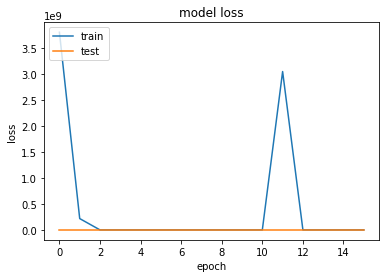

In [ ]:
model_loss(history2)

In [ ]:
model_bm2.save("model_bm2.h5")

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model_bm2 = load_model('model_bm2.h5')

Inference Time

In [ ]:
from datetime import datetime as dt
start_bm2 = dt.now()
results_bm2 = model_bm2.evaluate(X_test_bm2, y_test_bm2, batch_size=64)
running_secs_bm2 = (dt.now() - start_bm2).seconds
print(running_secs_bm2)

1717/1717 [==============================] - 4s 2ms/step - loss: 0.0101 - sparse_categorical_accuracy: 0.9999
30


In [ ]:
results_bm2

[0.01006125658750534, 0.9999362826347351]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# predict probabilities for test set
prediction_bm2 = model_bm2.predict(X_test_bm2, verbose=0)
# predict crisp classes for test set
prediction_classes_bm2=np.argmax(prediction_bm2,axis=1)

In [ ]:
# reduce to 1d array
prediction2 = prediction2[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_bm2 = accuracy_score(y_test_bm2, prediction_classes_bm2)
print('Accuracy: %f' % accuracy_bm2)
# precision tp / (tp + fp)
precision_bm2 = precision_score(y_test_bm2, prediction_classes_bm2,average='macro')
print('Precision: %f' % precision_bm2)
# recall: tp / (tp + fn)
recall_bm2 = recall_score(y_test_bm2, prediction_classes_bm2,average='macro')
print('Recall: %f' % recall_bm2)
# f1: 2 tp / (2 tp + fp + fn)
f1_bm2 = f1_score(y_test_bm2, prediction_classes_bm2,average='macro')
print('F1 score: %f' % f1_bm2)

Accuracy: 0.999936
Precision: 0.999906
Recall: 0.999927
F1 score: 0.999916


In [ ]:
predicted_values_bm2 = pd.DataFrame(prediction_classes_bm2, columns = ['botnet_type'])
print(predicted_values_bm2)

        botnet_type
0                 1
1                 2
2                 2
3                 2
4                 0
...             ...
109863            2
109864            1
109865            2
109866            2
109867            2

[109868 rows x 1 columns]


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm_bm2=confusion_matrix(y_test_bm2,prediction_classes_bm2)
print(cm_bm2)

[[17523     1     0]
 [    3 31268     1]
 [    0     2 61070]]


TPR, FPR

In [ ]:
FP_bm2 = cm_bm2.sum(axis=0) - np.diag(cm_bm2)  
FN_bm2 = cm_bm2.sum(axis=1) - np.diag(cm_bm2)
TP_bm2 = np.diag(cm_bm2)
TN_bm2 = cm_bm2.sum() - (FP_bm2 + FN_bm2 + TP_bm2)

FP_bm2 = FP_bm2.astype(float)
FN_bm2= FN_bm2.astype(float)
TP_bm2 = TP_bm2.astype(float)
TN_bm2 = TN_bm2.astype(float)
TPR_bm2 = TP_bm2/(TP_bm2+FN_bm2)
FPR_bm2 = FP_bm2/(FP_bm2+TN_bm2)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_bm2)
print(FPR_bm2)

[0.99994294 0.99987209 0.99996725]
[3.24872217e-05 3.81698814e-05 2.04934831e-05]


In [ ]:
overall_tpr_bm2=np.average(TPR_bm2)
overall_tpr_bm2

0.9999274257399621

In [ ]:
overall_fpr_bm2=np.average(FPR_bm2)
overall_fpr_bm2

3.0383528728028516e-05

Predictions for second level which will be used for next level

In [ ]:
predicted_values_bm2.to_csv('predic_bm2.csv')

In [ ]:
predicted_values_bm2 = pd.read_csv('predic_bm2.csv')
predicted_values_bm2=predicted_values_bm2[['botnet_type']]

In [ ]:
predicted_values_bm2['botnet_type'].unique() 

array([1, 2, 0])

Third level DNN - Predicts attack_type 

In [ ]:
model_bm3 = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(117, input_dim=X_train_bm3.shape[1], activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(9, activation='softmax')
        ])
  # tf.keras.layers.Dropout(0.2),

In [ ]:
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
model_bm3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [ ]:
model_bm3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 117)               13806     
                                                                 
 dense_11 (Dense)            (None, 256)               30208     
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 9)                 585       
                                                                 
Total params: 85,751
Trainable params: 85,751
Non-trai

In [ ]:
X_test3

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
688426,111.412816,482.486250,3.021289e+04,195.326363,442.021827,42774.369684,611.989100,398.738673,52581.560712,6334.687034,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
495201,109.816761,60.000612,9.172923e-03,129.195663,60.004523,0.067830,265.693605,60.019733,0.295602,2309.239228,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
670234,151.221831,357.441044,5.846470e+04,243.557298,354.168119,58784.168503,675.832471,369.131824,57148.615342,6467.272513,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
48459,1.999983,102.000000,3.640000e-12,1.999990,102.000000,0.000000,2.000000,101.999948,0.001673,4.068790,...,2.173887e-01,0.000002,0.000018,3.468238,97.902679,12.461919,138.638978,1.808769e+02,33.199448,0.276656
114186,195.333304,74.035767,8.575975e-01,314.392518,74.040804,1.066250,905.112930,74.061734,11.055411,4008.808270,...,0.000000e+00,0.000000,0.000000,1.000000,74.000000,0.000000,74.000000,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210473,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
349819,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
873324,77.913030,464.698536,3.604864e+04,142.299424,413.051711,49711.767633,478.008293,358.390986,58352.483719,5019.806738,...,5.820766e-10,0.000000,0.000000,20909.130131,554.000000,0.000058,554.000000,3.376044e-09,0.000000,0.000000
210432,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000


Adding the last two predictions to this test set

In [ ]:
X_test_bm3['binary_type']=predicted_values_bm1.values
X_test_bm3['botnet_type']=predicted_values_bm2.values
X_test_bm3= stardard_scaler.fit_transform(X_test_bm3)
X_test_bm3

array([[0.00000000e+00, 4.85722573e-17, 0.00000000e+00, ...,
        4.69742650e-01, 1.00000000e+00, 5.00000000e-01],
       [2.77500105e-01, 3.25178096e-01, 3.95503036e-02, ...,
        4.69742650e-01, 1.00000000e+00, 1.00000000e+00],
       [2.74203429e-01, 3.08527687e-06, 5.46992951e-08, ...,
        4.69742650e-01, 1.00000000e+00, 1.00000000e+00],
       ...,
       [2.81318770e-01, 2.01247058e-01, 1.27184392e-01, ...,
        4.69742650e-01, 1.00000000e+00, 1.00000000e+00],
       [2.80779283e-01, 3.33646006e-01, 4.07844015e-02, ...,
        4.69742650e-01, 1.00000000e+00, 1.00000000e+00],
       [4.21067198e-01, 1.50981500e-01, 1.26669750e-01, ...,
        4.69742650e-01, 1.00000000e+00, 1.00000000e+00]])

In [ ]:
X_test3.shape

(203660, 117)

In [ ]:
history_bm3 = model_bm3.fit(X_train_bm3,y_train_bm3,validation_data=(X_val_bm3, y_val_bm3),callbacks = [early_stopping],epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
13734/13734 [==============================] - 85s 6ms/step - loss: 0.2131 - sparse_categorical_accuracy: 0.8702 - val_loss: 0.3337 - val_sparse_categorical_accuracy: 0.8434
Epoch 2/35
13734/13734 [==============================] - 70s 5ms/step - loss: 0.1559 - sparse_categorical_accuracy: 0.9037 - val_loss: 0.3511 - val_sparse_categorical_accuracy: 0.8430
Epoch 3/35
13734/13734 [==============================] - 82s 6ms/step - loss: 0.1466 - sparse_categorical_accuracy: 0.9080 - val_loss: 0.1791 - val_sparse_categorical_accuracy: 0.9021
Epoch 4/35
13734/13734 [==============================] - 76s 6ms/step - loss: 0.1443 - sparse_categorical_accuracy: 0.9085 - val_loss: 0.1470 - val_sparse_categorical_accuracy: 0.9056
Epoch 5/35
13734/13734 [==============================] - 75s 5ms/step - loss: 0.1927 - sparse_categorical_accuracy: 0.8739 - val_loss: 0.2368 - val_sparse_categorical_accuracy: 0.8450
Epoch 6/35
13734/13734 [==============================] - 72s 5ms/step - lo

In [ ]:
# model_accuracy(history2) #need to change the function for sparse categorical accuracy

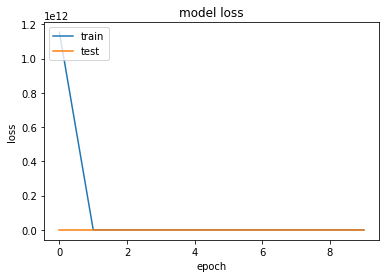

In [ ]:
model_loss(history3)

In [ ]:
model_bm3.save("model_bm3.h5")

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model_bm3 = load_model('model_bm3.h5')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Inference Time

In [ ]:
from datetime import datetime as dt
start_bm3 = dt.now()
results_bm3 = model_bm3.evaluate(X_test_bm3, y_test_bm3, batch_size=64)
running_secs_bm3 = (dt.now() - start_bm3).seconds
print(running_secs_bm3)

1717/1717 [==============================] - 4s 2ms/step - loss: 5.0045 - sparse_categorical_accuracy: 0.7328
5


In [ ]:
results_bm3

[5.004457473754883, 0.7327884435653687]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# predict probabilities for test set
prediction_bm3 = model_bm3.predict(X_test_bm3, verbose=0)
# predict crisp classes for test set
prediction_classes_bm3=np.argmax(prediction_bm3,axis=1)

In [ ]:
predicted_values_bm3 = pd.DataFrame(prediction_classes_bm3, columns = ['attack_type'])
print(predicted_values_bm3)

        attack_type
0                 7
1                 1
2                 4
3                 4
4                 0
...             ...
109863            4
109864            2
109865            8
109866            1
109867            1

[109868 rows x 1 columns]


In [ ]:
# reduce to 1d array
prediction3 = prediction3[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_bm3 = accuracy_score(y_test_bm3, prediction_classes_bm3)
print('Accuracy: %f' % accuracy_bm3)
# precision tp / (tp + fp)
precision_bm3 = precision_score(y_test_bm3, prediction_classes_bm3,average='macro')
print('Precision: %f' % precision_bm3)
# recall: tp / (tp + fn)
recall_bm3 = recall_score(y_test_bm3, prediction_classes_bm3,average='macro')
print('Recall: %f' % recall_bm3)
# f1: 2 tp / (2 tp + fp + fn)
f1_bm3 = f1_score(y_test_bm3, prediction_classes_bm3,average='macro')
print('F1 score: %f' % f1_bm3)

Accuracy: 0.732788
Precision: 0.727398
Recall: 0.790054
F1 score: 0.733603


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm_bm3=confusion_matrix(y_test_bm3,prediction_classes_bm3)
print(cm_bm3)

[[17523     0     0     0     0     0     0     1     0]
 [    0  9112     0     0     0     0     0     0     0]
 [    1     0  4339  1474     0     1     0     0     0]
 [    1     0   137  2697     0     0     0     0     0]
 [    0     0     0     0 13148     0     0     0     0]
 [    0     0     0     1     0 11812     0     0     0]
 [    0     0     1     0     1     0     0  9256     0]
 [    1 18328     0     0     1     0     0 13952     0]
 [    0   154     0     0     0     0     0     0  7927]]


In [ ]:
FP_bm3 = cm_bm3.sum(axis=0) - np.diag(cm_bm3)  
FN_bm3 = cm_bm3.sum(axis=1) - np.diag(cm_bm3)
TP_bm3 = np.diag(cm_bm3)
TN_bm3 = cm_bm3.sum() - (FP_bm3 + FN_bm3 + TP_bm3)

FP_bm3 = FP_bm3.astype(float)
FN_bm3 = FN_bm3.astype(float)
TP_bm3 = TP_bm3.astype(float)
TN_bm3 = TN_bm3.astype(float)
TPR_bm3 = TP_bm3/(TP_bm3+FN_bm3)
FPR_bm3 = FP_bm3/(FP_bm3+TN_bm3)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_bm3)
print(FPR_bm3)

[0.99994294 1.         0.74617369 0.95132275 1.         0.99991535
 0.         0.43219131 0.98094295]
[3.24872217e-05 1.83433245e-01 1.32624720e-03 1.37807966e-02
 2.06782465e-05 1.01983581e-05 0.00000000e+00 1.19312763e-01
 0.00000000e+00]


In [ ]:
overall_tpr_bm3=np.average(TPR_bm3)
overall_tpr_bm3

0.790054332178892

In [ ]:
overall_fpr_bm3=np.average(FPR_bm3)
overall_fpr_bm3

0.0353240460984498

Attack predictions

In [ ]:
# prediction3 = model3.predict(X_test3) 
# prediction3

In [ ]:
# decoded_predic3 = np.argmax(prediction3, axis=1)
# decoded_predic3

array([7, 4, 7, ..., 8, 7, 2])

In [ ]:
predicted_values_bm3.to_csv('predic_bm3.csv')

In [ ]:
predicted_values_bm3 = pd.read_csv('predic_bm3.csv')
predicted_values_bm3=predicted_values_bm3['attack_type']

In [ ]:
predicted_values_bm3['attack_type'].unique() 

array([7, 1, 4, 0, 5, 3, 2, 8])

##4. Deep Learning - Multi-Output Classification - device 4 (security camera)

Shuffling the dataset

In [ ]:
# df1_t = df1_t.sample(frac=1).reset_index(drop=True)
# df2_t = df2_t.sample(frac=1).reset_index(drop=True)
# df4_t = df4_t.sample(frac=1).reset_index(drop=True)
# df5_t = df5_t.sample(frac=1).reset_index(drop=True)


In [ ]:
df5=pd.read_csv('/content/drive/MyDrive/Capstone project/Iot_botnet_detection/df5.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (117,118) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# df1_m = df1.drop(columns=["type"])

# df2_m= df2.drop(columns=["type"])

# df4_m = df4.drop(columns=["type"])

df5_m= df5.drop(columns=["type"])

In [ ]:
# df1_m=df1_m.fillna("benign")
# df2_m=df1_m.fillna("benign")
# df3_m=df1_m.fillna("benign")
df5_m=df5_m.fillna("benign")

Label Encoding the classes

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df5_m['binary_type']= label_encoder.fit_transform(df5_m['binary_type'])
label_encoder.classes_

array(['benign', 'malicious'], dtype=object)

In [ ]:
df5_m['botnet_type']= label_encoder.fit_transform(df5_m['botnet_type'])
label_encoder.classes_

array(['benign', 'gafgyt', 'mirai'], dtype=object)

In [ ]:
df5_m['attack_type'] = df5_m['attack_type'].apply(lambda x: ['benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain'].index(x))

In [ ]:
df5_m['attack_type'].unique()
#'benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain' (0-8 in order)

array([0, 2, 3, 4, 6, 7, 1, 8, 5])

In [ ]:
df1_m

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0,0,0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,0,0,0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,0,0,0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,0,0,0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018293,120.082973,73.889894,1.529364,200.220921,73.911778,1.227327,601.058212,73.930584,0.967005,6297.410037,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1,2,5
1018294,117.760838,73.890829,1.516479,197.878784,73.912224,1.221164,598.695092,73.930700,0.965398,6294.877524,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1,2,5
1018295,118.760060,73.891748,1.503809,198.877999,73.912665,1.215062,599.694301,73.930816,0.963796,6295.876691,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1,2,5
1018296,119.614817,73.892653,1.491334,199.732027,73.913102,1.209016,600.547544,73.930931,0.962199,6296.722602,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1,2,5


In [ ]:
X4 = df5_m.drop(['binary_type','botnet_type','attack_type'], axis=1) 
#X1 is the entire dataset without the target columns

# y1 = df1_m['binary_type']
# X2 = df1_m.drop(['botnet_type','attack_type'], axis=1)
# y2 = df1_m['botnet_type']
# X3 = df1_m.drop(['attack_type'], axis=1)
# y3 = df1_m['attack_type']

In [ ]:
X1

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,34.095047,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,100.081513,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018293,120.082973,73.889894,1.529364,200.220921,73.911778,1.227327,601.058212,73.930584,0.967005,6297.410037,...,0.000000,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0
1018294,117.760838,73.890829,1.516479,197.878784,73.912224,1.221164,598.695092,73.930700,0.965398,6294.877524,...,0.000000,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0
1018295,118.760060,73.891748,1.503809,198.877999,73.912665,1.215062,599.694301,73.930816,0.963796,6295.876691,...,0.000000,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0
1018296,119.614817,73.892653,1.491334,199.732027,73.913102,1.209016,600.547544,73.930931,0.962199,6296.722602,...,0.000000,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0


In [ ]:
y4=df5_m[['binary_type','botnet_type','attack_type']]
#y is all the target columns together
y4

,binary_type,botnet_type,attack_type
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
828255,1,2,5
828256,1,2,5
828257,1,2,5
828258,1,2,5


Splitting dataset for training and testing, same datasets used in all levels with columns added according to each level

In [ ]:
X_train_sc, X_rem_sc, y_train_sc, y_rem_sc = train_test_split(X4, y4, test_size=0.2, random_state=1,stratify=y4)
X_val_sc, X_test_sc, y_val_sc, y_test_sc = train_test_split(X_rem_sc, y_rem_sc, test_size=0.5, random_state=1,stratify=y_rem_sc)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
748695,129.710698,371.980510,5.678653e+04,214.460755,389.820889,5.414970e+04,709.205153,382.120398,55365.910183,6484.344238,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
776245,115.385283,445.190086,4.191250e+04,204.984094,412.284411,4.992410e+04,637.720388,387.782447,54481.585709,6403.051832,...,0.000000e+00,0.000000e+00,0.0,1.000000,554.0,0.000000,554.000000,0.000000e+00,0.000000e+00,0.000000e+00
885291,81.972677,431.459754,4.551877e+04,150.578909,385.668065,5.482031e+04,488.852333,347.756944,59345.499000,5032.302197,...,2.328306e-10,0.000000e+00,0.0,22442.511742,554.0,0.000064,554.000000,4.074536e-09,0.000000e+00,0.000000e+00
32807,3.999764,102.000000,1.820000e-12,3.999858,102.000000,3.980000e-10,4.000052,101.998981,0.042673,5.109537,...,3.640000e-12,-3.900000e-69,0.0,4.199907,102.0,0.000001,144.249783,2.570000e-12,9.210000e-29,5.060000e-17
378081,177.411456,247.376869,5.970260e+04,263.511280,294.098554,6.365174e+04,691.950729,358.812855,61910.084440,6243.383849,...,0.000000e+00,0.000000e+00,0.0,1.000000,566.0,0.000000,566.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26799,3.936325,101.999992,3.210000e-05,3.962307,101.999124,3.504150e-03,4.082417,101.906536,0.365121,5.378486,...,0.000000e+00,-7.270000e-40,0.0,4.219166,102.0,0.000000,144.249783,1.820000e-12,-2.500000e-29,0.000000e+00
356690,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
1011225,124.584763,73.950601,6.891456e-01,205.297874,73.937349,8.731889e-01,624.271343,73.595225,5.503752,6745.640480,...,0.000000e+00,0.000000e+00,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000e+00
233721,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)

# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
# X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42, stratify=y4)
# X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42, stratify=y5)

Normalisation

In [ ]:
stardard_scaler = MinMaxScaler()
X_train_sc1= stardard_scaler.fit_transform(X_train_sc)
X_val_sc1 = stardard_scaler.transform(X_val_sc)
X_test_sc1 = stardard_scaler.transform(X_test_sc)

# stardard_scaler = MinMaxScaler()
# X_train2= stardard_scaler.fit_transform(X_train2)
# X_test2 = stardard_scaler.transform(X_test2)

# stardard_scaler = MinMaxScaler()
# X_train3= stardard_scaler.fit_transform(X_train3)
# X_test3 = stardard_scaler.transform(X_test3)


In [ ]:
X_train

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
133891,179.419080,74.260452,90.617186,290.805783,74.439460,161.782284,824.404224,74.605283,232.133235,6972.680155,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
377085,176.434992,236.992084,58231.796674,258.148512,291.002554,63525.106367,676.758568,358.621120,61927.259313,6182.105563,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
284943,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
137008,152.484610,74.013367,1.181683,266.843980,74.056525,29.556745,824.234931,74.763143,603.676796,7357.126266,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
60398,146.666232,73.987909,12.983239,225.933452,74.191739,157.946317,484.944283,76.112955,1721.162697,5038.949579,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387522,122.307287,439.207423,48080.686481,211.679910,411.067347,54391.795396,636.935581,394.918619,57298.069507,6302.336017,...,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0
989757,112.644704,72.635278,17.243980,198.453873,71.545825,28.337580,644.172131,70.165421,38.987385,6645.809402,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
945696,171.798407,66.845422,48.976106,260.114319,67.408755,48.832925,690.967680,68.545401,46.634811,6646.330631,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
948750,130.276287,71.025758,32.793273,223.370158,70.135163,39.170753,673.032430,69.510358,42.698335,6637.679327,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0


### Deep Neural Network

In [ ]:
def model_accuracy(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
def model_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
y_train

,binary_type,botnet_type,attack_type
133891,1,1,3
377085,1,2,1
284943,1,1,7
137008,1,1,3
60398,1,1,2
...,...,...,...
387522,1,2,1
989757,1,2,5
945696,1,2,5
948750,1,2,5


In [ ]:
X_test

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
688426,111.412816,482.486250,3.021289e+04,195.326363,442.021827,42774.369684,611.989100,398.738673,52581.560712,6334.687034,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
495201,109.816761,60.000612,9.172923e-03,129.195663,60.004523,0.067830,265.693605,60.019733,0.295602,2309.239228,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
670234,151.221831,357.441044,5.846470e+04,243.557298,354.168119,58784.168503,675.832471,369.131824,57148.615342,6467.272513,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
48459,1.999983,102.000000,3.640000e-12,1.999990,102.000000,0.000000,2.000000,101.999948,0.001673,4.068790,...,2.173887e-01,0.000002,0.000018,3.468238,97.902679,12.461919,138.638978,1.808769e+02,33.199448,0.276656
114186,195.333304,74.035767,8.575975e-01,314.392518,74.040804,1.066250,905.112930,74.061734,11.055411,4008.808270,...,0.000000e+00,0.000000,0.000000,1.000000,74.000000,0.000000,74.000000,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210473,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
349819,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
873324,77.913030,464.698536,3.604864e+04,142.299424,413.051711,49711.767633,478.008293,358.390986,58352.483719,5019.806738,...,5.820766e-10,0.000000,0.000000,20909.130131,554.000000,0.000058,554.000000,3.376044e-09,0.000000,0.000000
210432,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000


Changing the training and testing datasets according to the level in which its used

In [ ]:
X_train

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type
133891,179.419080,74.260452,90.617186,290.805783,74.439460,161.782284,824.404224,74.605283,232.133235,6972.680155,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,1
377085,176.434992,236.992084,58231.796674,258.148512,291.002554,63525.106367,676.758568,358.621120,61927.259313,6182.105563,...,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,2
284943,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,1
137008,152.484610,74.013367,1.181683,266.843980,74.056525,29.556745,824.234931,74.763143,603.676796,7357.126266,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,1
60398,146.666232,73.987909,12.983239,225.933452,74.191739,157.946317,484.944283,76.112955,1721.162697,5038.949579,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387522,122.307287,439.207423,48080.686481,211.679910,411.067347,54391.795396,636.935581,394.918619,57298.069507,6302.336017,...,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1,2
989757,112.644704,72.635278,17.243980,198.453873,71.545825,28.337580,644.172131,70.165421,38.987385,6645.809402,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,2
945696,171.798407,66.845422,48.976106,260.114319,67.408755,48.832925,690.967680,68.545401,46.634811,6646.330631,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,2
948750,130.276287,71.025758,32.793273,223.370158,70.135163,39.170753,673.032430,69.510358,42.698335,6637.679327,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,2


In [ ]:
X_train_sc2=X_train_sc.copy(deep=True)
X_train_sc2['binary_type']=y_train_sc['binary_type']
X_train_sc3=X_train_sc2.copy(deep=True)
X_train_sc2= stardard_scaler.fit_transform(X_train_sc2)
X_train_sc2

array([[2.10966787e-01, 1.63328687e-01, 1.16843570e-01, ...,
        1.44015411e-01, 3.86743446e-01, 1.00000000e+00],
       [0.00000000e+00, 1.38777878e-17, 0.00000000e+00, ...,
        1.44015411e-01, 3.86743446e-01, 1.00000000e+00],
       [4.61371377e-01, 1.72419348e-02, 1.50578936e-06, ...,
        1.44015411e-01, 3.86743446e-01, 1.00000000e+00],
       ...,
       [9.97127366e-02, 1.74650594e-07, 7.95446198e-09, ...,
        1.44015411e-01, 3.86743446e-01, 1.00000000e+00],
       [3.21950295e-01, 4.03296319e-01, 1.32582748e-01, ...,
        1.44015411e-01, 3.86743446e-01, 1.00000000e+00],
       [0.00000000e+00, 1.38777878e-17, 0.00000000e+00, ...,
        1.44015411e-01, 3.86743446e-01, 1.00000000e+00]])

In [ ]:
X_val_sc2=X_val_sc.copy(deep=True)
X_val_sc2['binary_type']=y_val_sc['binary_type']
X_val_sc3=X_val_sc2.copy(deep=True)
X_val_sc2= stardard_scaler.fit_transform(X_val_sc2)
X_val_sc2

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.50217475e-05, 3.12619365e-01, 1.00000000e+00],
       [4.51272158e-01, 2.69424802e-01, 3.68844333e-01, ...,
        8.50217475e-05, 3.12619365e-01, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.50217475e-05, 3.12619365e-01, 1.00000000e+00],
       ...,
       [1.69450937e-01, 2.59750718e-01, 3.66054290e-01, ...,
        8.50217475e-05, 3.12619365e-01, 1.00000000e+00],
       [2.54199897e-01, 1.68506450e-01, 3.01393363e-01, ...,
        8.50217475e-05, 3.12619365e-01, 1.00000000e+00],
       [4.84121165e-01, 1.70155118e-02, 1.96670034e-05, ...,
        8.50217475e-05, 3.12619365e-01, 1.00000000e+00]])

In [ ]:
X_test_sc2=X_test_sc.copy(deep=True)
# X_test2['binary_type']=y_test['binary_type']
# X_test2 = stardard_scaler.transform(X_test2)

In [ ]:
X_test2.shape

(203660, 115)

In [ ]:
X_train_sc3['botnet_type']=y_train_sc['botnet_type']
X_train_sc3= stardard_scaler.fit_transform(X_train_sc3)

In [ ]:
X_val_sc3['botnet_type']=y_val_sc['botnet_type']
X_val_sc3= stardard_scaler.fit_transform(X_val_sc3)

In [ ]:
X_test_sc3=X_test_sc.copy(deep=True)
# X_test3['botnet_type']=y_test['botnet_type']
# X_test3 = stardard_scaler.transform(X_test3)

In [ ]:
y_train_sc2=y_train_sc['botnet_type']
y_train_sc2

708854    2
315201    1
108515    1
755070    2
621745    2
         ..
615162    2
107688    1
501579    2
600480    2
270296    1
Name: botnet_type, Length: 662608, dtype: int64

In [ ]:
y_val_sc2=y_val_sc['botnet_type']
y_val_sc2

313042    1
641728    2
348603    1
15210     0
554931    2
         ..
807540    2
17830     0
750389    2
735117    2
117336    1
Name: botnet_type, Length: 82826, dtype: int64

In [ ]:
y_train_sc3=y_train_sc['attack_type']
y_train_sc3

708854    8
315201    7
108515    2
755070    8
621745    7
         ..
615162    7
107688    2
501579    4
600480    7
270296    6
Name: attack_type, Length: 662608, dtype: int64

In [ ]:
y_val_sc3=y_val_sc['attack_type']
y_val_sc3

313042    7
641728    7
348603    7
15210     0
554931    7
         ..
807540    5
17830     0
750389    8
735117    8
117336    2
Name: attack_type, Length: 82826, dtype: int64

In [ ]:
y_test_sc2=y_test_sc['botnet_type']
y_test_sc2

668845    2
12410     0
783436    2
553786    2
290516    1
         ..
377779    1
19351     0
802993    2
176559    1
662069    2
Name: botnet_type, Length: 82826, dtype: int64

In [ ]:
y_test_sc3=y_test_sc['attack_type']
y_test_sc3

668845    7
12410     0
783436    5
553786    7
290516    7
         ..
377779    7
19351     0
802993    5
176559    4
662069    7
Name: attack_type, Length: 82826, dtype: int64

In [ ]:
y_train_sc1=y_train_sc.drop(['botnet_type','attack_type'], axis=1)
y_train_sc1

,binary_type
708854,1
315201,1
108515,1
755070,1
621745,1
...,...
615162,1
107688,1
501579,1
600480,1


In [ ]:
y_val_sc1=y_val_sc.drop(['botnet_type','attack_type'], axis=1)
y_val_sc1

,binary_type
313042,1
641728,1
348603,1
15210,0
554931,1
...,...
807540,1
17830,0
750389,1
735117,1


In [ ]:
y_test_sc1=y_test_sc.drop(['botnet_type','attack_type'], axis=1)
y_test_sc1

,binary_type
668845,1
12410,0
783436,1
553786,1
290516,1
...,...
377779,1
19351,0
802993,1
176559,1


First Level DNN - Predicting the binary_type (whether benign or malicious)

In [ ]:
model_sc1 = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(115, input_dim=X_train_sc1.shape[1], activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
  # tf.keras.layers.Dropout(0.2),

In [ ]:
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
model_sc1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model_sc1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 115)               13340     
                                                                 
 dense_1 (Dense)             (None, 256)               29696     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 84,253
Trainable params: 84,253
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train1

In [ ]:
history_sc1 = model_sc1.fit(X_train_sc1, y_train_sc1,validation_data=(X_val_sc1, y_val_sc1),callbacks = [early_stopping], epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
10354/10354 [==============================] - 80s 8ms/step - loss: 8.3269e-04 - accuracy: 0.9998 - val_loss: 2.0506e-04 - val_accuracy: 0.9999
Epoch 2/35
10354/10354 [==============================] - 96s 9ms/step - loss: 7.3549e-04 - accuracy: 0.9998 - val_loss: 1.6874e-04 - val_accuracy: 0.9999
Epoch 3/35
10354/10354 [==============================] - 61s 6ms/step - loss: 6.3611e-04 - accuracy: 0.9998 - val_loss: 0.0011 - val_accuracy: 0.9996
Epoch 4/35
10354/10354 [==============================] - 72s 7ms/step - loss: 5.8316e-04 - accuracy: 0.9999 - val_loss: 2.9384e-04 - val_accuracy: 0.9999
Epoch 5/35
10354/10354 [==============================] - 99s 10ms/step - loss: 5.7568e-04 - accuracy: 0.9999 - val_loss: 4.1075e-04 - val_accuracy: 0.9999
Epoch 6/35
10354/10354 [==============================] - 98s 9ms/step - loss: 4.5214e-04 - accuracy: 0.9999 - val_loss: 9.5131e-05 - val_accuracy: 0.9999
Epoch 7/35
10354/10354 [==============================] - 79s 8ms/step - 

In [ ]:
model_sc1.save("model_sc1.h5")

In [ ]:
from tensorflow.keras.models import load_model
model_sc1 = load_model('model_sc1.h5')

Inference Time

In [ ]:
from datetime import datetime as dt

start_sc1 = dt.now()

results_sc1 = model_sc1.evaluate(X_test_sc1, y_test_sc1, batch_size=64)
running_secs_sc1 = (dt.now() - start_sc1).seconds
print(running_secs_sc1)

1295/1295 [==============================] - 7s 5ms/step - loss: 5.9545e-04 - accuracy: 0.9999
7


In [ ]:
results_sc1

[0.0005954537191428244, 0.9999275803565979]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
prediction_sc1 = (model_sc1.predict(X_test_sc1) > 0.5).astype(int)
predicted_values_sc1 = pd.DataFrame(prediction_sc1, columns = ['binary_type'])
print(predicted_values_sc1)

2589/2589 [==============================] - 9s 3ms/step
       binary_type
0                1
1                0
2                1
3                1
4                1
...            ...
82821            1
82822            0
82823            1
82824            1
82825            1

[82826 rows x 1 columns]


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_sc1 = accuracy_score(y_test_sc1, prediction_sc1)
print('Accuracy: %f' % accuracy_sc1)
# precision tp / (tp + fp)
precision_sc1 = precision_score(y_test_sc1, prediction_sc1)
print('Precision: %f' % precision_sc1)
# recall: tp / (tp + fn)
recall_sc1 = recall_score(y_test_sc1,prediction_sc1)
print('Recall: %f' % recall_sc1)
# f1: 2 tp / (2 tp + fp + fn)
f1_sc1 = f1_score(y_test_sc1, prediction_sc1)
print('F1 score: %f' % f1_sc1)

Accuracy: 0.999928
Precision: 0.999935
Recall: 0.999987
F1 score: 0.999961


In [ ]:
from sklearn.metrics import confusion_matrix
cm_sc1=confusion_matrix(y_test_sc1,predicted_values_sc1)
print(cm_sc1)

[[ 6211     5]
 [    1 76609]]


In [ ]:
FP_sc1 = cm_sc1.sum(axis=0) - np.diag(cm_sc1)  
FN_sc1 = cm_sc1.sum(axis=1) - np.diag(cm_sc1)
TP_sc1 = np.diag(cm_sc1)
TN_sc1 = cm_sc1.sum() - (FP_sc1 + FN_sc1 + TP_sc1)

FP_sc1 = FP_sc1.astype(float)
FN_sc1 = FN_sc1.astype(float)
TP_sc1 = TP_sc1.astype(float)
TN_sc1 = TN_sc1.astype(float)
TPR_sc1 = TP_sc1/(TP_sc1+FN_sc1)
FPR_sc1 = FP_sc1/(FP_sc1+TN_sc1)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_sc1)
print(FPR_sc1)

[0.99919562 0.99998695]
[1.30531262e-05 8.04375804e-04]


In [ ]:
overall_tpr_sc1=np.average(TPR_sc1)
overall_tpr_sc1

0.9995912855347002

In [ ]:
overall_fpr_sc1=np.average(FPR_sc1)
overall_fpr_sc1

0.00040871446529976743

Getting the predictions on test set based on which next level classifications have to be done

In [ ]:
predicted_values_sc1.to_csv('predic_sc1.csv')

In [ ]:
predicted_values_sc1 = pd.read_csv('predic_sc1.csv')

In [ ]:
predicted_values_sc1=predicted_values_sc1[['binary_type']]

In [ ]:
predicted_values1

,binary_type
0,1
1,1
2,0
3,1
4,1
...,...
101825,1
101826,1
101827,1
101828,1


In [ ]:
prediction1.shape

(101830, 1)

In [ ]:
predicted_values1.shape

(101830, 1)

In [ ]:
y_test1.shape

(101830, 1)

In [ ]:
predicted_values_sc1['binary_type'].unique()

array([1, 0])

Second Level DNN - Predicting botnet_type (whether benign, bashlite or mirai)

In [ ]:
model_sc2 = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(116, input_dim=X_train_sc2.shape[1], activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(3, activation='softmax')
        ])

In [ ]:
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
model_sc2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [ ]:
model_sc2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 116)               13572     
                                                                 
 dense_6 (Dense)             (None, 256)               29952     
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 84,871
Trainable params: 84,871
Non-trai

In [ ]:
X_test_sc2.shape

(82826, 115)

Adding level 1 predictions in the test set to be able to predict the current level's outputs 

In [ ]:
X_test_sc2['binary_type']=predicted_values_sc1.values
X_test_sc2= stardard_scaler.fit_transform(X_test_sc2)
X_test_sc2
#later try adding in training set also and see the difference

array([[2.66513496e-01, 2.35996246e-01, 3.72970811e-01, ...,
        2.72103820e-01, 3.13622734e-01, 1.00000000e+00],
       [8.99906701e-05, 1.38777878e-17, 2.94917620e-18, ...,
        2.72103820e-01, 3.13622734e-01, 0.00000000e+00],
       [2.66148913e-01, 1.12861048e-02, 2.91767990e-04, ...,
        2.72103820e-01, 3.13622734e-01, 1.00000000e+00],
       ...,
       [1.73486094e-01, 1.31782295e-02, 2.38370215e-04, ...,
        2.72103820e-01, 3.13622734e-01, 1.00000000e+00],
       [6.35924552e-02, 1.82354604e-02, 8.15263690e-05, ...,
        2.72103820e-01, 3.13622734e-01, 1.00000000e+00],
       [1.81720718e-01, 3.61811471e-01, 3.84306368e-01, ...,
        2.72103820e-01, 3.13622734e-01, 1.00000000e+00]])

In [ ]:
X_test2.shape

(203660, 116)

In [ ]:
y_test2

,botnet_type
688426,2
495201,2
670234,2
48459,0
114186,1
...,...
210473,1
349819,1
873324,2
210432,1


In [ ]:
X_test2.shape

(203660, 116)

In [ ]:
history_sc2 = model_sc2.fit(X_train_sc2,y_train_sc2,validation_data=(X_val_sc2, y_val_sc2),callbacks = [early_stopping],epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
10354/10354 [==============================] - 59s 6ms/step - loss: 0.0044 - sparse_categorical_accuracy: 0.9988 - val_loss: 0.0019 - val_sparse_categorical_accuracy: 0.9997
Epoch 2/35
10354/10354 [==============================] - 55s 5ms/step - loss: 0.0013 - sparse_categorical_accuracy: 0.9998 - val_loss: 0.0036 - val_sparse_categorical_accuracy: 0.9994
Epoch 3/35
10354/10354 [==============================] - 53s 5ms/step - loss: 0.0012 - sparse_categorical_accuracy: 0.9999 - val_loss: 0.0020 - val_sparse_categorical_accuracy: 0.9997
Epoch 4/35
10354/10354 [==============================] - 54s 5ms/step - loss: 9.8052e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 0.0018 - val_sparse_categorical_accuracy: 0.9996
Epoch 5/35
10354/10354 [==============================] - 52s 5ms/step - loss: 8.7209e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 0.0022 - val_sparse_categorical_accuracy: 0.9996
Epoch 6/35
10354/10354 [==============================] - 53s 5ms/s

In [ ]:
model_sc2.save("model_sc2.h5")

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model_sc2 = load_model('model_sc2.h5')

Inference Time

In [ ]:
from datetime import datetime as dt
start_sc2 = dt.now()
results_sc2 = model_sc2.evaluate(X_test_sc2, y_test_sc2, batch_size=64)
running_secs_sc2 = (dt.now() - start_sc2).seconds
print(running_secs_sc2)

1295/1295 [==============================] - 3s 3ms/step - loss: 0.0404 - sparse_categorical_accuracy: 0.9998
5


In [ ]:
results_sc2

[0.04036340117454529, 0.999830961227417]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# predict probabilities for test set
prediction_sc2 = model_sc2.predict(X_test_sc2, verbose=0)
# predict crisp classes for test set
prediction_classes_sc2=np.argmax(prediction_sc2,axis=1)

In [ ]:
# reduce to 1d array
prediction_sc2 = prediction_sc2[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_sc2 = accuracy_score(y_test_sc2, prediction_classes_sc2)
print('Accuracy: %f' % accuracy_sc2)
# precision tp / (tp + fp)
precision_sc2 = precision_score(y_test_sc2, prediction_classes_sc2,average='macro')
print('Precision: %f' % precision_sc2)
# recall: tp / (tp + fn)
recall_sc2 = recall_score(y_test_sc2, prediction_classes_sc2,average='macro')
print('Recall: %f' % recall_sc2)
# f1: 2 tp / (2 tp + fp + fn)
f1_sc2 = f1_score(y_test_sc2, prediction_classes_sc2,average='macro')
print('F1 score: %f' % f1_sc2)

Accuracy: 0.999831
Precision: 0.999822
Recall: 0.999658
F1 score: 0.999740


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm_sc2=confusion_matrix(y_test_sc2,prediction_classes_sc2)
print(cm_sc2)

[[ 6211     4     1]
 [    0 33008     2]
 [    1     6 43593]]


TPR, FPR

In [ ]:
FP_sc2 = cm_sc2.sum(axis=0) - np.diag(cm_sc2)  
FN_sc2 = cm_sc2.sum(axis=1) - np.diag(cm_sc2)
TP_sc2 = np.diag(cm_sc2)
TN_sc2 = cm_sc2.sum() - (FP_sc2 + FN_sc2 + TP_sc2)

FP_sc2 = FP_sc2.astype(float)
FN_sc2 = FN_sc2.astype(float)
TP_sc2 = TP_sc2.astype(float)
TN_sc2 = TN_sc2.astype(float)
TPR_sc2 = TP_sc2/(TP_sc2+FN_sc2)
FPR_sc2 = FP_sc2/(FP_sc2+TN_sc2)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_sc2)
print(FPR_sc2)

[0.99919562 0.99993941 0.99983945]
[1.30531262e-05 2.00738718e-04 7.64798858e-05]


In [ ]:
overall_tpr_sc2=np.average(TPR_sc2)
overall_tpr_sc2

0.9996581620120706

In [ ]:
overall_fpr_sc2=np.average(FPR_sc2)
overall_fpr_sc2

9.675724349926301e-05

Predictions for second level which will be used for next level

In [ ]:
predicted_values_sc2 = pd.DataFrame(prediction_classes_sc2, columns = ['botnet_type'])
print(predicted_values_sc2)

       botnet_type
0                2
1                0
2                2
3                2
4                1
...            ...
82821            1
82822            0
82823            2
82824            1
82825            2

[82826 rows x 1 columns]


In [ ]:
predicted_values_sc2.to_csv('predic_sc2.csv')

In [ ]:
predicted_values_sc2 = pd.read_csv('predic_sc2.csv')
predicted_values_sc2=predicted_values_sc2[['botnet_type']]

In [ ]:
predicted_values_sc2['botnet_type'].unique() 

array([2, 0, 1])

Third level DNN - Predicts attack_type 

In [ ]:
model_sc3 = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(117, input_dim=X_train_sc3.shape[1], activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(9, activation='softmax')
        ])
  # tf.keras.layers.Dropout(0.2),

In [ ]:
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
model_sc3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [ ]:
model_sc3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 117)               13806     
                                                                 
 dense_11 (Dense)            (None, 256)               30208     
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 9)                 585       
                                                                 
Total params: 85,751
Trainable params: 85,751
Non-trai

In [ ]:
X_test3

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
688426,111.412816,482.486250,3.021289e+04,195.326363,442.021827,42774.369684,611.989100,398.738673,52581.560712,6334.687034,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
495201,109.816761,60.000612,9.172923e-03,129.195663,60.004523,0.067830,265.693605,60.019733,0.295602,2309.239228,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
670234,151.221831,357.441044,5.846470e+04,243.557298,354.168119,58784.168503,675.832471,369.131824,57148.615342,6467.272513,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
48459,1.999983,102.000000,3.640000e-12,1.999990,102.000000,0.000000,2.000000,101.999948,0.001673,4.068790,...,2.173887e-01,0.000002,0.000018,3.468238,97.902679,12.461919,138.638978,1.808769e+02,33.199448,0.276656
114186,195.333304,74.035767,8.575975e-01,314.392518,74.040804,1.066250,905.112930,74.061734,11.055411,4008.808270,...,0.000000e+00,0.000000,0.000000,1.000000,74.000000,0.000000,74.000000,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210473,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
349819,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
873324,77.913030,464.698536,3.604864e+04,142.299424,413.051711,49711.767633,478.008293,358.390986,58352.483719,5019.806738,...,5.820766e-10,0.000000,0.000000,20909.130131,554.000000,0.000058,554.000000,3.376044e-09,0.000000,0.000000
210432,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000


Adding the last two predictions to this test set

In [ ]:
X_test_sc3['binary_type']=predicted_values_sc1.values
X_test_sc3['botnet_type']=predicted_values_sc2.values
X_test_sc3= stardard_scaler.fit_transform(X_test_sc3)
X_test_sc3

array([[2.66513496e-01, 2.35996246e-01, 3.72970811e-01, ...,
        3.13622734e-01, 1.00000000e+00, 1.00000000e+00],
       [8.99906701e-05, 1.38777878e-17, 2.94917620e-18, ...,
        3.13622734e-01, 0.00000000e+00, 0.00000000e+00],
       [2.66148913e-01, 1.12861048e-02, 2.91767990e-04, ...,
        3.13622734e-01, 1.00000000e+00, 1.00000000e+00],
       ...,
       [1.73486094e-01, 1.31782295e-02, 2.38370215e-04, ...,
        3.13622734e-01, 1.00000000e+00, 1.00000000e+00],
       [6.35924552e-02, 1.82354604e-02, 8.15263690e-05, ...,
        3.13622734e-01, 1.00000000e+00, 5.00000000e-01],
       [1.81720718e-01, 3.61811471e-01, 3.84306368e-01, ...,
        3.13622734e-01, 1.00000000e+00, 1.00000000e+00]])

In [ ]:
X_test3.shape

(203660, 117)

In [ ]:
history_sc3 = model_sc3.fit(X_train_sc3,y_train_sc3,validation_data=(X_val_sc3, y_val_sc3),callbacks = [early_stopping],epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
10354/10354 [==============================] - 54s 5ms/step - loss: 0.2545 - sparse_categorical_accuracy: 0.8412 - val_loss: 3.1821 - val_sparse_categorical_accuracy: 0.6224
Epoch 2/35
10354/10354 [==============================] - 53s 5ms/step - loss: 0.1987 - sparse_categorical_accuracy: 0.8652 - val_loss: 5.1463 - val_sparse_categorical_accuracy: 0.6056
Epoch 3/35
10354/10354 [==============================] - 55s 5ms/step - loss: 0.1923 - sparse_categorical_accuracy: 0.8679 - val_loss: 4.8825 - val_sparse_categorical_accuracy: 0.6186
Epoch 4/35
10354/10354 [==============================] - 54s 5ms/step - loss: 0.1900 - sparse_categorical_accuracy: 0.8687 - val_loss: 5.2180 - val_sparse_categorical_accuracy: 0.6188
Epoch 5/35
10354/10354 [==============================] - 53s 5ms/step - loss: 0.1889 - sparse_categorical_accuracy: 0.8686 - val_loss: 7.7862 - val_sparse_categorical_accuracy: 0.6195
Epoch 6/35
10354/10354 [==============================] - 54s 5ms/step - lo

In [ ]:
model_sc3.save("model_sc3.h5")

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model_sc3 = load_model('model_sc3.h5')

Inference Time

In [ ]:
from datetime import datetime as dt
start_sc3 = dt.now()
results_sc3 = model_sc3.evaluate(X_test_sc3, y_test_sc3, batch_size=64)
running_secs_sc3 = (dt.now() - start_sc3).seconds
print(running_secs_sc3)

1295/1295 [==============================] - 3s 2ms/step - loss: 30.6455 - sparse_categorical_accuracy: 0.7068
5


In [ ]:
results_sc3

[2.103904962539673, 0.9607875943183899]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# predict probabilities for test set
prediction_sc3 = model_sc3.predict(X_test_sc3, verbose=0)
# predict crisp classes for test set
prediction_classes_sc3=np.argmax(prediction_sc3,axis=1)

In [ ]:
# reduce to 1d array
prediction3 = prediction3[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy_sc3 = accuracy_score(y_test_sc3, prediction_classes_sc3)
print('Accuracy: %f' % accuracy_sc3)
# precision tp / (tp + fp)
precision_sc3 = precision_score(y_test_sc3, prediction_classes_sc3,average='macro')
print('Precision: %f' % precision_sc3)
# recall: tp / (tp + fn)
recall_sc3 = recall_score(y_test_sc3, prediction_classes_sc3,average='macro')
print('Recall: %f' % recall_sc3)
# f1: 2 tp / (2 tp + fp + fn)
f1_sc3 = f1_score(y_test_sc3, prediction_classes_sc3,average='macro')
print('F1 score: %f' % f1_sc3)

Accuracy: 0.706771
Precision: 0.763042
Recall: 0.761728
F1 score: 0.719311


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm_sc3=confusion_matrix(y_test_sc3,prediction_classes_sc3)
print(cm_sc3)

[[ 6211     1     0     0     0     0     3     1     0]
 [    0  5994     0     0     0     0     1    60     0]
 [    0     0  5164   973     0     0     1     0     0]
 [    0     0   305  2782     0     0     3     0     0]
 [    1     0     0     2 12602     1     1     0     1]
 [    0     0     0     0     0  6572     1     1     0]
 [    0     2     0     0     0     0     6 10443     0]
 [    0  9613     0     1     0     0     8 16404     0]
 [    0  2754     0     0     0     0     0   110  2804]]


In [ ]:
FP_sc3 = cm_sc3.sum(axis=0) - np.diag(cm_sc3)  
FN_sc3 = cm_sc3.sum(axis=1) - np.diag(cm_sc3)
TP_sc3 = np.diag(cm_sc3)
TN_sc3 = cm_sc3.sum() - (FP_sc3 + FN_sc3 + TP_sc3)

FP_sc3 = FP_sc3.astype(float)
FN_sc3 = FN_sc3.astype(float)
TP_sc3 = TP_sc3.astype(float)
TN_sc3 = TN_sc3.astype(float)
TPR_sc3 = TP_sc3/(TP_sc3+FN_sc3)
FPR_sc3 = FP_sc3/(FP_sc3+TN_sc3)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR_sc3)
print(FPR_sc3)

[9.99195624e-01 9.89925681e-01 8.41316390e-01 9.00323625e-01
 9.99524112e-01 9.99695771e-01 5.74107741e-04 6.30292784e-01
 4.94707128e-01]
[1.30531262e-05 1.61128551e-01 3.97715418e-03 1.22403933e-02
 0.00000000e+00 1.31144101e-05 2.48704663e-04 1.86883803e-01
 1.29604189e-05]


In [ ]:
overall_tpr_sc3=np.average(TPR_sc3)
overall_tpr_sc3

0.761728358028811

In [ ]:
overall_fpr_sc3=np.average(FPR_sc3)
overall_fpr_sc3

0.04050197045133488

Attack predictions

In [ ]:
# prediction3 = model3.predict(X_test3) 
# prediction3

In [ ]:
# decoded_predic3 = np.argmax(prediction3, axis=1)
# decoded_predic3

array([7, 4, 7, ..., 8, 7, 2])

In [ ]:
predicted_values_sc3 = pd.DataFrame(prediction_classes_sc3, columns = ['attack_type'])
print(predicted_values_sc3)

       attack_type
0                1
1                0
2                5
3                1
4                7
...            ...
82821            7
82822            0
82823            5
82824            4
82825            7

[82826 rows x 1 columns]


In [ ]:
predicted_values_sc3.to_csv('predic_sc3.csv')

In [ ]:
predicted_values_sc3 = pd.read_csv('predic_sc3.csv')
predicted_values_sc3=predicted_values_sc3['attack_type']

In [ ]:
predicted_values_sc3['attack_type'].unique() 

array([1, 0, 5, 7, 8, 3, 4, 2, 6])

# HYPERPARAMETER OPTIMIZATION

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 45.6 MB/s 


In [ ]:
import kerastuner
from kerastuner.tuners import RandomSearch,BayesianOptimization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [ ]:
def get_model(hp):
  # hp_dropout_Rate = hp.Float('dropout_rate', 0.1, 0.5, 0.1)
  model3 = tf.keras.models.Sequential(
          [
              tf.keras.layers.Dense(117, input_dim=X_train_db3.shape[1], activation='relu'),
              tf.keras.layers.Dense(256, activation='relu'),
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dense(64, activation='relu'),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(9, activation='softmax')
          ])
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-1,1e-2,1e-3,1e-4])
  opt = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
  # early_stopping = EarlyStopping(monitor="loss", patience = 10)
  model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])
  # model3.fit(X_train3,y_train3,epochs=10,batch_size=64,verbose=verbose)
  # model3.fit(X_train3,y_train3,validation_data=(X_val3, y_val3),epochs=25,batch_size=64,verbose=1)
  # score = model3.evaluate(X_test3, y_test3, verbose=0)
  # predict crisp classes for test set
  # prediction3 = model3.predict(X_test3)
  # decoded_predic3 = np.argmax(prediction3, axis=1)
  # accuracy = accuracy_score(y_test3, decoded_predic3)
  # # print('loss:', score[0])
  # # print('accuracy:', score[1])
  # print('Accuracy: %f' % accuracy)
  return model3

In [ ]:
bayesian_tuner = BayesianOptimization(
    get_model,
    objective='val_sparse_categorical_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='/content/output_bayesian',
    project_name='dnn3_best_model')

In [ ]:
bayesian_tuner.search(X_train_db3, y_train_db3, epochs=5,batch_size=64,validation_data=(X_test_db3,y_test_db3))

Trial 4 Complete [00h 07m 45s]
val_sparse_categorical_accuracy: 0.9066188931465149

Best val_sparse_categorical_accuracy So Far: 0.9066188931465149
Total elapsed time: 00h 27m 58s

Search: Running Trial #5

Value             |Best Value So Far |Hyperparameter
0.001             |0.001             |learning_rate

Epoch 1/5
12729/12729 [==============================] - 85s 7ms/step - loss: 0.0426 - sparse_categorical_accuracy: 0.9835 - val_loss: 1.1479 - val_sparse_categorical_accuracy: 0.7716
Epoch 2/5
12729/12729 [==============================] - 73s 6ms/step - loss: 0.0164 - sparse_categorical_accuracy: 0.9939 - val_loss: 0.6459 - val_sparse_categorical_accuracy: 0.8430
Epoch 3/5
 5823/12729 [============>.................] - ETA: 38s - loss: 0.0148 - sparse_categorical_accuracy: 0.9948

KeyboardInterrupt: ignored

In [ ]:
bayesian_tuner.get_best_hyperparameters()[0].values

{'learning_rate': 0.001}

In [ ]:
models = bayesian_tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 117)               13923     
                                                                 
 dense_1 (Dense)             (None, 256)               30208     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 9)                 585       
                                                                 
Total params: 85,868
Trainable params: 85,868
Non-traina

In [ ]:
bayesian_tuner.results_summary()

Results summary
Results in /content/output_bayesian/dnn3_best_model
Showing 10 best trials
Trial summary
Hyperparameters:
learning_rate: 0.001
Score: 0.9066188931465149
Trial summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.8165766596794128
Trial summary
Hyperparameters:
learning_rate: 0.01
Score: 0.7733084559440613
Trial summary
Hyperparameters:
learning_rate: 0.1
Score: 0.3373661935329437


In [ ]:
class MyHyperModel(kerastuner.HyperModel):
    def build(self, hp):
      # hp_dropout_Rate = hp.Float('dropout_rate', 0.1, 0.5, 0.1)
      model3 = tf.keras.models.Sequential(
              [
                  tf.keras.layers.Dense(117, input_dim=X_train_db3.shape[1], activation='relu'),
                  tf.keras.layers.Dense(256, activation='relu'),
                  tf.keras.layers.Dense(128, activation='relu'),
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dropout(0.2),
                  tf.keras.layers.Dense(9, activation='softmax')
              ])
      # hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3,1e-4])
      # hp_batch_size = hp.Choice('learning_rate', values=[64,128,256,512])
      opt = tf.keras.optimizers.Adam(learning_rate=0.001)
      # early_stopping = EarlyStopping(monitor="loss", patience = 10)
      model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])
      # model3.fit(X_train3,y_train3,epochs=10,batch_size=64,verbose=verbose)
      # model3.fit(X_train3,y_train3,validation_data=(X_val3, y_val3),epochs=25,batch_size=64,verbose=1)
      # score = model3.evaluate(X_test3, y_test3, verbose=0)
      # predict crisp classes for test set
      # prediction3 = model3.predict(X_test3)
      # decoded_predic3 = np.argmax(prediction3, axis=1)
      # accuracy = accuracy_score(y_test3, decoded_predic3)
      # # print('loss:', score[0])
      # # print('accuracy:', score[1])
      # print('Accuracy: %f' % accuracy)
      return model3

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice("batch_size", values= [64,128,256,512]),
            **kwargs,
        )


In [ ]:
bayesian_tuner = BayesianOptimization(
   MyHyperModel(),
    objective='val_sparse_categorical_accuracy',
    max_trials=6,
    executions_per_trial=1,
    directory='/content/output_bayesian_bs',
    project_name='dnn3_best_model_bs')

In [ ]:
bayesian_tuner.search(X_train_db3, y_train_db3, epochs=5,validation_data=(X_test_db3,y_test_db3))

Trial 6 Complete [00h 03m 23s]
val_sparse_categorical_accuracy: 0.9046940803527832

Best val_sparse_categorical_accuracy So Far: 0.9757144451141357
Total elapsed time: 00h 21m 58s


In [ ]:
bayesian_tuner.get_best_hyperparameters()[0].values

{'batch_size': 256}

In [ ]:
models = bayesian_tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 117)               13923     
                                                                 
 dense_1 (Dense)             (None, 256)               30208     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 9)                 585       
                                                                 
Total params: 85,868
Trainable params: 85,868
Non-traina

In [ ]:
bayesian_tuner.results_summary()

Results summary
Results in /content/output_bayesian_bs/dnn3_best_model_bs
Showing 10 best trials
Trial summary
Hyperparameters:
batch_size: 256
Score: 0.9757144451141357
Trial summary
Hyperparameters:
batch_size: 256
Score: 0.9543552994728088
Trial summary
Hyperparameters:
batch_size: 256
Score: 0.9046940803527832
Trial summary
Hyperparameters:
batch_size: 128
Score: 0.8895610570907593
Trial summary
Hyperparameters:
batch_size: 512
Score: 0.8839831352233887
Trial summary
Hyperparameters:
batch_size: 64
Score: 0.8425512909889221


In [ ]:
class MyHyperModel(kerastuner.HyperModel):
    def build(self, hp):
      # hp_dropout_Rate = hp.Float('dropout_rate', 0.1, 0.5, 0.1)
      model3 = tf.keras.models.Sequential(
              [
                  tf.keras.layers.Dense(117, input_dim=X_train_db3.shape[1], activation='relu'),
                  tf.keras.layers.Dense(256, activation='relu'),
                  tf.keras.layers.Dense(128, activation='relu'),
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dropout(0.2),
                  tf.keras.layers.Dense(9, activation='softmax')
              ])
      hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3,1e-4])
      # hp_batch_size = hp.Choice('learning_rate', values=[64,128,256,512])
      opt = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
      # early_stopping = EarlyStopping(monitor="loss", patience = 10)
      model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])
      # model3.fit(X_train3,y_train3,epochs=10,batch_size=64,verbose=verbose)
      # model3.fit(X_train3,y_train3,validation_data=(X_val3, y_val3),epochs=25,batch_size=64,verbose=1)
      # score = model3.evaluate(X_test3, y_test3, verbose=0)
      # predict crisp classes for test set
      # prediction3 = model3.predict(X_test3)
      # decoded_predic3 = np.argmax(prediction3, axis=1)
      # accuracy = accuracy_score(y_test3, decoded_predic3)
      # # print('loss:', score[0])
      # # print('accuracy:', score[1])
      # print('Accuracy: %f' % accuracy)
      return model3

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice("batch_size", [64,128,256,512]),
            **kwargs,
        )


In [ ]:
bayesian_tuner = BayesianOptimization(
   MyHyperModel(),
    objective='val_sparse_categorical_accuracy',
    max_trials=6,
    executions_per_trial=1,
    directory='/content/output_bayesian_bs',
    project_name='dnn3_best_model_bs')

In [ ]:
bayesian_tuner.search(X_train_db3, y_train_db3, epochs=30,callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)],validation_data=(X_test_db3,y_test_db3))


Search: Running Trial #1

default configuration

Epoch 1/30
12729/12729 [==============================] - 82s 6ms/step - loss: 1.9885 - sparse_categorical_accuracy: 0.3373 - val_loss: 1.9621 - val_sparse_categorical_accuracy: 0.3374
Epoch 2/30
12729/12729 [==============================] - 76s 6ms/step - loss: 1.9654 - sparse_categorical_accuracy: 0.3374 - val_loss: 1.9631 - val_sparse_categorical_accuracy: 0.3374
Epoch 3/30
 8400/12729 [==================>...........] - ETA: 23s - loss: 1.9648 - sparse_categorical_accuracy: 0.3381

KeyboardInterrupt: ignored

In [ ]:
bayesian_tuner.get_best_hyperparameters()[0].values

{'learning_rate': 0.001}

In [ ]:
models = bayesian_tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 117)               13806     
                                                                 
 dense_1 (Dense)             (None, 256)               30208     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 9)                 585       
                                                                 
Total params: 85,751
Trainable params: 85,751
Non-traina

In [ ]:
bayesian_tuner.results_summary()

Results summary
Results in /content/output_bayesian/dnn3_best_model
Showing 10 best trials
Trial summary
Hyperparameters:
learning_rate: 0.001
Score: 0.6249729990959167


In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = hp.Int('dense-bot', min_value=50, max_value=350, step=50), input_shape=X_train3.shape[1], activation='relu'))

for i in range(hp.Int('num_dense_layers', 1, 2)):
  model.add(Dense(units=hp.Int('dense_' + str(i), min_value=50, max_value=150, step=25), activation='relu'))
  model.add(Dropout(hp.Choice('dropout_'+ str(i), values=[0.0, 0.1, 0.2])))

model.add(Dense(10,activation="softmax"))

hp_optimizer=hp.Choice('Optimizer', values=['Adam', 'SGD'])

if hp_optimizer == 'Adam':
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3])
elif hp_optimizer == 'SGD':
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3])
    nesterov=True
    momentum=0.9

In [ ]:
def get_model(hp):
  # hp_dropout_Rate = hp.Float('dropout_rate', 0.1, 0.5, 0.1)
  model3 = tf.keras.models.Sequential(
          [
              tf.keras.layers.Dense(117, input_dim=X_train3.shape[1], activation='relu'),
              tf.keras.layers.Dense(256, activation='relu'),
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dense(64, activation='relu'),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(9, activation='softmax')
          ])
  # hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3,1e-4])
  hp_batch_size = hp.Choice('learning_rate', values=[64,128,256,512])
  opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
  # early_stopping = EarlyStopping(monitor="loss", patience = 10)
  model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])
  # model3.fit(X_train3,y_train3,epochs=10,batch_size=64,verbose=verbose)
  # model3.fit(X_train3,y_train3,validation_data=(X_val3, y_val3),epochs=25,batch_size=64,verbose=1)
  # score = model3.evaluate(X_test3, y_test3, verbose=0)
  # predict crisp classes for test set
  # prediction3 = model3.predict(X_test3)
  # decoded_predic3 = np.argmax(prediction3, axis=1)
  # accuracy = accuracy_score(y_test3, decoded_predic3)
  # # print('loss:', score[0])
  # # print('accuracy:', score[1])
  # print('Accuracy: %f' % accuracy)
  return model3

In [ ]:
model3_ht = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(117, input_dim=X_train3.shape[1], activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Dense(9, activation='softmax')
        ])
 

In [ ]:
hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3,1e-4])
opt = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
# early_stopping = EarlyStopping(monitor="loss", patience = 10)
model3_ht.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])
# model3.fit(X_train3,y_train3,epochs=10,batch_size=64,verbose=verbose)
hp_batchsize=hp.Int('dense-bot', min_value=50, max_value=350, step=50)
model3.fit(X_train3,y_train3,validation_data=(X_val3, y_val3),epochs=25,batch_size=64,verbose=1)
# score = model3.evaluate(X_test3, y_test3, verbose=0)
# predict crisp classes for test set
prediction3 = model3.predict(X_test3)
decoded_predic3 = np.argmax(prediction3, axis=1)
accuracy = accuracy_score(y_test3, decoded_predic3)
# print('loss:', score[0])
# print('accuracy:', score[1])
print('Accuracy: %f' % accuracy)
return accuracy

In [ ]:
tuner_mlp = kt.tuners.BayesianOptimization(
    model,
    seed=random_seed,
    objective='val_loss',
    max_trials=30,
    directory='.',
    project_name='tuning-mlp')
tuner_mlp.search(train_x, train_y, epochs=50, batch_size=32, validation_data=(dev_x, dev_y), callbacks=callback)


# HYPERPARAMETER OPTIMIZATION_previous

#### Bayesian Optimization

Trying out Bayesian Optimization in order to write workable code for objective function which can be later used for other algorithms

In [ ]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
def get_model(dropout_rate=0.2):
  model3 = tf.keras.models.Sequential(
          [
              tf.keras.layers.Dense(117, input_dim=X_train3.shape[1], activation='relu'),
              tf.keras.layers.Dense(256, activation='relu'),
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dense(64, activation='relu'),
              tf.keras.layers.Dropout(dropout_rate),
              tf.keras.layers.Dense(9, activation='softmax')
          ])
  return model3

In [ ]:
# from keras.callbacks import EarlyStopping
# lr = 0.001
# epochs = 35
# opt = tf.keras.optimizers.Adam(learning_rate=lr)
# early_stopping = EarlyStopping(monitor="loss", patience = 10)
# model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [ ]:
from keras.callbacks import EarlyStopping
# def fit_model(verbose,lr,epochs,batch_size,dropout_rate):
def fit_model(verbose,lr):
  model3=get_model(0.2)
  opt = tf.keras.optimizers.Adam(learning_rate=lr)
  early_stopping = EarlyStopping(monitor="loss", patience = 10)
  model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])
  # model3.fit(X_train3,y_train3,epochs=10,batch_size=64,verbose=verbose)
  model3.fit(X_train3,y_train3,validation_data=(X_val3, y_val3),epochs=15,batch_size=64,verbose=1)
  # score = model3.evaluate(X_test3, y_test3, verbose=0)
  # predict crisp classes for test set
  prediction3= (model1.predict(X_test3) > 0.5).astype(int)
  accuracy = accuracy_score(y_test3, prediction_classes3)
  # print('loss:', score[0])
  # print('accuracy:', score[1])
  print('Accuracy: %f' % accuracy)
  return accuracy
  # m = tf.keras.metrics.SparseCategoricalAccuracy()
  # m.update_state(
  #     y_true =y_test3
  #     y_pred = ,
  #     )
  # m.result().numpy()
  # es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
  # kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
  # score = cross_val_score(model3, X_test3, y_test3, scoring=score_acc, cv=kfold, fit_params={'callbacks':[early_stopping]}).mean()
  # return score

In [ ]:
from functools import partial
verbose = 1
fit_partial = partial(fit_model, verbose)
# fit_partial(lr=0.001)
# fit_partial(lr=0.001,epochs=1,batch_size=64,dropout_rate=0.2)

In [ ]:
params = {
    # 'dropout_rate': (0.1, 0.5), 
    'lr': (1e-4, 1e-2), 
    # 'epochs':(10,100),
    # 'batch_size':(50,1000),
    }
optimizer = BayesianOptimization(
    f=fit_partial,
    pbounds=params,
    verbose=0, 
    random_state=1)

In [ ]:
optimizer.maximize(init_points=2,n_iter=3) #increase n_iter to improve accuracy,init_points helps diversify exploration space

Epoch 1/35
12729/12729 [==============================] - 55s 4ms/step - loss: 0.2568 - sparse_categorical_accuracy: 0.8424 - val_loss: 5.5594 - val_sparse_categorical_accuracy: 0.6171
Epoch 2/35
12729/12729 [==============================] - 45s 4ms/step - loss: 0.2880 - sparse_categorical_accuracy: 0.8186 - val_loss: 0.8757 - val_sparse_categorical_accuracy: 0.7310
Epoch 3/35
12729/12729 [==============================] - 43s 3ms/step - loss: 0.2605 - sparse_categorical_accuracy: 0.8347 - val_loss: 3.1869 - val_sparse_categorical_accuracy: 0.6401
Epoch 4/35
12729/12729 [==============================] - 44s 3ms/step - loss: 0.2693 - sparse_categorical_accuracy: 0.8314 - val_loss: 0.5465 - val_sparse_categorical_accuracy: 0.6912
Epoch 5/35
12729/12729 [==============================] - 45s 4ms/step - loss: 0.2548 - sparse_categorical_accuracy: 0.8481 - val_loss: 5.3998 - val_sparse_categorical_accuracy: 0.5881
Epoch 6/35
12729/12729 [==============================] - 44s 3ms/step - lo

In [ ]:
# predict probabilities for test set
prediction3 = model3.predict(X_test3, verbose=0)
# predict crisp classes for test set
prediction_classes3=np.argmax(prediction3,axis=1)

In [ ]:
# reduce to 1d array
prediction3 = prediction3[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test3, prediction_classes3)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test3, prediction_classes3,average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test3, prediction_classes3,average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test3, prediction_classes3,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.710341
Precision: 0.680005
Recall: 0.742594
F1 score: 0.685379


In [ ]:
print(optimizer.max)

In [ ]:
score_acc = make_scorer(accuracy_score)

In [ ]:
from keras.callbacks import EarlyStopping
# def fit_model(verbose,lr,epochs,batch_size,dropout_rate):
def fit_model(verbose,lr):
  model3=get_model(0.2)
  opt = tf.keras.optimizers.Adam(learning_rate=lr)
  early_stopping = EarlyStopping(monitor="loss", patience = 20)
  model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])
  model3.fit(X_train3,y_train3,epochs=10,batch_size=64,verbose=verbose)
  # score = model3.evaluate(X_test3, y_test3, verbose=0)
  # print('loss:', score[0])
  # print('accuracy:', score[1])
  # return score[1]
  m = tf.keras.metrics.SparseCategoricalAccuracy()
  m.update_state(
      y_true =y_test3
      y_pred = 
      )
  print(m.result().numpy())
  return m.result().numpy()
  # es = EarlyStopping(monitor='loss', verbose=0, patience=20)
  # # kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
  # score = cross_val_score(model3, X_test3, y_test3, scoring=score_acc,  fit_params={'callbacks':[early_stopping]}).mean()
  # return score

In [ ]:
from keras.callbacks import EarlyStopping
def fit_model(verbose,lr):
  model3=get_model(0.2)
  opt = tf.keras.optimizers.Adam(learning_rate=lr)
  early_stopping = EarlyStopping(monitor="loss", patience = 20)
  model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])
  model3.fit(X_train3,y_train3,epochs=10,batch_size=64,verbose=verbose)
  # score = model3.evaluate(X_test3, y_test3, verbose=0)
  prediction3 = model3.predict(X_test3) 
  decoded_predic3 = np.argmax(prediction3, axis=1)
  predicted_values3 = pd.DataFrame(decoded_predic3, columns = ['attack_type'])
  m = tf.keras.metrics.SparseCategoricalAccuracy()
  m.update_state(y_true =y_test3,y_pred = predicted_values3)
  # m = tf.keras.metrics.sparse_categorical_accuracy(y_test3,predicted_values3)
  print(m.result().numpy())
  return m.result().numpy()
  # print('loss:', score[0])
  # print('accuracy:', score[1])
  # return score[1]

In [ ]:
from functools import partial
verbose = 1
fit_partial = partial(fit_model, verbose)
fit_partial(lr=0.001)
# fit_partial(lr=0.001,epochs=1,batch_size=64,dropout_rate=0.2)

In [ ]:
params = {
    # 'dropout_rate': (0.1, 0.5), 
    'lr': (1e-4, 1e-2), 
    # 'epochs':(10,100),
    # 'batch_size':(50,1000),
    }
optimizer = BayesianOptimization(
    f=fit_partial,
    pbounds=params,
    verbose=0, 
    random_state=1)

In [ ]:
optimizer.maximize(init_points=2,n_iter=3) #increase n_iter to improve accuracy,init_points helps diversify exploration space

In [ ]:
print(optimizer.max)

In [ ]:
# from keras.callbacks import EarlyStopping
# def fit_model(lr,epochs,batch_size,patience_val,dropout_rate):
#   model3=get_model(dropout_rate)
#   opt = tf.keras.optimizers.Adam(learning_rate=lr)
#   early_stopping = EarlyStopping(monitor="loss", patience = patience_val)
#   model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])
#   model3.fit(X_train3,y_train3,validation_data=(X_test3, y_test3),callbacks = [early_stopping],epochs=epochs,batch_size=batch_size,verbose=1)

In [ ]:
history3 = model3.fit(X_train3,y_train3,validation_data=(X_test3, y_test3),callbacks = [early_stopping],epochs=epochs,batch_size=64,verbose=1)

In [ ]:
prediction3 = model3.predict(X_test3) 
prediction3

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [8.0048721e-08, 1.1319155e-07, 6.8974896e-07, ..., 4.7852421e-01,
        5.2147281e-01, 4.1130757e-08],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
decoded_predic3 = np.argmax(prediction3, axis=1)
decoded_predic3

array([7, 4, 7, ..., 8, 7, 2])

In [ ]:
predicted_values3 = pd.DataFrame(decoded_predic3, columns = ['attack_type'])
print(predicted_values3)

        attack_type
0                 7
1                 4
2                 7
3                 0
4                 2
...             ...
203655            7
203656            7
203657            8
203658            7
203659            2

[203660 rows x 1 columns]


In [ ]:
predicted_values3['attack_type'].unique() 

array([7, 4, 0, 2, 1, 8, 5, 3, 6])

In [ ]:
model3.save("model3.h5")

In [ ]:
!pip install sko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import packages
import numpy as np
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adamax 
from tensorflow.keras.optimizers import Nadam 
from tensorflow.keras.optimizers import Ftrl
# from keras.optimizers import SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
from bayes_opt import BayesianOptimization

In [ ]:
# score_acc = make_scorer(accuracy_score)

In [ ]:
# def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
#     optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
#     optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
#                  'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
#                  'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
#                  'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
#     activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
#                    'elu', 'exponential', LeakyReLU,'relu']
#     neurons = round(neurons)
#     activation = activationL[round(activation)]
#     batch_size = round(batch_size)
#     epochs = round(epochs)
#     def nn_cl_fun():
#         opt = Adam(lr = learning_rate)
#         nn = Sequential()
#         nn.add(Dense(neurons, input_dim=10, activation=activation))
#         nn.add(Dense(neurons, activation=activation))
#         nn.add(Dense(1, activation='sigmoid'))
#         nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#         return nn
#     es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
#     nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
#                          verbose=0)
#     kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
#     score = cross_val_score(nn, X_train1, y_train1, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
#     return score

#### Bayesian Optimization

Trying out Bayesian Optimization in order to write workable code for objective function which can be later used for other algorithms

In [ ]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
def get_model(dropout_rate=0.2):
  model3 = tf.keras.models.Sequential(
          [
              tf.keras.layers.Dense(117, input_dim=X_train3.shape[1], activation='relu'),
              tf.keras.layers.Dense(256, activation='relu'),
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dense(64, activation='relu'),
              tf.keras.layers.Dropout(dropout_rate),
              tf.keras.layers.Dense(9, activation='softmax')
          ])
  return model3

In [ ]:
# from keras.callbacks import EarlyStopping
# lr = 0.001
# epochs = 35
# opt = tf.keras.optimizers.Adam(learning_rate=lr)
# early_stopping = EarlyStopping(monitor="loss", patience = 10)
# model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [ ]:
from keras.callbacks import EarlyStopping
# def fit_model(verbose,lr,epochs,batch_size,dropout_rate):
def fit_model(verbose,lr):
  model3=get_model(0.2)
  opt = tf.keras.optimizers.Adam(learning_rate=lr)
  early_stopping = EarlyStopping(monitor="loss", patience = 10)
  model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])
  # model3.fit(X_train3,y_train3,epochs=10,batch_size=64,verbose=verbose)
  model3.fit(X_train3,y_train3,validation_data=(X_val3, y_val3),epochs=25,batch_size=64,verbose=1)
  # score = model3.evaluate(X_test3, y_test3, verbose=0)
  # predict crisp classes for test set
  prediction3 = model3.predict(X_test3)
  decoded_predic3 = np.argmax(prediction3, axis=1)
  accuracy = accuracy_score(y_test3, decoded_predic3)
  # print('loss:', score[0])
  # print('accuracy:', score[1])
  print('Accuracy: %f' % accuracy)
  return accuracy
  # m = tf.keras.metrics.SparseCategoricalAccuracy()
  # m.update_state(
  #     y_true =y_test3
  #     y_pred = ,
  #     )
  # m.result().numpy()
  # es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
  # kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
  # score = cross_val_score(model3, X_test3, y_test3, scoring=score_acc, cv=kfold, fit_params={'callbacks':[early_stopping]}).mean()
  # return score

In [ ]:
from functools import partial
verbose = 1
fit_partial = partial(fit_model, verbose)
# fit_partial(lr=0.001)
# fit_partial(lr=0.001,epochs=1,batch_size=64,dropout_rate=0.2)

In [ ]:
params = {
    # 'dropout_rate': (0.1, 0.5), 
    'lr': (1e-4, 1e-1), 
    # 'epochs':(10,100),
    # 'batch_size':(50,1000),
    }
optimizer = BayesianOptimization(
    f=fit_partial,
    pbounds=params,
    verbose=0, 
    random_state=1)

In [ ]:
optimizer.maximize(init_points=2,n_iter=5) #increase n_iter to improve accuracy,init_points helps diversify exploration space

Epoch 1/15
12729/12729 [==============================] - 46s 4ms/step - loss: 0.2756 - sparse_categorical_accuracy: 0.8351 - val_loss: 7.9203 - val_sparse_categorical_accuracy: 0.5474
Epoch 2/15
12729/12729 [==============================] - 43s 3ms/step - loss: 0.3238 - sparse_categorical_accuracy: 0.8012 - val_loss: 1.3569 - val_sparse_categorical_accuracy: 0.5602
Epoch 3/15
12729/12729 [==============================] - 45s 4ms/step - loss: 0.2301 - sparse_categorical_accuracy: 0.8639 - val_loss: 10.6826 - val_sparse_categorical_accuracy: 0.5403
Epoch 4/15
12729/12729 [==============================] - 44s 3ms/step - loss: 0.3019 - sparse_categorical_accuracy: 0.8351 - val_loss: 0.6216 - val_sparse_categorical_accuracy: 0.7036
Epoch 5/15
12729/12729 [==============================] - 43s 3ms/step - loss: 0.3847 - sparse_categorical_accuracy: 0.7988 - val_loss: 2.0545 - val_sparse_categorical_accuracy: 0.5359
Epoch 6/15
12729/12729 [==============================] - 43s 3ms/step - l

In [ ]:
print(optimizer.max)

In [ ]:
# predict probabilities for test set
prediction3 = model3.predict(X_test3, verbose=0)
# predict crisp classes for test set
prediction_classes3=np.argmax(prediction3,axis=1)

In [ ]:
# reduce to 1d array
prediction3 = prediction3[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test3, prediction_classes3)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test3, prediction_classes3,average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test3, prediction_classes3,average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test3, prediction_classes3,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.710341
Precision: 0.680005
Recall: 0.742594
F1 score: 0.685379


In [ ]:
score_acc = make_scorer(accuracy_score)

In [ ]:
from keras.callbacks import EarlyStopping
# def fit_model(verbose,lr,epochs,batch_size,dropout_rate):
def fit_model(verbose,lr):
  model3=get_model(0.2)
  opt = tf.keras.optimizers.Adam(learning_rate=lr)
  early_stopping = EarlyStopping(monitor="loss", patience = 20)
  model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])
  model3.fit(X_train3,y_train3,epochs=10,batch_size=64,verbose=verbose)
  # score = model3.evaluate(X_test3, y_test3, verbose=0)
  # print('loss:', score[0])
  # print('accuracy:', score[1])
  # return score[1]
  m = tf.keras.metrics.SparseCategoricalAccuracy()
  m.update_state(
      y_true =y_test3
      y_pred = 
      )
  print(m.result().numpy())
  return m.result().numpy()
  # es = EarlyStopping(monitor='loss', verbose=0, patience=20)
  # # kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
  # score = cross_val_score(model3, X_test3, y_test3, scoring=score_acc,  fit_params={'callbacks':[early_stopping]}).mean()
  # return score

In [ ]:
from keras.callbacks import EarlyStopping
def fit_model(verbose,lr):
  model3=get_model(0.2)
  opt = tf.keras.optimizers.Adam(learning_rate=lr)
  early_stopping = EarlyStopping(monitor="loss", patience = 20)
  model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])
  model3.fit(X_train3,y_train3,epochs=10,batch_size=64,verbose=verbose)
  # score = model3.evaluate(X_test3, y_test3, verbose=0)
  prediction3 = model3.predict(X_test3) 
  decoded_predic3 = np.argmax(prediction3, axis=1)
  predicted_values3 = pd.DataFrame(decoded_predic3, columns = ['attack_type'])
  m = tf.keras.metrics.SparseCategoricalAccuracy()
  m.update_state(y_true =y_test3,y_pred = predicted_values3)
  # m = tf.keras.metrics.sparse_categorical_accuracy(y_test3,predicted_values3)
  print(m.result().numpy())
  return m.result().numpy()
  # print('loss:', score[0])
  # print('accuracy:', score[1])
  # return score[1]

In [ ]:
from functools import partial
verbose = 1
fit_partial = partial(fit_model, verbose)
fit_partial(lr=0.001)
# fit_partial(lr=0.001,epochs=1,batch_size=64,dropout_rate=0.2)

In [ ]:
params = {
    # 'dropout_rate': (0.1, 0.5), 
    'lr': (1e-4, 1e-2), 
    # 'epochs':(10,100),
    # 'batch_size':(50,1000),
    }
optimizer = BayesianOptimization(
    f=fit_partial,
    pbounds=params,
    verbose=0, 
    random_state=1)

In [ ]:
optimizer.maximize(init_points=2,n_iter=3) #increase n_iter to improve accuracy,init_points helps diversify exploration space

In [ ]:
print(optimizer.max)

In [ ]:
# from keras.callbacks import EarlyStopping
# def fit_model(lr,epochs,batch_size,patience_val,dropout_rate):
#   model3=get_model(dropout_rate)
#   opt = tf.keras.optimizers.Adam(learning_rate=lr)
#   early_stopping = EarlyStopping(monitor="loss", patience = patience_val)
#   model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])
#   model3.fit(X_train3,y_train3,validation_data=(X_test3, y_test3),callbacks = [early_stopping],epochs=epochs,batch_size=batch_size,verbose=1)

In [ ]:
history3 = model3.fit(X_train3,y_train3,validation_data=(X_test3, y_test3),callbacks = [early_stopping],epochs=epochs,batch_size=64,verbose=1)

In [ ]:
prediction3 = model3.predict(X_test3) 
prediction3

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [8.0048721e-08, 1.1319155e-07, 6.8974896e-07, ..., 4.7852421e-01,
        5.2147281e-01, 4.1130757e-08],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
decoded_predic3 = np.argmax(prediction3, axis=1)
decoded_predic3

array([7, 4, 7, ..., 8, 7, 2])

In [ ]:
predicted_values3 = pd.DataFrame(decoded_predic3, columns = ['attack_type'])
print(predicted_values3)

        attack_type
0                 7
1                 4
2                 7
3                 0
4                 2
...             ...
203655            7
203656            7
203657            8
203658            7
203659            2

[203660 rows x 1 columns]


In [ ]:
predicted_values3['attack_type'].unique() 

array([7, 4, 0, 2, 1, 8, 5, 3, 6])

In [ ]:
model3.save("model3.h5")

In [ ]:
!pip install sko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import packages
import numpy as np
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adamax 
from tensorflow.keras.optimizers import Nadam 
from tensorflow.keras.optimizers import Ftrl
# from keras.optimizers import SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
from bayes_opt import BayesianOptimization

In [ ]:
# score_acc = make_scorer(accuracy_score)

In [ ]:
# def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
#     optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
#     optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
#                  'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
#                  'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
#                  'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
#     activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
#                    'elu', 'exponential', LeakyReLU,'relu']
#     neurons = round(neurons)
#     activation = activationL[round(activation)]
#     batch_size = round(batch_size)
#     epochs = round(epochs)
#     def nn_cl_fun():
#         opt = Adam(lr = learning_rate)
#         nn = Sequential()
#         nn.add(Dense(neurons, input_dim=10, activation=activation))
#         nn.add(Dense(neurons, activation=activation))
#         nn.add(Dense(1, activation='sigmoid'))
#         nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#         return nn
#     es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
#     nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
#                          verbose=0)
#     kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
#     score = cross_val_score(nn, X_train1, y_train1, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
#     return score

### AFSA

In [ ]:
!pip install sko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sko

In [ ]:
help(sko.AFSA.AFSA)

In [ ]:
from sko.AFSA import AFSA

In [ ]:
def get_model(dropout_rate=0.2):
  model3 = tf.keras.models.Sequential(
          [
              tf.keras.layers.Dense(117, input_dim=X_train3.shape[1], activation='relu'),
              tf.keras.layers.Dense(256, activation='relu'),
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dense(64, activation='relu'),
              tf.keras.layers.Dropout(dropout_rate),
              tf.keras.layers.Dense(9, activation='softmax')
          ])
  return model3

In [ ]:
from keras.callbacks import EarlyStopping
def fit_model(verbose,lr):
  model3=get_model(0.2)
  opt = tf.keras.optimizers.Adam(learning_rate=lr)
  early_stopping = EarlyStopping(monitor="loss", patience = 20)
  model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])
  model3.fit(X_train3,y_train3,epochs=10,batch_size=64,verbose=verbose)
  score = model3.evaluate(X_test3, y_test3, verbose=0)
  print('loss:', score[0])
  print('accuracy:', score[1])
  return score[1]

In [ ]:
from functools import partial
verbose = 1
fit_partial = partial(fit_model, verbose)
fit_partial(lr=0.001)

Epoch 1/10
12729/12729 [==============================] - 58s 5ms/step - loss: 0.2185 - sparse_categorical_accuracy: 0.8673
Epoch 2/10
12729/12729 [==============================] - 56s 4ms/step - loss: 0.1629 - sparse_categorical_accuracy: 0.8984
Epoch 3/10
12729/12729 [==============================] - 59s 5ms/step - loss: 0.1538 - sparse_categorical_accuracy: 0.9018
Epoch 4/10
12729/12729 [==============================] - 56s 4ms/step - loss: 0.1510 - sparse_categorical_accuracy: 0.9030
Epoch 5/10
12729/12729 [==============================] - 55s 4ms/step - loss: 0.1575 - sparse_categorical_accuracy: 0.9016
Epoch 6/10
12729/12729 [==============================] - 55s 4ms/step - loss: 0.1498 - sparse_categorical_accuracy: 0.9043
Epoch 7/10
12729/12729 [==============================] - 56s 4ms/step - loss: 0.1512 - sparse_categorical_accuracy: 0.9036
Epoch 8/10
12729/12729 [==============================] - 56s 4ms/step - loss: 0.1472 - sparse_categorical_accuracy: 0.9051
Epoch 9/

0.9032652378082275

In [ ]:
from sko.AFSA import AFSA
afsa = AFSA(fit_partial, n_dim=1, size_pop=50, max_iter=300,
            max_try_num=100, step=0.5, visual=0.3,
            q=0.98, delta=0.5)
a,b = afsa.run()
print(a,b)

Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
class AFSA:
    def __init__(self, func,lower_b=0,upper_b=1,no_params, no_fishes, max_iter,max_trial_num,vision,crowded_deg,max_crowded_deg,dist):
        self.func = func
        self.no_params = no_params
        self.lower_b=lower_b
        self.upper_b=upper_b
        self.no_fishes = no_fishes
        self.max_iter = max_iter
        self.max_trial_num = max_trial_num 
        self.vision = vision  
        self.crowded_deg = crowded_deg  
        self.max_crowded_deg = max_crowded_deg
        self.dist=dist
        self.X = np.random.uniform(low=self.lower_b, high=self.upper_b, size=(self.no_fishes, self.no_params))
        self.Y = self.calc_y()
        #write best later
        best_idx = self.Y.argmax()
        self.best_x, self.best_y = self.X[best_idx, :], self.Y[best_idx]

    def calc_y(self):
        self.Y = self.func(self.X).reshape(-1, 1)
        return self.Y

    def run(self, max_iter):
        self.max_iter = max_iter or self.max_iter
        for epoch in range(self.max_iter):
            for individ_id in range(self.no_params):
                self.swarm(individ_id)
                self.follow(individ_id)
        self.best_X, self.best_Y = self.best_x, self.best_y  
        return self.best_x, self.best_y
    
    def swarm():
    
    def follow():

    def prey():
    

In [ ]:
# def func(x):
#   return x*2
#     # x1, x2 = x
#     # return 1 / x1 ** 2 + x1 ** 2 + 1 / x2 ** 2 + x2 ** 2


# from sko.AFSA import AFSA

# afsa = AFSA(func, n_dim=1, size_pop=50, max_iter=300,
#             max_try_num=100, step=0.5, visual=0.3,
#             q=0.98, delta=0.5)
# best_x, best_y = afsa.run()
# print(best_x, best_y)

[-0.05641146] [-0.11282291]


# Previous_stuff

In [ ]:
X1 = df1_b.iloc[:,:-1]
# X2= df2_b.iloc[:,:-1]
# X4 = df4_b.iloc[:,:-1]
# X5 = df5_b.iloc[:,:-1]

In [ ]:
y1 = df1_b.iloc[:,-1]
# y2 = df2_b.iloc[:,-1]
# y4 = df4_b.iloc[:,-1]
# y5 = df5_b.iloc[:,-1]


NameError: ignored

Label Encoding of the classes

In [ ]:
# encoder = LabelEncoder()
# y1 = encoder.fit_transform(y1)
# y1 = tf.keras.utils.to_categorical(y1,num_classes=11)

# y2 = encoder.fit_transform(y2)
# y2 = tf.keras.utils.to_categorical(y2,num_classes=11)

# y4 = encoder.fit_transform(y4)
# y4= tf.keras.utils.to_categorical(y4,num_classes=11)

# y5 = encoder.fit_transform(y5)
# y5= tf.keras.utils.to_categorical(y5,num_classes=11)

In [ ]:
# encoder.classes_

Dividing into train and test sets

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
# X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42, stratify=y4)
# X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42, stratify=y5)

Standard Normalization of the data

In [ ]:
stardard_scaler = MinMaxScaler()
X_train1= stardard_scaler.fit_transform(X_train1)
X_test1 = stardard_scaler.transform(X_test1)

# X_train2= stardard_scaler.fit_transform(X_train2)
# X_test2 = stardard_scaler.transform(X_test2)

# X_train4= stardard_scaler.fit_transform(X_train4)
# X_test4 = stardard_scaler.transform(X_test4)

# X_train5= stardard_scaler.fit_transform(X_train5)
# X_test5 = stardard_scaler.transform(X_test5)

In [ ]:
X_train1

In [ ]:
y_train1

Functions for evaluation

In [ ]:
def model_accuracy(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
def model_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

#### DNN - 4 hidden layers

Defining the model

In [ ]:
model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(115, input_dim=X_train5.shape[1], activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(11, activation='softmax')
        ])

In [ ]:
model.summary()

Model visualisation

In [ ]:
plot_model(model, 'model.png', show_shapes=True)

Hyperparameters for the model

In [ ]:
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tfa.metrics.F1Score(num_classes=11)])

Doorbell

In [ ]:
history1 = model.fit(X_train1, y_train1,validation_data=(X_test1, y_test1),callbacks = [early_stopping], epochs=epochs,batch_size=64,verbose=1)

In [ ]:
model_accuracy(history1)

In [ ]:
model_loss(history1)

Thermostat

In [ ]:
history2 = model.fit(X_train2, y_train2,validation_data=(X_test2, y_test2),callbacks = [early_stopping], epochs=epochs,batch_size=64,verbose=1)

In [ ]:
model_accuracy(history2)

In [ ]:
model_loss(history2)

Baby Monitor

In [ ]:
history4 = model.fit(X_train4, y_train4,validation_data=(X_test4, y_test4),callbacks = [early_stopping], epochs=epochs,batch_size=64,verbose=1)

In [ ]:
model_accuracy(history4)

In [ ]:
model_loss(history4)

Security Camera

In [ ]:
history5 = model.fit(X_train5, y_train5,validation_data=(X_test5, y_test5),callbacks = [early_stopping], epochs=epochs,batch_size=64,verbose=1)

In [ ]:
model_accuracy(history5)

In [ ]:
model_loss(history5)

### Autoencoder

In [ ]:
class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Sequential([
            layers.Dense(115, activation="relu"),
            layers.Dense(86, activation="relu"),
            layers.Dense(57, activation="relu"),
            layers.Dense(37, activation="relu"),
            layers.Dense(28, activation="relu")
        ])
        self.decoder = Sequential([
            layers.Dense(37, activation="relu"),
            layers.Dense(57, activation="relu"),
            layers.Dense(86, activation="relu"),
            layers.Dense(115, activation="sigmoid")
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(X_train2)

ae = Autoencoder()
ae.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=1e-9,
    patience=5,
    verbose=1,
    mode='auto'
)
ae.fit(
    x=x,
    y=x,
    epochs=800,
    validation_split=0.3,
    shuffle=True,
    callbacks=[monitor]
)

training_loss = losses.mse(x, ae(x))
threshold = np.mean(training_loss)+np.std(training_loss)

Epoch 1/800
287/287 [==============================] - 3s 5ms/step - loss: 0.0076 - val_loss: 0.0029
Epoch 2/800
287/287 [==============================] - 1s 5ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 3/800
287/287 [==============================] - 1s 4ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 4/800
287/287 [==============================] - 1s 5ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 5/800
287/287 [==============================] - 1s 4ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 6/800
287/287 [==============================] - 1s 5ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 7/800
287/287 [==============================] - 1s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 8/800
287/287 [==============================] - 1s 4ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 9/800
287/287 [==============================] - 1s 4ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 10/800
287/287 [==============================] - 1s 4ms/step - loss: 0.0023 - val_lo

In [ ]:
def predict(x, threshold=threshold, window_size=82):
    x = scaler.transform(x)
    predictions = losses.mse(x, ae(x)) > threshold
    # Majority voting over `window_size` predictions
    print(predictions)
    print(len(predictions))
    return np.array([np.mean(predictions[i-window_size:i]) > 0.5
                     for i in range(window_size, len(predictions)+1)])
    

def print_stats(data, outcome):
    print(f"Shape of data: {data.shape}")
    print(f"Detected anomalies: {np.mean(outcome)*100}%")
    print()
    

In [ ]:
test_data = [X_test6, X_test7, X_test8,X_test9, X_test10, X_test11]

for i, x in enumerate(test_data):
    print(i)
    outcome = predict(x)
    print_stats(x, outcome)

0
tf.Tensor([False False False ... False False False], shape=(135240,), dtype=bool)
135240
Shape of data: (135240, 115)
Detected anomalies: 2.219608017224158%

1
tf.Tensor([ True  True  True ...  True  True  True], shape=(103621,), dtype=bool)
103621
Shape of data: (103621, 115)
Detected anomalies: 100.0%

2
tf.Tensor([ True  True  True ...  True  True  True], shape=(91123,), dtype=bool)
91123
Shape of data: (91123, 115)
Detected anomalies: 100.0%

3
tf.Tensor([ True  True  True ...  True  True  True], shape=(118128,), dtype=bool)
118128
Shape of data: (118128, 115)
Detected anomalies: 100.0%

4
tf.Tensor([ True  True  True ...  True  True  True], shape=(217034,), dtype=bool)
217034
Shape of data: (217034, 115)
Detected anomalies: 100.0%

5
tf.Tensor([ True  True  True ...  True  True  True], shape=(80808,), dtype=bool)
80808
Shape of data: (80808, 115)
Detected anomalies: 100.0%



### AFSA

In [ ]:
!pip install sko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sko

In [ ]:
help(sko.AFSA.AFSA)

In [ ]:
from sko.AFSA import AFSA

In [ ]:
def get_model(dropout_rate=0.2):
  model3 = tf.keras.models.Sequential(
          [
              tf.keras.layers.Dense(117, input_dim=X_train3.shape[1], activation='relu'),
              tf.keras.layers.Dense(256, activation='relu'),
              tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dense(64, activation='relu'),
              tf.keras.layers.Dropout(dropout_rate),
              tf.keras.layers.Dense(9, activation='softmax')
          ])
  return model3

In [ ]:
from keras.callbacks import EarlyStopping
def fit_model(verbose,lr):
  model3=get_model(0.2)
  opt = tf.keras.optimizers.Adam(learning_rate=lr)
  early_stopping = EarlyStopping(monitor="loss", patience = 20)
  model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])
  model3.fit(X_train3,y_train3,epochs=10,batch_size=64,verbose=verbose)
  score = model3.evaluate(X_test3, y_test3, verbose=0)
  print('loss:', score[0])
  print('accuracy:', score[1])
  return score[1]

In [ ]:
from functools import partial
verbose = 1
fit_partial = partial(fit_model, verbose)
fit_partial(lr=0.001)

Epoch 1/10
12729/12729 [==============================] - 58s 5ms/step - loss: 0.2185 - sparse_categorical_accuracy: 0.8673
Epoch 2/10
12729/12729 [==============================] - 56s 4ms/step - loss: 0.1629 - sparse_categorical_accuracy: 0.8984
Epoch 3/10
12729/12729 [==============================] - 59s 5ms/step - loss: 0.1538 - sparse_categorical_accuracy: 0.9018
Epoch 4/10
12729/12729 [==============================] - 56s 4ms/step - loss: 0.1510 - sparse_categorical_accuracy: 0.9030
Epoch 5/10
12729/12729 [==============================] - 55s 4ms/step - loss: 0.1575 - sparse_categorical_accuracy: 0.9016
Epoch 6/10
12729/12729 [==============================] - 55s 4ms/step - loss: 0.1498 - sparse_categorical_accuracy: 0.9043
Epoch 7/10
12729/12729 [==============================] - 56s 4ms/step - loss: 0.1512 - sparse_categorical_accuracy: 0.9036
Epoch 8/10
12729/12729 [==============================] - 56s 4ms/step - loss: 0.1472 - sparse_categorical_accuracy: 0.9051
Epoch 9/

0.9032652378082275

In [ ]:
from sko.AFSA import AFSA
afsa = AFSA(fit_partial, n_dim=1, size_pop=50, max_iter=300,
            max_try_num=100, step=0.5, visual=0.3,
            q=0.98, delta=0.5)
a,b = afsa.run()
print(a,b)

Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
class AFSA:
    def __init__(self, func,lower_b=0,upper_b=1,no_params, no_fishes, max_iter,max_trial_num,vision,crowded_deg,max_crowded_deg,dist):
        self.func = func
        self.no_params = no_params
        self.lower_b=lower_b
        self.upper_b=upper_b
        self.no_fishes = no_fishes
        self.max_iter = max_iter
        self.max_trial_num = max_trial_num 
        self.vision = vision  
        self.crowded_deg = crowded_deg  
        self.max_crowded_deg = max_crowded_deg
        self.dist=dist
        self.X = np.random.uniform(low=self.lower_b, high=self.upper_b, size=(self.no_fishes, self.no_params))
        self.Y = self.calc_y()
        #write best later
        best_idx = self.Y.argmax()
        self.best_x, self.best_y = self.X[best_idx, :], self.Y[best_idx]

    def calc_y(self):
        self.Y = self.func(self.X).reshape(-1, 1)
        return self.Y

    def run(self, max_iter):
        self.max_iter = max_iter or self.max_iter
        for epoch in range(self.max_iter):
            for individ_id in range(self.no_params):
                self.swarm(individ_id)
                self.follow(individ_id)
        self.best_X, self.best_Y = self.best_x, self.best_y  
        return self.best_x, self.best_y
    
    def swarm():
    
    def follow():

    def prey():
    

In [ ]:
# def func(x):
#   return x*2
#     # x1, x2 = x
#     # return 1 / x1 ** 2 + x1 ** 2 + 1 / x2 ** 2 + x2 ** 2


# from sko.AFSA import AFSA

# afsa = AFSA(func, n_dim=1, size_pop=50, max_iter=300,
#             max_try_num=100, step=0.5, visual=0.3,
#             q=0.98, delta=0.5)
# best_x, best_y = afsa.run()
# print(best_x, best_y)

[-0.05641146] [-0.11282291]


## Autoencoders

In [ ]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, losses, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df1_m['binary_type']= label_encoder.fit_transform(df1_m['binary_type'])
label_encoder.classes_

df1_m['botnet_type']= label_encoder.fit_transform(df1_m['botnet_type'])
label_encoder.classes_

df1_m['attack_type'] = df1_m['attack_type'].apply(lambda x: ['benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain'].index(x))

df1_m['attack_type'].unique()
#'benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain' (0-8 in order)


In [ ]:
df1_m

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0,0,0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,0,0,0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,0,0,0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,0,0,0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018293,120.082973,73.889894,1.529364,200.220921,73.911778,1.227327,601.058212,73.930584,0.967005,6297.410037,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1,2,5
1018294,117.760838,73.890829,1.516479,197.878784,73.912224,1.221164,598.695092,73.930700,0.965398,6294.877524,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1,2,5
1018295,118.760060,73.891748,1.503809,198.877999,73.912665,1.215062,599.694301,73.930816,0.963796,6295.876691,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1,2,5
1018296,119.614817,73.892653,1.491334,199.732027,73.913102,1.209016,600.547544,73.930931,0.962199,6296.722602,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1,2,5


In [ ]:
X = df1_m.drop(['binary_type','botnet_type','attack_type'], axis=1)
y=df1_m[['binary_type','botnet_type','attack_type']]

In [ ]:
# y1=df1_m[['binary_type']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
y_train1=y_train.drop(['botnet_type','attack_type'], axis=1)
y_test1=y_test.drop(['botnet_type','attack_type'], axis=1)

In [ ]:
train_index1 = y_train[y_train == 0].index
train_data1 = x_train.loc[train_index1]

In [ ]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train1 = min_max_scaler.fit_transform(train_data1.copy())
x_test1 = min_max_scaler.transform(x_test.copy())

In [ ]:
# create a model by subclassing Model class in tensorflow
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units
  
  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
            layers.Dense(115, activation="relu"),
            layers.Dense(86, activation="relu"),
            layers.Dense(57, activation="relu"),
            layers.Dense(37, activation="relu"),
            layers.Dense(28, activation="relu")
        ])
    self.decoder = Sequential([
        layers.Dense(37, activation="relu"),
        layers.Dense(57, activation="relu"),
        layers.Dense(86, activation="relu"),
        layers.Dense(115, activation="sigmoid")
    ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded
  
model1 = AutoEncoder(output_units=x_train1.shape[1])
# configurations of model
model1.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model1.fit(
    x_train1,
    x_train1,
    epochs=20,
    batch_size=64,
    validation_data=(x_test1, x_test1)
)

Epoch 1/20
12729/12729 [==============================] - 57s 4ms/step - loss: 4.6754e-04 - mse: 8.1830e-04 - val_loss: 4.0608e-05 - val_mse: 7.9309e-05
Epoch 2/20
12729/12729 [==============================] - 44s 3ms/step - loss: 2.9626e-05 - mse: 5.6448e-05 - val_loss: 2.1882e-05 - val_mse: 4.1804e-05
Epoch 3/20
12729/12729 [==============================] - 46s 4ms/step - loss: 2.3237e-05 - mse: 4.4286e-05 - val_loss: 1.8992e-05 - val_mse: 3.6400e-05
Epoch 4/20
12729/12729 [==============================] - 47s 4ms/step - loss: 1.7500e-05 - mse: 3.2727e-05 - val_loss: 2.3020e-05 - val_mse: 4.1845e-05
Epoch 5/20
12729/12729 [==============================] - 44s 3ms/step - loss: 1.5326e-05 - mse: 2.8464e-05 - val_loss: 1.2879e-05 - val_mse: 2.3848e-05
Epoch 6/20
12729/12729 [==============================] - 45s 4ms/step - loss: 1.3219e-05 - mse: 2.4405e-05 - val_loss: 1.3287e-05 - val_mse: 2.5119e-05
Epoch 7/20
12729/12729 [==============================] - 45s 4ms/step - loss: 1.4

In [ ]:
model1.save("model_ae",save_format='tf')

In [ ]:
import tensorflow
from tensorflow.keras.models import load_model
 
# load model
model1 = tf.keras.models.load_model("model_ae")
model1.summary()

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28)                31485     
                                                                 
 sequential_1 (Sequential)   (None, 115)               18232     
                                                                 
Total params: 49,717
Trainable params: 49,717
Non-trainable params: 0
_________________________________________________________________


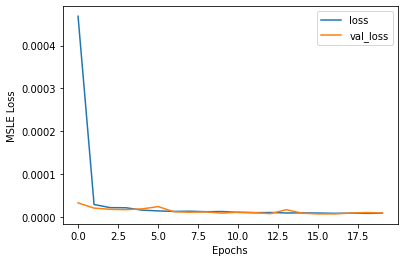

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)
  return preds

threshold1 = find_threshold(model1, x_train1)
print(f"Threshold: {threshold1}")
# Threshold: 0.00019773795921376524
predictions1 = get_predictions(model1, x_test1, threshold1)
accuracy_score(predictions1, y_test1)
#0.9498526956692527

25458/25458 [==============================] - 32s 1ms/step
Threshold: 0.00019773795921376524
6365/6365 [==============================] - 8s 1ms/step


0.9498526956692527

In [ ]:
predictions1

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
203655    1.0
203656    1.0
203657    1.0
203658    1.0
203659    1.0
Length: 203660, dtype: float64

In [ ]:
predicted_values1 = pd.DataFrame(predictions1, columns = ['binary_type'])
print(predicted_values1)

        binary_type
0               1.0
1               1.0
2               1.0
3               1.0
4               1.0
...             ...
203655          1.0
203656          1.0
203657          1.0
203658          1.0
203659          1.0

[203660 rows x 1 columns]


In [ ]:
predicted_values1.to_csv('predicted1.csv')

In [ ]:
predicted_values1 = pd.read_csv('predicted1.csv')

In [ ]:
predicted_values1

,Unnamed: 0,binary_type
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
...,...,...
203655,203655,1.0
203656,203656,1.0
203657,203657,1.0
203658,203658,1.0


In [ ]:
predicted_values1=predicted_values1[['binary_type']]
predicted_values1

,binary_type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
203655,1.0
203656,1.0
203657,1.0
203658,1.0


In [ ]:
predicted_values1['binary_type'].unique()

array([1., 0.])

In [ ]:
y_test2=y_test[['botnet_type']]
y_test2=y_test2[y_test2['botnet_type'] != 0] 

In [ ]:
y_train2=y_train[['botnet_type']]
y_train2=y_train2[y_train2['botnet_type'] != 0] 

In [ ]:
y_train2

,botnet_type
767627,2
630569,2
597668,2
262903,1
542221,2
...,...
784054,2
497882,2
372930,2
613947,2


In [ ]:
x_train2=x_train.copy(deep=True)
x_train2['botnet_type']=y_train['botnet_type']
x_train2=x_train2[x_train2['botnet_type']!=0]
x_train2.drop(columns=['botnet_type'],inplace=True)
# X_train3=X_train2.copy(deep=True)
# X_train2= stardard_scaler.fit_transform(X_train2)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
x_train2

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
135568,149.294713,79.491234,4512.705291,254.075231,80.118200,5027.470987,791.195955,78.220967,3438.460737,7156.548949,...,0.000000e+00,0.0,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0
423391,110.761621,493.550582,31410.487209,197.811505,451.580003,44804.582723,640.602788,411.562264,54294.378325,6396.675256,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.000000,0.000000e+00,0.0,0.0
63553,159.155387,74.011329,0.271881,269.883983,74.021006,0.535197,817.284532,74.075812,30.314136,6059.043753,...,0.000000e+00,0.0,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0
89192,175.215946,73.958917,0.483067,282.524191,73.938582,0.895438,816.413528,73.962627,1.349574,7758.868515,...,1.818989e-12,0.0,0.0,1.701813,74.0,0.000000,95.268043,0.000000e+00,0.0,0.0
642287,152.136268,352.310329,58955.973310,247.097323,353.864741,58812.656593,685.932618,371.698606,56821.895096,6411.512620,...,0.000000e+00,0.0,0.0,1.000000,554.0,0.000000,554.000000,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202177,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0
628257,156.161482,254.554674,58258.184409,236.423657,305.006443,61003.532111,652.400199,358.323824,58370.830628,6396.359859,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0
1013247,123.775955,73.926824,1.019110,205.196795,73.928586,0.994695,612.797011,73.924875,1.046134,6566.625057,...,0.000000e+00,0.0,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0
206975,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.0,0.0


In [ ]:
x_test2=x_test.copy(deep=True)
x_test2['botnet_type']=y_test['botnet_type']
x_test2=x_test2[x_test2['botnet_type']!=0]
x_test2.drop(columns=['botnet_type'],inplace=True)

In [ ]:
x_test2

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
534206,28.485167,60.000001,2.168861e-05,46.123770,60.000150,2.246230e-03,181.252456,60.006391,0.095848,2225.970857,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0
814007,69.954912,499.478196,2.395873e+04,129.233660,443.613609,4.233665e+04,455.665810,369.729003,57056.036704,4116.186461,...,8.731149e-10,0.0,0.0,4539.121638,554.0,0.000046,554.0,2.153683e-09,0.0,0.0
675933,116.418563,489.065198,2.786126e+04,201.595749,447.608149,4.123832e+04,629.854586,402.354648,51915.334610,6424.146153,...,0.000000e+00,0.0,0.0,1.000000,554.0,0.000000,554.0,0.000000e+00,0.0,0.0
259755,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0
868678,127.725974,231.053718,5.524116e+04,186.689257,278.039433,6.017029e+04,509.776679,321.678630,60793.066643,5012.644888,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990974,183.407224,65.654638,4.719000e+01,269.988056,66.727840,4.892594e+01,704.669475,68.408999,47.015874,6695.433190,...,0.000000e+00,0.0,0.0,1.000000,74.0,0.000000,74.0,0.000000e+00,0.0,0.0
482163,56.766601,60.000000,9.094947e-13,76.836888,60.000000,4.733920e-10,215.121497,60.000039,0.000678,2260.975164,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0
513441,86.531288,60.000000,2.273737e-12,103.205351,60.000000,2.628440e-10,235.179218,60.000047,0.002241,2279.066193,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0
593146,115.211188,493.582692,2.617711e+04,201.332710,455.922522,3.881895e+04,629.359279,410.149717,50364.747311,6285.445394,...,0.000000e+00,0.0,0.0,1.000000,554.0,0.000000,554.0,0.000000e+00,0.0,0.0


In [ ]:
train_index2 = y_train2[y_train2['botnet_type']!=1].index
train_data2 = x_train2.loc[train_index2]

In [ ]:
train_data2

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
423391,110.761621,493.550582,3.141049e+04,197.811505,451.580003,44804.582723,640.602788,411.562264,54294.378325,6396.675256,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0
642287,152.136268,352.310329,5.895597e+04,247.097323,353.864741,58812.656593,685.932618,371.698606,56821.895096,6411.512620,...,0.000000e+00,0.0,0.0,1.000000,554.0,0.000000,554.0,0.000000e+00,0.0,0.0
796955,122.204245,384.029108,5.507552e+04,213.625006,369.948260,57046.514730,651.081149,373.650259,56566.323622,6419.580903,...,0.000000e+00,0.0,0.0,1.000000,554.0,0.000000,554.0,0.000000e+00,0.0,0.0
710048,148.168541,335.740596,6.008484e+04,238.209223,338.821139,59925.155352,662.776875,360.535886,58112.696043,6420.701870,...,0.000000e+00,0.0,0.0,1.000000,554.0,0.000000,554.0,0.000000e+00,0.0,0.0
594253,174.808188,220.893668,5.359470e+04,262.670324,275.395182,60010.067154,691.519478,343.528093,59673.921910,6360.792230,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540354,82.851903,60.000000,3.797140e-10,100.344633,60.000000,0.000007,234.143184,60.001392,0.066354,2280.784161,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0
636124,160.606226,282.181737,6.039305e+04,243.841147,326.987376,60609.504796,662.073355,367.927044,57296.842965,6381.006928,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0
628257,156.161482,254.554674,5.825818e+04,236.423657,305.006443,61003.532111,652.400199,358.323824,58370.830628,6396.359859,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0
1013247,123.775955,73.926824,1.019110e+00,205.196795,73.928586,0.994695,612.797011,73.924875,1.046134,6566.625057,...,0.000000e+00,0.0,0.0,1.000000,74.0,0.000000,74.0,0.000000e+00,0.0,0.0


In [ ]:
x_test2['binary_type'].unique()

array([1.])

In [ ]:
y_test2

,botnet_type
1011316,2
660212,2
640383,2
413338,2
520973,2
...,...
923570,2
957138,2
547585,2
98255,1


In [ ]:
train_data2

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type
623988,86.981474,490.714573,27257.955617,161.802493,466.716798,35499.544289,575.792383,416.692018,48976.361996,6313.547731,...,0.000000e+00,0.000000e+00,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1
8072,1.000046,101.999816,0.000734,1.002494,101.990049,0.039705,1.135611,101.522331,1.682544,2.720518,...,-2.400000e-29,-1.320000e-17,4.219310,102.0,0.000001,144.249783,2.570000e-12,-9.230000e-30,-5.080000e-18,0
1544,2.938281,102.000000,0.000001,2.962832,101.999872,0.000513,3.033121,101.939837,0.237032,4.342577,...,3.570000e-34,0.000000e+00,4.226603,102.0,0.000002,144.249783,3.640000e-12,9.300000e-30,0.000000e+00,0
653998,133.339919,421.877716,47812.110458,223.733506,395.387578,53196.632425,655.703693,382.752764,55269.970734,6436.678282,...,0.000000e+00,0.000000e+00,1.000000,554.0,0.000000,554.000000,0.000000e+00,0.000000e+00,0.000000e+00,1
214507,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426823,161.181682,214.043485,54215.271503,241.994892,271.298956,62266.366552,650.742452,346.283607,62895.616417,6377.379437,...,0.000000e+00,0.000000e+00,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1
517882,45.256943,60.080134,1.195593,63.613887,60.100597,1.498841,200.065114,60.056448,0.843707,2241.584353,...,0.000000e+00,0.000000e+00,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1
833676,87.325783,430.135672,45846.606168,157.880089,386.093576,54753.206220,500.526633,349.436609,59207.890475,4996.659209,...,0.000000e+00,0.000000e+00,12196.141373,554.0,0.000048,554.000000,2.270099e-09,0.000000e+00,0.000000e+00,1
459086,84.676743,530.898445,16529.267494,155.541305,486.667886,33848.465379,547.514861,418.624577,52852.443985,6204.296451,...,0.000000e+00,0.000000e+00,1.000000,566.0,0.000000,566.000000,0.000000e+00,0.000000e+00,0.000000e+00,1


In [ ]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train2 = min_max_scaler.fit_transform(train_data2.copy())
# x_test2 = min_max_scaler.transform(X_test2.copy())

In [ ]:
x_train2

array([[4.39970352e-01, 2.85755839e-01, 3.50567843e-01, ...,
        7.39219950e-03, 1.54336042e-01, 0.00000000e+00],
       [0.00000000e+00, 8.32667268e-17, 0.00000000e+00, ...,
        7.39219950e-03, 1.54336042e-01, 0.00000000e+00],
       [4.59673259e-01, 3.23631487e-01, 3.67336902e-01, ...,
        7.39219950e-03, 1.54336042e-01, 0.00000000e+00],
       ...,
       [3.35179567e-01, 2.30745801e-07, 1.64632229e-08, ...,
        7.39219950e-03, 1.54336042e-01, 0.00000000e+00],
       [0.00000000e+00, 8.32667268e-17, 0.00000000e+00, ...,
        7.39219950e-03, 1.54336042e-01, 0.00000000e+00],
       [3.59806232e-01, 1.26955204e-02, 2.12042999e-04, ...,
        7.39219950e-03, 1.54336042e-01, 0.00000000e+00]])

In [ ]:
# x_test2['binary_type']=predicted_values1.values

In [ ]:
x_test2

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type
482166,59.358051,60.000000,0.000000e+00,79.504616,60.000000,4.547474e-10,217.810968,60.000038,0.000669,2263.648582,...,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
469333,44.000982,60.000000,7.275958e-12,62.211589,60.000000,8.207126e-07,199.300715,60.000683,0.032573,2228.595818,...,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
419981,122.161589,410.832310,5.442522e+04,213.304975,390.814645,5.793295e+04,645.612903,387.396520,58453.907907,6360.137297,...,0.000000e+00,0.0,1.000000,566.0,0.000000,566.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
617549,113.126890,447.565450,4.125034e+04,191.128835,442.421141,4.266984e+04,615.886212,410.383142,50318.673187,6332.942554,...,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25373,3.067424,101.074805,3.800221e+01,3.198461,99.392861,1.027024e+02,3.601540,95.176608,239.256092,5.178139,...,7.000000e-40,0.0,3.638687,102.0,0.000002,144.249783,5.140000e-12,2.330000e-28,6.390000e-17,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431394,141.857690,342.386073,6.314497e+04,217.547870,378.141916,5.976233e+04,626.678281,395.845949,57134.292168,6322.524521,...,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
156986,34.061459,74.578672,9.752891e+01,64.424424,74.925317,2.218624e+02,214.515448,75.508509,674.278382,1189.062339,...,0.000000e+00,0.0,1.979229,74.0,0.000001,74.000000,1.818989e-12,0.000000e+00,0.000000e+00,1.0
845794,139.595352,199.660531,4.948646e+04,200.506604,248.156328,5.754414e+04,521.169935,306.117206,61002.612946,5002.644530,...,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0
563140,118.329560,60.019273,9.247166e-01,136.845484,60.056376,2.702833e+00,272.745380,60.096645,4.597930,2317.247918,...,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0


In [ ]:
y_test2

,botnet_type
482166,2
469333,2
419981,2
617549,2
25373,0
...,...
431394,2
156986,1
845794,2
563140,2


In [ ]:
x_test2= min_max_scaler.transform(x_test2.copy())

In [ ]:
y_train2

,botnet_type
482166,2
469333,2
419981,2
617549,2
60130,1
...,...
431394,2
156986,1
845794,2
563140,2


In [ ]:
x_test2

array([[1.71922395e-01, 1.11022302e-16, 0.00000000e+00, ...,
        7.39219950e-03, 2.61200068e-01, 0.00000000e+00],
       [1.26680580e-01, 3.19189120e-16, 4.18907087e-17, ...,
        7.39219950e-03, 2.61200068e-01, 0.00000000e+00],
       [3.56941159e-01, 4.24650674e-01, 3.13348563e-01, ...,
        7.39219950e-03, 2.61200068e-01, 0.00000000e+00],
       ...,
       [4.08300899e-01, 1.69046398e-01, 2.84914072e-01, ...,
        7.39219950e-03, 2.61200068e-01, 0.00000000e+00],
       [3.45652032e-01, 2.33278140e-05, 5.32397713e-06, ...,
        7.39219950e-03, 2.61200068e-01, 0.00000000e+00],
       [0.00000000e+00, 8.32667268e-17, 0.00000000e+00, ...,
        7.39219950e-03, 2.61200068e-01, 0.00000000e+00]])

In [ ]:
x_test2

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
301484,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
631198,120.977164,417.737244,48746.261471,211.644454,392.219431,53746.596239,645.158393,380.192587,55650.517952,6388.743759,...,0.000000e+00,0.000000e+00,0.0,1.000000,554.0,0.000000,554.000000,0.000000e+00,0.000000e+00,0.000000e+00
711851,223.075251,294.668544,60856.935095,312.187391,332.037203,60382.120201,746.593961,368.818612,57185.594276,6516.258678,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
810882,130.535751,408.717605,50656.779928,222.180692,385.782089,54789.478649,655.496617,376.313603,56187.722490,6442.015203,...,0.000000e+00,0.000000e+00,0.0,1.000000,554.0,0.000000,554.000000,0.000000e+00,0.000000e+00,0.000000e+00
858206,148.334557,179.596736,44776.838288,229.822823,227.959428,54758.221995,660.817942,291.404660,60755.020485,5145.655025,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157206,64.684514,88.371449,11718.625042,84.970489,87.646151,11099.120001,138.748422,84.894054,8754.208703,1089.127038,...,9.094947e-13,0.000000e+00,0.0,2.898512,74.0,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000e+00
596890,137.562355,315.842956,60916.816241,216.128920,354.807571,58708.356688,636.217167,376.997409,56100.402242,6312.905657,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
46366,3.198302,99.257626,107.659103,3.384410,97.151081,180.142375,3.745255,93.784231,276.902127,5.218498,...,3.640000e-12,8.530000e-53,0.0,4.219373,102.0,0.000001,144.249783,4.070000e-12,-6.500000e-29,-2.530000e-17
435591,141.940924,360.941938,61710.570545,221.459661,392.631828,57667.771905,645.019832,403.108110,55889.513497,6349.130716,...,0.000000e+00,0.000000e+00,0.0,1.000000,566.0,0.000000,566.000000,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
# X_train3['botnet_type']=y_train['botnet_type']
# X_train3= stardard_scaler.fit_transform(X_train3)

# X_test3=X_test.copy(deep=True)

# y_train2=y_train['botnet_type']

# y_train3=y_train['attack_type']

# y_test2=y_test['botnet_type']

# y_test3=y_test['attack_type']


In [ ]:

class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units
  
  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
            layers.Dense(115, activation="relu"),
            layers.Dense(86, activation="relu"),
            layers.Dense(57, activation="relu"),
            layers.Dense(37, activation="relu"),
            layers.Dense(28, activation="relu")
        ])
    self.decoder = Sequential([
        layers.Dense(37, activation="relu"),
        layers.Dense(57, activation="relu"),
        layers.Dense(86, activation="relu"),
        layers.Dense(115, activation="sigmoid")
    ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded
  
model2 = AutoEncoder(output_units=x_train2.shape[1])

model2.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model2.fit(
    x_train2,
    x_train2,
    epochs=20,
    batch_size=64,
    validation_data=(x_test2, x_test2)
)

Epoch 1/20
8152/8152 [==============================] - 32s 4ms/step - loss: 6.9221e-04 - mse: 0.0013 - val_loss: 0.0022 - val_mse: 12413.6934
Epoch 2/20
8152/8152 [==============================] - 28s 3ms/step - loss: 3.9742e-05 - mse: 1.0019e-04 - val_loss: 0.0023 - val_mse: 12413.6934
Epoch 3/20
8152/8152 [==============================] - 30s 4ms/step - loss: 3.3280e-05 - mse: 8.4171e-05 - val_loss: 0.0021 - val_mse: 12413.6934
Epoch 4/20
8152/8152 [==============================] - 29s 4ms/step - loss: 1.9817e-05 - mse: 5.0911e-05 - val_loss: 0.0019 - val_mse: 12413.6934
Epoch 5/20
8152/8152 [==============================] - 27s 3ms/step - loss: 1.8028e-05 - mse: 4.5221e-05 - val_loss: 0.0018 - val_mse: 12413.6934
Epoch 6/20
8152/8152 [==============================] - 28s 3ms/step - loss: 1.6012e-05 - mse: 3.9800e-05 - val_loss: 0.0021 - val_mse: 12413.6934
Epoch 7/20
8152/8152 [==============================] - 29s 4ms/step - loss: 1.9258e-05 - mse: 4.6541e-05 - val_loss: 0.00

In [ ]:
model2.save("model_ae2",save_format='tf')

In [ ]:
import tensorflow
from tensorflow.keras.models import load_model
 
# load model
model2 = tf.keras.models.load_model("model_ae2")
model2.summary()

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28)                31485     
                                                                 
 sequential_1 (Sequential)   (None, 115)               18232     
                                                                 
Total params: 49,717
Trainable params: 49,717
Non-trainable params: 0
_________________________________________________________________


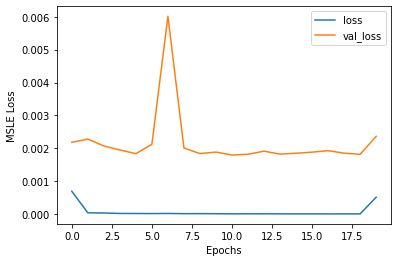

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 1 = anomaly, 2 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 1.0 if x == True else 2.0)
  return preds

threshold2 = find_threshold(model2, x_train2)
print(f"Threshold: {threshold2}")
# Threshold: 0.003627714518121495
predictions2 = get_predictions(model2, x_test2, threshold2)
accuracy_score(predictions2, y_test2)
# 0.6479741935483871

16303/16303 [==============================] - 19s 1ms/step
Threshold: 0.003627714518121495
6055/6055 [==============================] - 7s 1ms/step


0.6479741935483871

In [ ]:
np.unique(predictions2)

array([1., 2.])

## Autoencoder based anomaly detection



In [ ]:

import os
import numpy as np
import tensorflow as tf
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, losses, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def load_nbaiot(filename):
    return np.loadtxt(
        os.path.join("/content/nbaiot-dataset", filename),
        delimiter=",",
        skiprows=1
    )

# benign1 = load_nbaiot("1.benign.csv")
# X_train1 = benign1[:40000]
# X_test0 = benign1[40000:]
# X_test1 = load_nbaiot("1.mirai.scan.csv")
# X_test2 = load_nbaiot("1.mirai.ack.csv")
# X_test3 = load_nbaiot("1.mirai.syn.csv")
# X_test4 = load_nbaiot("1.mirai.udp.csv")
# X_test5 = load_nbaiot("1.mirai.udpplain.csv")

# benign2 = load_nbaiot("2.benign.csv")
# X_train2 = benign2[:40000]
# X_test6 = benign2[40000:]
# X_test7 = load_nbaiot("2.mirai.scan.csv")
# X_test8 = load_nbaiot("2.mirai.ack.csv")
# X_test9 = load_nbaiot("2.mirai.syn.csv")
# X_test10 = load_nbaiot("2.mirai.udp.csv")
# X_test11 = load_nbaiot("2.mirai.udpplain.csv")

benign3 = load_nbaiot("4.benign.csv")
X_train3 = benign3[:40000]
X_test12 = benign3[40000:]
X_test13 = load_nbaiot("4.mirai.scan.csv")
X_test14 = load_nbaiot("4.mirai.ack.csv")
X_test15 = load_nbaiot("4.mirai.syn.csv")
X_test16 = load_nbaiot("4.mirai.udp.csv")
X_test17 = load_nbaiot("4.mirai.udpplain.csv")

# benign4 = load_nbaiot("5.benign.csv")
# X_train4 = benign4[:40000]
# X_test18 = benign4[40000:]
# X_test19 = load_nbaiot("5.mirai.scan.csv")
# X_test20 = load_nbaiot("5.mirai.ack.csv")
# X_test21 = load_nbaiot("5.mirai.syn.csv")
# X_test22 = load_nbaiot("5.mirai.udp.csv")
# X_test23 = load_nbaiot("5.mirai.udpplain.csv")

In [ ]:
print(X_train3.shape, X_test12.shape, X_test13.shape, X_test8.shape,X_test9.shape, X_test10.shape, X_test11.shape)

(40000, 115) (135240, 115) (103621, 115) (91123, 115) (118128, 115) (217034, 115) (80808, 115)


##4. Deep Learning - Multi-Output Classification - device 1 (doorbell)_previous

Shuffling the dataset

In [ ]:
# df1_t = df1_t.sample(frac=1).reset_index(drop=True)
# df2_t = df2_t.sample(frac=1).reset_index(drop=True)
# df4_t = df4_t.sample(frac=1).reset_index(drop=True)
# df5_t = df5_t.sample(frac=1).reset_index(drop=True)


Label Encoding the classes

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df1_m['binary_type']= label_encoder.fit_transform(df1_m['binary_type'])
label_encoder.classes_

In [ ]:
df1_m['botnet_type']= label_encoder.fit_transform(df1_m['botnet_type'])
label_encoder.classes_

In [ ]:
df1_m['attack_type'] = df1_m['attack_type'].apply(lambda x: ['benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain'].index(x))

In [ ]:
df1_m['attack_type'].unique()
#'benign', 'ack', 'combo', 'junk', 'scan', 'syn', 'tcp', 'udp','udpplain' (0-8 in order)

In [ ]:
df1_m

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type,attack_type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0,0,0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,0,0,0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,0,0,0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,0,0,0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018293,120.082973,73.889894,1.529364,200.220921,73.911778,1.227327,601.058212,73.930584,0.967005,6297.410037,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1,2,5
1018294,117.760838,73.890829,1.516479,197.878784,73.912224,1.221164,598.695092,73.930700,0.965398,6294.877524,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1,2,5
1018295,118.760060,73.891748,1.503809,198.877999,73.912665,1.215062,599.694301,73.930816,0.963796,6295.876691,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1,2,5
1018296,119.614817,73.892653,1.491334,199.732027,73.913102,1.209016,600.547544,73.930931,0.962199,6296.722602,...,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0,1,2,5


In [ ]:
X1 = df1_m.drop(['binary_type','botnet_type','attack_type'], axis=1) 
#X1 is the entire dataset without the target columns

# y1 = df1_m['binary_type']
# X2 = df1_m.drop(['botnet_type','attack_type'], axis=1)
# y2 = df1_m['botnet_type']
# X3 = df1_m.drop(['attack_type'], axis=1)
# y3 = df1_m['attack_type']

In [ ]:
X1

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,34.095047,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,100.081513,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018293,120.082973,73.889894,1.529364,200.220921,73.911778,1.227327,601.058212,73.930584,0.967005,6297.410037,...,0.000000,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0
1018294,117.760838,73.890829,1.516479,197.878784,73.912224,1.221164,598.695092,73.930700,0.965398,6294.877524,...,0.000000,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0
1018295,118.760060,73.891748,1.503809,198.877999,73.912665,1.215062,599.694301,73.930816,0.963796,6295.876691,...,0.000000,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0
1018296,119.614817,73.892653,1.491334,199.732027,73.913102,1.209016,600.547544,73.930931,0.962199,6296.722602,...,0.000000,0.0,0.0,1.000000,74.000000,0.000000,74.000000,0.000000,0.0,0.0


In [ ]:
y=df1_m[['binary_type','botnet_type','attack_type']]
#y is all the target columns together
y

Splitting dataset for training and testing, same datasets used in all levels with columns added according to each level

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=1,stratify=y_rem)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
748695,129.710698,371.980510,5.678653e+04,214.460755,389.820889,5.414970e+04,709.205153,382.120398,55365.910183,6484.344238,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
776245,115.385283,445.190086,4.191250e+04,204.984094,412.284411,4.992410e+04,637.720388,387.782447,54481.585709,6403.051832,...,0.000000e+00,0.000000e+00,0.0,1.000000,554.0,0.000000,554.000000,0.000000e+00,0.000000e+00,0.000000e+00
885291,81.972677,431.459754,4.551877e+04,150.578909,385.668065,5.482031e+04,488.852333,347.756944,59345.499000,5032.302197,...,2.328306e-10,0.000000e+00,0.0,22442.511742,554.0,0.000064,554.000000,4.074536e-09,0.000000e+00,0.000000e+00
32807,3.999764,102.000000,1.820000e-12,3.999858,102.000000,3.980000e-10,4.000052,101.998981,0.042673,5.109537,...,3.640000e-12,-3.900000e-69,0.0,4.199907,102.0,0.000001,144.249783,2.570000e-12,9.210000e-29,5.060000e-17
378081,177.411456,247.376869,5.970260e+04,263.511280,294.098554,6.365174e+04,691.950729,358.812855,61910.084440,6243.383849,...,0.000000e+00,0.000000e+00,0.0,1.000000,566.0,0.000000,566.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26799,3.936325,101.999992,3.210000e-05,3.962307,101.999124,3.504150e-03,4.082417,101.906536,0.365121,5.378486,...,0.000000e+00,-7.270000e-40,0.0,4.219166,102.0,0.000000,144.249783,1.820000e-12,-2.500000e-29,0.000000e+00
356690,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
1011225,124.584763,73.950601,6.891456e-01,205.297874,73.937349,8.731889e-01,624.271343,73.595225,5.503752,6745.640480,...,0.000000e+00,0.000000e+00,0.0,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000e+00
233721,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)

# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
# X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42, stratify=y4)
# X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42, stratify=y5)

Normalisation

In [ ]:
stardard_scaler = MinMaxScaler()
X_train1= stardard_scaler.fit_transform(X_train)
X_val1 = stardard_scaler.transform(X_val)
X_test1 = stardard_scaler.transform(X_test)

# stardard_scaler = MinMaxScaler()
# X_train2= stardard_scaler.fit_transform(X_train2)
# X_test2 = stardard_scaler.transform(X_test2)

# stardard_scaler = MinMaxScaler()
# X_train3= stardard_scaler.fit_transform(X_train3)
# X_test3 = stardard_scaler.transform(X_test3)


In [ ]:
X_train

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
133891,179.419080,74.260452,90.617186,290.805783,74.439460,161.782284,824.404224,74.605283,232.133235,6972.680155,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
377085,176.434992,236.992084,58231.796674,258.148512,291.002554,63525.106367,676.758568,358.621120,61927.259313,6182.105563,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
284943,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
137008,152.484610,74.013367,1.181683,266.843980,74.056525,29.556745,824.234931,74.763143,603.676796,7357.126266,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
60398,146.666232,73.987909,12.983239,225.933452,74.191739,157.946317,484.944283,76.112955,1721.162697,5038.949579,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387522,122.307287,439.207423,48080.686481,211.679910,411.067347,54391.795396,636.935581,394.918619,57298.069507,6302.336017,...,0.0,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0
989757,112.644704,72.635278,17.243980,198.453873,71.545825,28.337580,644.172131,70.165421,38.987385,6645.809402,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
945696,171.798407,66.845422,48.976106,260.114319,67.408755,48.832925,690.967680,68.545401,46.634811,6646.330631,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
948750,130.276287,71.025758,32.793273,223.370158,70.135163,39.170753,673.032430,69.510358,42.698335,6637.679327,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0


### Deep Neural Network

In [ ]:
def model_accuracy(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
def model_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
y_train

,binary_type,botnet_type,attack_type
133891,1,1,3
377085,1,2,1
284943,1,1,7
137008,1,1,3
60398,1,1,2
...,...,...,...
387522,1,2,1
989757,1,2,5
945696,1,2,5
948750,1,2,5


In [ ]:
X_test

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
688426,111.412816,482.486250,3.021289e+04,195.326363,442.021827,42774.369684,611.989100,398.738673,52581.560712,6334.687034,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
495201,109.816761,60.000612,9.172923e-03,129.195663,60.004523,0.067830,265.693605,60.019733,0.295602,2309.239228,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
670234,151.221831,357.441044,5.846470e+04,243.557298,354.168119,58784.168503,675.832471,369.131824,57148.615342,6467.272513,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
48459,1.999983,102.000000,3.640000e-12,1.999990,102.000000,0.000000,2.000000,101.999948,0.001673,4.068790,...,2.173887e-01,0.000002,0.000018,3.468238,97.902679,12.461919,138.638978,1.808769e+02,33.199448,0.276656
114186,195.333304,74.035767,8.575975e-01,314.392518,74.040804,1.066250,905.112930,74.061734,11.055411,4008.808270,...,0.000000e+00,0.000000,0.000000,1.000000,74.000000,0.000000,74.000000,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210473,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
349819,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
873324,77.913030,464.698536,3.604864e+04,142.299424,413.051711,49711.767633,478.008293,358.390986,58352.483719,5019.806738,...,5.820766e-10,0.000000,0.000000,20909.130131,554.000000,0.000058,554.000000,3.376044e-09,0.000000,0.000000
210432,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000


Changing the training and testing datasets according to the level in which its used

In [ ]:
X_train

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,binary_type,botnet_type
133891,179.419080,74.260452,90.617186,290.805783,74.439460,161.782284,824.404224,74.605283,232.133235,6972.680155,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,1
377085,176.434992,236.992084,58231.796674,258.148512,291.002554,63525.106367,676.758568,358.621120,61927.259313,6182.105563,...,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,2
284943,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,1,1
137008,152.484610,74.013367,1.181683,266.843980,74.056525,29.556745,824.234931,74.763143,603.676796,7357.126266,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,1
60398,146.666232,73.987909,12.983239,225.933452,74.191739,157.946317,484.944283,76.112955,1721.162697,5038.949579,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387522,122.307287,439.207423,48080.686481,211.679910,411.067347,54391.795396,636.935581,394.918619,57298.069507,6302.336017,...,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,1,2
989757,112.644704,72.635278,17.243980,198.453873,71.545825,28.337580,644.172131,70.165421,38.987385,6645.809402,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,2
945696,171.798407,66.845422,48.976106,260.114319,67.408755,48.832925,690.967680,68.545401,46.634811,6646.330631,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,2
948750,130.276287,71.025758,32.793273,223.370158,70.135163,39.170753,673.032430,69.510358,42.698335,6637.679327,...,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,1,2


In [ ]:
X_train2=X_train.copy(deep=True)
X_train2['binary_type']=y_train['binary_type']
X_train3=X_train2.copy(deep=True)
X_train2= stardard_scaler.fit_transform(X_train2)
X_train2

In [ ]:
X_val2=X_val.copy(deep=True)
X_val2['binary_type']=y_val['binary_type']
X_val3=X_val2.copy(deep=True)
X_val2= stardard_scaler.fit_transform(X_val2)
X_val2

In [ ]:
X_test2=X_test.copy(deep=True)
# X_test2['binary_type']=y_test['binary_type']
# X_test2 = stardard_scaler.transform(X_test2)

In [ ]:
X_test2.shape

(203660, 115)

In [ ]:
X_train3['botnet_type']=y_train['botnet_type']
X_train3= stardard_scaler.fit_transform(X_train3)

In [ ]:
X_val3['botnet_type']=y_val['botnet_type']
X_val3= stardard_scaler.fit_transform(X_val3)

In [ ]:
X_test3=X_test.copy(deep=True)
# X_test3['botnet_type']=y_test['botnet_type']
# X_test3 = stardard_scaler.transform(X_test3)

In [ ]:
y_train2=y_train['botnet_type']
y_train2

In [ ]:
y_val2=y_val['botnet_type']
y_val2

In [ ]:
y_train3=y_train['attack_type']
y_train3

In [ ]:
y_val3=y_val['attack_type']
y_val3

In [ ]:
y_test2=y_test['botnet_type']
y_test2

In [ ]:
y_test3=y_test['attack_type']
y_test3

In [ ]:
y_train1=y_train.drop(['botnet_type','attack_type'], axis=1)
y_train1

In [ ]:
y_val1=y_val.drop(['botnet_type','attack_type'], axis=1)
y_val1

In [ ]:
y_test1=y_test.drop(['botnet_type','attack_type'], axis=1)
y_test1

First Level DNN - Predicting the binary_type (whether benign or malicious)

In [ ]:
model1 = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(115, input_dim=X_train1.shape[1], activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
  # tf.keras.layers.Dropout(0.2),

In [ ]:
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 115)               13570     
                                                                 
 dense_1 (Dense)             (None, 256)               29696     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 84,483
Trainable params: 84,483
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train1

In [ ]:
history1 = model1.fit(X_train1, y_train1,validation_data=(X_val1, y_val1),callbacks = [early_stopping], epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
12729/12729 [==============================] - 48s 4ms/step - loss: 0.0016 - accuracy: 0.9996 - precision: 0.9998 - recall: 0.9998 - f1_score: 0.9751 - val_loss: 5.2532e-04 - val_accuracy: 0.9998 - val_precision: 0.9998 - val_recall: 1.0000 - val_f1_score: 0.9751
Epoch 2/35
12729/12729 [==============================] - 43s 3ms/step - loss: 4.9275e-04 - accuracy: 0.9999 - precision: 0.9999 - recall: 0.9999 - f1_score: 0.9761 - val_loss: 1.8351e-04 - val_accuracy: 0.9999 - val_precision: 1.0000 - val_recall: 1.0000 - val_f1_score: 0.9751
Epoch 3/35
12729/12729 [==============================] - 43s 3ms/step - loss: 3.7929e-04 - accuracy: 0.9999 - precision: 1.0000 - recall: 1.0000 - f1_score: 0.9784 - val_loss: 1.1657e-04 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_f1_score: 0.9751
Epoch 4/35
12729/12729 [==============================] - 45s 4ms/step - loss: 3.5174e-04 - accuracy: 0.9999 - precision: 1.0000 - recall: 1.0000 - f1_score: 0.9810 - 

In [ ]:
model1.save("model1.h5")

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1.h5')

Inference Time

In [ ]:
from datetime import datetime as dt

start = dt.now()

results1 = model1.evaluate(X_test1, y_test1, batch_size=64)
running_secs = (dt.now() - start).seconds
print(running_secs)

1592/1592 [==============================] - 3s 2ms/step - loss: 2.3996e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - f1_score: 0.9999
5


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# predict probabilities for test set
prediction1 = model1.predict(X_test1, verbose=0)
# predict crisp classes for test set
prediction_classes1=np.argmax(prediction1,axis=1)

In [ ]:
# reduce to 1d array
prediction1 = prediction1[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test1, prediction_classes1)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test1, prediction_classes1)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test1, prediction_classes1)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test1, prediction_classes1)
print('F1 score: %f' % f1)

In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test1,predicted_values1)
print(cm1)

In [ ]:
FP = cm1.sum(axis=0) - np.diag(cm1)  
FN = cm1.sum(axis=1) - np.diag(cm1)
TP = np.diag(cm1)
TN = cm1.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR)
print(FPR)

In [ ]:
overall_tpr=np.average(TPR)
overall_tpr

In [ ]:
overall_fpr=np.average(FPR)
overall_fpr

Getting the predictions on test set based on which next level classifications have to be done

In [ ]:
prediction1 = (model1.predict(X_test1) > 0.5).astype(int)
predicted_values1 = pd.DataFrame(prediction1, columns = ['binary_type'])
print(predicted_values1)

3183/3183 [==============================] - 9s 2ms/step
        binary_type
0                 1
1                 1
2                 0
3                 1
4                 1
...             ...
101825            1
101826            1
101827            1
101828            1
101829            1

[101830 rows x 1 columns]


In [ ]:
predicted_values1.to_csv('predic1.csv')

In [ ]:
predicted_values1 = pd.read_csv('predic1.csv')

In [ ]:
predicted_values1=predicted_values1[['binary_type']]

In [ ]:
predicted_values1

,binary_type
0,1
1,1
2,0
3,1
4,1
...,...
101825,1
101826,1
101827,1
101828,1


In [ ]:
prediction1.shape

(101830, 1)

In [ ]:
predicted_values1.shape

(101830, 1)

In [ ]:
y_test1.shape

(101830, 1)

Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test1,predicted_values1)
print(cm)

[[ 4954     1]
 [    4 96871]]


TPR, FPR

In [ ]:
tp = cm[0, 0]
fn = cm[0, 1]
fp = cm[1, 0]
tn = cm[1, 1]
tpr = tp / (tp + fn)
fpr = fp / (tn + fp)
print(tpr)
print(fpr)

0.9997981836528759
4.129032258064516e-05


In [ ]:
predicted_values1['binary_type'].unique()

KeyError: ignored

Second Level DNN - Predicting botnet_type (whether benign, bashlite or mirai)

In [ ]:
model2 = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(116, input_dim=X_train2.shape[1], activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(3, activation='softmax')
        ])

In [ ]:
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 116)               13688     
                                                                 
 dense_6 (Dense)             (None, 256)               29952     
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 84,987
Trainable params: 84,987
Non-trai

In [ ]:
X_test2.shape

(203660, 115)

Adding level 1 predictions in the test set to be able to predict the current level's outputs 

In [ ]:
X_test2['binary_type']=predicted_values1.values
X_test2= stardard_scaler.fit_transform(X_test2)
X_test2
#later try adding in training set also and see the difference

array([[0.00000000e+00, 6.93889390e-17, 0.00000000e+00, ...,
        1.03602179e-04, 1.54597265e-01, 1.00000000e+00],
       [3.51677070e-01, 4.80035028e-01, 2.94589517e-01, ...,
        1.03602179e-04, 1.54597265e-01, 1.00000000e+00],
       [8.83524300e-03, 5.45675215e-02, 1.06290987e-17, ...,
        1.03602179e-04, 1.54597265e-01, 0.00000000e+00],
       ...,
       [3.26813800e-01, 1.30465397e-02, 2.32132669e-04, ...,
        1.03602179e-04, 1.54597265e-01, 1.00000000e+00],
       [3.16541414e-01, 5.24022857e-01, 2.13566316e-01, ...,
        1.03602179e-04, 1.54597265e-01, 1.00000000e+00],
       [3.90724947e-01, 5.75260672e-12, 3.87868844e-13, ...,
        1.03602179e-04, 1.54597265e-01, 1.00000000e+00]])

In [ ]:
X_test2.shape

(203660, 116)

In [ ]:
y_test2

,botnet_type
688426,2
495201,2
670234,2
48459,0
114186,1
...,...
210473,1
349819,1
873324,2
210432,1


In [ ]:
X_test2.shape

(203660, 116)

In [ ]:
history2 = model2.fit(X_train2,y_train2,validation_data=(X_val2, y_val2),callbacks = [early_stopping],epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
12729/12729 [==============================] - 57s 4ms/step - loss: 0.0034 - sparse_categorical_accuracy: 0.9991 - val_loss: 4.7508e-04 - val_sparse_categorical_accuracy: 0.9999
Epoch 2/35
12729/12729 [==============================] - 42s 3ms/step - loss: 0.0014 - sparse_categorical_accuracy: 0.9999 - val_loss: 4.7232e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/35
12729/12729 [==============================] - 45s 3ms/step - loss: 8.2371e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 3.3823e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/35
12729/12729 [==============================] - 64s 5ms/step - loss: 0.0011 - sparse_categorical_accuracy: 0.9999 - val_loss: 3.3277e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/35
12729/12729 [==============================] - 55s 4ms/step - loss: 0.0012 - sparse_categorical_accuracy: 0.9999 - val_loss: 7.5611e-04 - val_sparse_categorical_accuracy: 0.9999
Epoch 6/35
12729/12729 [===========================

In [ ]:
# model_accuracy(history2) #need to change the function for sparse categorical accuracy

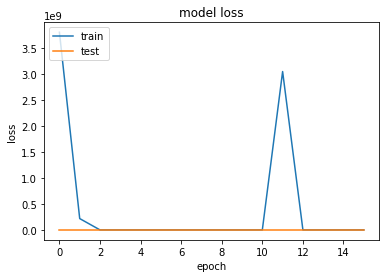

In [ ]:
model_loss(history2)

In [ ]:
model2.save("model2.h5")

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model2 = load_model('model2.h5')

Inference Time

In [ ]:
from datetime import datetime as dt
start = dt.now()
results2 = model2.evaluate(X_test2, y_test2, batch_size=64)
running_secs = (dt.now() - start).seconds
print(running_secs)

1592/1592 [==============================] - 2s 2ms/step - loss: 2.1039 - sparse_categorical_accuracy: 0.9608
2


In [ ]:
results2

[2.103904962539673, 0.9607875943183899]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# predict probabilities for test set
prediction2 = model2.predict(X_test2, verbose=0)
# predict crisp classes for test set
prediction_classes2=np.argmax(prediction2,axis=1)

In [ ]:
# reduce to 1d array
prediction2 = prediction2[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test2, prediction_classes2)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test2, prediction_classes2,average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test2, prediction_classes2,average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test2, prediction_classes2,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.960788
Precision: 0.962679
Recall: 0.977600
F1 score: 0.968713


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test2, prediction_classes2)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test2, prediction_classes2,average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test2, prediction_classes2,average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test2, prediction_classes2,average='macro')
print('F1 score: %f' % f1)

NameError: ignored

Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test2,prediction_classes2)
print(cm2)

[[ 4923    30     2]
 [    0 31665     0]
 [    0  3961 61249]]


TPR, FPR

In [ ]:
FP = cm2.sum(axis=0) - np.diag(cm2)  
FN = cm2.sum(axis=1) - np.diag(cm2)
TP = np.diag(cm2)
TN = cm2.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR)
print(FPR)

[0.99354188 1.         0.93925778]
[0.00000000e+00 5.68802109e-02 5.46149645e-05]


In [ ]:
overall_tpr=np.average(TPR)
overall_tpr

0.9775998864802391

In [ ]:
overall_fpr=np.average(FPR)
overall_fpr

0.018978275298625436

Predictions for second level which will be used for next level

In [ ]:
predicted_values2 = pd.DataFrame(prediction_classes2, columns = ['botnet_type'])
print(predicted_values2)

        botnet_type
0                 1
1                 2
2                 0
3                 2
4                 1
...             ...
101825            2
101826            2
101827            2
101828            2
101829            2

[101830 rows x 1 columns]


In [ ]:
predicted_values2.to_csv('predic2.csv')

In [ ]:
predicted_values2 = pd.read_csv('predic2.csv')
predicted_values2=predicted_values2[['botnet_type']]

In [ ]:
predicted_values2['botnet_type'].unique() 

array([1, 2, 0])

Third level DNN - Predicts attack_type 

In [ ]:
model3 = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(117, input_dim=X_train3.shape[1], activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(9, activation='softmax')
        ])
  # tf.keras.layers.Dropout(0.2),

In [ ]:
from keras.callbacks import EarlyStopping
lr = 0.001
epochs = 35
opt = tf.keras.optimizers.Adam(learning_rate=lr)
early_stopping = EarlyStopping(monitor="loss", patience = 10)
model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 117)               13806     
                                                                 
 dense_6 (Dense)             (None, 256)               30208     
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                 520       
                                                                 
Total params: 85,686
Trainable params: 85,686
Non-trai

In [ ]:
X_test3

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
688426,111.412816,482.486250,3.021289e+04,195.326363,442.021827,42774.369684,611.989100,398.738673,52581.560712,6334.687034,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
495201,109.816761,60.000612,9.172923e-03,129.195663,60.004523,0.067830,265.693605,60.019733,0.295602,2309.239228,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
670234,151.221831,357.441044,5.846470e+04,243.557298,354.168119,58784.168503,675.832471,369.131824,57148.615342,6467.272513,...,0.000000e+00,0.000000,0.000000,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000,0.000000
48459,1.999983,102.000000,3.640000e-12,1.999990,102.000000,0.000000,2.000000,101.999948,0.001673,4.068790,...,2.173887e-01,0.000002,0.000018,3.468238,97.902679,12.461919,138.638978,1.808769e+02,33.199448,0.276656
114186,195.333304,74.035767,8.575975e-01,314.392518,74.040804,1.066250,905.112930,74.061734,11.055411,4008.808270,...,0.000000e+00,0.000000,0.000000,1.000000,74.000000,0.000000,74.000000,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210473,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
349819,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000
873324,77.913030,464.698536,3.604864e+04,142.299424,413.051711,49711.767633,478.008293,358.390986,58352.483719,5019.806738,...,5.820766e-10,0.000000,0.000000,20909.130131,554.000000,0.000058,554.000000,3.376044e-09,0.000000,0.000000
210432,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000,0.000000


Adding the last two predictions to this test set

In [ ]:
X_test3['binary_type']=predicted_values1.values
X_test3['botnet_type']=predicted_values2.values
X_test3= stardard_scaler.fit_transform(X_test3)
X_test3

array([[0.00000000e+00, 6.93889390e-17, 0.00000000e+00, ...,
        1.54597265e-01, 1.00000000e+00, 5.00000000e-01],
       [3.51677070e-01, 4.80035028e-01, 2.94589517e-01, ...,
        1.54597265e-01, 1.00000000e+00, 1.00000000e+00],
       [8.83524300e-03, 5.45675215e-02, 1.06290987e-17, ...,
        1.54597265e-01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.26813800e-01, 1.30465397e-02, 2.32132669e-04, ...,
        1.54597265e-01, 1.00000000e+00, 1.00000000e+00],
       [3.16541414e-01, 5.24022857e-01, 2.13566316e-01, ...,
        1.54597265e-01, 1.00000000e+00, 1.00000000e+00],
       [3.90724947e-01, 5.75260672e-12, 3.87868844e-13, ...,
        1.54597265e-01, 1.00000000e+00, 1.00000000e+00]])

In [ ]:
X_test3.shape

(203660, 117)

In [ ]:
history3 = model3.fit(X_train3,y_train3,validation_data=(X_val3, y_val3),callbacks = [early_stopping],epochs=epochs,batch_size=64,verbose=1)

Epoch 1/35
12729/12729 [==============================] - 43s 3ms/step - loss: 0.2248 - sparse_categorical_accuracy: 0.8646 - val_loss: 4.8932 - val_sparse_categorical_accuracy: 0.6233
Epoch 2/35
12729/12729 [==============================] - 43s 3ms/step - loss: 0.1652 - sparse_categorical_accuracy: 0.8975 - val_loss: 3.4145 - val_sparse_categorical_accuracy: 0.6437
Epoch 3/35
12729/12729 [==============================] - 40s 3ms/step - loss: 0.1536 - sparse_categorical_accuracy: 0.9022 - val_loss: 6.6421 - val_sparse_categorical_accuracy: 0.6540
Epoch 4/35
12729/12729 [==============================] - 42s 3ms/step - loss: 0.1496 - sparse_categorical_accuracy: 0.9038 - val_loss: 4.3408 - val_sparse_categorical_accuracy: 0.6438
Epoch 5/35
12729/12729 [==============================] - 40s 3ms/step - loss: 0.1604 - sparse_categorical_accuracy: 0.8996 - val_loss: 4.0924 - val_sparse_categorical_accuracy: 0.6432
Epoch 6/35
12729/12729 [==============================] - 42s 3ms/step - lo

In [ ]:
model3.save("model3.h5")

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model3 = load_model('model3.h5')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# predict probabilities for test set
prediction3_ht = model3.predict(X_test3, verbose=0)
# predict crisp classes for test set
prediction_classes3_ht=np.argmax(prediction3_ht,axis=1)

In [ ]:
# reduce to 1d array
prediction3 = prediction3[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test3, prediction_classes3_ht)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
# precision = precision_score(y_test3, prediction_classes3,average='macro')
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(y_test3, prediction_classes3,average='macro')
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test3, prediction_classes3,average='macro')
# print('F1 score: %f' % f1)

Accuracy: 0.216056


Inference Time

In [ ]:
from datetime import datetime as dt
start = dt.now()
results3 = model3.evaluate(X_test3, y_test3, batch_size=64)
running_secs = (dt.now() - start).seconds
print(running_secs)

1592/1592 [==============================] - 3s 2ms/step - loss: 22.4444 - sparse_categorical_accuracy: 0.7103
2


In [ ]:
results3

[2.103904962539673, 0.9607875943183899]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# predict probabilities for test set
prediction3 = model3.predict(X_test3, verbose=0)
# predict crisp classes for test set
prediction_classes3=np.argmax(prediction3,axis=1)

In [ ]:
# reduce to 1d array
prediction3 = prediction3[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test3, prediction_classes3)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test3, prediction_classes3,average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test3, prediction_classes3,average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test3, prediction_classes3,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.710341
Precision: 0.680005
Recall: 0.742594
F1 score: 0.685379


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test3,prediction_classes3)
print(cm3)

[[ 4673     3     0     0     0     0   267    12     0]
 [    0 10215     0     0     0     0     1     3     0]
 [    0     1  3171  2800     0     0     0     0     0]
 [    0     0   428  2479     0     0     0     0     0]
 [    0     1     2     1 13745     0     0     1     4]
 [    0     0  1912   904     1  9440     0     0     0]
 [    0     1     0     0     0     0     9  9204     0]
 [    0 13868     0     0     0     0     1 20485     0]
 [    0    76     0     1     0     0     0     4  8117]]


In [ ]:
FP = cm3.sum(axis=0) - np.diag(cm3)  
FN = cm3.sum(axis=1) - np.diag(cm3)
TP = np.diag(cm3)
TN = cm3.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
# tp = cm[0, 0]
# fn = cm[0, 1]
# fp = cm[1, 0]
# tn = cm[1, 1]
# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)
print(TPR)
print(FPR)

[9.43087790e-01 9.99608572e-01 5.30977897e-01 8.52769178e-01
 9.99345645e-01 7.70172147e-01 9.76774474e-04 5.96291553e-01
 9.90119541e-01]
[0.00000000e+00 1.52274290e-01 2.44319723e-02 3.74634817e-02
 1.13538308e-05 0.00000000e+00 2.90446575e-03 1.36700456e-01
 4.27204375e-05]


In [ ]:
overall_tpr=np.average(TPR)
overall_tpr

0.742594344110168

In [ ]:
overall_fpr=np.average(FPR)
overall_fpr

0.03931430451927229

TPR, FPR

In [ ]:
tp = cm[0, 0]
fn = cm[0, 1]
fp = cm[1, 0]
tn = cm[1, 1]
tpr = tp / (tp + fn)
fpr = fp / (tn + fp)
print(tpr)
print(fpr)

0.9993584260051326
0.0


Attack predictions

In [ ]:
# prediction3 = model3.predict(X_test3) 
# prediction3

In [ ]:
# decoded_predic3 = np.argmax(prediction3, axis=1)
# decoded_predic3

array([7, 4, 7, ..., 8, 7, 2])

In [ ]:
predicted_values3 = pd.DataFrame(prediction_classes3, columns = ['attack_type'])
print(predicted_values3)

        attack_type
0                 7
1                 1
2                 0
3                 7
4                 2
...             ...
101825            1
101826            7
101827            5
101828            1
101829            4

[101830 rows x 1 columns]


In [ ]:
predicted_values3.to_csv('predic3.csv')

In [ ]:
predicted_values3 = pd.read_csv('predic3.csv')
predicted_values3=predicted_values3['attack_type']

In [ ]:
predicted_values3['attack_type'].unique() 

array([7, 1, 0, 2, 5, 3, 4, 8, 6])

### Autoencoder

In [ ]:
class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Sequential([
            layers.Dense(115, activation="relu"),
            layers.Dense(86, activation="relu"),
            layers.Dense(57, activation="relu"),
            layers.Dense(37, activation="relu"),
            layers.Dense(28, activation="relu")
        ])
        self.decoder = Sequential([
            layers.Dense(37, activation="relu"),
            layers.Dense(57, activation="relu"),
            layers.Dense(86, activation="relu"),
            layers.Dense(115, activation="sigmoid")
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(X_train2)

ae = Autoencoder()
ae.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=1e-9,
    patience=5,
    verbose=1,
    mode='auto'
)
ae.fit(
    x=x,
    y=x,
    epochs=800,
    validation_split=0.3,
    shuffle=True,
    callbacks=[monitor]
)

training_loss = losses.mse(x, ae(x))
threshold = np.mean(training_loss)+np.std(training_loss)

Epoch 1/800
287/287 [==============================] - 3s 5ms/step - loss: 0.0076 - val_loss: 0.0029
Epoch 2/800
287/287 [==============================] - 1s 5ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 3/800
287/287 [==============================] - 1s 4ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 4/800
287/287 [==============================] - 1s 5ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 5/800
287/287 [==============================] - 1s 4ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 6/800
287/287 [==============================] - 1s 5ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 7/800
287/287 [==============================] - 1s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 8/800
287/287 [==============================] - 1s 4ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 9/800
287/287 [==============================] - 1s 4ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 10/800
287/287 [==============================] - 1s 4ms/step - loss: 0.0023 - val_lo

In [ ]:
def predict(x, threshold=threshold, window_size=82):
    x = scaler.transform(x)
    predictions = losses.mse(x, ae(x)) > threshold
    # Majority voting over `window_size` predictions
    print(predictions)
    print(len(predictions))
    return np.array([np.mean(predictions[i-window_size:i]) > 0.5
                     for i in range(window_size, len(predictions)+1)])
    

def print_stats(data, outcome):
    print(f"Shape of data: {data.shape}")
    print(f"Detected anomalies: {np.mean(outcome)*100}%")
    print()
    

In [ ]:
test_data = [X_test6, X_test7, X_test8,X_test9, X_test10, X_test11]

for i, x in enumerate(test_data):
    print(i)
    outcome = predict(x)
    print_stats(x, outcome)

0
tf.Tensor([False False False ... False False False], shape=(135240,), dtype=bool)
135240
Shape of data: (135240, 115)
Detected anomalies: 2.219608017224158%

1
tf.Tensor([ True  True  True ...  True  True  True], shape=(103621,), dtype=bool)
103621
Shape of data: (103621, 115)
Detected anomalies: 100.0%

2
tf.Tensor([ True  True  True ...  True  True  True], shape=(91123,), dtype=bool)
91123
Shape of data: (91123, 115)
Detected anomalies: 100.0%

3
tf.Tensor([ True  True  True ...  True  True  True], shape=(118128,), dtype=bool)
118128
Shape of data: (118128, 115)
Detected anomalies: 100.0%

4
tf.Tensor([ True  True  True ...  True  True  True], shape=(217034,), dtype=bool)
217034
Shape of data: (217034, 115)
Detected anomalies: 100.0%

5
tf.Tensor([ True  True  True ...  True  True  True], shape=(80808,), dtype=bool)
80808
Shape of data: (80808, 115)
Detected anomalies: 100.0%

